In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn import preprocessing 

In [2]:
data = pd.read_csv('C:\\Users\\Sai Charan Reddy\\Desktop\\GA PROJECT\\hi_rws_0001_0256_complete.csv')
print(data.shape)
data.head(3)

(195769, 30)


alias  ratingValue dataPublished  \
0  kimos-maui-lahaina            5    2019-01-06   
1  kimos-maui-lahaina            5    2019-01-04   
2  kimos-maui-lahaina            3    2018-12-25   

                                         description      author  sentiment  \
0  I stumbled across this great restaurant overlo...    Bella L.          1   
1  Excellent view on the ocean at sunset.\nExcell...   Rachou A.          1   
2  This place was not what the reviews portrayed ...  Ozzetta B.          0   

   word_count  sent_count  chr_count  avg_word_len  ...  ratio_content  \
0         135          11        664      4.022222  ...       0.674074   
1          36           5        160      3.611111  ...       0.638889   
2         275          14       1229      3.596364  ...       0.567273   

                                         sent_tokens  \
0  ['I stumbled across this great restaurant over...   
1  ['Excellent view on the ocean at sunset.', 'Ex...   
2  ['This place was not what the reviews portraye...   

                                     word_tokens_doc  \
0  [('I', 'stumbled', 'across', 'this', 'great', ...   
1  [('Excellent', 'view', 'on', 'the', 'ocean', '...   
2  [('This', 'place', 'was', 'not', 'what', 'the'...   

                                     norm_tokens_doc  \
0  [('stumbl', 'across', 'great', 'restaur', 'ove...   
1  [('excel', 'view', 'ocean', 'sunset'), ('excel...   
2  [('place', 'review', 'portray'), ('starter', '...   

                                         word_tokens  \
0  ['I', 'stumbled', 'across', 'this', 'great', '...   
1  ['Excellent', 'view', 'on', 'the', 'ocean', 'a...   
2  ['This', 'place', 'was', 'not', 'what', 'the',...   

                                         norm_tokens  \
0  ['stumbl', 'across', 'great', 'restaur', 'over...   
1  ['excel', 'view', 'ocean', 'sunset', 'excel', ...   
2  ['place', 'review', 'portray', 'starter', 'wal...   

                                         sent_topics  topic_mode  \
0  [(5, 0.3112545907497406), (5, 0.20203207433223...           5   
1  [(5, 0.24188750982284546), (5, 0.1962578445672...           5   
2  [(5, 0.19056889414787292), (5, 0.2658553421497...           5   

                    topic_list  svm_classifier  
0        5,5,9,5,3,4,5,5,5,9,5               1  
1                    5,5,3,5,5               1  
2  5,5,1,1,1,7,5,5,5,0,5,5,2,5               0  

[3 rows x 30 columns]

In [3]:
import calendar
days_data = data[['description','norm_tokens','dataPublished']]

In [4]:
days_data.head()

description  \
0  I stumbled across this great restaurant overlo...   
1  Excellent view on the ocean at sunset.\nExcell...   
2  This place was not what the reviews portrayed ...   
3  We were excited to repeat our Keoki's (in Kaua...   
4  If you're looking for a tourist spot, this is ...   

                                         norm_tokens dataPublished  
0  ['stumbl', 'across', 'great', 'restaur', 'over...    2019-01-06  
1  ['excel', 'view', 'ocean', 'sunset', 'excel', ...    2019-01-04  
2  ['place', 'review', 'portray', 'starter', 'wal...    2018-12-25  
3  ['excit', 'repeat', 'keoki', "'s", 'kauai', 'l...    2018-12-08  
4  ["'re", 'look', 'tourist', 'spot', 'unfortun',...    2018-11-29

In [5]:
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
days[calendar.weekday(2017,12,22)]

'Friday'

In [6]:
import datetime
my_date = datetime.datetime(days_data.dataPublished)

TypeError: cannot convert the series to <class 'int'>

In [7]:
days = []
for i in days_data['dataPublished']:
    days.append(days[calendar.weekday(i)])
    

TypeError: weekday() missing 2 required positional arguments: 'month' and 'day'

In [8]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("&lt;style>.container { width:98% !important; }&lt;/style>"))

In [9]:
ts_restaurants=[
    'kimos-maui-lahaina',
    'sunnyside-tahoe-city-2',
    'dukes-huntington-beach-huntington-beach-2',
     'dukes-la-jolla-la-jolla',
     'dukes-malibu-malibu-2',
    'dukes-beach-house-lahaina',
    'dukes-kauai-lihue-3',
     'dukes-waikiki-honolulu-2',
     'hula-grill-waikiki-honolulu-3',
    'hula-grill-kaanapali-lahaina-2',
    'keokis-paradise-koloa',
    'leilanis-lahaina-2'
]

# N-Grams only on "Leilanies-lehaina-2" reviews

In [10]:
leilanis = ['leilanis-lahaina-2'] 
le_ts_df = data.loc[data.alias.isin(leilanis)]
le_ts_df.shape
le_ts_df['year'] = pd.DatetimeIndex(le_ts_df['dataPublished']).year
le_ts_df['month'] = pd.DatetimeIndex(le_ts_df['dataPublished']).month
le_ts_df.head()
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
le_reasons = le_ts_df['description'] 
le_reasons.head()

52944    Amazing! First of all, they were VERY accommod...
52945    So good! Worth the splurge! Butte stout was de...
52946    We were in Whalers Village for dinner and came...
52947    We got the Fish & Chips and Steak & Wedge for ...
52948    Food great. Once it finally got there. Service...
Name: description, dtype: object

In [11]:
# # Stopword removal  
# stop_words = set(stopwords.words('english')) 
# your_list = ['the','this','was'] 
# for i, line in enumerate(le_reasons): 
#     le_reasons[i] = ' '.join([x for 
#         x in nltk.word_tokenize(line) if 
#         ( x not in stop_words ) and ( x not in your_list )])

In [12]:
# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(5, 5)) 
X1 = vectorizer.fit_transform(le_reasons)  
features = (vectorizer.get_feature_names()) 
#print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (5, 5)) 
X2 = vectorizer.fit_transform(le_reasons) 
scores = (X2.toarray()) 
#print("\n\nScores : \n", scores) 
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(20))



Words : 
                                      term      rank
53662            had the fish tacos which  1.364295
119845          the fish tacos which were  1.361734
53650              had the fish tacos and  1.354315
118375               the catch of the day  1.255718
120287              the food was good but  1.198052
100901             right on the beach and  1.132968
120959           the hula pie for dessert  1.007961
129868             this review is for the  1.000839
90059              our last night in maui  0.995838
42995               food was good but not  0.915231
93786                   pie is to die for  0.888093
59124                  hula pie is to die  0.888093
144252                was one of the best  0.870469
120379             the food was very good  0.869723
119679             the fish tacos and the  0.865066
71805         location right on the beach  0.852135
121423  the korean fried chicken sandwich  0.835559
139695              view of the beach and  0.835375


In [13]:
le_ts_df.head()

alias  ratingValue dataPublished  \
52944  leilanis-lahaina-2            5    2019-01-15   
52945  leilanis-lahaina-2            5    2019-01-14   
52946  leilanis-lahaina-2            4    2019-01-13   
52947  leilanis-lahaina-2            4    2019-01-09   
52948  leilanis-lahaina-2            3    2019-01-08   

                                             description        author  \
52944  Amazing! First of all, they were VERY accommod...       Sara H.   
52945  So good! Worth the splurge! Butte stout was de...   Jennifer K.   
52946  We were in Whalers Village for dinner and came...   Marshall G.   
52947  We got the Fish & Chips and Steak & Wedge for ...  Catherine Y.   
52948  Food great. Once it finally got there. Service...    Stephen R.   

       sentiment  word_count  sent_count  chr_count  avg_word_len  ...  \
52944          1          64           6        309      4.000000  ...   
52945          1          94          11        414      3.542553  ...   
52946          1          97          10        426      3.515464  ...   
52947          1          20           2         89      3.600000  ...   
52948          0          40           6        184      3.750000  ...   

                                         word_tokens_doc  \
52944  [('Amazing', '!'), ('First', 'of', 'all', ',',...   
52945  [('So', 'good', '!'), ('Worth', 'the', 'splurg...   
52946  [('We', 'were', 'in', 'Whalers', 'Village', 'f...   
52947  [('We', 'got', 'the', 'Fish', '&', 'Chips', 'a...   
52948  [('Food', 'great', '.'), ('Once', 'it', 'final...   

                                         norm_tokens_doc  \
52944  [('amaz',), ('first', 'accommod', 'dairi', 'ce...   
52945  [('good',), ('worth', 'splurg'), ('butt', 'sto...   
52946  [('whaler', 'villag', 'dinner', 'came', 'ten',...   
52947  [('got', 'fish', 'chip', 'steak', 'wedg', 'tak...   
52948  [('food', 'great'), ('final', 'got'), ('servic...   

                                             word_tokens  \
52944  ['Amazing', '!', 'First', 'of', 'all', ',', 't...   
52945  ['So', 'good', '!', 'Worth', 'the', 'splurge',...   
52946  ['We', 'were', 'in', 'Whalers', 'Village', 'fo...   
52947  ['We', 'got', 'the', 'Fish', '&', 'Chips', 'an...   
52948  ['Food', 'great', '.', 'Once', 'it', 'finally'...   

                                             norm_tokens  \
52944  ['amaz', 'first', 'accommod', 'dairi', 'celiac...   
52945  ['good', 'worth', 'splurg', 'butt', 'stout', '...   
52946  ['whaler', 'villag', 'dinner', 'came', 'ten', ...   
52947  ['got', 'fish', 'chip', 'steak', 'wedg', 'take...   
52948  ['food', 'great', 'final', 'got', 'servic', 'r...   

                                             sent_topics  topic_mode  \
52944  [(5, 0.17131929099559784), (6, 0.1524756103754...           5   
52945  [(5, 0.17131929099559784), (5, 0.1962578296661...           5   
52946  [(5, 0.1755973845720291), (3, 0.16898810863494...           5   
52947  [(5, 0.20203207433223724), (5, 0.1613090783357...           5   
52948  [(5, 0.22635212540626526), (5, 0.1661635637283...           5   

                  topic_list  svm_classifier  year  month  
52944            5,6,5,5,5,5               1  2019      1  
52945  5,5,5,5,5,5,5,1,5,5,5               1  2019      1  
52946    5,3,5,5,6,5,5,6,5,5               1  2019      1  
52947                    5,5               1  2019      1  
52948            5,5,5,1,5,5               0  2019      1  

[5 rows x 32 columns]

In [14]:
ts_df = data.loc[data.alias.isin(ts_restaurants)]
# Since the TS Restaurants 
ts_df.shape

(9097, 30)

In [15]:
ts_df['year'] = pd.DatetimeIndex(ts_df['dataPublished']).year
ts_df['month'] = pd.DatetimeIndex(ts_df['dataPublished']).month

In [16]:
ts_df_1 = ts_df[['description','norm_tokens','dataPublished','month','year']]
#sum of null values
sum(ts_df['dataPublished'].isnull())
ts_df_1.head()

description  \
0  I stumbled across this great restaurant overlo...   
1  Excellent view on the ocean at sunset.\nExcell...   
2  This place was not what the reviews portrayed ...   
3  We were excited to repeat our Keoki's (in Kaua...   
4  If you're looking for a tourist spot, this is ...   

                                         norm_tokens dataPublished  month  \
0  ['stumbl', 'across', 'great', 'restaur', 'over...    2019-01-06      1   
1  ['excel', 'view', 'ocean', 'sunset', 'excel', ...    2019-01-04      1   
2  ['place', 'review', 'portray', 'starter', 'wal...    2018-12-25     12   
3  ['excit', 'repeat', 'keoki', "'s", 'kauai', 'l...    2018-12-08     12   
4  ["'re", 'look', 'tourist', 'spot', 'unfortun',...    2018-11-29     11   

   year  
0  2019  
1  2019  
2  2018  
3  2018  
4  2018

## Data separation into Summer and Non Summer data 

In [17]:
# ONLY SUMMER MONTHS DATA
months = [4,5,6,7]
summer_data = ts_df_1[ts_df_1.month.isin(months)]
nonsummer_data = ts_df_1[~ts_df_1.month.isin(months)]

In [18]:
summer_data.head()

description  \
20  Im going to be bold and give Kimo's five stars...   
22  We were lucky to find a table, it was super bu...   
25  Kimo's is the restaurant with the most aloha s...   
30  One of our friends was in town with his family...   
32  For all of you first timers to Kimo's, make su...   

                                          norm_tokens dataPublished  month  \
20  ['im', 'go', 'bold', 'give', 'kimo', "'s", 'fi...    2018-07-16      7   
22  ['lucki', 'find', 'tabl', 'super', 'busi', 'lo...    2018-06-14      6   
25  ['kimo', "'s", 'restaur', 'aloha', 'spirit', '...    2018-06-02      6   
30  ['one', 'friend', 'town', 'famili', 'long', 'd...    2018-05-11      5   
32  ['first', 'timer', 'kimo', "'s", 'make', 'sure...    2018-05-03      5   

    year  
20  2018  
22  2018  
25  2018  
30  2018  
32  2018

# Sentiment Analysis on Summer Reviews

In [19]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Sai Charan
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
print(summer_data.shape)
summer_data.head()

(3349, 5)


description  \
20  Im going to be bold and give Kimo's five stars...   
22  We were lucky to find a table, it was super bu...   
25  Kimo's is the restaurant with the most aloha s...   
30  One of our friends was in town with his family...   
32  For all of you first timers to Kimo's, make su...   

                                          norm_tokens dataPublished  month  \
20  ['im', 'go', 'bold', 'give', 'kimo', "'s", 'fi...    2018-07-16      7   
22  ['lucki', 'find', 'tabl', 'super', 'busi', 'lo...    2018-06-14      6   
25  ['kimo', "'s", 'restaur', 'aloha', 'spirit', '...    2018-06-02      6   
30  ['one', 'friend', 'town', 'famili', 'long', 'd...    2018-05-11      5   
32  ['first', 'timer', 'kimo', "'s", 'make', 'sure...    2018-05-03      5   

    year  
20  2018  
22  2018  
25  2018  
30  2018  
32  2018

In [21]:
for sentences in summer_data['description']:
    s = sentiment.polarity_scores(sentences)
    for k in sorted(s):
        print('{0}: {1}, '.format(k, s[k]))
    print(sentences)

compound: 0.9964, 
neg: 0.028, 
neu: 0.728, 
pos: 0.244, 
Im going to be bold and give Kimo's five stars because I was really impressed when I ate here, particularly after eating at some of the other restaurants I'd always thought were good and found underwhelming this last trip. Kimos, on the other hand, over delivered.  

First of all, make reservations. We had them, and we were actually seated on time (unlike Leilani's). We also had a GREAT view of the sunset. Like, superb. The couples sitting along the railing had the best view, but they were friendly enough to let me hover over them to snap photos. 

What impressed me most was the menu; it had the widest range of good sounding food that I encountered in Hawaii (living in RI turned me into a food snob! I'm sorry! It's all those JWU grads). Starting with the drinks, on which I could not make a decision, they all sounded great. I ordered a coconut ginger martini and my dad got a mango martini of some sort. Both were delicious, and no

As for the food, everything was delicious. Our waiter, Graham, was very friendly, knowledgeable, friendly, and attentive! He made sure we had a great dinner. The food was delicious and fresh. I had Mahi Mahi "Kimo's Style" while others had fresh fish served differently. We all left very happy with our meals and drinks. This place is a must visit if you are in Maui looking for a nice dinner.
compound: 0.9505, 
neg: 0.0, 
neu: 0.721, 
pos: 0.279, 
mehhh... food is alright... DO NOT order drinks (especially Mojito) here. I thought i was drinking water.. I sent it back, but still tasted like water. the table next to us also ordered Mojito and heard them saying Mojito tasted like water lol. View here is great though.
compound: 0.9875, 
neg: 0.012, 
neu: 0.727, 
pos: 0.262, 
We stopped in just for drinks as we headed to the airport, but decided to stay for dinner based on the menu.

We got a table outside, which was nice.  You have to be careful getting table on the rail.  several tables got

I feel for the price ($$$ out of $$$$) the menu could have been more original and the food be cooked more consistently. The food was good but not great.
compound: 0.9877, 
neg: 0.006, 
neu: 0.778, 
pos: 0.215, 
Went there twice in last 3 days.
Went for father's day, pretty busy and last night.
This is the first time I went to that restaurant.

1) Decor, normal Hawaii style
2) The location is good, if it is lunch time or early on,
you could see the sea. (I ate very last night, like 10pm,
so it does not matter to me).
3) The chef is very good, 2 different times,
their fish, panko coated Ahi Tuni, and crab cake
and other seafood is very very fresh, and the
favor is just excellent.
(I know how to cook, so I know).
4) after one meal, they give you a few Hula pie, when
you visit next time, that dessert is amazing tasty
5) Waiter/waitress are very friendly.
6) Price is reasonable, I even compare to some 
fancy restaurants nearby , this one is pretty good 
deal for your dollar. 

Highly recomm

We dined here on out last night in Maui and we ordered the catch of the day fish with lemon butter sauce.  We split the beet salad and I had the crab cakes.  It was definitely delicious.  The staff are great.  We didn't sit by the windows, but still enjoyed the sunset.  There's something about dining by the water.  It's super romantic.
compound: 0.7989, 
neg: 0.031, 
neu: 0.916, 
pos: 0.053, 
We had a reservation at 8:15 for 6 people. We checked in at around 6 o'clock because we were walking around, killing time and hungry. We asked if they had anything earlier than our reservation and the lady told us we were better off keeping our time slot because that's how long the wait would be anyways. That could have been either a bad sign or a good sign that they are THAT busy because they are THAT good... So we decided to keep our reservation and continued to shop, returning to the restaurant at 8 to check in. The host asked if we had a preference of where we wanted to sit and since we didn't

Last night we had a 7:45 reservation that was made weeks in advance and requested a seaside view when we arrived 30 minutes prior to our reservation. I was completely content ordering a drink and waiting for what we requested. After sitting and watching both managers yuck it up with friends of theirs and it being 30 minutes past our reservation time I approached the 1 female manager and asked about our table. She abruptly said, "you requested seaside, what do you expect?" At that I politley said we'd take a seat upstairs in the second row, no worries. The hostess walked us upstairs and started to seat us in the back of the musty restaurant, nowhere near the railing. I told her we were not interested and I walked my party downstairs and told the manager we were leaving. If that wasn't bad enough, without provocation she snapped at my older daughter as she was walking by, "that's what happends when you request seaside seating!" Listen TS Restaurants, I have dined at your Dukes loactions 

3 stars for service, 4 stars for food.  We were brought to a dirty table that didn't even get wiped off all the way once we got there.  Our waitperson Evan didn't come by to see if we wanted more drinks during our meal, which we would have ordered.  The shrimp and beet salad was good although shrimp with tails is not really the most practical thing for a salad but the basil vinaigrette was perfect for this salad.  My husband did enjoy the fish and chips and said the fish tasted quite fresh and the batter was delicious.  He doesn't usually like coleslaw but found theirs to be light and delicious with a more vinegary dressing.  I'm pretty sure my pina colada did not have any rum in it although it was tasty.  Perhaps we just came on an off day for the staff.
compound: 0.9902, 
neg: 0.028, 
neu: 0.822, 
pos: 0.15, 
I have to admit - I am a foodie and where I come from there are lots of great restaurants and variety of cuisines to try. I love seafood.  
After writing a good review about one

The service was great- friendly and quick. We made a reservation earlier that day so we didn't have to wait for a table (which I would recommend; there were plenty of people waiting.) We were seated right by the ocean and got to watch the sun set while we ate our delicious food. Would definitely recommend this place to anyone coming to Maui!
compound: 0.9822, 
neg: 0.0, 
neu: 0.524, 
pos: 0.476, 
ABSOLUTELY AMAZING!

Beautiful ocean views, amazing food and drinks and reasonably priced!
The Hula pie is what Kimo's is known for and it doesn't disappoint!  It is absolutely fabulous!  Tip:  The serving is HUGE so share it!
compound: -0.6805, 
neg: 0.112, 
neu: 0.839, 
pos: 0.049, 
Surprised by the overall 4 star Yelp and Trip Advisor reviews. We were very uncomfortable in the heat/humidity upstairs and disappointed that the only customers who can enjoy the view are the view on the diameter of the deck. Maybe they were short staffed, but our service was unbearably slow. The server and cooks

Coconut shrimp, ahi poke, broke da mouth plate, hula pie. One dish better than the next! Friendly service ( thanks Katie!) and beautiful ocean front tables. Couldn't recommend a better spot in Lahaina.
compound: 0.9466, 
neg: 0.0, 
neu: 0.719, 
pos: 0.281, 
Sat at the bar with my mother in law for a glass of wine. Our bartender Coach, was friendly and fun to talk to. They have happy hour 3-6, and a stunning view of the water and Lanai. I will definitely be back to try more items on their menu!!!
compound: 0.802, 
neg: 0.092, 
neu: 0.771, 
pos: 0.137, 
I stand by my five star review of Kimo's Aloha Hour. Specials. And true to my word, I made it back to get another crack at those delicious edamame. 

But, on my second visit there was barely any sauce on the edamame. It tasted like plain old boring edamame. We were enjoying the company of friends for Aloha Hour, so I didn't want to rock the boat and send them back or bother the waitress for more sauce. But, dang, Kimo's, you broke my hear

Put Kimo's on your list it is absolutely the best restaurant in Lahaina Town.
compound: 0.8316, 
neg: 0.0, 
neu: 0.562, 
pos: 0.438, 
The service was exceptional, food was great and atmosphere was wonderful.  Winning...
compound: -0.4854, 
neg: 0.164, 
neu: 0.799, 
pos: 0.037, 
We have been here 1 hour and 20 minutes and Still no food. Waitress admitted she made a mistake and put in the wrong order but that was over 30 minutes ago.
compound: 0.836, 
neg: 0.0, 
neu: 0.777, 
pos: 0.223, 
Enjoyed our dinner the other nights here. Good service from our server Sascha. She was definitely hustle and bustle to take our orders, fill our water, take our cocktail orders and our dinner orders.
compound: 0.7978, 
neg: 0.08, 
neu: 0.669, 
pos: 0.251, 
The food at Kimo's is very good, service is attentive  and pleasant, the view is outstanding, and who doesn't love the Hula Pie.  We eat at Kimo's every time we visit Maui.
compound: 0.9854, 
neg: 0.04, 
neu: 0.765, 
pos: 0.195, 
Kimo's is a classic sp

I had the Mahi Mahi Kimo's style. We also had a moon cake for dessert. Excellent choices all around.
compound: 0.9577, 
neg: 0.0, 
neu: 0.502, 
pos: 0.498, 
Always a great time at Kimo's, friendly staff, good food. Love their mai tais and save room for dessert, Kimo's hula pie is a must!
compound: 0.765, 
neg: 0.04, 
neu: 0.822, 
pos: 0.138, 
Not what I was expecting in a touristy waterfront restaurant in a tourist trap town. 

Way more than I was expecting. 

Had the fish tacos. I'd say the best on the island. 

Also had the wedge and steak salad.  Equally excellent. Steak was done just right, fork tender, and flavorful. 

We will be back.
compound: 0.9869, 
neg: 0.0, 
neu: 0.687, 
pos: 0.313, 
Bar service not so friendly...
drinks underwhelming...seemed like straight 'fruit juice' and we have had our share of really good tropical alcoholic beverages on Maui...just NOT here!
BUT...the restaurant meal, with Scott as our knowledgeable, friendly, attentive (but not intrusive) server was 

This is a great 20-40's restaurant and bar that I do believe you will enjoy if you aren't expecting a 4 or 5 star meal.
compound: 0.9834, 
neg: 0.0, 
neu: 0.584, 
pos: 0.416, 
Wow! This place was soo good! We had a table looking over the ocean which was amazing, then we had the best dinner! I got the Mahi-mahi with the lobster top. It was amazing! Come here if you want one of the best meals on Maui and it won't break the bank :)
compound: 0.9761, 
neg: 0.025, 
neu: 0.811, 
pos: 0.164, 
Came here for lunch and it was absolutely onolicious! We all got burgers, which were cooked perfectly, and the seasoning was on point! Our waitress was really nice, which made a positive impact on our already positive experience at this restaurant!! 

Also, the view from the dining area was absolutely beautiful! Nothing better than eating a great meal while getting a view of the ocean! Although, I must warn you that there are some seating areas that are prone to getting hit by the crashing waves! The fir

compound: 0.974, 
neg: 0.028, 
neu: 0.627, 
pos: 0.344, 
Great view!  Made reservation online the day before and weren't disappointed.  Parking was a little chaotic - but what do you expect on Front Street!  Wife had teriyaki steak and loved it!  Kids loved the strawberry smoothies and my parents enjoyed their mahi mahi - as did I!!  We'll be back for sure!!
compound: 0.969, 
neg: 0.022, 
neu: 0.734, 
pos: 0.244, 
4 stars for a great view & decent food / selection.

I wasn't too hungry, so I ordered the Kimo's Classic turkey burger & split it with someone else. They brought it out cut in half along with the fries on 2 separate plates...very thoughtful and helpful. 

With a party of 7, the service was great & we left happy and full. Everyone enjoyed their food.

One thing I would suggest; ask for a seat cushion because the chairs outside can get sticky from sap or residue from the water.
compound: 0.9889, 
neg: 0.0, 
neu: 0.714, 
pos: 0.286, 
This place is where my wife and I should've 

It was so good. I almost finished the entire thing. I don't know how, and it doesn't matter. I loved the food ... and the view was simply stunning.
compound: 0.9933, 
neg: 0.008, 
neu: 0.753, 
pos: 0.239, 
seating outside is awesome. the ocean is right there. be careful during high tide as the tables against the railing get soaked!  About a 45min wait on a Sunday night with no reservations (they take reservations). The sunset is a must see too.  They have live music which is quite entertaining. Not too loud.  Once the sun goes down its really nice ambience with the pitch black ocean that you can only hear and not see. Their muffins are so tasty and the lemon-honey butter that it comes with is awesome. Now to the food....great portions and fresh seafood. If you stay for dinner you can also order off bar menu, but not visa-versa. They can handle large parties.  We didnt have young kids with us but its definitely kid friendly.  You wont be disappointed. There was a wait for our food but t

 Our server, Elly took great care of us and made us feel very welcome despite our arriving within an hour of closing time.  Our food was delicious! We both ordered the salad plates, I had shrimp & he had steak.  Flavors were on point! I love the portion sizes of these plates - this makes it humanly possible to finish and still feel great about it!  The hula pie is another story though, it is massive! Don't let that scare you away- divide and conquer!
compound: 0.9482, 
neg: 0.0, 
neu: 0.616, 
pos: 0.384, 
Just got back from Maui and Kimo's was a great spot!  We had a table right on the ocean for sunset!  Enjoyed local fish and it was cooked perfectly!  Highly recommend!
compound: 0.9614, 
neg: 0.0, 
neu: 0.729, 
pos: 0.271, 
This was our favorite meal of the whole trip. Definitely recommend the steak and wedge salad.  Said we couldn't eat another bite and order the hula pie anyway. Oh my God so good. Ended up eating the whole thing and taking some of the steak home. The service is spot

I would definitely come again and recommend this place for fish lovers since their fish is excellent! I would probably order my food a little differently but my boyfriend says he would do it exactly as is. If you cannot decide on what to get don't be afraid to ask the server for recommendations because they were very helpful. Also, be prepared for a pricey bill, especially if you plan on ordering drinks.
compound: 0.7527, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
The view upstairs was really cool. Looked like a ship. The food was yummy and prepared within a decent amount of time. Our waiter was friendly but could have given us a little more attention.
compound: 0.739, 
neg: 0.127, 
neu: 0.491, 
pos: 0.382, 
Great food and service.   The location is great and you will not leave hungry or disappointed.
compound: -0.4109, 
neg: 0.126, 
neu: 0.803, 
pos: 0.071, 
The food was very good, although our order came out missing some items the service quickly corrected the mistakes and offered condole

Overall, I'd give my meal a solid "4", but the fast & friendly service, with the spectacular view.........I had to bump it up a notch to a "5"! If you're ever in the Lahaina area........check 'em out gang!!!
compound: 0.9595, 
neg: 0.0, 
neu: 0.355, 
pos: 0.645, 
Super cool staff and delicious food.  Great views of paradise. Can't wait to go back.
compound: 0.9059, 
neg: 0.0, 
neu: 0.689, 
pos: 0.311, 
The service was really good and you have a great oceanfront view. We ordered a couple of appetizers and drinks off their happy hour menu. The ribs were very tasty!
compound: 0.7906, 
neg: 0.0, 
neu: 0.864, 
pos: 0.136, 
We have visited Maui many times. Never went here before.  Heard of it. Decided this visit to try something new.  I wish we would have come here on our many other visits.  They are owned by the same company that runs Keokis paradise on Kauai which is our favorite.  Food was great. Little hectic and busy but we had an incredible time
compound: 0.983, 
neg: 0.027, 
neu: 0.82

I don't believe this would happen to us every time we ate here seeing how great the reviews are and seeing that they are "known for their prime rib" but again, with how expensive it is to eat on this island I wouldn't risk coming back and dropping $150 on a meal that wasn't good.
compound: 0.9766, 
neg: 0.0, 
neu: 0.639, 
pos: 0.361, 
We celebrated our 23rd anniversary here and it was wonderful. The setting and sunset were spectacular. All four fish dishes we ordered and the coconut shrimp appetizer were fabulous. Great service too. Lovely, casual but very nice dinner destination great for a special occasion, or to make any meal an occasion. Prices were very reasonable for Maui.
compound: 0.6808, 
neg: 0.149, 
neu: 0.584, 
pos: 0.266, 
Waitress was great, location was great, food was terrible. It reminded me of old people dining. The tough steaks and outdated ambiance.
compound: 0.93, 
neg: 0.0, 
neu: 0.644, 
pos: 0.356, 
The fresh fish was delicious and the service was great.  We had 

OH! Cocktails - right! Don't forget to kickoff or wind down your vacation with a fruity, natural concoction. Their potent potables have the requisite garnishes - mine was unforgettable. I ordered the "Backscratcher" - and it was garnished with a wooden backscratcher, natch. The drink was boozy, fruity, and not too sweet.
compound: 0.4588, 
neg: 0.098, 
neu: 0.78, 
pos: 0.123, 
I realize this review is contradictory to others; however, it is reasonable based on my order. I was excited to see tofu on the menu and it sounded delicious with vegetables in a coconut sauce and it was. Unfortunately, there were just 2 pieces of
tofu, few veggies and lots of sauce. Since it cost about $15 minimum, I was disappointed and hungry. The place is lovely as is the service and
Hula pie.
compound: 0.9145, 
neg: 0.028, 
neu: 0.817, 
pos: 0.155, 
Last minute plan of having a nice relaxing dinner with my boyfriend and it worked out perfectly. Sat at the bar started with some cocktails and an appetizer (Kal

Bottom line: Not a "wow" eating experience this time to match the atmosphere as in the past. Will try again next time for lunch and stick with fish tacos and hula pie.
compound: 0.9775, 
neg: 0.034, 
neu: 0.787, 
pos: 0.179, 
Absolutely spectacular from start to finish. I first visited Kimo's in Lahaina at nine years old. I remember I was mesmerized by the crabs that crawled up and along the rock wall beneath the restaurant. I was also pretty stoked on the bread basket. Fast forward 21 years and I recently returned from a visit with my husband, still mesmerized by crabs and a fabulous bread basket but this time also highly impressed with the impeccable service (our goof meant we missed our reservation and came on a night when we didn't have one - they still honored our reservation and seated us immediately, despite a busy restaurant) and delectable food (ono bruschetta, coconut crusted marlin, prime rib, a huge slice of Hula Pie that never changes and I hope never will). 

There are a 

The service is outstanding every time we go =)
compound: 0.993, 
neg: 0.045, 
neu: 0.769, 
pos: 0.186, 
Here's my review of our 1st visit to Kimo's. I'll rate in order that we received our food. 
1. Coconut Shrimp - 5 stars, It was so good I almost divorced my wife because she tried to take one my shrimps.
2. Koloa Pork Ribs - 5 stars, My wife ordered this because she's allergic to fish. When she got the plate I didn't think she would be able to finish all of it. I was wrong. Those were some of the best ribs I've ever tasted. Yes, that I tasted. Even though it was her order I couldn't help but get a piece. The meat was falling off the bone and that plum sauce was great. 
3. Citrus Herb Grilled Fish - 4 1/2 Stars, I only give it that because I thought the fish was little overcooked for my liking. Some people might like it that way. But other than that, my plate was cleaned within 5 minutes. The marinade on that fish is what kept it above 4 stars. I felt liked ordering another plate it w

Will be back when we visit, again :)
compound: 0.9943, 
neg: 0.025, 
neu: 0.74, 
pos: 0.235, 
My fiance and I ate here on our recent trip to Maui.  I was looking for a nice, oceanfront restaurant in the hopes of capturing an iconic Hawaiian sunset and this place was perfect!

We were seated in the upstairs dining room where all of the tables had good views of the ocean.  We were still full from lunch and torn between ordering the "famous" prime rib or catch of the day.  I decided to order light and got the Fisherman's Chowder and Sweet Potato Brussels Sprout Hash.  The chowder was delicious and packed generously with fish, clams (I think?) and potatoes.  The hash was a bit dry and just OK.  My fiance ordered the Molokini Cut Prime Rib (14 oz.) and it was DELICIOUS!  Seriously, the best prime rib I've ever had and tender enough to cut with a butter knife. 

They also have a great "Aloha Hour (Happy Hour)" from 3-5PM that we didn't get to in time, but the appetizers and drink specials lo

At fist glance we thought Kimo's may be a tourist trap, but when we went in, we were treated to such an awesome experience. Timmy at the bar is the best, a real pro. The sunset on the deck with live Hawaiian duo was fantastic, of course you can get this a few doors down at Bubba Gumps, but you won't get the food quality there. You'll also get kids running around which we were spared at Kimo's. We had the BBQ Pork Lettuce Wrap for appetizer and the fresh Fish entrees were fantastic. Timmy does a great job with the specialty cocktails. Highly recommend sitting at the bar and eating during a gorgeous sunset. Cheers.
compound: 0.9872, 
neg: 0.0, 
neu: 0.65, 
pos: 0.35, 
My wife and I came here after watching a show at Maui Theater. Got lucky and found a table on the lanai as sun was setting. Awesome lanai area and great live music playing. 

My wife had some really good fish tacos and I had really good fish n chips. Beer and cocktail menu is not bad and my wife really liked the lava flow s

Also, thank you very much Tracey for making my parent's special night even special by your service and attentiveness. It was greatly appreciated!
compound: 0.9895, 
neg: 0.013, 
neu: 0.749, 
pos: 0.239, 
I've been here twice now and was extremely impressed both times. Most recently, I ordered the coconut shrimp appetizer, opah Kimo style, and Hula Pie. The coconut shrimp came with 5 shrimp, each of which were gigantic. The coconut breading was crisp and sweet but not overpowering. The Opah was perfectly tender and the topping had baked on with a crispy consistency. The hula pie was fantastic - I can see why it's a classic there. 

The service was great as well. The menu can be a little confusing because the fish options are not listed, but our waitress explained the options clearly and in detail. She also double checked that we understood what we were ordering when we placed our orders. It was a great experience and I would highly recommend it!
compound: 0.5178, 
neg: 0.139, 
neu: 0.67

Great happy hour drinks and deals. I think we didn't pay more than $40 for a few drinks and appetizers.
compound: 0.8894, 
neg: 0.066, 
neu: 0.771, 
pos: 0.163, 
Lava flow is one of the best fruity drinks there. Pina colada with an erruption of strawberries, delicious especially for a light weight like me. Maybe I was too hyped or set my expectations too high based on the reviews and number of stars but I was disappointed. 

Sat on the 2nd floor overlooking the water with my family. I heard the view was amazing (unfortunately, I arrived too late to enjoy it). Besides the water, you would also see the mountains in the background. 

Assortment of appetizers and entrees were neither great or bad. It kinda fell in the middle. It includes prime rib, mahi mahi, coconut shrimp (slightly burnt) and tuna tartar.
compound: 0.9441, 
neg: 0.0, 
neu: 0.716, 
pos: 0.284, 
Had the Fish Bake. Very good. Fish of the day was Mahimahi. Great sauce on the fish. Cooked perfect. Rice was just rice. Tomato s

Was surprisingly under whelmed with our experience here. To start with we were seated upstairs and it was so hot with the shades pulled down it immediately made the dining experience miserable. We informed our waiter we planned on drinking awhile to cool down and he understood but then became a ghost. Literally he avoided our table like the plague. Our entrees were average but unfortunately the fish was very dry. We just felt like if you are going to pay higher end prices you should receive a higher end dining experience...but did NOT get that here.
compound: 0.5095, 
neg: 0.055, 
neu: 0.861, 
pos: 0.084, 
Everything very good. Had a decent mai tai and appetizers in the bar. Closed out the bill and heads up stairs for dinner. Had two fantastic fish dishes and my daughter had a Caesar salad with chicken. The chicken was teriyaki chicken. No mention of this when ordering. It was odd pairing. Had she known she would have not ordered chicken. Perhaps a plain chicken selection should be off

We had a mixed experience at Kimo's: the bar tender was nice and made great cocktails. We needed to wait for our table for half an hour even though we had made a reservation. Then they sat us at a table right by the water which would have been great if the tide wasn't that high. The waves ended up almost getting my camera wet before anyone warned me of it possibly happening. Also a few crabs showed up around our table so we switched tables. With the switch of the waitresses they weren't really patient with our food order and we felt they weren't genuinely happy with us being there. They also kept messing up why we were in Maui and out to dinner to celebrate. My husband was asked if it was our anniversary upon sitting down and he said no honeymoon. Then the waitress asked if we were there for a birthday and we said no honeymoon. Then when she brought the check she said "happy anniversary!"....strike 3. The food was great, the view was okay (can only see the sunset from the front seats b

I wasn't that impressed. There was a hair in our muffin that comes with the bread. I brought it up to someone and instead of apologizing he asked what color the hair was. We are a young couple so I can only assume they were thinking we were trying to get a free meal but that definitely was not the case, just don't like hair in a cooked muffin. But we blew it off because we were on vacation and in a good mood. Besides for that the food is good the service was ehhhhh.
compound: 0.9827, 
neg: 0.024, 
neu: 0.656, 
pos: 0.32, 
Food is super awesome. No wonder this place has so many good reviews. Best lunch we ever had in Maui. We had baked fish and fish chips. The taste was superb. Classic Mai tai was great as well. Have to find sometime and have lunch at least one more time before we return back. Try and get one of the tables close to beach. It adds to the awesome food.
compound: 0.9182, 
neg: 0.0, 
neu: 0.784, 
pos: 0.216, 
A must!! Everything we tried here was perfect, for an appetizer I

Amazing location on the water...excellent food and really friendly service.  Our go-to place for lunch in Lahaina!  I can't wait to come back next year!
compound: 0.9883, 
neg: 0.0, 
neu: 0.585, 
pos: 0.415, 
Came here with friends and family for our wedding dinner. Seating at bar was plentiful and the views amazing. From the service to the cocktails, to appetizers hands down best food I've had in maui. Love this place prices are fair for what u get...love love love it !!!!!! A must for anyone that likes to eat great food.
compound: 0.9785, 
neg: 0.0, 
neu: 0.702, 
pos: 0.298, 
We were seated overlooking the ocean and it was just before sunset. The staff removed the shade screen just before sunset so all could enjoy this amazing sunset. 
We had the Macadamia nut crusted calimari as a pupu and we both had different versions of Mahi Mahi and both were delicious. Our waitress Tracy took wonderful care of us. I would highly recommend this place. They had a good wine list as well.
compound:

No wait at sunset for the bar menu, and you have seats just off the edge of the bar. Will definitely visit again!
compound: 0.9477, 
neg: 0.0, 
neu: 0.772, 
pos: 0.228, 
The reason why I gave them a 5 was because of the amazing service they have me and my husband were satisfied with everything. We got coconut shrimp as a appetizer delicious I recommend that. I got the ribs and they were perfect tender and really juicy. Didn't even remember to take a picture of the food we dogged right in. Ask for Jim he was our server.
compound: 0.7902, 
neg: 0.0, 
neu: 0.611, 
pos: 0.389, 
The breakfast was very good with an amazing view of the Pacific Ocean.
compound: 0.872, 
neg: 0.0, 
neu: 0.823, 
pos: 0.177, 
FOUL FISH AND EQUALLY FOUL EXPERIENCE. 
Don't order the ahi poke tower.  All avocado not much ahi and what ahi there is was fishy and old.  About as old as this establish that has clearly been living off its glories of the 80's when it was a great destination restaurant.
compound: 0.9231, 
ne

If you're coming here for a Hula Pie, as I was, hopefully you hear my words and benefit from my mistake... eat elsewhere, and come here afterwards, then get the Hula Pie to-go.
compound: 0.8825, 
neg: 0.0, 
neu: 0.818, 
pos: 0.182, 
We booked ahead (on the day) and asked to be seated near the sea. The view of the sunset was fantastic. The food was good. Great ribs and coconut fish. We had a birthday and told the waiter and they brought us a complementary slice of the hula pie. In all a really wonderful evening. Expensive but really not crazy by Maui standards.
compound: 0.9741, 
neg: 0.0, 
neu: 0.561, 
pos: 0.439, 
We eat dinner here every time we come to Maui. 

I love:
Opah prepared Kimo Style (basil lemon butter)

My Fiance loves:
any of the beef dishes (such a caveman! jk!)

Great service. Great views. Great food.
compound: 0.992, 
neg: 0.047, 
neu: 0.837, 
pos: 0.116, 
After visiting front street a few times and not being able to get a table at this spot the pass 2 times we were v

Check this place out on your next visit to Maui!  We'll be back one day...
compound: 0.9765, 
neg: 0.0, 
neu: 0.533, 
pos: 0.467, 
The Ahi Poke/avocado stack was amazing! Their bread and muffin is a delicious snack! Andy, the waiter, was great and very friendly. Highly recommend this place if you're Maui. The Kimo fish was delicious as well
compound: 0.9175, 
neg: 0.023, 
neu: 0.765, 
pos: 0.213, 
The only reason I am giving it 4 stars is because we were not big fans of the calamari (big sticks).  But the lobster stuffed fish and steak were great!  Also, do not forget the bread and butter!  They serve carrot muffins and have the most delicious butter...seems strange but it was the best butter I have had in a long time.
compound: 0.9464, 
neg: 0.0, 
neu: 0.578, 
pos: 0.422, 
Great atmosphere & service. A lot like all the other company's restaurants but a little higher priced. Loved the chicken & steak combo meal. Lei's lemonade is the best!
compound: 0.9351, 
neg: 0.051, 
neu: 0.795, 
p

Mahalo Kimo's, we will be back on a future visit for your famous Hula Pie!
compound: 0.5353, 
neg: 0.08, 
neu: 0.812, 
pos: 0.108, 
I can not able to understand why the ratings on Kimo's. While on vacation last week we stopped by for lunch & was shocked by how little the portion's are and how marginal the food.  I had a hamburg and honestly have not tasted anything so bad. Add to this the price is high, even for the Islands. We certainly will not be going back until there menu improves. Also the drinks are only marginal. Sorry, but there are better places to eat.
compound: 0.9499, 
neg: 0.035, 
neu: 0.587, 
pos: 0.378, 
A great choice! The service is great and the view and ambiance you can't beat. We went for lunch, got fish tacos and a sloppy jack and we were both happy! Definitely worth stopping in!
compound: 0.8217, 
neg: 0.0, 
neu: 0.543, 
pos: 0.457, 
Great place for lunch!  Food was fantatstic!  View was even better.
compound: 0.9865, 
neg: 0.026, 
neu: 0.56, 
pos: 0.414, 
Thanks

I treated my mom here to some lunch while shopping on Front Street. Very nice location, love the open air ambiance. Reception staff is friendly, although the pager they gave me was broken. They were attentive enough to notice and seated us immediately after realizing we were waiting for a little longer than they said the wait would be. We were seated right by the water and our server was very nice. The coconut shrimp appetizer was very good. I really enjoyed the coconut crusted fish I ordered, the fish tacos my mom got were fine but not the best. We couldn't leave without trying the Hula Pie - so glad we did! It's huge, more than enough for the both of us and would probably be enough to serve three people. Prices were what you would expect in Maui (not a bargain) but I would return for the service and the view.
compound: 0.869, 
neg: 0.015, 
neu: 0.883, 
pos: 0.102, 
we opted to sit out back for a late night dinner. let me warn you... the ocean is literally right there. so if you don't

I haven't sat down to dinner yet - and the food may be good - but this restaurant is guilty of one of my biggest pet peeves --- we made a reservation for a table near the water and arrived on time only to be told in a rather indifferent tone that we would have to wait beyond our reservation to get a table. I asked how long and got a clipped "I don't know." It's now been 45 minutes. Most good restaurants will cruise by the tables and give you some sense of whether people have just ordered or may be about to leave. And no apology. I don't mind Waiting 10 or 15 minutes and I know that sometimes things get out of their control. But having to wait more than a half hour - without any effort to give us an update - tells me the restaurant cares little about customer service.  There are a lot of great and equally busy restaurants in Lahaina so far this week we've eaten in several of them - and we were treated far better and the food was great. I'll stick to those in the future. I'm giving them 

Pretty solid lunch here and the location sure doesn't hurt.   How can you complain when you're eating some fresh fish tacos right on the crystal blue Pacific ocean?   The Calamari appetizer was pretty tasty too and, of course, the 2 pints of Bikini Blonde washed the whole meal down beautifully.   I'd be interested in trying this place out for dinner sometime.   Kid friendly too, a big plus!
compound: 0.9869, 
neg: 0.111, 
neu: 0.622, 
pos: 0.267, 
Our food was a hit or miss, but this place isn't cheap, so I didn't expect any misses.  

Fisherman's Chowder - 5 stars. Amazing flavor and they were not stingy with ingredients.
Coconut Shrimp - 1 star. Dry and crusty.  We ate them only because we weren't going to throw away $14.
Roasted Beet Salad - 3 stars. Decent salad, but nothing special.
Baked Kimo's Style Red Snapper - 5 stars. Absolutely amazing.  The freshness of the fish really brought out the flavors and I'm not a fan of fish in general.
Baked Potato - 5 stars. Fully loaded and hu

My husband and I came here to eat after shopping around Lahaina. We were greeted by a friendly staff and were led to a table that overlooked the water which was beautiful because we got there while the sun was setting. My husband and I both indulged in their signature mai tais which came in fun tiki glasses. We split the ahi poke and avocado tower appetizer which was made well and with fresh ingredients but did not really stack up to other ahi poke appetizers we had while on Maui. We loved both of our main courses, my husband had the ono baked Kimo's style and I had the parmesan crusted opakapaka. They had a mix up in the kitchen with my entree, but we had no where to be so we didn't mind the delay. They gave us a Hula Pie for free after the mix up and it was SO GOOD. We didn't leave a crumb on the plate. We will definitely be coming back here when we make it back to Maui one day.
compound: 0.947, 
neg: 0.046, 
neu: 0.746, 
pos: 0.209, 
This place was a nice restaurant.  The restaurant

I think their dinner menu looks much better than the lunch menu. But I really was so underwhelmed by my lunch here that I have no desire to return for dinner.
compound: 0.885, 
neg: 0.021, 
neu: 0.837, 
pos: 0.142, 
Went here for lunch one day. We had a very nice table at the railing by the ocean. The only concern was we sat by a tree and I kept seeing yellow jackets, so it made me a little nervous. I ordered the Fresh Island Fish lunch plate. The fresh fish was striped marlin. It was made with basil, lemon and garlic glaze...delish! It was served with white rice and macaroni salad. The fish was fantastic!! 
Our server was very attentive too.
compound: -0.1461, 
neg: 0.087, 
neu: 0.846, 
pos: 0.068, 
Disappointed!  We have stopped in on prior visits for a drink at the bar and thought it would be a great place to have our 25th Anniversary dinner. Called and made a reservation for 10 people.  She would not guarantee our table to be ready when we got there, could not guarantee that our ta

We've been coming to Kimo's every time we can get back to Maui and it hasn't disappointed in 30 years. Love the mahi Kimo's style, but our party of 7 tried several of the other fish items and all were delicious. You can pass on the appetizers as dinners come with rice and vegetables anyway, and you certainly want to save room for Hula pie. Granted, it's mud pie  with macadamia nut ice cream instead of coffee, but the slice is huge and just yummy. Drinks are great. 4 stars as the air circulation is poor and some areas are very hot and stuffy, even on a not so hot/humid day. Make reservations!!
compound: 0.9747, 
neg: 0.025, 
neu: 0.844, 
pos: 0.131, 
Highlights: Beautiful ocean view, prime rib, and the Hula pie

I came twice during my visit to Hawaii.  The first night we had fish with a Hula pie, and the second visit was filled with coconut shrimp, prime rib, and pina coladas.  

I have to say, for a seafood restaurant, the fish weren't my favorite.  Although the flavors and textures we

The atmosphere was top notch. The deck overlooked the ocean... it was sunset... live music. What more could you ask for? :)
compound: 0.9595, 
neg: 0.071, 
neu: 0.641, 
pos: 0.287, 
I'm not sure what was better the food or the service. Fresh fish, Prime Rib and fresh fish on our table and it was outstanding. Scott was our waiter and request him if possible, he is  super knowledgeable and and all around great guy. This is a regular stop for us in Maui and it never disappoints. Don't forget the hula pie!!!!
compound: 0.9761, 
neg: 0.037, 
neu: 0.859, 
pos: 0.103, 
Typical Lahaina/Oceanside restaurant.  Nice views of ocean and Molokai, nice place to watch the sunset.  I can't say the menu is markedly any different than anyplace else of this type in Lahaina.

AMBIENCE:  3 stars--except the view, which I give 4.5 stars!  The place is exactly what you expect a seafood/steak restaurant on the ocean to look like--lots of dark wood, kitchy maritime decor, etc.  The upstairs is a nice place to b

It was dinner time and the service was average.  Because I was alone, I felt that I didn't get the same service as those where there were 2 or more at the table.  Also, had a table in the back, away from the water, even though there was one the same size available on the window.  For this reason I give it three stars.  Would like to give it 3.5 stars if that was an option.
compound: 0.93, 
neg: 0.033, 
neu: 0.843, 
pos: 0.124, 
The restaurant was recommended by a friend of ours.  The hostess sat us upstairs next to guy that made it his mission to use every curse word known to man every time he opened his mouth.  The server was cool and moved us a couple tables over after we requested a new table.  That guy was the only bad part of being there the food was good I had the calamari (bomb) to start and the Monchong baked "Kimo's style" for dinner and the wife had Mahi Mahi orange ginger glazed.  Both were outstanding and they give us a nice portion of food also.

As we sat there drinking M

So a pretty good place with an awesome view that makes up where they lack in quantity with a good bar and good service :)
compound: 0.8552, 
neg: 0.0, 
neu: 0.888, 
pos: 0.112, 
We sat in the bar area, so we only ordered from the bar menu (can't tell you what the full menu is like).  The drinks were good, I also had the pork ribs.  They were tender and tasty, I could have eaten more (but of course bar menu serving sizes are smaller, so if you want to make a meal out of it, you'll want to order more than one item per person).  We were there just before sunset, so we had a great view of the sun going down.
compound: 0.9928, 
neg: 0.03, 
neu: 0.785, 
pos: 0.185, 
Last year when we were in Maui, we didn't get to eat at Kimo's.  This year we made it a point to go and I am so glad we did!  We arrived shortly before 5 p.m. and we were told that dinner service started at 5 p.m..  There was quite the wait in the lobby, so we decided to return in about 10 minutes.  Once the gates to the upstairs

Steer clear of the fresh fish plate.  While it was good, it was bland with no flavor.  The service was good, but the pulled pork and ambiance (on the water) made it worth the four stars.  Would definitely go back.
compound: 0.9705, 
neg: 0.05, 
neu: 0.776, 
pos: 0.174, 
This review is for the bar area not dinner. We stopped by based on the revoews on yelp around 6 in the hopes of catching the sunset. tehy have a great outdoor patio where they do a small bar menu and drinks. Its right on the water and an amazing place to sit and enjoy the maui sunset. I had a few tropical drinks a ocean sunset? and a lava flow both of which were delicous. We also ordered the calamari which was not a large portion but tasty. 

We stopped by a second time on our trip and decided to try the hula pie which everyone on here says is AMAZING! I thought it was godo but not as good as everyone makes it out to be. 

What I really liked what that it is very reasonably priced especially considering the view and the

Kimo's is always an easy choice. Its a little touristy, but so quintessentially Maui! Love the vibe here, an the views are spectacular. It always makes for a relaxing and memorable evening. The seafood selections cannot be beat.
compound: 0.9526, 
neg: 0.02, 
neu: 0.811, 
pos: 0.169, 
This restaurant is practically on the water! The view is beautiful! But if you sit right next to the railing you may get splashed. I got the classic burger and fries. The fries were great but the burger was over cooked. They also don't ask you how you want your burger cooked so I'm assuming they cook them all the same. My cup was empty for quite some time and the waitress refilled it once I was done eating. So for me that isn't great service. It is however a very beautiful and unique spot to eat!
compound: 0.985, 
neg: 0.086, 
neu: 0.648, 
pos: 0.265, 
Sometimes touristy feels so right!  At Kimo's it really does!  The lower bar/seating is arguably the best place for a tropical drink and sunset viewing on 

Food: Spent $65: Hula Pie: HUGE! However, i didn't find anything too special about it; it's basically ice cream, whipped cream, and some kind of chocolate crust. You can def feed 4 people dessert with this. Calamari: MUST try this. It's made with a different breading, but it's VERY good! Pina colada was one of the best I've had. He had a sloppy jack - pretty darn good with the bbq sauce! I had the fish and chips - not bad either!
compound: 0.9954, 
neg: 0.0, 
neu: 0.684, 
pos: 0.316, 
Five stars not because it is the best meal I have ever had but because it is one place that is always consistently amazing in my eyes. Some of my favorite family dinners have been here and they have the best carrot muffins in the whole world... we usually ask for a dozen to go and then have them for breakfast the next day they are so moist and flavorful and they are just part of the free bread basket!!! I always order my fish parmesan crusted with the lemon beurre blanc sauce it is extremely rich but so d

P.S. Bring back your receipt from dining here one night another night and get a piece of hula pie for free w/ 2 lunches or dinners.
compound: 0.0618, 
neg: 0.115, 
neu: 0.764, 
pos: 0.122, 
We didn't eat here but had a cocktail and the shrimp cocktail. The bar tender was really nice but the shrimp cocktail was NO match for Lahaina Fish Co.
compound: 0.9965, 
neg: 0.038, 
neu: 0.786, 
pos: 0.175, 
oh, kimo's, thinking about you makes my mouth water...we dined here one night on recommendation by our friends who joined us on this trip. so glad we did! I really wanted to eat nothing but fresh fish all week and this place lived up to its reputation. sure, it has a duke's-vibe to it but I think the kids all appreciated the live island music playing and outdoor dining with a view of the ocean. its casual, almost picnic style seating is perfect for families (i.e., spills/messes). (note: don't sit near the back corner of the upper deck, where we would have originally sat, since it was stuffy an

compound: 0.2236, 
neg: 0.078, 
neu: 0.832, 
pos: 0.089, 
Came here for a night cap and desert.  Sat on lower level by the bar.  Got live music, awesome and very strong Mai Tai, and equally awesome Mud Pie.
We sat about 5 feet over the water break, could actually feel some of the sea water splash on our feet, and was a little freaky to see a few crabs walking around the bar; went to smash one of them but those little buggers are freaking fast.

Steve out.
compound: 0.6458, 
neg: 0.081, 
neu: 0.77, 
pos: 0.149, 
Ate dinner a few nights ago and my husband & I both had the shrimp & steak. Our daughter had the sirloin steak with mash potatoes. OUTSTANDING meal! Cooked to perfection and just the way we ordered it. Dessert...Hula Pie! This was KILLER! We live on the island, just dont go to the westside much.
compound: 0.9772, 
neg: 0.035, 
neu: 0.795, 
pos: 0.169, 
My husband and I stopped here for lunch at the beginning of our drive from Ka'anapali to the Haleakala crater and loved it!

Kim

compound: 0.8657, 
neg: 0.0, 
neu: 0.867, 
pos: 0.133, 
Pretty descent food. I ordered some sort of fish dish, as it was the first meal I ate after arriving in Maui. It warmed my soul quite simply. If you can, grab the outdoor seating on the second level. It is covered, so you don't have to worry about those spontaneous tropical showers so typical of these islands. The price is fairly reasonable and I wish I had gone back to eat there once again before we left!
compound: 0.921, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
Might as well plug while on vacation.I worked here,from 1986-1990.We went there for dinner last night.The Opaka was delicious,as the laughs with old friends.Jack Starr is the manager and will definitely crack you up.
Kimo therapy is the best! Don't forget to have a plate of the sashimi,a Mai tai and Hula pie.
compound: 0.3162, 
neg: 0.078, 
neu: 0.835, 
pos: 0.087, 
Looking for a place to have dinner, we choose Kimo's due to the 4 star Yelp review and it was in the area we v

compound: -0.3374, 
neg: 0.093, 
neu: 0.808, 
pos: 0.099, 
My husband and I chose Kimo's based on these reviews, we had high expectations and we were beyond disappointed at the end of the night. We had the pork lettuce wraps and they were great! But that was the only great thing the entire night.... We asked for our servers advice on selecting our entrees, they all sounded delicious. I ordered the Marlin coconut crusted and he ordered the Ono parmesan crusted. We eat a lot of seafood back home and are pretty familiar with many types of fish. The marlin was so dry and overcooked, I could barely cut through it with my fork. I've had meatier fish (ex swordfish) before and this was just awful. It was like chewing beef jerky. The server offered to make a new entree for me, I hated being that person to return my dinner but it was just bad. My husbands Ono was okay, we've had it elsewhere since being in Maui and it was much better other places. The server brought the citrus Munchong within a 

Well, Kimo's has out done itself once again! George greeted us as we walked past the bar and managed to get us two seats.  Kyle had suggested the perfect bottle of wine for our meal. It was the perfect night to enjoy a great meal with a great friend. Always a great time at Kimo's :)
compound: 0.9869, 
neg: 0.0, 
neu: 0.696, 
pos: 0.304, 
Got there right when it opened (thank goodness otherwise we would have been waiting a while as it was packed by the time we left).

Greta location right on the water with a great view of the ocean.

Service was solid and quick. Very helpful.

We got the Ahi and avocado tower for app and it was awesome! Kids got burgers and love 'em. Wife and I got fish and chips which was very tasty.

All in all, great place to eat, great atmosphere, and great service.
compound: 0.705, 
neg: 0.0, 
neu: 0.754, 
pos: 0.246, 
Went to Kimos for dinner. The food was well prepared but a little pricy. Our waiter Brian was very knowledgable. It was a good first experience.
com

net net, go for the view if you REALLY MUST do it.
compound: 0.9313, 
neg: 0.053, 
neu: 0.672, 
pos: 0.275, 
The atmosphere was beautiful and the food was good, not great. I did expect an amazing meal given the price. The seared ahi wasn't really seared just browned on the outside. The citrus and herbed snapper was probably s "6" and the prime rib was good. The service was excellent.
compound: 0.9097, 
neg: 0.0, 
neu: 0.597, 
pos: 0.403, 
Best burgers ever in an amazing open air dining area!! Also good are the fish tacos and fish and chips.
compound: 0.9756, 
neg: 0.068, 
neu: 0.775, 
pos: 0.157, 
Ok, she and I were starving. I mean "eat a baby" starving. Went to the Thai Chef on some recommendations only to find them closed (it was 230pm) between meals.  We were close to getting cranky. Ok, I was bordering on intolerable...

Anyway, jump to yelp on the phone. Closest four star is Kimo's. We agree to check it out.  Get seated on the water. Occasionally wave spray. Check out the menu. N

It's the little things.  We'd come back.
compound: 0.9501, 
neg: 0.039, 
neu: 0.576, 
pos: 0.385, 
Really nice deck overlooking the ocean.  I just stopped in here for some beers and it was perfect for that.  The deck is really the perfect spot to relax and share some drinks with your friends.
compound: 0.9887, 
neg: 0.0, 
neu: 0.641, 
pos: 0.359, 
Spent a full afternoon on a snorkel trip and ended up walking around Lahaina.  We didn't have reservations, but the hostess managed to get the 4 of us in after about 20 minutes.  The fresh fish with the citrus glaze our waiter suggested was amazing!  My husband loved his macadamia crusted fish. 
Beautiful view, great service and great food!  We sat upstairs, which wasn't as noisy as downstairs.
compound: 0.086, 
neg: 0.13, 
neu: 0.728, 
pos: 0.142, 
Good food and amazing views, but staff is not particularly friendly - seem in a real hurry and not invested. We ordered diet coke and it tasted super watery. We asked for new ones and our waitress

7+ people include gratuity... I'm used to 8+...
compound: 0.9315, 
neg: 0.023, 
neu: 0.812, 
pos: 0.165, 
Kimo's restaurant is the place to go even for a large group of people. The service wasn't too good considering we waited for some time. Free shrimp cocktail compensated for that long wait. mmmmm...

Most people ordered the fresh island fish and to my surprise every single one of them finished it all up. I ordered the burger and I must have been just as hungry as everyone else too. 

It's a definitely a place to eat and enjoy the beachside view. Try and you won't be disappointed. 

HI JAY!!!! Weren't we sitting at the same table!!!!
compound: 0.9594, 
neg: 0.0, 
neu: 0.688, 
pos: 0.312, 
Best prime rib I've ever had in my life and the service is amazing! If you are staying long enough keep your receipt and they will give you a free hula pie on your next visit. It's delicious and huge! Four of us couldn't finish it!
compound: 0.7433, 
neg: 0.0, 
neu: 0.84, 
pos: 0.16, 
The location i

This was the first dinner that we had on Maui!  It was recommended to us by some vacationers that we met at breakfast.  When we arrived (8ish) there was a 25 minute wait, but we sat at the bar and enjoyed some local beer.  We were seated and ordered Calamari Steaks as an appetizer - AHMAZING!!  Then our entrees, which were both fish and very, very well prepared.  I had told our server that it was our 10th anniversary and she brought us a HUGE slice of ice cream pie.  It was a fantastic way to end a fantastic meal!!  I cannot say enough wonderful things about this place.  The atmosphere was remarkable and our seats overlooked the ocean.  Tiki torches and moonlight - Maui romance!!!
compound: 0.979, 
neg: 0.0, 
neu: 0.623, 
pos: 0.377, 
kimos was an excellent choice to meet our friends for dinner.  the large patio made it easy for a group of 6 (including 2 kids) to enjoy dinner. the fish was excellent (parmesan crusted) and the hula pie was huge for dessert.  as a bonus we got to see the

If you enjoy eating food with bugs, this place is for you. So disgusted. I don't mind bugs that are flying, especially since we're outside. Bugs are to be expected. Upon being seated, we were given water and there was a beetle-like bug on my glass (super tiny but I could definitely see it). I thought that wasn't too bad until I saw about 5 more. One crawled onto my plate, there were two crawling on the table, one on my napkin and one in my boyfriends plate, who after seeing it says, "oh wow I see what you mean".  At first he thought I was exaggerating because again, we were on the patio and flies are to be expected. But these little creatures do not fly and if you're not careful, they may go unnoticed into your mouth. They are brown so they blend in with the table. Most people probably don't even notice but we definitely did. I gave 3 stars because the food was delicious (mashed potatoes came out cold though) and the service is great. Very nice and friendly. The view was also amazing. 

We knew about Kimo's Hula Pie and had looked forward to getting a piece.  However, by the time we had eaten as much of our dinner as we could stomach we were only looking forward to going somewhere else for dessert.
compound: 0.9956, 
neg: 0.021, 
neu: 0.819, 
pos: 0.159, 
We made a late last minute res. for Mothers Day last nite...being a local born guy...it seems we do that a lot, anyway...the restaurant was busier than normal for 9:00pm...duh, the aforementioned occassion... hehe. Our hostess was very sweet, made sure we were comfortable (being that I have a hyper 3yr. old girl) while checking to see if our table was ready. As we were seated, it was cool to see that they had a cocktail server and a main server...must have been for that day because I have dined there quite a few times before and never experienced that. Unfortunately, we were notified that they had run out of their main draw to the place...Prime Rib!!! I've had it before but  two people in my party were drooling to tr

that was the most i've ever eaten in my whole life.. usually i just take a small bite when it comes to eating dessert.. hahaha
compound: 0.9778, 
neg: 0.046, 
neu: 0.639, 
pos: 0.315, 
Been to Maui many times & first timer at this restaurant as we usually avoid tourist type places such as Cheeseburger Paradise & the INFAMOUS Bubba Gumps famous tourist trap on the same street].

OK so view in back is nice, prices were not bad and food and drinks were above expectations & service good. We had a really nice relaxing lunch with good food & didn;t feel ripped off - what a pleasant surprise for a tourist restaurant along the beach!
compound: 0.9292, 
neg: 0.055, 
neu: 0.703, 
pos: 0.241, 
yummmm!  i had the baked fish with herb butter.  SO GOOD.  the seating was completely amazing and gorgeous, literally on the water.  my husband enjoyed his food too (i forget what he had at the moment...).  we really wanted to go back for the hula pie, but alas, ran out of time!  it's a good lunch spot in d

Our favorite restaurant on Maui, we visit Kimo's twice on each trip to the island. The ribs with plum sauce are the best, we order every time and buy bottles of the plum sauce to take back to Michigan. The Hula pie is the best. Romantic ocean front setting. Very reasonable pricing, salad and sides included with meal.
compound: 0.9897, 
neg: 0.048, 
neu: 0.762, 
pos: 0.189, 
My husband and I went here for dinner on our last night in Maui. We wanted to make sure saw the sunset so we made a reservation for the top deck. Even though we arrived a bit early for the reservation they were ready for us and took us directly to our table. The view is of the super blue waters with boats in the distance, some tiki torches which are lit at night fall, palm trees, and the sunset. We both ordered one of their specialty
drinks to start which came out quick and were strong and delicious. My husband ordered the the shrimp and steak plate. He loved the shrimp but thought the steak was just okay. I ordered

compound: 0.6476, 
neg: 0.0, 
neu: 0.844, 
pos: 0.156, 
All about the view and the sound of the water.  The burger was fine, the service better, but the ocean...yes!  I would do this again in a minute.  For anyone with larger groups this might be a find as well.
compound: 0.8388, 
neg: 0.052, 
neu: 0.709, 
pos: 0.24, 
Great terrace with water lapping at your feet (almost). Good menu. I had lobster stuffed opah fish which was kinda bland. I wasn't in love with it but my wife had a great ahi with coconut crust.
compound: 0.8888, 
neg: 0.076, 
neu: 0.524, 
pos: 0.4, 
Great view, good service. This place was nice for lunch, good prices too. Take home a coconut! Not my favorite Mai Tai though...
compound: 0.8772, 
neg: 0.0, 
neu: 0.548, 
pos: 0.452, 
Great food, great ocean front view with live music. Get the hula pie!!!
compound: 0.9701, 
neg: 0.0, 
neu: 0.656, 
pos: 0.344, 
We had full dinner in this place. It was very good. We had Opah fish and pork & chicken combo. Both were excellent. 

After getting burned by Lahaina Fish Co. I didn't want to chance it by ordering fish again.  So I remember the last time I was at Kimo's  I had the prime rib and it was tasty.  I was not disappointed. It was a nice 14 oz med-rare cut with 2 huge mound of white rice (got to love that you can get white rice anywhere on the island!) I got the 32 oz last time and it was just too big.  Before we ordered they brought over a basket of warm rolls and pumpkin carrot muffins (oh, yeah!)  and we finished off the meal with their Hula Pie.   We came back here on our last day for lunch. Not as great as our last experience, I ordered the fish taco.....again, dried out.  What is up with seafood restaurants over cooking their fish???!  Everyone else order burgers, which I should have done...oh well, live and learn...we got another hula ple to make up for the fish taco!
compound: 0.9961, 
neg: 0.016, 
neu: 0.846, 
pos: 0.138, 
This joint gets a 3.5 or so actually.  It's not that I don't enjoy it, it's j

This place does have REALLY fresh fish. I love their fish selection, and the choice of how it's cooked. It's "simple" food, but its good food. The views are pretty good - right out in the middle of the ocean. The only reason for the 3 stars is for our crappy waiter, Mike. He was very unhelpful and did not explain or elaborate on the menu for us. He was condescending and made us feel like we were wasting his time. I understand it was busy, but he just acted like he wanted to get it over with. I asked about the cheesecake with a name I didn't understand, and he just said it has coconut on it. I ordered it and it had pineapple pieces in it with coconut shavings on top, with a passion fruit sauce which he didn't mention at all. It was nothing what I expected, and thankfully it was pretty good. I would definitely recommend going there for the views and for the food, and hope to get a better waiter/waitress. Everyone else was very friendly which was nice. :)
compound: 0.1478, 
neg: 0.057, 
n

Next time I'm in Maui I would definitely make this place a drinking hangout.  The downstairs is spread out and casual and open until 1:30 AM.
compound: 0.9967, 
neg: 0.022, 
neu: 0.65, 
pos: 0.328, 
I'm not a fan of Lahaina, only because it is uber touristy, but if I find myself here for business I will come back to Kimo's.  As other yelpers have mentioned, they have wonderful seafood, views, service, and island ambiance.  Their fish is almost always cooked to perfection and tastes so fresh and delicious.  Their steaks are good, too, as well as the lobster tail.  

They have super yummy lava flows, and the hula pie is euphoric.  You definitely don't want to be indulging in these if you have to get in a bikini the next day, unless you've been doing some serious hiking, scuba diving, surfing, or some other calorie melting activity.  So make sure that you do, so you can indulge without the bulge.

Make sure you make reservations well in advance, as the sunset time slots fill up fast, as w

This is my family's favorite lunch spot after spending the day on the beach at Whalers Village.  We just pop out of the water, off the beach, and right to their outside seating area.  Their entire patio is covered with colorful umbrellas.  You can sit right outside and people watch.  You can't go wrong with anything on the menu, and we have tried and enjoyed the wings, fries, fish tacos, Cobb salad (any of their salads are tasty) burgers (super-amazing), fish and chips.  The fish tacos are the best ever.  Fish when visiting Maui is a must anyway.  Each and every year we find the staff super-awesome, friendly, helpful, and who provide great attentive service.  The atmosphere outside on the patio is casual.  The food comes out fairly quickly.  If you parked in the parking structure, they give you a 4 hour stamp, so parking there is free for 4 hours which is a savings since parking there is $6/hr.  Easy access back to the beach or to the Whalers Village shops.  Thanks for being our favori

This is my favorite place for dinner in Maui.  You have to come here.
compound: 0.9886, 
neg: 0.0, 
neu: 0.57, 
pos: 0.43, 
What a beautiful afternoon shopping and enjoying drinks in Whalers Village.  Our server Jeremy was fantastic.  He made great suggestions, he was efficient and very friendly.  Hats off to the bar tender who made a fantastic whiskey sour and the Painkiller drink.  They were delicious. Our entire meal was a reasonable cost!  I would surely return.  Maybe happy hour next time
compound: 0.965, 
neg: 0.026, 
neu: 0.739, 
pos: 0.235, 
You can eat at this restaurant in your flip flops downstairs or dress up for their restaurant upstairs! Both had great food and service. Excellent views especially upstairs! We discovered that every Sunday, they hold a morning church service! Thank you so much for this especially customers who are vacationing! Where else can you hear God's word while listening to the ocean sounds? It was wonderful! Please continue this and may your restaura

Sadly the restaurants on this island are all disappointing!!
compound: 0.9872, 
neg: 0.0, 
neu: 0.653, 
pos: 0.347, 
Wonderful, albeit touristy spot on the water in Whaler's village - a Gucci, Swarovski, and Carter's infested strip mall amongst the big hotels in Lahaina. If you're staying at one of these, this is a super safe bet. The fish is done wonderfully and the sunset views are fantastic. We loved our waitress as well- she was friendly and attentive despite the place being super busy. Make a reservation online, otherwise the wait will be 1+ hours easy.
compound: -0.1786, 
neg: 0.069, 
neu: 0.931, 
pos: 0.0, 
Nothing better than sitting out by the water with some nachos.   The service can be a bit slow but the view makes up for it
compound: 0.667, 
neg: 0.044, 
neu: 0.763, 
pos: 0.192, 
Underwhelming and under seasoned meal. We had high hope coming here because of the reviews we read. Not worth the overpriced meal, but service was good.
compound: 0.9607, 
neg: 0.052, 
neu: 0.764, 

Stopped with friends after a sunset cruise.  Told there was 30 minute wait when given our buzzer, who does that any more.  Seated about an hour later.  By this time we all just wanted something quick and tasty.  We ordered 2 medium rare burgers with fries that each coupe would split.  Our waiter then basically disappeared for the evening.  When the burgers were served we needed to ask for salt and pepper since there was none on the table.  Our medium rare burgers were very over done, well done doesn't describe them.  There were no more than 8 fries on a plate, guess they didn't feel the need to tell us we needed to order extra fries since we were splitting the burgers.  After we ate we tried in vain to find our waiter to get the check.  Finally, a manager named Brandy stopped by the table to see how things were.  We told her!  She apologized and said she would find our server.  A few minutes later she returned, no server, and said we would not be charged for our "meal".  Thank you Bran

My advice is to avoid the hula pie and go for gelato ate Ono Gelato across the way--it is FANTASTIC!
compound: 0.9537, 
neg: 0.0, 
neu: 0.496, 
pos: 0.504, 
Loved our seafood here! Sashimi - incredible! Local fish  was divine and the staff was amazing. Great seating out front too!
compound: 0.9864, 
neg: 0.0, 
neu: 0.738, 
pos: 0.262, 
We made a reservation for Saturday evening via yelp. I called to confirm over the phone as we have never booked online before. Just to say the least from that phone call to our wonderful waiter Nathan, everything was AMAZING. Every recommendation he made was top notch. He was so awesome. The way the staff works is like faster than lightening.  The view was great, the food was delicious and the drinks were refreshing. We will definitely be back. Ask for Nathan, you wont be disappointed!. A plus is we were celebrating a birthday and we received the piece of pie on the house.
compound: 0.7184, 
neg: 0.0, 
neu: 0.86, 
pos: 0.14, 
Food was decent, service was

$$ cost rating on Maui means this meal with water is $60 with tip....FYI
compound: 0.9775, 
neg: 0.0, 
neu: 0.653, 
pos: 0.347, 
I got the fish tacos, which were amazing ! Tons of flavor, and the salsa taste great too! My husband got the hamburger, which he loved as well! We both tried Dukes blonde ale, smooth beer ! I also tried the red sangria, you can get white as well! Very yummy ! And we had dessert ! Overall great experience
compound: 0.9638, 
neg: 0.06, 
neu: 0.653, 
pos: 0.286, 
A great meal in an area full of resort food. My best meal of the trip but I'm sure the locals would have a lot to say about that. I'm not a fan of seafood so I already knew that a Maui trip would give me limited options. However, the steak and wedge here was excellent. The drinks are strong and the service is amazing.
compound: 0.3818, 
neg: 0.0, 
neu: 0.882, 
pos: 0.118, 
Please don't go there. These pictures are BS. Not the real place and none of that is on the menu 
If you want fish and chips it's ab

Out of the 3 sit down restaurants in Whaler's Village, this one was by far our favorite!
compound: 0.9499, 
neg: 0.0, 
neu: 0.745, 
pos: 0.255, 
Went out for some activities and the restaurant was highly recommended. 

Came out to try the famous Hula Pie and it was amazing with perfect balanced taste.

Place gets packed with long waits so I highly recommend making reservations, or plans on shopping while you wait. 

Servers are quick and great service at the bar.
compound: 0.9537, 
neg: 0.0, 
neu: 0.642, 
pos: 0.358, 
Went for Happy Hour, very short wait for our table.  Great service and an amazing menu.  Cocktails and food were top notch.  Enjoyed their live music too.  We will be back everytime we come to Maui!!
compound: 0.9295, 
neg: 0.0, 
neu: 0.553, 
pos: 0.447, 
Beautiful location, tasty food, and great service, reasonably priced for the locale. What more could you want for a lunch in paradise?
compound: -0.7777, 
neg: 0.178, 
neu: 0.822, 
pos: 0.0, 
If you're a tourist looking 

So many other options in Maui, don't waste a dinner night here.
compound: 0.8225, 
neg: 0.028, 
neu: 0.862, 
pos: 0.11, 
The service was good, quick. The drinks were tasty. The food was mediocre. For about $18, the poke barely had anything. You can go to a whole in the wall restaurant and get so much more bang for your buck. The calamari was decent, but you can't really mess that up. They served it with cocktail sauce, which was just okay. I would have preferred marinara or some creamier sauce. I don't really recommend coming here. There are plenty of other restaurants in the area that are more affordable and tastier. 

You pretty much are paying for the view.
compound: 0.9507, 
neg: 0.0, 
neu: 0.748, 
pos: 0.252, 
Leilani's was fantastic!!! We had our small wedding dinner here and the service, food, and people were great. Many thanks to our servers, all of Leilani's staff, and especially Keiko for being the most hospitable person to set everything up for us on short notice. Thank you 

Best fish and chips I have ever had. We sat outside. The view is better at Hula Grill next door (owned by same company) and I still prefer their other restaurant, Kimo's if you have to pick, but this is a great place to get a reasonably priced meal with a great view and often, live music. They, like Hula Grill, don't take reservations for outside, which is frustrating.
compound: 0.9919, 
neg: 0.0, 
neu: 0.812, 
pos: 0.188, 
This place was  good. Want here for our last night on Maui with my partner and their parents. I had the seafood pasta, which was good. Just and FYI, it only had two prawns, 1/2 of a small lobster tail and a lot of fish that tasted like chicken. That's one of the reasons for the 3 stars...Thought it would have more of a variety of seafood. 

My partner and dad had the steak, they seem to enjoy it... I wish I would of have gotten that instead, it looked good. I had an opportunity to taste it and it was pretty good.  My partner's mom had the scallops. She had to send i

neu: 0.653, 
pos: 0.33, 
My fave place to dine on the island so far. The view is hard to beat and the service was terrific. Food was delicious- do yourself a favor and get the lobster. Salad was fresh and of quality. The mud pie is not to be missed either. My entire family loved their food here and we were happy to see they had a nice keiki menu!
compound: 0.9413, 
neg: 0.0, 
neu: 0.535, 
pos: 0.465, 
Great service and excellent food, I couldn't have asked for a better dinner. It's a great place to go chill and watch the sunset
compound: 0.6949, 
neg: 0.0, 
neu: 0.889, 
pos: 0.111, 
Our last night of the MAui adventure and we decided to eat somewhere nearby to the hotel. We chose Leilani's from the reviews and ate inside for their higher end menu (they have a more casual outside) Both of our dishes were underwhelming with overcooked fish and shrimp. I think this place has an amazing location and they greatly benefit from that, but the food is quite mediocre.
compound: 0.997, 
neg: 0.00

neu: 0.815, 
pos: 0.129, 
Went here based off a recommendation from our hotel for fish tacos. We reserved through open table for our anniversary. The hostess was very kind in greeting us and wished us a happy anniversary. Seated at an awesome table on the patio with a great view. First impressions were great. The lime in the coconut drink was awesome and refreshing. The server was kind and accommodating. My 2 stars go there!  Fish tacos were not on the menu. I ordered a bottle wine and it came out tasting very tart and like vinegar. They took it back and brought me another. Same concern. I decided to upgrade to a bottle that I knew would be good and I've had multiple times at home and in many restaurants. Same issue. I tried to drink it thinking it would get better. It did not and I had to send it back. The manage came out and was very nice about it but 3 strikes I was done. Opted for water. 

Then we ordered their special medium porter house and pan seared fish. Both came out way over

This is our first time to Maui and we heard such great things about Leilani's. We decided to show up early with a party of 8, in order to take advantage of their happy hour and chefs special starting at 5. We knew they didn't have any open reservations so we took a chance. Garrison was at the front desk and was so helpful and kind. He was able to squeeze in our party at 515pm due to a reservation that cancelled. We were so blessed and surprised to receive a rooftop view of the ocean from our dining table!!! And the food was amazing - fresh and delicious fish, juicy filet, and a wonderful bottle or wine. Then we got to watch the sunset!!! It was a perfect way to end our vacation.
compound: 0.8447, 
neg: 0.0, 
neu: 0.674, 
pos: 0.326, 
Ahi Tunia anything! If you like fresh fish prepared impaccably you shouldn't miss this place! Prices are reasonable for Maui and the quality of the food. Highly recommended!
compound: 0.9739, 
neg: 0.0, 
neu: 0.627, 
pos: 0.373, 
This was my second time he

We will return when we come back to Maui!! Came here for my husbands 30th bday and they truly helped make it special! I recommend making reservations as this is a popular place. The service was great and the food was really good as well!
compound: 0.9316, 
neg: 0.106, 
neu: 0.571, 
pos: 0.323, 
The food was excellent, but the portions were rather small for the price. Service was good, but could have been better. Very busy and noisy, but beautiful sunset and again, good food. Drinks are average Maui prices and not very strong.
compound: 0.9768, 
neg: 0.0, 
neu: 0.765, 
pos: 0.235, 
Best place around! We ate here twice in 3 days during our trip to Maui. The food was delicious (but go where the waiter is steering you with recommendations). My guy loved the surf and turf. I loved the poke and seafood pasta. We even came back a third time just for the Hula Pie for dessert! Our first waiter Sam was the best, and even remembered us when we returned (sadly, to a different table)!  Oh and their

Seems like a good restaurant, with a good cover band, but things didn't go quite right on the night we went. We were excited that they had calimari strips on the menu, as most restaurants always have rings. So we ordered those for an appetizer, my wife got the fish tacos, and I ordered the Chefs fresh Hawaiian Catch of the Day, which was Moonfish, and I was excited to try it. The calimari never showed up, but our entrees did. Our server said there was a screw up, and took them off our check (seemed fair....since we never got them!) My wife's tacos were very good. My Moonfish never made it either, because they were out of it. So next up was broadbilled swordfish. The swordfish was very good.....but it was covered in pesto sauce. I'm not a big fan of pesto. Don't recall that being in the description of the fish anyway. All in all, it's a nice place, and I would try it again. Maybe I'll get the calimari and Moonfish next time.
compound: 0.9929, 
neg: 0.0, 
neu: 0.652, 
pos: 0.348, 
Perfec

Better food choices and price value than next door Hula Grill. We used to visit Hula Grill every year we came to Maui because of the hype, ambience and entertainment.  But their menu is so limited and for the price we felt the portions were small so we decided to try Leilani grill dining room for a change We found that their menu had much more variety and the service was warm and friendly with our server named Nathan  My husband got a 14 ounce prime rib that was huge with sides for 32.00 and I got a special price fixe dinner that included an appetizer of spring rolls, appetizer size fillet with prawns and a fruit crisp with ice cream for only 26.00 that is served between 5 - 5:30.  Will be back.
compound: 0.9707, 
neg: 0.013, 
neu: 0.862, 
pos: 0.125, 
Ka'anapali's Whaler's Village offers a few good choices for a meal. And by and large, they're all comparable because they all cater to tourists. As a result, you will find large menus with a lot to choices including several kid friendly 

In conclusion, I was reading all these rave reviews about this place and I can't say I agree. We've traveled so many places with fantastic foods and great views and this restaurant was non of those for us.
compound: 0.9791, 
neg: 0.04, 
neu: 0.665, 
pos: 0.295, 
The fish tacos are to die for!! Both times we went, we sat at the bar, since it's usually pretty packed. Live music creates a great beach atmosphere. Highly suggest going to happy hour for the lower drink prices, but the 1944 and the Ginger Hoku drinks are worth their full price. Service is great with big smiles. They even introduced themselves and remembered our names! If you're staying in Ka'anapali, you should definitely enjoy a meal or two here!
compound: 0.9522, 
neg: 0.0, 
neu: 0.691, 
pos: 0.309, 
Great oceanfront spot! Service was really great and food was delicious. Husband enjoyed his fish tacos and my kale salad with grilled Ono I feel was exceptional. There was a candied ginger which I've never seen in my salads on 

Food fine, the greeting at the front is what made me write this. Super rude, pressuring me to eat at the other half of the restaurant. It was very Pretty Woman-esq, like I wasn't good enough to eat here. Food was REALLY good and we had a great waitress
compound: 0.9904, 
neg: 0.0, 
neu: 0.595, 
pos: 0.405, 
Fabulous food, one of the best meals of my life. Crab cakes were outstanding. Followed them with the Parmesan crusted mahi mahi which was perfectly flaky and complimented by a delicious caper sauce. My wife had the seared ahi which was also divine. We closed out with a piece of pono pie- which was lightly sweet and a perfect size for the two of us to share. Outstanding flavors and presentation.
compound: 0.9695, 
neg: 0.029, 
neu: 0.752, 
pos: 0.219, 
Here for lunch. Don't forget to validate parking. 
Service was great and prompt.
View obscured by hedges
Right off the promenade
Expensive lunch - $77 without tip

Apps:
Calamari
- strips of calamari so no tentacles or tubes
- processe

Sitting outside and watching sunset, our family had a pleasant dinner here a few days ago. Their food and drinks were all on par. Covered by black and white sesame on the top and bottom, their ahi steak was fresh and seared raw inside. The shrimp cocktail was seasoned and grilled, pairing well with the sauce with a hint of spiciness. Such a great place to relax and chill!
compound: 0.9551, 
neg: 0.0, 
neu: 0.607, 
pos: 0.393, 
Had the grilled scallops with kale and carrot puree - fantastic!  Way better than it sounds :).  Atmosphere is fun and comfortable, great views of the beach.  Ask for a table by the rail.
compound: 0.9722, 
neg: 0.0, 
neu: 0.606, 
pos: 0.394, 
Great views, great service, and excellent food. Their prime rib was superb. Better than most steak houses that I've tried in Los Angeles and Vegas. They also had good poke and seafood pasta. A new must when we go to Maui!
compound: 0.9409, 
neg: 0.052, 
neu: 0.793, 
pos: 0.154, 
For Friday Night, we had a BabyMoon celebrato

MY FIRST 100 STAR REVIEW!!!!
compound: -0.1776, 
neg: 0.058, 
neu: 0.882, 
pos: 0.06, 
It's important to realize that there are two sides to Leilani's; the formal restaurant upstairs, and the bar restaurant downstairs.  If I could review them separately, the upstairs would get 5 stars and the downstairs would barely get 3.  

Upstairs; service was immaculate, the food was astonishingly good, (we did the chef's tasting menu), the view was extraordinary; it was all things a fine dining experience should be.  

Downstairs is loud, filled with raucous drunk tourists, service was spotty, food was greasy and sort of awful.  I was not at all pleased with our experience for downstairs, especially after waiting for 45 minutes, and not realizing that what we were waiting for was the bar, and not the restaurant.  

TL; DR:  Make reservations for the upstairs Leilani's. It's worth it.  Downstairs; not so much.
compound: 0.9568, 
neg: 0.05, 
neu: 0.648, 
pos: 0.302, 
Good food, but you will pay hea

P.S. - the very moment we handed back our alarm these same hostesses were telling an inquiring couple that the wait was only "about 35 minutes". This was at the same moment they were accepting our alarm knowing we had given up after an hour.
compound: -0.6124, 
neg: 0.135, 
neu: 0.794, 
pos: 0.071, 
This place (outdoor grill section) is a bit disappointing. Food is ok. Service is terrible. We sat down and no one came to greet us. 20 min later, we waved a waitress over for some water and drinks. Then it took another 20 min for them to deliver the drinks. Many staff were standing around and chatting.
compound: 0.9493, 
neg: 0.043, 
neu: 0.573, 
pos: 0.384, 
Excellent meal for all four of us.  Prime rib for our grandson, huge cut, tender and delicious. Fish presentations very nice and full of flavors. Excellent service. Make sure you make a reservation. Very, very busy.
compound: 0.3866, 
neg: 0.114, 
neu: 0.759, 
pos: 0.127, 
Great views, but windy and crowded at the Seaside Grill. Overr

pos: 0.345, 
Best ice tea I have ever had!! I ordered the Lemon Sauce Ravioli off their special menu which included a salad and dessert. Loved the atmosphere and the great view of the sunset we had during dinner!
compound: 0.9307, 
neg: 0.041, 
neu: 0.792, 
pos: 0.167, 
Great location in the middle of the action. We were  seated outside with a nice view. Bulla was our waiter. He was charming, knowledgeable and friendly. I order a steak cooked medium. It came over cooked on top of a small pile of veggies. For the price I expected a LOT more. Ordered a beer and got a tiny tulip glass with a 2" head for $9!! Ridiculous. The rest enjoyed their meals but again nothing terrific and moderate portions. Ordered the Iilikoi tart. Our waiter cautioned us and offered a hula pie. Should have listened. In summery, great location, fine service but it's Denny's at the beach with half the portions and 3 times the price. Go to Dukes.
compound: 0.9857, 
neg: 0.066, 
neu: 0.746, 
pos: 0.188, 
Note: this r

We had dinner. Mahi mahi for my husband and I had the filet. Service was good, everything was pretty fast and handled well. The overall taste of the food was okay. $36 for a steak that was good but not great. Fish was okay as well. The location is what makes it a great place. And of course love the hula pie... You have to have dessert!!
compound: 0.8555, 
neg: 0.0, 
neu: 0.743, 
pos: 0.257, 
3.4 stars rounded up to 4.  Burger huge and good. Korean Chicken was huge and good too. Cuban was so so and portion needs to be bigger. Service above average. Only 30 min wait.
compound: -0.8922, 
neg: 0.243, 
neu: 0.69, 
pos: 0.067, 
The service was good. The food was average. But the worst thing about this restaurant is that it smelled like bleach. We were sitting at the bar, then we moved to a table, but the stink was still overpowering and it ruined our dinner unfortunately.
compound: 0.88, 
neg: 0.0, 
neu: 0.62, 
pos: 0.38, 
hands down best fish tacos!! I come here multiple times when I go to 

I was 100% pleased with the experience and food here! We ate at Ruth's Chris the night before and this was actually way better. I had the opah special that had crab on top and served over a polenta with tomato purée and asparagus. It was nothing shy of delicious! My husband had the prime rib and added the Alaskan king crab legs. It was served with mashed potatoes and green beans. He was completely satisfied. There was about a 35 minute wait but we walked along the boardwalk while we waited and it made the time fly by. The restaurant also validates parking if you park in the whaler's village parking structure. I would certainly eat here again.
compound: 0.9913, 
neg: 0.036, 
neu: 0.795, 
pos: 0.169, 
Leilani's was very crowded but it's a big place, so we were seated in under five minutes without reservations. They had live music playing which was nice and the Staff were just as pleasant as anyone could be. The service was good but to be really honest, we thought the food left a lot to b

The service was excellent and we enjoyed our evening at Leilani's.
compound: -0.7627, 
neg: 0.248, 
neu: 0.752, 
pos: 0.0, 
Stopped serving Bud light on draft and no bottle beer, lost a customer!! Spent the two weeks going to Hula Grill serves Coors Light at 28 degrees!!!!
compound: 0.9753, 
neg: 0.015, 
neu: 0.801, 
pos: 0.184, 
Ahi poke bowl starter - 3 stars; nothing special. Comes with taro chips which were not as crunchy as they could be. Poke was room temperature with soy seasoning. I wish the raw fish had been chilled a bit more.

The fish tacos were dry and over cooked. The fish tacos at down the hatch in downtown Lahaina were eons better! 

The coconut shrimp were good, though I think I preferred Joeys Kitchen which had more coconut and batter. The onions rings here were solid and delicious though! The spicy mustard the onions rings with does my go at all together! Do yourself a favor and ask for a side of ranch to go with the crispy rings!

Service was friendly. I most likely

So happy we chose this place for our last dinner on Maui.  It was the BEST meal we had during our week long stay.  Our server Adam, his service was on point and he was so friendly and genuine.  I went with his recommendation for dinner, and it was divine.  The fish was so fresh and flaky.  We ended our meal with the Hula Pie for dessert and it is a MUST!  We had a great ocean view table, and the dinner was absolutely perfect.  Will definitely come back when we vacation again.
compound: 0.9741, 
neg: 0.0, 
neu: 0.577, 
pos: 0.423, 
A great place super close to the beach. My husband and I split the fish tacos and Caesar salad. It was great. Anna was our server and she was fantastic. Super patient with our girls and with us. Lol!
compound: 0.9657, 
neg: 0.0, 
neu: 0.712, 
pos: 0.288, 
Always a winner here at Leilani's. Staff is friendly. The food is always great. We come here often and always love the fish tacos. Today we had the Maui onion and kula strawberry salad and the sausage and ch

Nice enough restaurant, but very little food for the price. There were six of us. My daughter and I ordered salad as our main course, without extra protein. My other two daughters shared a seafood pasta entree. My husband and mother-in-law ordered fish entrees and each ordered a mixed drink while the rest of us had water. My husband shared his dish (what little there was) with me. The bill was over $140 before the tip. I left feeling hungry.  I guess I should expect that from a restaurant that's next to a Louis Vuitton store.
compound: 0.9785, 
neg: 0.0, 
neu: 0.802, 
pos: 0.198, 
Went here for dinner. Highly recommend making a reservation.  The restaurant is crowded.  We got a seat at the bar to have a drink and appetizer while we waited for our table.  Draft beers are great. The appetizers are small and expensive.  We went against our waitress' recommendation of the crab cakes and got the ravioli.  I do not recommend our choice.  About 20-30 mins later, we got our table - outside on 

I say-shrimp scampi was good!! Yum!
compound: 0.9864, 
neg: 0.05, 
neu: 0.71, 
pos: 0.24, 
We ate here the first date we arrived, hungry, tired, and not knowing where to go to eat. After a 10 minute wait they sat us in the patio. Great views of the beautiful ocean and beach. It happened to be Happy Hour, and they had live entertainment. They were amazing, and sounded great. Our server was prompt, knowledgeable, and enthusiastic. We ordered the fish tacos and fish & chips. I got a lemonade drink, and my husband got a virgin smoothie. My lemonade was sub par, while my husbands drink was freakin awesome. The food was just okay, unfortunately. Presentation & flavor were lacking for entrees as expensive as this. We got better and cheaper fish tacos when we went to San Diego. We did get dessert, and it was pretty good. For $70 bucks, we were disappointed. Lesson learned.
compound: 0.9118, 
neg: 0.0, 
neu: 0.633, 
pos: 0.367, 
Had the Fish Tacos, the Kalua Pork Cuban Sandwich, Fish and Chips,

Great service, food variety and service. Burgers and fish are fabulous and you can order from both menus at the bar in the casual restaurant. Bartenders and servers are friendly and great. Best restaurant overall for the money along the beach.
compound: 0.9868, 
neg: 0.0, 
neu: 0.654, 
pos: 0.346, 
Love the fabulous beach location. 

Absolutely amazing Kalua pork nachos with generous cheese and pork unlike others that are served on the islands. The turkey sandwich was delicious with tasty sauce, crisp bacon, avocado, tomato and cheese. Loved the flatbread they used. My friends loved their drinks and the steak/noodle salad. 

Service was very friendly and pretty efficient. We went late on a Sunday night and it was about a 10 min wait but so worth it. Just loved this place, wish we had one on Oahu!
compound: 0.4404, 
neg: 0.0, 
neu: 0.818, 
pos: 0.182, 
Good fish tacos.  Kids meals (grilled chicken breast with fruit, a cheeseburger) were appropriately sized.
compound: 0.9125, 
neg: 0.0, 

Most entrees were under $35. If you get seated outside you can have a great view of the sunset but if Mosquitos like you, like they like me you will get eaten alive.
compound: 0.9753, 
neg: 0.0, 
neu: 0.636, 
pos: 0.364, 
Loved this place! The food and drinks were amazing. Good atmosphere too. Much better that the hula grill that's more pricey. We got prime rib, shrimp scampi, crab cakes, and a Caesar salad with some yummy drinks. The service was great. Recommend a reservation in advance. It's a must try for Maui!
compound: 0.9825, 
neg: 0.0, 
neu: 0.639, 
pos: 0.361, 
The happy hour is good, $5 beer/cocktails and $6 wine. It is right on the beach so you can get some good people watching in. The spring rolls and the ahi tuna poke were very good but I'd definitely recommend going during happy hour to save a few bucks on drinks. They also have live music Wednesday thru Sunday during happy hour.
compound: 0.9823, 
neg: 0.018, 
neu: 0.57, 
pos: 0.412, 
We were seated promptly and in a grea

They also have Happy hour I believe 3-5pm.
compound: 0.9133, 
neg: 0.056, 
neu: 0.794, 
pos: 0.15, 
Love this place and its sister Restaurant the Hula Grill. They've been here for years and still are very good. 
We had dinner here last night and had a little problem. There was a large multi family party that was very loud. The manager did very little even after we and another separate party complained. After they left an Aussie told us he had also complained to no avail.
The food is very good, though. The sashimi app is always our fave. The seared  who was cooked perfectly. My daughter had king crab legs and enjoyed them. My other daughter had shrimp scampi; very good pasta with jumbo shrimp. 
You pay a lot because you are on Maui and on the best beach in the world but it is one of our goto spots.
compound: 0.9831, 
neg: 0.027, 
neu: 0.742, 
pos: 0.231, 
Leilani's had consistently good quality. The location is in s very nice area near the beach and Whaler's Village. I visited with frie

The beer selection was especially nice here, I love when proper restaurants have a selection of local micro brews and not just the imported lager on tap.
compound: 0.9508, 
neg: 0.0, 
neu: 0.711, 
pos: 0.289, 
Great beach front restaurant with variety of selections to choose from. The fish tacos were amazing and so was the poke. We tried the 1944 and the pine colada (both were excellent). Reasonably priced and friendly staff. Sam was the best! Must try!
compound: 0.987, 
neg: 0.026, 
neu: 0.646, 
pos: 0.328, 
Beautiful view but it wAs a little hot and humid in the room. Our food was good and my sangria was excellent. My daughter doesn't like fish so she ordered off of the bar menu. She got a grilled cheese that was out of this world. Caesar salad was fishy but the bleu cheese wedge salad was great. Shrimp scampi was ok but the paella was wonderful. The hula pie was delicious. We would definitely come back.
compound: 0.9246, 
neg: 0.028, 
neu: 0.792, 
pos: 0.18, 
We sat outside, great v

Our 20 month old loves his chicken strips from the kids menu...I took a bite and can confirm his feedback. They were moist and crunchy.
compound: 0.8481, 
neg: 0.0, 
neu: 0.861, 
pos: 0.139, 
This may look like a nice place to eat..but at the end of the day it's crap...we ordered nachos and it looked like 6 chips covered with cheese...horrible...also order the fish and chips and they used cod instead of Ono now..this place has declined in food value and quality..if you're visiting just go to hulas across the way they have a pizza there for half the price that i rather order
compound: 0.7845, 
neg: 0.0, 
neu: 0.884, 
pos: 0.116, 
Could be better. Overall experience was that they had shades go down so that the setting sun's rays wouldn't hit your face. But on top of that, it was hot inside and your bottoms get sweaty faster. The fish tacos (totally Americanized) here are nothing to compare with street tacos... nothing to be hyped up about or to be enticed. Save your $.
compound: 0.9517, 

All the cocktails on there menu were bad and tasted like virgin drinks, I ordered a Mai tai and coconut grove. My friends ordered a lava flow and a avenune. I would recommend ordering beer, wine or a standard cocktail not on the menu.
compound: 0.9862, 
neg: 0.0, 
neu: 0.597, 
pos: 0.403, 
ORDER THE LAVA FLOW.  BEST ONE ON THE ISLAND.

Other than that, the food is delicious and the service is great (really impressed by everyone!)
 Came here twice on our trip to Maui.  We love Duke's in Huntington Beach and we were not disappointed with Leilani's.  Great location, too!

LIKE I SAID ORDER A LAVE FLOW!!
compound: 0.9942, 
neg: 0.02, 
neu: 0.818, 
pos: 0.162, 
We came here for our last dinner in Maui and just wanted something nice and close to our hotel and really--my husband needed beef at this point :P--he was sick of chicken and fish. 

We made reservations and arrived a bit early, but were seated shortly after. Service is pretty great at Leilani's and you can't beat the view from the 2

I love this place.  First of all, I've always had a great experience.  Secondly, the island drinks are awesome and more options than your standard lava flow and mai tai.  Third, the restaurant has a beach front grill for faster and cheaper food options.  Plus they have a standard restaurant with better options for steak and fish.  Both menus are good.  And you just can't deny the Kimo's Hula Pie being served here.  If you're staying on Ka'anapali it's nice to get this island treat without having to go to Lahaina.  If you've ever been to a Duke's on the mainland, you probably know what pie I'm talking about.  Mmm mmm!
compound: 0.9805, 
neg: 0.0, 
neu: 0.547, 
pos: 0.453, 
Service was great, order the ribs. The sauce on the ribs is great. Sweet potatoes are great and small salad that comes with was good as well. Wife had the steak wasn't as good as the ribs. Drink where great too.
compound: 0.9574, 
neg: 0.036, 
neu: 0.796, 
pos: 0.168, 
This was our dinner of choice after Eloping on Ma

Made a reservation 30 min before via the Yelp link to Open Table for party of 3 at 7:15pm. Sure beats walking in and waiting!  We had dinner at the 2nd floor dining room. Service was friendly, but entrees took a while to come. We had crab cakes w tomatillo aioli, which were decent. Fish chowder was similar to New England clam chowder, but a bit too thick for my taste. My 5 yo kid loved it though. I had the baby back ribs, which were tender and tasty. It came with sweet potato mash and Asian slaw. Portion size was generous.  My dinner partner had shrimp scampi, 4 big shrimps on fettuccine with white cream sauce. Two colors of pasta. This was decent, but not spectacular, especially compared to the fresh made pasta at Maui Fish and Pasta the night before.
compound: 0.9515, 
neg: 0.0, 
neu: 0.889, 
pos: 0.111, 
We had a lunch here near the beach.  I think it is the informal area with out an outdoors bar. It was a quick walk from our hotel.  We had to wait for a table for about 10 minutes. 

*S'mores dessert- holy cow this was good! A melted marshmallow on top of chocolate ice cream and a graham cracker and chocolate cookie like square. Super good! A
compound: 0.9511, 
neg: 0.0, 
neu: 0.596, 
pos: 0.404, 
We have had the fish tacos twice now. They are so good. Fresh Ono grilled with some nice spice. Come for Happy Hour for 1/2 price drinks and great music.
compound: 0.9989, 
neg: 0.029, 
neu: 0.833, 
pos: 0.138, 
We were a larger party (about 18 people total) and were sat upstairs.  Multiple of us in the group have previously worked at restaurants/currently work in a restaurant so we understand and know how difficult it can be to serve such a large group.  Our servers name was David and from the very beginning he was very rude, disrespectful and arrogant.

When he greeted our table instead of welcoming us all he asked "how many more of us would be coming?"  We in turn let him know there were 4 more and the staff was able to accommodate (originally it was a party of 14 so n

All in all, a solid experience but I can't justify the 5 stars.
compound: 0.7469, 
neg: 0.0, 
neu: 0.84, 
pos: 0.16, 
3.5 stars service was 4.  The Hawaiian chicken with macaroni salad and rice was tasty but average.  Beautiful location by the ocean at Ka'anapali beach is 5 stars of course.
compound: 0.7717, 
neg: 0.0, 
neu: 0.676, 
pos: 0.324, 
Fish tacos were very dry.  Pass.  Waitress  was super nice which accounts for the second star.
compound: 0.9874, 
neg: 0.0, 
neu: 0.826, 
pos: 0.174, 
Outstanding -- both the quality of the food and the quality of the service. We ate here twice during our stay because it was so good. The first time in the beachside patio and the catch of the day was amazing! Colette was super sweet and very attentive even though the place was packed. 

We went back for our last night since we had such a great experience and ate in the fancier upstairs restaurant. Again, the fish dishes (spicy ahi and the miso catch of the day) were amazing. Our very picky son w

We just got back from Maui and dined at Leilani's twice. The 1944 cocktail was amazing! The food was great. The service was good. The bartenders were fast to make our drinks and really nice to chat with. Cool people, good vibe. We'll be back!
compound: 0.9975, 
neg: 0.013, 
neu: 0.75, 
pos: 0.237, 
Yes, it is overpriced, but what do you expect on the beach!

AMBIENCE:  4 stars.  Well, the Pacific is about 50 yards away, so that helps!  We ate in the downstairs/bar area, which was super family friendly, a bit crowded, and the sun makes it way through some spaces between the canopies--so it can get a bit hot and bright!

SERVICE:  5 stars.  We were seated immediately at the lunch time rush, our four kids at one table, the four adults at another.  Our server was there immediately and taking drink orders, and she took the extra (and much appreciated step) of clearing what the kids had ordered with us first!  The drinks and food arrived promptly.  Could not have asked for more from the serv

We got seated and waited 10 minutes for anyone to acknowledge us. First thing we find out they have no draught beer for happy hour. We order, it comes, we never receive silverware or napkins. We finish and try tracking down our server for the bill, but it wasn't easy. I'll skip this place from now on.
compound: 0.9822, 
neg: 0.016, 
neu: 0.783, 
pos: 0.2, 
By far the best meal we have had so far on our week in Maui.  A bit pricey, but that's what we were looking for.  We had surf and turf, crab legs, prime rib, and the kids BBQ ribs. Not a bad plate out of any of them.  Would definitely go back.  We had seats on the balcony, overlooking the ocean, and had a great view of the sunset.

This place does have upstairs seating for steak, seafood, etc., and downstairs seating for sandwiches, burgers, etc.  They have it separated and was a bit confusing at first, but once you decide what you want to eat, it dictates whether you go upstairs or eat downstairs.

All in all, a great experience.  G

Our dinner at Leilani's was our last dinner in Maui, and choosing Leilani's was definitely the right choice. I made a reservation through Open Table (which you can only do for the upstairs dining room, not the downstairs more casual outside area). We had a great table "on the rail" which a perfect view of the sunset. I ordered the tuna steak which was one of the best I've ever had (and I love tuna). The meal and the drinks along with the amazing view as we watched whales from our table while the sun was setting made this a truly memorable meal.
compound: 0.9937, 
neg: 0.0, 
neu: 0.745, 
pos: 0.255, 
We had the best meal in our 10 day trip to Maui and Honolulu at Leilani's.  Had the poke avocado stack app and it was melt in your mouth tender, absolute best tuna I have EVER had.  I tried tuna everywhere else in HI hoping that I could find something this good and nothing ever came close.  I had the filet for dinner and that was cooked perfectly and seasoned well.  My husband had the Miso 

However, it was a nice place to eat dinner.
compound: 0.0516, 
neg: 0.164, 
neu: 0.722, 
pos: 0.114, 
Meh.  It's crazy how overpriced restaurants are in Maui, and Leilani's is no exception.  Food was comparable to any of the other Beach-side restaurants in Kaanapali.  Great view during sunset.
compound: -0.9843, 
neg: 0.331, 
neu: 0.656, 
pos: 0.013, 
Food = 3.5 stars
Service = 4 stars
Ambiance = 0 stars

I understand that I'm in a tropical location, but I had to swat a cockroach with my napkin to prevent it from flying from the wall to our table.  Awful, awful, awful. Terribly disappointing as the food and service were actually commendable, but having to defend my table from pests is an unforgivable sin in my book. Eat at your own risk.
compound: 0.9551, 
neg: 0.0, 
neu: 0.66, 
pos: 0.34, 
We came here for happy hour and it was awesome! The sliders were like regular sized burgers. I had the crab cake and my husband had the classic and the pork. They were all delicious!  The drinks wer

Leilani's is on the beach... directly on the beach.  If you're seated in the bottom deck area, you're literally a three feet pathway from the actual ocean.  The view is beautiful, very touristy and bright.  Went for lunch, where the only section open was the bottom and sat in the sun.  The fish and chips were light and flaky, tender under the super thin batter and the fries were delicious.  The fish taco was perfectly done, came with flour tortillas for lettuce upon request; tender and sweet with a light salsa.  Staff was attentive and causal, bright smiles and happy people.  Great place to relax and enjoy a quick meal.
compound: 0.9809, 
neg: 0.0, 
neu: 0.718, 
pos: 0.282, 
We came here for happy hour. We ordered Mai Tai's (they were so good we had another round), Coconut Shrimp, and Calimari. Everything was delicious , Mai Tai's were $4.00 during Happy Hour and the appetizers were reasonably priced as well.
We sat outside and had a beautiful view of the ocean. The patio is covered an

Had a wonderful table overlooking the ocean at sunset. Started dinner with Coconut Grove umbrella drink and Spicy Tuna Tower - both were delicious!  Entree was pistachio encrusted Mahi Mahi, the flavors and textures were amazing.  Highly recommend!
compound: 0.9973, 
neg: 0.0, 
neu: 0.74, 
pos: 0.26, 
Leilani's was recommended to me by a friend and I decided to have dinner there with my boyfriend.  We walked from the Westin along the beachside walkway and it was just a hop, skip, and a jump away.  Leilani's has a lovely beachfront area to sit outside and have drinks and the grill menu.  We decided to sit in the restaurant area and that was still outside but on the upper level.  

I ordered 3 glasses of pinot grigio and my boyfriend had a Mai Tai.  The Mai Tai was yummy and in a great jug of a glass.  I ordered the Monchong fish that was parmesan encrusted with lemon butter sauce and fresh veggies and rice on the side.  My boyfriend had the pistachio encrusted Mahi Mahi that was also in

The service (aside from the hostesses) was fast and friendly, which is the only reason why I didn't give this place just 1 star. To any young or young looking couples out there: if you go to this place, make sure you ask for the "full" menu and a seat upstairs if it's not offered to you. Personally, I'm not going to bother returning the next time we're on Maui. There are plenty of other options on the island for dinner.
compound: 0.765, 
neg: 0.028, 
neu: 0.859, 
pos: 0.113, 
Thankfully we called ahead and got an 8 pm reservation.  We heard from people that we arriving that they had an hour wait.  

We ate in the main dining room and the waiter let me order the fish tacos from the bar menu.  The ono on the tacos was fresh and tasty.  My wife had a filet minion with maui onions.  Both of our meals were excellent.  The Mia Tias were tasty too.
compound: 0.9201, 
neg: 0.0, 
neu: 0.694, 
pos: 0.306, 
The food was good. I was too full to finish it all. The atmosphere was terrific. We had a 

I usually did the research before visiting a restaurant but sometimes the best way to surprise yourself is just walk in and find out on site.  While walking around the Whaler's village in Lahaina, we noticed this crowded restaurant and decide to have a quick bite.  Leilani's on the Beach is a two stories restaurant, the first floor serves pupu(appetizers) happy hour style of food whereas the second floor offers more traditional steak and seafood.  Sitting on the second floor you are starring straight into Kaanapli Beach overlooking Islands of Molokai and Lanai. Since this is an unexpected stop to the restaurant , we didnt stay long enough for the famous Hula Pie...oh no!!  I will keep that in mind when i return to Maui again!
compound: 0.9449, 
neg: 0.0, 
neu: 0.793, 
pos: 0.207, 
Came here for happy hour, and while the $4 Mai Tai and Margaritas were just okay those $4 sliders were out of this world (and giant by slider standards)!  Really enjoyed the crab slider and the pork slider, a

Overall it was a nice start to a vacation and our server was really nice as well.
compound: 0.9748, 
neg: 0.0, 
neu: 0.672, 
pos: 0.328, 
The hostesses are very professional and extremely welcoming. I recommend dinning upstairs so you can enjoy the romantic sunset. Excellent wine selection. The prime rib and fresh catch of the day is always delicious. For an appetizer order the crab cakes, they are phenomenal! We have been to Leilani's several times and we're always satisfied with the food and service.
compound: 0.9735, 
neg: 0.053, 
neu: 0.819, 
pos: 0.129, 
The first thing I want to say is GET THE FISH TACOS!  They are some of the best I have ever had.  If it wasn't for this dish the place would get 2 stars, maybe even 1.  Be sure to ask for extra sauce on the side as they have been skimping on everything lately from portions to the sauce on the fish tacos.  Without the correct amount they will be slightly dry but with the correct amount they are mind blowing!

Leilani's used to be h

compound: 0.9911, 
neg: 0.095, 
neu: 0.674, 
pos: 0.231, 
We had dinner twice at Leilani's and both times were very very good.  We were told that their lobster tails were excellent and who ever told us that was right on.  They were oven roasted, which made me think dried out, but totally opposite.   Very succulent, moist, and didn't need lemon or butter to help the flavors.  Calamari strips were good, different.  The local brewery selections were good, bikini blonde and Big wave golden ale were my favorites.  My wife got the tiki souvenir cup and the manager Jason was quick to give us a new one wrapped in a box ready for the luggage.  

On the second trip, I had eaten so much fish that week that I saw a guy eating ribs and went with that.  The ribs were good, not great but good.  They were cooked right, sauce was good, so no complaints.  There was a group of four of us and the manager Jason (Fork Em!! Devils) waited on us the last night and he threw in all 3 desserts + extra ice cream 

Mahalo!
compound: 0.9305, 
neg: 0.0, 
neu: 0.796, 
pos: 0.204, 
We had dinner at the restaurant with family and the food was good. We were seated at the restaurant and though we would have preferred to dine at the patio, the restaurant was nice also.

I ordered the mahi-mahi with polenta and shrimps... it was amazing. and the cocktail drinks served were very good also.

Would I go back, sure I would, but I would probably sit on the patio instead. YAY!
compound: 0.9874, 
neg: 0.0, 
neu: 0.761, 
pos: 0.239, 
Came here for happy hour and it was alright for the price..... a little lacking on the happy hour menu, but I have yet to find a happy hour on maui that I'm completely impressed with..

There are only 2 drinks to choose from - the mai tai or margarita and I believe the only food option were 4 different styles of "sliders" (and you only actually got 1 slider.. instead of really small mini burgers, they do a small 4oz burger)

$4 for the drinks, $4 for the food. I will admit, they didn

So there's our Leilani's experience. One star for tasty drinks, one star for (some) tasty food, and one star for the view of the ocean & the fact that the service, albeit inept, was friendly.
compound: 0.9584, 
neg: 0.0, 
neu: 0.65, 
pos: 0.35, 
The big draw here is the fantastic view and open air dining. I ordered the tuna burger which is something like a large fishcake on a bun. It was well prepared and I enjoyed my meal... as did all the party.  Shared a hula pie, which is like a luxurious fudge covered Sundae.
compound: 0.8922, 
neg: 0.0, 
neu: 0.892, 
pos: 0.108, 
Standard fair with a not so standard dinning experience. Everything tastes better when your setting on the beach within stepping distance to the ocean. Service was good and prices were standard for a resort area on Maui. 

The day we ate here it was very busy. We didn't have to wait to be seated, but the dinning area was very crowed. This didn't really effect our dinning experience as we were seated on the edge of the di

pos: 0.067, 
Can't always depend on Yelp. First of all compared to all of the other local restaurants the servings were small. Shrimp cocktail was ok but the cocktail souse fat too spicy. The ahi doesn't compare to the multiple other restaurants that we got ahi at. Lastly. A burger. If you're ok with a bigger the width and taste of a McDonald's burger this is your place.
compound: 0.128, 
neg: 0.136, 
neu: 0.687, 
pos: 0.177, 
Food was awesome service too but what it gross me out was the musicians and the lady dancing hula sure it was warm it's summer but the where dripping sweat omg gross and I'm there eating omg Get a Fan or even turn those lights off or dim it
compound: 0.9271, 
neg: 0.0, 
neu: 0.879, 
pos: 0.121, 
My friends spoke so highly of this place so we had to try it. We booked reservations in advance for a front spot on the patio of the dining room not the bar area so we could watch the sunset. 

We arrived 15 minutes prior to our reservation as a courtesy and people finish

The best thing about this place are the drinks and the atmosphere. Right on the Kaanapali boardwalk with great view of the sunset. Plus live music and if you're lucky you get a table on their "beach." One of the best mai tais on the island, and the Lime in the Coconut drink is devine. As for food, the flatbreads are the best thing on the menu besides the hula pie. Everything else is tasty, but a bit over priced for what you get. But that's to be expected. Service is hit and miss. If you go for drinks dessert and stick to island time, you won't be disappointed.
compound: 0.1504, 
neg: 0.08, 
neu: 0.812, 
pos: 0.108, 
Had a nice dinner here with the family on our first night in Maui.  

We had a variety of dishes and all were good from the poll of the family.  The bread was amazing and we were well stocked.  Go on the early side if you don't want to wait.  We got there right as they opened for dinner and it was a good call.

Service was a bit flat, but it got crazy busy very quickly.

Pr

This is a beautiful place! We had dinner in the "fancy part" and lunch at the barefoot bar. For dinner I had the tandoor style mongchong with cucumber raita. I requested extra spicy and It was delicious. My husband had the mahi with lemon caper butter sauce. My daughter had the tomato soup with goat cheese and the pumpkin hummus. My son had the chicken. Our food was accompanied by this awesome pesto flatbread. We had a free ice cream sandwich for dessert due to saving receipts from Leilani's and Dukes (same owners). For lunch, I had the firecracker fish. It was good but not nearly as good as the tandoor style fish from dinner. It was supposed to have a spicy aioli but there was none and the avocados were way overripe. We had free potstickers from saving a receipt from a prior dinner. Also had free hula pie. My daughter had the Chinese chicken salad -- it was so so. My son liked his burger and husband enjoyed his steamed fish. Sunset is beautiful and service was very good.
compound: 0.8

My wife and I had lunch here on our first day on Maui. I had the short rib tacos and the wife had the Hawaiian Ceviche. The Kalbi Pork was succulent, best pork I've had in a long time. The ceviche came with chips and Aioli, very delicious. Great view while we enjoyed our light lunch!
compound: -0.4215, 
neg: 0.16, 
neu: 0.72, 
pos: 0.12, 
Bar service was excellent. Unfortunately, the restaurant side was horrible. Waited for 25 minutes to get the attention of the waitress, who excelled in ignoring us. When she finally walked over, we left. Although she did apologize, we felt it was way too late. Obviously Maui is hang-loose, waiting 25 minutes to get some attention simply sucks.
compound: 0.9989, 
neg: 0.006, 
neu: 0.736, 
pos: 0.257, 
Came here for dinner last night on a fling and so glad we made a reservation. Originally we thought we were eating on the more casual side of the restaurant but when we made the reservation it was for the more fancier side but either way so glad we ate he

FINE DINING SIDE - So it is important to know that there are 2 sides to Hula Grill this review is for the fine dining side.  I only gave the casual side 3 stars  in a previous review. So first of all are excellent and that our service in the fine dining side was excellent! Eve was fabulous! The food was great and although some of the menu items were the same the service was just so wonderful and the items we ordered here made it 5  The shrimp scampi was excellent and my husband says it was one of the best items he had in Maui. The kale salad was also so good he wanted more. My crab topped macadamia nut crusted mahi-mahi was very flavorful of a little light on the crab . My son loved his fire grilled ahi steak dish. The hula pie is so good it literally makes you want to hula . Excellent end to the meal. Mahalo everyone!!
compound: 0.9199, 
neg: 0.0, 
neu: 0.656, 
pos: 0.344, 
Delicious food! Make a reservation so you don't have to wait forever. We started with the potstickers and then h

For those of you who happen to be in Maui, this place is great. A worth to try. Their Strawberry Pina Colada truly ROCKS, their food too! Highly recommended! Located in an outdoor small shopping mall by the beach.
compound: 0.5494, 
neg: 0.027, 
neu: 0.882, 
pos: 0.092, 
This place is in a very nice location. In the whalers village, on the beach. They also have life music.  Ambiance is 5 star but food was meh. I tried fish tacos and pan fried fish of the day, they both were average. I had added guacamole on the side and it was fresh too.
compound: 0.9746, 
neg: 0.026, 
neu: 0.649, 
pos: 0.324, 
Fast friendly service. Beautiful Maui atmosphere with beach, fountains and smiles. We shared the coconut calamari, crab wontons, big hula burger and  fish tacos. All amazing! Perfectly prepared and our attentive bar server, Cameron even gave me a sample of a drink that  I was curious about!!! We will be back and ask for him! A must to visit if you are an elite critic!
compound: 0.9842, 
neg: 0.0

This place was recommended by the concierge at the Hyatt but I don't know why. We had a few questions on the type of fresh fish available and where assured that everything was indeed fresh. I don't think so. A plate with a dried out fillet, a large serving of plain white rice and a piece of pita bread-all for $23. Not again.  The wine was good.
compound: 0.9407, 
neg: 0.0, 
neu: 0.737, 
pos: 0.263, 
My wife and I enjoyed a very tasty meal in this relaxing setting on our last day in Maui.  The food was really good (I had fish tacos, my wife got the Maui salad with grilled chicken added, we shared firecracker shrimp) and the atmosphere is really nice, if a bit touristy.
compound: 0.5321, 
neg: 0.044, 
neu: 0.821, 
pos: 0.135, 
Hula grill is ok. Per usual, over priced for mediocre food. The burger is "ok". Not worth the $16 price tag. The pork and pineapple flat bread is decent. The lava flow is good.
compound: 0.9013, 
neg: 0.024, 
neu: 0.846, 
pos: 0.13, 
This was my first dinner in Mau

The restaurant provides free parking for 3 hours, which provides extra time to stroll by the beach.
compound: 0.9854, 
neg: 0.014, 
neu: 0.849, 
pos: 0.136, 
Made reservations, was 10 min late and they still seated us. I didn't know there was a difference between the two restaurants when I called in. So they seated me on the pricier side than the barefoot bar. It was fine because the food was really good!

Had bread at the table with some oil and sauce to dip in. Hubby had the coconut seafood chowder which he said was really good. I had the mahi mahi topped with crab and Mac nuts. Also very good tho the crab took away from the overall flavor of the mahi mahi. We shared a side of brocollini also good. Topped everything off with dessert - ice cream sandwich was yummy too!

Only thing was service was eh. For a fine dining establishment charging $40-$45 plates, you would think service would be better. My daughter ordered tomato soup which was obviously her main entree. It came first like a

Go at sunset around 6pm(see attached picture)
compound: 0.9586, 
neg: 0.067, 
neu: 0.774, 
pos: 0.158, 
I'm giving this place two stars because: 

It was very very crowded, but luckily we had made a reservation so only had to wait a few minutes. Our waiter was friendly and the hostess who sat us was also nice. The hostess took our parking ticket once she had seated us and had it validated. I have learned to double check these things because I got screwed. I was in the shopping center 2 1/2 hours and get 3 hours free parking with the validation. When I left I was charged $12.00 to exit the parking garage!   What???

Somehow the hostess switched my ticket with another one that arrived 2 1/2 hours before me. Now I'm really upset I have to pay Maui parking prices after, at best, a mediocre meal of over $100. Plus tip. My husband took the ticket and receipt back to the restaurant and of course they weren't going to reimburse us. 
I Would never go back.
compound: 0.9231, 
neg: 0.0, 
neu: 0.4

Overall the food was too overpriced and the service from our waitress was basically nonexistent, which is sad because everyone else seemed to know how to do their job. Shoutout to our first waiter before we switched tables who recommended a really good beer my dad loved and another who helped us move tables. Thankful for them and also thankful we will not be coming here again.
compound: 0.9838, 
neg: 0.014, 
neu: 0.686, 
pos: 0.3, 
I'm going to be simple and straight to the point!!! The bread is fantastic and if you pair it with pesto you will love it! I ordered the short ribs and it was perfectly crispy on the outside. While soft on the inside! Did I mention that it melted in my mouth! The shredded onion on top added a nice salty flavor to finish it off! I highly recommend this restaurant! But be warned... for great food, you will have to pay a great price!
compound: 0.9267, 
neg: 0.094, 
neu: 0.655, 
pos: 0.25, 
We had Kahea as our server and she was amazing! It was pretty crowded th

compound: 0.5164, 
neg: 0.0, 
neu: 0.806, 
pos: 0.194, 
The mahi-mahi tacos were absolutely fabulous wish I could eat them over and over again but I just live way too far
compound: 0.5859, 
neg: 0.0, 
neu: 0.808, 
pos: 0.192, 
Food here is amazing we ate here three times in 1 week. Pineapple upside down cake is a must
compound: 0.994, 
neg: 0.0, 
neu: 0.734, 
pos: 0.266, 
This place offers a very unique dining experience in the barefoot bar (think toes in the sand) which offers a different menu than the fancier dining room area. The classy but casual atmosphere while enjoying the sunset and ocean is really where it's at!

Food: 4.5 stars
We arrived a bit early so we started with drinks in the bar which were awesome! The food was really delicious and prepared beautifully. I would otherwise give it all a 5 star (especially the Kimo's Original Hula Pie!!!) if not for the seriously small kalbi pork taco's I ordered and ate in just about 5 minutes flat. 

Service: 5 stars
Service was good a

Unfortunately, I love their clothing and bought yet again another shirt.  I advertise a place whose food is only mediocre.
compound: 0.9755, 
neg: 0.0, 
neu: 0.716, 
pos: 0.284, 
After a long day at the beach, our family and friends went to the barefoot bar at the hula grill. The Hula Grill Barefoot bar was a great place for me and my family to hang out. Everyone was so nice and easy going. 
We loved the sand as ground and it was like we were still at the beach. The food and drinks were amazing. The service was phenomenal.
compound: 0.969, 
neg: 0.097, 
neu: 0.583, 
pos: 0.32, 
Anniversary dinner with amazing food, excellent service by Blaise, and a view to die for.  I can't say enough about our server!  He made excellent food recommendations, was attentive, with no pressure to hurry us through our meal.  I had a filet that was outstanding, and cooked to perfection, crab and scallop wontons, a beautiful salad, and my husband had a shrimp and pasta dish.  Superb!
compound: 0.9547, 
neg:

The ambience is beautiful however, the second my family and I arrived for our 5:30 reservation we were greeted by a very rude host. The food is pricey, the portions are small, and the drinks are weak. The best part of our dinner was the dessert (hula pie and ice cream sandwich) it seemed that the bar menu had more options and the food looked more appealing. If we go back we will wait the 45 minutes for the bar side.
compound: 0.7499, 
neg: 0.096, 
neu: 0.689, 
pos: 0.216, 
Decided to stop in for happy hour since the restaurant is next to our hotel. Great atmosphere on the beach and having a drink with your toes in the sand. Nothing like a cold beer on a warm day.
compound: 0.9939, 
neg: 0.034, 
neu: 0.721, 
pos: 0.245, 
We were only in maui for 6 nights- we came here 3 times!!!!
1st time for food and we got drinks.  The food was really good but the atmosphere and the best drinks ever won us over.  
2nd time we came for a night cap for drinks. I got the same thing I got the last time- t

Ate here twice during our stay with some interesting differences in the visits.  First, though, the food was excellent both times, so the most important element was consistent.  The live music was more preferable the second time, as a trio of local musicians performed an excellent concert of island music, as opposed to a duo the first time performing popular tunes.  The glaring difference was in the service.  On the first visit, the server was very efficient and regularly checked on us, promptly taking care of any requests.  The second experience saw a sub-par effort in service by a different person.  We waited 30 minutes between requesting drink refills and receiving them.  Desserts were super, with the Baked Hawaii being especially yummy.  The vegan/sugar free/dairy free cheesecake topped with macadamia nuts was superb as well.  If you focus on food quality, you won't go wrong.
compound: 0.9876, 
neg: 0.0, 
neu: 0.595, 
pos: 0.405, 
Excellent food and ambiance with ocean front. We at

The pineapple upside down cake was mouthwateringly amazing. So much YUM in a small package. We shared it, but next time we'd get two. After one bite, hubby grrr'd at me and leaned over it protectively, so that says a lot. I managed to get two bites though. :)
compound: 0.9808, 
neg: 0.0, 
neu: 0.743, 
pos: 0.257, 
We always eat here at least once whenever we visit Maui.  It's a fun laid back place overlooking the ocean.

Service:
We came here last summer and had Diane as our server.  It was my nephews birthday and she made sure his birthday was extra special!  She even sang Happy Birthday to him.  This summer we had lunch here again and was lucky enough to have her as our server again.  She is very helpful, friendly  and responsive!

As far as food we like the macadamia crab wonton for appetizer.   I also like their lime & coconut drink.
compound: 0.9677, 
neg: 0.0, 
neu: 0.335, 
pos: 0.665, 
Great food. Kids loved it!  Super friendly staff. Loved eating on the sand!  Must try!
compoun

I've been coming to the barefoot bar every time I've visited Maui for the past 20 years.  The beach front view and service has always been excellent, but the food has been hit or miss. This time the food was great, so I'm updating my review from 3 to 4 stars. If you are in Ka'anapali, you should at least stop by for a drink.
compound: 0.9818, 
neg: 0.064, 
neu: 0.766, 
pos: 0.171, 
If someone was to ask me if there was one place that I would eat on Maui where would it be... I would say Hula Grill in Kaanapali in a heartbeat! The atmosphere, food, and service were all so awesome! My fiancé and I sat at the bar which overlooked the kitchen. I normally do not like sitting on bar seats, however I am so glad I did. It was a treat to see the kitchen staff work! There were orders on orders on orders coming in, and it was amazing to see how the staff all knew what their job was and how cohesively and efficiently everyone worked. Nobody was told what to do. The night that we came in was so busy

We shared the Firecracker fish and fruit/greens salad. The salad had awesome flavors of pineapple, mango, crunchy mac nuts, toasted coconut and a goat cheese. The Lilikoi dressing was a perfect compliment!! The fish was Mongchong and cooked perfectly! Most restaurants overcook Monghcong (especially the more expensive and fancy places), but Hula Grill has my favorite Mongchong dish on the islands. The chargrilled fish with black bean pico and avocado had awesome flavors that will bring us back here for sure! A must try!!
compound: 0.9701, 
neg: 0.0, 
neu: 0.662, 
pos: 0.338, 
We love this place!! Best spot to sit is in the sand floor bar--you get the best view of the water, listening to live music and sand beneath your feet! Our favorite things here are the poke tacos and the barefoot brew. Perfect Maui meal!
compound: 0.9916, 
neg: 0.053, 
neu: 0.724, 
pos: 0.224, 
We passed this restaurant while walking to Black Rock today and the menu looked good so we went back for dinner. The wait 

Absolutely awful. would never suggest this place to anyone. the food was WAY overpriced I love good food and have no problem paying for it,  but this food was below average. nothing in the menu even sounded like a good idea to be put together. below average menu selections as well. my aunt got the short ribs and the tasted like liver, way over cooked and gross they were mush. the shrimp pasta I ordered was $29, and was the smallest portion of pasta I've ever seen. the shrimp still had the tails on (picky I know but for $29 i think the kitchen can, at minimum take the tails off, really?) the $29 pasta by the way was one of the cheapest items. the Ribeye was $46 and awful and tiny as well. my $12 mai tai tastes like unfiltered water and was once again very small. this restaurant is over priced,   and very much under delivered, a waste of money and waste of a meal
compound: 0.9739, 
neg: 0.0, 
neu: 0.719, 
pos: 0.281, 
We had a great time here! The atmosphere was good and it's not too bad

The view is spectacular! Is it still a decent place for a good meal? Probably.  Are there better place to eat? Absolutely. For the price- there are definitely places in the area that serve top notch plates with excellent friendly service for less than this.
compound: 0.9763, 
neg: 0.0, 
neu: 0.516, 
pos: 0.484, 
Love this place! One of my favorites that has been on our musts when we're in Maui! Love the food and love the sandy atmosphere :) The burgers are the best!
compound: 0.9554, 
neg: 0.0, 
neu: 0.461, 
pos: 0.539, 
My absolute favorite place with toes in the sand, great view, the pork flatbread was DELICIOUS, friendly and helpful servers.
compound: 0.9891, 
neg: 0.014, 
neu: 0.662, 
pos: 0.325, 
Outstanding food and good service! The food here is probably one of the better places I've tried! I had the ceviche, the lobster and scallop potstickers, the shrimp cocktails and my friend and I split the shrimp pasta carbonara. Everything we had was superb! TJ he food looked great and ta

neg: 0.022, 
neu: 0.841, 
pos: 0.137, 
We came here for dinner last night without a reservation.  Our part of 17 was seated on 2 tables after a short hour wait.  

There are 2 dining areas, one with full menu and the barefoot bar.  We were seated in the barefoot bar area; Very casual environment.  Tables were on the sand.  

My husband and I ordered a cheeseburger and caesar salad with fish.  For dessert we had PONO PIE
Made with toasted coconut, macadamia nuts (gluten, sugar, dairy free)!  So happy to see this on their menu.  It was delicious! 

Great location next to shopping, beach and parking.
compound: 0.9672, 
neg: 0.0, 
neu: 0.603, 
pos: 0.397, 
Great food, appetizers, love their cab and Pinot house wine, entertainment singing "Tiny Bubbles"  and what topped experience was our fabulous server Edgar!!!  Absolutely an amazing server with       Lots of patience, expediency, poise and class!!!!
compound: 0.9674, 
neg: 0.064, 
neu: 0.771, 
pos: 0.165, 
I have been here many times and

This is the third night in a row when we are dining at this place. It's like there is nothing better for us and this is the only place which keeps the Aloha alive for us!! We even fore go another fine French cuisine restaurant (we had $50 gift certificate for the French place).
compound: 0.4201, 
neg: 0.036, 
neu: 0.882, 
pos: 0.082, 
Good food and right next to the beach. No need to do their indoor dining when you can sit on their patio and listen to live music. The dining is more casual outdoors and you also have less options on the menu however you literally experience the beach as the chairs and tables are sitting in sand.
compound: 0.9794, 
neg: 0.0, 
neu: 0.728, 
pos: 0.272, 
Food was good. Mac nut encrusted swordfish with coconut rice, lobster scallop pot stickers with guava plum sauce, and pineapple upside down cake. We did the $29 tasting menu, small portions but good enough. 
The pot stickers and fish were good. The cake a very sweet and a little dry for my taste but my frien

If I'm ever in Maui again, I would definitely come back again.
compound: 0.8959, 
neg: 0.073, 
neu: 0.752, 
pos: 0.175, 
We had our last dinner in Maui here and they met our expectations. The hula show was the biggest hit with my daughter. She was mesmerized. The live music was a huge plus. I had the wood grilled fish and it was to die for. My husband had the special, which was two types of fish and was not overwhelmed, but the show and service won us over. Our waiter could not have been kinder or more helpful. Highly recommend for a family.
compound: 0.9204, 
neg: 0.0, 
neu: 0.82, 
pos: 0.18, 
Excellent !!! One of the best restaurants I've ever visited. The food is amazing!! We tried bar menu and restaurant menu . Everything was fresh and cooked perfectly. We stayed  on Maui for 8 nights and visited Hula Grill for 4 nights in a row after we tried it first time. Usually it's a long waiting time, but believe me it's worth it for the service and food you'll have. Waiting for our next vac

neu: 0.791, 
pos: 0.209, 
Food was terrific! The atmosphere during late night is very loud and immature at times. Nonetheless, worth the wait and the price.
compound: 0.886, 
neg: 0.0, 
neu: 0.49, 
pos: 0.51, 
Nice lunch. Beautiful views. We all ordered something different and everything was delicious.
compound: 0.9635, 
neg: 0.057, 
neu: 0.747, 
pos: 0.196, 
Food was good, but expensive. Loved that after the beach we could walk up and sit in the outdoor seating without feeling bad because we were still in swimwear, covered of course. We were seated immediately and our server was very nice. Such a laid back atmosphere when we had kids playing on the grass right in front of us...but then you get the $70 bill, and it was just me and my 2 kids. Must be because it's in Kaanapali :/
Just missed the live music they have from 3pm-5pm 
And they also have a list of what looks to be really yummy drink specials made of fresh ingredients
compound: 0.6823, 
neg: 0.105, 
neu: 0.765, 
pos: 0.129, 
So

Absolutely the best place and service we went to all week for our honeymoon. We enjoyed all the items we are, the best service and the atmosphere is super nice and perfect for any person wanting some casual attire and good food!!!
compound: 0.986, 
neg: 0.0, 
neu: 0.714, 
pos: 0.286, 
My wife and I enjoyed this restaurant.  Service was a little slow but I kinda expect that in Maui. We sat immediately in front of the band which was awesome.  Just a great experience overall.  We had the ceviche which was unique but just as good as the best you can find in Houston.  We also had the ribs which were cooked perfectly but had maybe a little too much sauce on them.  Overall Hula Grill is a restaurant we would dine at again.
compound: 0.9849, 
neg: 0.0, 
neu: 0.71, 
pos: 0.29, 
Family dinner before heading to Oahu. From the bread with the oil and vinegar to each entree, everything was delicious. We had the shrimp pasta carbonara, macadamia crusted mahi, surf n turf and the duo fish special. All

Hula Grill used to have amazing ceviche, and amazing service, now.....not so much. The fish was chewy, and the avocado tasted like it was over ripe. The fish and chips, and goat cheese pizza, wasn't anything to write home about either. On top of that, I thought the zombie apocalypse was happening, because my waitress was right out of the walking dead. No personality, no enthusiasm, no nothing, just blah. Never came by to ask how our food was. She didn't ask if we wanted something to drink besides water. And, she didn't ask if we wanted dessert. Complete FAIL! The only reason I'm giving this place a two star, is because they have an incredible view.
compound: 0.5423, 
neg: 0.0, 
neu: 0.911, 
pos: 0.089, 
Came here for a quick pick me up. The fish and chips were good, two large pieces of tempura battered fish and fries which were... fries. Located on the beach side of Whalers Village mall, the atmosphere was a strong point, right on the beach, casual, tables under grass hut umbrellas wit

Once we got our drinks we were ready to order. I got the 10oz ribeye with to die for truffle potatoes. My wife got shrimp carbanera to which I stole a few bites and was amazed by the flavor but mostly the butteriness of the shrimp.
compound: 0.9877, 
neg: 0.0, 
neu: 0.599, 
pos: 0.401, 
Dyanne was absolutely awesome. Her personality made our visit that much better! She was always smiling and happy. She made us feel very appreciated and made our dinner personable. I would ask for her each and every time we visit. I'd recommend asking for her and I guarantee you will be happy. Thank you again Dyanne!! You are the best and are well on your way.
compound: -0.395, 
neg: 0.061, 
neu: 0.939, 
pos: 0.0, 
We made reservations days in advance and confirmed on our day of arrival but our table was not ready when we arrived and it took about 1/2 hour of waiting to be seated. Their answer was that "this happens all the time"
compound: 0.8475, 
neg: 0.0, 
neu: 0.715, 
pos: 0.285, 
Yum! Nice to be abl

This is my favorite place! Hands down....can't go wrong at the barefoot bar or in the dinning room...fish is fresh, meat is local, veggies are farmed on island...best Mai Tai in town...not fake tasting everything is real juice and REAL GOOD Rum!!!! Jerry was our waiter this time around and he was amazing! He described everything on the menu in such detail, I couldn't decide what I wanted. Thanks Hula Grill for NEVER disappointing me!
compound: 0.3378, 
neg: 0.107, 
neu: 0.752, 
pos: 0.141, 
Didn't like it much. The seafood chowder is super sour. And the pork pot stickers are too dry. The lobster and scalloped stickers are very Dougy. Ahi crab macadamia nuts with coconut rice is okay.
compound: 0.938, 
neg: 0.055, 
neu: 0.71, 
pos: 0.235, 
Fantastic food! Freshest seafood with a fun spin on it. Got lobster and scallion potstickers that were out of this world and tomato soup with goat cheese grilled cheese. When my husbands steak was overdone they gave him a new one without hassle for fr

You can't come to Hula Grill and leave without getting the Hula pie. Macadamia nut ice cream, oreo crust, hot fudge and whipped cream. We devoured it as soon as it hit the table! Great food, great service and an ocean view. Cant ask for much  more than that.
compound: 0.9552, 
neg: 0.0, 
neu: 0.69, 
pos: 0.31, 
We went here on our last trip to Maui in late Feb.  The food was excellent.  The service was as well, and they do make some great adult bevies.   The service was prompt and loved the fact that they local source.  Flavors were excellent.
compound: -0.7405, 
neg: 0.18, 
neu: 0.82, 
pos: 0.0, 
Worst place to eat in Maui, we wait 1.5 hours to get a table, 45 minutes to get our food and it tasted horrible!!!!! Big NO!!!!!
compound: 0.5883, 
neg: 0.047, 
neu: 0.851, 
pos: 0.103, 
One of our MUST VISIT locations every time we're on the Island! The food is always terrific but the "standout" this trip was our server! SCOTT was attentive as if we we're at the French Laundry-Yountville! 5 

The food at Hula Grill was excellent.  I have been there several times over the past 15 years, and while the meals change, the quality does not.  The service was over and above. Our waitress was more than accommodating.  This is our favorite go to place for a nice dinner!
compound: 0.956, 
neg: 0.0, 
neu: 0.781, 
pos: 0.219, 
DELICIOUS! Ate here 2 in a week. Friendly staff, reasonable prices for Maui and great food. Didn't do the "barefoot bar" section as we had enough sand in our toes from the day at the beach. If you walk in and there is space they put you near the casual dining kitchen and you can choose food off of both menus. 
Hoisin ribs, firecracker fish, fish tacos were all amazing.
compound: 0.8653, 
neg: 0.0, 
neu: 0.783, 
pos: 0.217, 
The view and food is just as great as we expected. We are in the main dining room and the fish was extremely fresh and full of flavor. We will definitely be returning on our next Maui trip!
compound: 0.9529, 
neg: 0.0, 
neu: 0.775, 
pos: 0.225,

Anyway the dining room is pretty much the only option for fine dining in the Ka'anapali resort area. Everything else around is casual burger spots or generic overpriced resort food. The menu changes frequently and features lots of local ingredients and flavors, combined with a New American sensibility. Food is good, plating is creative, service is friendly and efficient. They have a pager system so you can relax at the (quite nice) bar while awaiting your table. It's not cheap, but compared to the overpriced, forgettable resort food in the area it's not unreasonable at all.
compound: 0.0202, 
neg: 0.085, 
neu: 0.828, 
pos: 0.087, 
We ate here for our first meal on Maui and was more then happy. Very quality food and the homemade red ginger sauce for the bread is to die for. You can buy it by the bottle at their kiosk.
compound: -0.9669, 
neg: 0.165, 
neu: 0.745, 
pos: 0.09, 
So disappointed. Flew in and checked into our room. Starving found out this place is a 5 minute walk away and rec

Keep in mind that their food isn't cheap.
compound: 0.9846, 
neg: 0.007, 
neu: 0.86, 
pos: 0.134, 
Came here twice for dinner during our week long stay at the Whaler, next door.  Both times we opted for one of the tables in front of the bar (outside, in the barefoot bar area).

Both times we had a great view of the sunset, and, unlike the rest of the restaurant, the bar tables (there are only 4) are first come, first seated, so no hour long wait for a table, so long as you are prepared to keep an eye out for one to become available.

You can order off either the inside/formal dining or barefoot bar menus, we ordered off both.

The first time I had the firecracker fish (monchong). It was delicious, with Mexican flavours - salsa and tortilla on the side.  The other half had the lamb chops (aka a rack of lamb), also excellent (and we're from New Zealand, so we know our lamb!).

On our second visit, I tried the tandoori fish (also monchong). Again, it was very good, although if I had to pi

Great location right on the beach in Kaanapali. Most of the tables are on sand which really gives it the beachy feel. Just make sure you request a table on the sand if it is really busy. The food is really good...love the fish tacos, and the Hula Pie is a must for dessert. In the evening they have live music and a hula dancer and of course the sunsets are amazing.
compound: 0.7783, 
neg: 0.0, 
neu: 0.916, 
pos: 0.084, 
4 stars if you don't get the sand, 5 dollars if you get to sit in the sand.  It's the experience.  Food is more expensive than leilanis next door but you get live music.  If you are looking for Hawaiian sunset at the beach with music?   This is it. And BTW I just had the best pineapple upside down cake I've ever had in my life here.
compound: 0.9441, 
neg: 0.0, 
neu: 0.346, 
pos: 0.654, 
Great location, great atmosphere, delicious food. Lava flow drink was especially good.
compound: 0.7249, 
neg: 0.0, 
neu: 0.813, 
pos: 0.187, 
Try to macadamia nut and pesto risotto! Thi

Delicious.  This was easily the best fish I ever had.  I had never tried monchong before, but our server highly recommended it and I am glad she did.  It was a light buttery fish that was seasoned to perfection.  I also had the kale salad because I was dying to try the island famous goat cheese.  I am not a big fan of kale, but the dressing cut the harsh taste and it was delightful.  I am definitely going back and I will be tracking down monchong to make for myself.
compound: 0.9283, 
neg: 0.069, 
neu: 0.785, 
pos: 0.146, 
We were craving fish and chips so Hula Grill it was! The pot stickers, fries, my husband's beer, and the first piece of fish was good, but the second piece of fish was totally raw in the middle :( We told our server, who was happily going to replace it, but I'm pregnant so we didn't want to risk it, nor did I feel like fish any longer after taking a small bite of it raw lol She offered to take it off our bill which was nice, but then obviously wanted us to clear out 

I just left Hula Grill.  Have never given a review before but felt I HAD to tell someone how absolutely disappointing this meal was.  I paid $38 for the "special" fish duo.  We waited approx a half hour, maybe even longer, but both my pieces of fish were barely warm, the rice was cool and the veggie side was COLD.  My friend who ordered the same thing, had the same complaint. The waitress had her manager come talk to us since our food "was not up to temperature".  She offered to reheat it but our fish already was dry and over cooked so we didn't want that. We ended up with a comped round of drinks and even the last beer my husband ordered was not delivered until we paid our bill and wanted to leave.  A totally bad experience. Btw I left my entire meal uneaten on the plate - cold fish is not something I like.
compound: 0.8985, 
neg: 0.019, 
neu: 0.778, 
pos: 0.204, 
Great view.  Our waitress was very attentive yet discrete.
Good Mai Tai.  Waitress said bartender did not want to give me 

The drinks are a little too sweet and overpriced like most places in this area catering to the tourists.
compound: 0.9474, 
neg: 0.0, 
neu: 0.795, 
pos: 0.205, 
All I gotta say is, if you love Poke ahi. Try the poke tacos!!! The crunch from the wonton shell and the Wasabi sauce it amaaaaazing. Love it. I always have to get some when I come here. 

Service is always good.  Oh and +++ points for having Kama'aina Discount. :)

Now that I'm on Oahu I'm bummed because the Waikiki Outrigger location doesn't offer Kama'aina.  Boo!
compound: 0.9498, 
neg: 0.0, 
neu: 0.547, 
pos: 0.453, 
Best ever Fish n Chips I've had in my life. Period! Our server was also awesome and very accomodating. Thank you for a great night!
compound: 0.9772, 
neg: 0.0, 
neu: 0.537, 
pos: 0.463, 
Absolutely great place. Ate under cover "outside", nice view, very good service, good drinks, very good food. Had the swordfish on the chefs tasting menu. Really good and plenty of food for a very reasonable price.  Nice. Very

Had a fantastic meal. Shared the native fruit plate which was awesome. And split the maui tacos which where also incredible. Enjoyed the Slack key Hawaiian live music. Best of all was our server Kevin who has got to have one of the most pleasant  attitudes and spirit that embody the Hawaiian aloha spirit. Thanks for the laughs Kevin.
compound: 0.901, 
neg: 0.0, 
neu: 0.646, 
pos: 0.354, 
Not bad for beachside grill and prices are good. Definitely a decent lunch spot would probably pass again on dinner. Always has live music which is fun!
compound: 0.9551, 
neg: 0.0, 
neu: 0.56, 
pos: 0.44, 
Amazing location... right on Kaanapali beach, great food and great service! The 'lime in the coconut' was the best drink I've had in a long time.
compound: 0.7978, 
neg: 0.053, 
neu: 0.816, 
pos: 0.131, 
The view is great and my husband and I came here just before happy hour. But the food is very mediocre and the service wasn't the best. Had to wait until our water glasses were almost empty and ask 

Delicious, fresh food in a beachfront setting. We spent our last island night here for something special and found the food, atmosphere, service, and scenery to be delightful! Three of us opted for steak, but my husband for the macadamia-encrusted mahi-mahi, which was delicious. We reserved our table online with a note that it was our last night and we wanted the best table they had--they greeted us with this knowledge and gave us an ocean-front table. It was a magical night!
compound: 0.8478, 
neg: 0.0, 
neu: 0.894, 
pos: 0.106, 
This was a wonderful dining experience.  1/2 price as Momma's.  While Momma's is 5 star's also, this service and food here might have been slightly better.
Ask to have (Coach) Mike take care of you.  The food was right off the grill because the servers act when the food is ready and don't wait.  I give their service 5 1/2 stars.  The wine price is reasonable.  The menu was varied and more than adequate .  Our Concierge gave us a coupon for desert and the ice 

Jerry was great! Awesome service! On our honeymoon and enjoying the gorgeous view and delicious meal. Thank you for a great dining experience.
compound: 0.978, 
neg: 0.011, 
neu: 0.81, 
pos: 0.178, 
This place is a great place to come and relax! Especially for lunch when u can sit on Barefoot Bar side. This is an outdoor area where they have live entertainment everyday. It is typically a solo act with guitar or ukulele. 

Half of this area is in the sand. They ask if you like to be seated in the sand or on the patio. Most of this area is covered with umbrellas so even on a hot day it is nice to sit here. There is usually a nice breeze.


All the food and all the drinks were great !!

The fish meals were all delicious ... We also had the ceviche which had a weird coconut sauce and wasn't what we expected (expected a Latin /Mexican style ceviche etc ) 

But in any case this place rocks !
compound: -0.1027, 
neg: 0.096, 
neu: 0.826, 
pos: 0.078, 
This restaurant is the food version of the

Our server Jerry was fantastic.   He recommended one of the chef's specials for the night, a two fish combo of Hawaiian opah (moonfish) and ono and we weren't disappointed.  It was very flavorful and presented well.   It would have been more perfect for me if it was a tad less cooked (a matter of taste since some folks like their fish more done).   But nonetheless it was really good.  We like that the Hula Grill specializes in locally sourced foods so things are usually fresh, and they are consistent so we always look forward to having an excellent dinner here.
compound: 0.8744, 
neg: 0.0, 
neu: 0.75, 
pos: 0.25, 
It was very good! We had the macadamia crusted mahimahi and the seafood chowder. Even the bread with the spicy sauce was yummy. Jerry was our waiter and was very helpful and attentive.
compound: -0.3591, 
neg: 0.156, 
neu: 0.725, 
pos: 0.12, 
We ate at the barefoot grill. It was fun in the sand, but the food didn't settle super well with either of us. It was ok, but nothing t

My family had lunch here on 6/2/14 and it was our first time eating at this chain restaurant. Ambience was outstanding with the ocean just feet away and a great singer providing the entertainment. Our server was excellent as he knew every item on the menu and recommended several for our tastes. Not too hungry we ordered Pupu's of ribs, tropical fruit, and won-tons. Our server kept our drinks coming and food arrived in 10 minutes. All of it yummy and not too expensive. We're at the Outrigger Waikiki now so hoping we get the same experience tonight.
compound: 0.8689, 
neg: 0.0, 
neu: 0.771, 
pos: 0.229, 
The fish tacos, fish sandwich, and ceviche are excellent. This restaurant is on the beach. You can have a fresh squeezed Mai tai with your feet in the sand. Watching the sunset from here is also amazing.
compound: 0.9616, 
neg: 0.041, 
neu: 0.831, 
pos: 0.128, 
This review is only based of the service. I have been to many places in the 7 days I was in Paradise aka Maui. The one thing I n

Interesting spot. 5 star view and ambiance with subpar view and a wait staff that is on tilt after serving tourists in the sand in running shoes all day. We ordered a Localicious salad which was not impressive. Would suggest avoiding it as the onion topping serves as good girlfriend repellent. The sandy setting for the tables was definitely a change. The soft live music, breeze and views were definitely a plus. We asked for waters and never got them. Plantation Lemonade was a pink watered down shot of vodka with a lemon squeezed into it. We requested a side of sprite to add some character to the drink. Sprite tasted like the dish soap used to clean the plastic cup it came in. Likely won't be back here for much more than the shade.
compound: 0.8481, 
neg: 0.0, 
neu: 0.594, 
pos: 0.406, 
Loooooong waits, food is a 7 out of 10, awesome atmosphere, great servers, close to shopping.
compound: 0.9866, 
neg: 0.0, 
neu: 0.667, 
pos: 0.333, 
We enjoyed three meals while in Maui. All of our serv

This place is pretty flippin' amazing.  I had some time to kill yesterday afternoon after spending the morning on the beach so I decided that I'd do some day drinking at the Barefoot Bar.  Looking back, this probably wasn't a good decision since my entire backside was on fire from a bad sunburn (rookie move)...but I digress. First off, the bartenders were awesome. Super friendly and fun to talk to.  I asked the bartender to surprise me with a cocktail and ended up with a Beach Tea. Delicious!  Then I ordered the ceviche with a side of rice -- the bartender's suggestion.  Add a little siratcha...oh yeah. After enjoying the gorgeous views, experiencing a brief center-wide power outage, and finishing a couple more drinks it was time for me to go take a power nap before dinner. A little pricey? Maybe. Touristy? Definitely. For me though, that doesn't take away from the amazingness of this spot.
compound: -0.6515, 
neg: 0.115, 
neu: 0.801, 
pos: 0.085, 
Since we were already wandering aroun

Never disappoints. This place has it all for a casual, relaxed dining experience.  Great location, great service, and good reasonably priced food. We've been coming here for a number of years and always look forward to coming back. The food is always fresh and well prepared. You can even sit and watch the cooks prepare their dishes as you eat yours, but you may wish you could order more than one dish. The mix of aromas from the kitchen are delicious and if you like sweet/hot ketchup, you need to sample their own bottled version. Addicting!  Tonight we sat in the bar with Jen and she was great. Attentive and personable with a happy smile. The other day on our first visit this year, we sat with Will. He recognized us and remembered us from previous visits, and that's pretty special since we usually are the first to recognize and remember good servers, but he beat us to it. Again, as usual, the service with him was great. Tonight although we were not sitting with him because we chose to s

We went here for lunch at the barefoot bar! So good! Daniel was our waiter and was so nice and sweet! Really helped us make our food choices based on how hungry we were and what we liked. You need to get the brownie ice cream dessert! So good and worth every single bite! You are in Maui and you need dessert! The live music was great as well! The guy had a great voice and it was very relaxing!
compound: 0.499, 
neg: 0.053, 
neu: 0.872, 
pos: 0.075, 
Service is slow and could b better.. and my Kalua Pig Pizza was just aight.  The Mai Tai I ordered looked exactly like the one I ordered at the restaurant next door (same glass, same lil toothpick umbrella, same lookin pineapple slice..) except it wasn't as strong.  It must have been all that damn ice they dump into the glass to water it down a bit.  So in short, the food and beverages were nothing spectacular during my first visit, but not terrible at least.  They do have live music every night however, which is a definite plus in my book.


I tried the goat cheese pizza and the kahlua pork pineapple pizza. Both are good, but the goat cheese was my favorite! It is cheaper to eat in the barefoot bar area than the dining room. The menu is different, but we enjoyed the cost savings eating in the barefoot bar since eating out in Maui can be very expensive.
compound: 0.8908, 
neg: 0.0, 
neu: 0.459, 
pos: 0.541, 
Great drinks and food!  A great place to watch the sunset as well.
compound: 0.7397, 
neg: 0.076, 
neu: 0.731, 
pos: 0.192, 
Both the food and service are worthy of four stars. Our server was attentive and helpful without being overbearing and the food didn't disappoint. We ordered one of the specials of the day and another fish dish. Both were very good, not amazing, but I think it's difficult to find truly "amazing" food on Hawaii. Don't miss the Baked Hawaii dessert!!
compound: 0.9802, 
neg: 0.0, 
neu: 0.757, 
pos: 0.243, 
Not bad.  Not great.  Service was fine as well.  Their claim to fame has nothing to do with the

I am not impressed with hula grill at all. The food was less than mediocre and the drinks over priced. I'm well aware we are in a resort town and prices are going to be inflated, but for what you get it's sooooooo not worth it. I ordered the lettuce wraps with skirt steak. The 5-6 micro slices of steak were cooked medium, cold, and looked as if it had been sitting for hours. It was served with bean sprouts, jalepenos, onions, and a pile of cilantro (spice on top of spice on top of spice, WHERE'S THE FLAVOR??) along with an overly sweet wanna be Thai style syrup. It was completely blaned, I asked for siracha just so it had some flavor. My dad order the coconut ceviche, although this was an excellent twist on a classic, the cup was less than half full, and lacked the main ingredient in ceviche, FISH. It had the tiniest little, minced pieces of fish I've ever seen. It was pathetic, and served with stale corn chips to top it off. My mom got the ahi salad. It was romain lettuce in a bowl wi

The kids still had a great time (it was our first night out, so they weren't sick of grilled cheese yet), and loved the music and running around at sunset. The place has good atmosphere and the staff tries hard to please- the menu just needs diversity.
compound: 0.8316, 
neg: 0.0, 
neu: 0.473, 
pos: 0.527, 
Wonderful food with great customer service , went back 4 times
compound: 0.9967, 
neg: 0.0, 
neu: 0.623, 
pos: 0.377, 
We visited this place on our first night in Maui and I loved it!  Loved! Maybe I'd love it less if I lived on the island because perhaps it's a bit touristy, but it`s exactly what I wanted on my first night in Maui and I was a tourist, so it was kinda perfect. 

I loved sitting outside, loved the live music and knowing that the ocean was just steps away. I also loved the mai tai that was served in a perfect tikki glass, with an umbrella, I loved the bread and chilli sauce that were served and later I loved the ahi tuna. Additionally, I loved how nice and friendly ou

I'd recommend perhaps spending a few more dollars and going to neighboring Leilani's instead.
compound: 0.979, 
neg: 0.079, 
neu: 0.696, 
pos: 0.225, 
Great service, no wait (around 5pm), fresh focaccia bread as soon as we sat down. We ate on the patio at the main restaurant, not the barefoot bar. I've had a MaiTai at every restaurant this week, and so far Hula Grill's was the BEST! Fresh squeezed fruit juice and a hefty rum float - totally worth the money! My mother-in-law had a pina colada that was very fresh and yummy, but light on the rum. 

We're all vegetarian, so it can be hard to get a good meal on the island. I got the Kobucha (japanese pumpkin) Ravioli in macadamia cream sauce - it was KILLER!!! Best meal I've had all week! Hubs got the tofu stack and my in-laws both got salads (they all said their meals were ok, but not the best they've ever had). 

The live music was great, the view was pristine, sunset was perfect. I would highly recommend this one!
compound: 0.9747, 
neg:

Service, four star for sure.  Ambiance, four star.  Food taste and preparation, average.
compound: 0.9866, 
neg: 0.0, 
neu: 0.613, 
pos: 0.387, 
Looooved this place!! We went there a couple times during our stay because the atmosphere was great!  Live band playing, great service and very nice people there. A place where you can relax, listen to live music, see the ocean, watch the sunset, and have fun! My favorite place on the island!  The Mai Tais were superb and the food was just as good :)
compound: 0.9682, 
neg: 0.0, 
neu: 0.615, 
pos: 0.385, 
Been here a few times...always been great.  The last time we visited, the waitress got the local band to sign Happy Birthday to my 3rd old.  Service outstanding.  Fish tacos was great and fish and chips were awesome.
compound: 0.9577, 
neg: 0.02, 
neu: 0.847, 
pos: 0.134, 
Normally don't write any reviews although we heavily rely on yelp when it comes to restaurants but felt the need to give props to Hula Grill Restaurant.  We didn't have hig

*Get a table in the sand. The sand feels great on your feet! Also, try and position yourself under the hut-roof. Misty rainstorms are common!
compound: 0.4678, 
neg: 0.11, 
neu: 0.707, 
pos: 0.183, 
Location is great and service was efficient and friendly but food was disappointing. 
Beet salad was mostly greens with just a few shreds of beets; tomato soup was average but at least it was served hot. Steak special was fatty and tough- should have known better..
compound: 0.9572, 
neg: 0.019, 
neu: 0.854, 
pos: 0.127, 
Overall a decent restaurant in the beach board walk in an old plantation house with live Hawaiian music. Located near Whalers Village. Little overpriced but I guess you're paying for the atmosphere and location. There are two sections to eat at, the grill (burgers, fries, etc) and the dinner section. We ate at the dinner section and had the goat cheese salad and the macadamia crusted Hawaiian sea bass and the wood grilled white fish. I'd macadamia crusted fish was deliciou

We Love the Hula Grill!! Come here ever time we are in Maui and it just gets better and better.
compound: 0.9705, 
neg: 0.0, 
neu: 0.687, 
pos: 0.313, 
I thought this place overall is pretty good. I think they have one of the better views on the island. The focaccia bread with the sweet chili oil is really good. I would go there specifically for that. The fish is also very good because it is done by the owner of merriman's (a fine dining restaurant). Service was also good as well as their dinks
compound: 0.8793, 
neg: 0.0, 
neu: 0.863, 
pos: 0.137, 
Had an early reservation at 5:15pm which turned out to be spectacular since we got to watch the beautiful sunset from our table. Even noticed the servers take a short break to watch the sunset in awe. Their Mai Tai was the best one I had on Maui. Had the macadamia nut crusted mahi mahi which was superb but it's definitely overpriced. I guess that comes with the location and the view you get from this restaurant.
compound: 0.9595, 
neg: 0.02

Beautiful oceanfront dining. Good service. Convenient location for after dinner browsing shopping at Whalers Village. Came for the early bird $25.95 prix fixe menu: my potsticker appetizer was over sauced and drowned the flavor of the dumplings. My fish entree was too salty. Desserts well prepared.  My kids liked the shrimp scampi off the keiki menu. Food needs to be better executed.
compound: 0.4494, 
neg: 0.105, 
neu: 0.769, 
pos: 0.126, 
I heard of this place from my friend who was there last year. So I checked it out... After a long day of snorkeling we were very hungry and of course as the enthusiastic eater that I am I couldn't wait to check it out. 

The food was just okay.... nothing special. All in all not anything that I would particularly want to keep stored in memory bank of "good food" in Maui. 

The place is located in an area with a lot of tourism and hotels, so it will always be pack but is amazing food?? No! Absolutely not. 

If you are already done with the beach and 

Fantastic Ahi.  Wife enjoyed her Mahi Mahi.  Great atmosphere.  Good bands.  All in all a good experience.  As for the complaints about costs, my ahi was probably $10 more than at a local restaurant, but definitely worth it due to the atmosphere.  People need to realize that for a restaurant to have 50 yards of beachfront dining on one of the most beautiful beaches in the world,  you may have to shell out a little more dough.  I can't imagine how much the property costs to run.  Also for all you who don't like tourist places, what the heck are you doing in Hawaii?!?!  I went to Hawaii knowing it would be a touristy place and did not expect to be the first one discovering it's splendor.
compound: 0.69, 
neg: 0.043, 
neu: 0.822, 
pos: 0.135, 
We up ended going there twice. The food was decent and the place was busy each time. The view of the sunset is amazing if you are lucky and do not have a bunch of people who stop and stand right in front of your view!
compound: 0.9919, 
neg: 0.028, 

It was late and no where else to go for food but it's just too upsetting to continue dinning there. We left after speaking to the manager Luke. He was nice and apologetic hence the 2 stars. I hope it's just a one time deal of this crazy preferential treatment and ignored by the waitress. Luke even offered us personalized service but it's too precious to waste our time in Maui to try them again. So make sure you order your food before the waitress gets from Hawaiian friendly to Alaska cold.
compound: -0.964, 
neg: 0.28, 
neu: 0.596, 
pos: 0.124, 
We went here for our anniversary dinner, and my poor husband was so nervous I wouldn't like the food.  Not that I'm an evil person who throws tantrums at bad restaurants, but I'm an evil person that throws tantrums at bad restaurants.  No problems here!  The lobster scallop potstickers I still dream about.  Something about the texture was so appealing and the dipping sauce I could drink.  I got mac crusted monchong (not to be confused with mahj

Ok food nicely presented on prime real estate. This place was walking distance from our hotel. As much as we tried staying away from these tourist traps while visiting it was hard to do so for 7 days straight. We past this place a few times before it's tasty sounding menu suckered us in. The drinks were overly sweet. The goat cheese onion pizza was flavorless and we needed season it ourselves. The Dessert ( house ice cream sandwich) which was the hook line and sinker for us coming here in the first place was a big disappointment! Tasted like generic vanilla ice cream sandwiched between 2 little debbie's brownies. The only thing we enjoyed here was the Maui ceviche which was very refreshing and my sons cheeseburger.
compound: 0.9835, 
neg: 0.057, 
neu: 0.662, 
pos: 0.281, 
Just spent another wonderful evening at Hula Grill.  Saved our visit for our last night in Maui and it ended our trip beautifully.  Made a reservation and was seating at once at a perfect table.  2 children (ages 4 & 

My girlfriend insisted I try their Pineapple upside down cake with rum sauce and HOLY MOLY. It is really amazing!
compound: 0.9966, 
neg: 0.011, 
neu: 0.765, 
pos: 0.223, 
Hula Grill looks like the biggest tourist trap that you can imagine, but the food is actually quite good. The food isn't cheap - you are paying for the view, as well as the fish - but it is fresh and flavorful. We ate here multiple times while staying at a nearby hotel, and all of the fish dishes my husband and I tried were great. The fish was always cooked to the right tenderness, and the flavoring (wood grilled, macadamia nut, etc.) was in good balance with the natural flavor of the fish. The standout dish for me, though, was the tandoori monchong. I have had tandoori mahi mahi before, but the monchong seems to be a much better fish for this preparation. The natural oiliness of the fish balanced out the drier tandoori flavors, and the raita that accompanied it added a good coolness to the overall balance. If the mo

neg: 0.022, 
neu: 0.762, 
pos: 0.216, 
Pretty good food here. Agree with some of the other reviewers, you have to try the crab and shrimp potstickers. They are the best potstickers I have ever had.  We ate here several times during our trip and most everything was good to great but definitely on the expensive side.  Most entree's were $30 or more.  This was typical of a lot of restaurants in Maui.  A place like this on the mainland would have been in the $15-20 range for the same quality.  We went here several times for the potstickers and because there weren't a lot of other options within walking distance from the Westin.  The view was superb, right on the beach walk.  Anyway, enjoy it for what it is, a restaurant with good food, atmosphere and setting with typical Maui sticker shock!  Aloha!
compound: 0.9915, 
neg: 0.0, 
neu: 0.634, 
pos: 0.366, 
Super fun spot in Whaler's Village with a festive ambiance and great food! Went with the entire family to kick of our trip and we weren't 

We def come here more than just once in a trip. :) Enjoy!
compound: 0.9214, 
neg: 0.0, 
neu: 0.603, 
pos: 0.397, 
Awesome Lava Flows! Loved eating with my toes in the sand...great service too. Definitely worth a visit, even just for a drink with the incredible view!
compound: 0.1263, 
neg: 0.111, 
neu: 0.768, 
pos: 0.121, 
The prices are far too high for the quality of the food served. $35 for overcooked fish and mushy rice is ridiculous. 

The drinks are stiff and the bartenders nice. Our waiter was also very good. Hostesses were rude. 

I will not return.
compound: 0.6249, 
neg: 0.0, 
neu: 0.785, 
pos: 0.215, 
A Haiku Review of Hula Grill:

Thai chicken pizza.
Ocean view and live music.
Great tourist lunch.
compound: 0.926, 
neg: 0.046, 
neu: 0.737, 
pos: 0.217, 
Yum, yum, yum!

The food was great, the service was awesome, the view is spectacular and having a sit-down meal with your feet in the sand at the "Barefoot Bar" can't be beat. 

Overall, the food in Maui was pretty not-so-gr

We have been here numerous times and it always has pleased us. The fish dishes are wonderful. Have eaten the Mac crusted Mahi and the Tandoori style Ono. I'll go back just for that Tandoori agian and again. A busy place with a nice bar to hang out at. They have live music and hula dancing ( at least on Friday night ). Make sure to try this place.
compound: 0.9935, 
neg: 0.022, 
neu: 0.382, 
pos: 0.597, 
Yeah, it's a tourist trap- but a good one.  Love the cocktails and the barefoot bar is pretty cool.  They're also pretty family friendly (had our young son with us).  Servcie is always great.  Location is excellent.  They also have good nightly entertainment.
compound: 0.9663, 
neg: 0.0, 
neu: 0.811, 
pos: 0.189, 
We ate here twice and thoroughly enjoyed it.  If you are there for an early dinner, be sure to try the chef's tasting menu.  It is described as small portions, but we thought there was plenty of food (neither of us could finish our dessert).  The food was delicious.  On anothe

Delicious burger (tasted like it was hand-formed and off your grill in the backyard) and pork sandwich! The atmosphere was cute and casual...right along the beach. Highly recommend (we had lunch, but I'm sure dinner is great too!). I would give it 4 1/2 stars if I could!
compound: 0.9859, 
neg: 0.0, 
neu: 0.588, 
pos: 0.412, 
So I have vacationed on Maui quite a few times, always have a blast! This time was an exceptional trip. Saturday nights at Hula Grill they have the best live entertainment!  This guy Pete De Aquino WOW what can I say grammy award nominee and winner. Great personality, great music  made a memorable dinning experience!   Thanks Pete
compound: -0.8919, 
neg: 0.142, 
neu: 0.822, 
pos: 0.036, 
It's good.  Exactly what I expected, nothing surprising, which is sort of a disappointment.  (if that makes any sense)

Fish was good--cooked the way that it was meant to be cooked.  Very annoying that they let almost naked children run and play on the grassy knoll in front of th

Small portions all around.  Maybe, maybe a cup of jasmine rice on each plate.  Dipping vinegar for ciabatta bread (brought out at beginning of service) was so good we decided to buy a bottle.  We also purchased the mango bbq sauce.
compound: 0.9782, 
neg: 0.035, 
neu: 0.809, 
pos: 0.156, 
The Hula Grill is a long time favorite for happy hour. When in Maui we always make it a point to stop by for drinks and appetizers at the bar. My favorite appetizer is the Crab and Macadamia Nut Won tons with Shoyu and mustard dipping sauce.  The mustard sauce is quite hot so I ask for the chili sauce which is sweeter and they keep it behind the bar.   We tried a couple of fish sandwiches which were OK but not worth repeating.  

The bartenders are friendly and with it's location right on the ocean, how can anyone be unhappy. Add a band or a singer before sunset and the evening is just about perfect.

Another thing I do is check out their gift shop. I always purchase the sauce trio.  If your flying yo

The only thing that keeps me from giving it 5 stars was the service.  On my first visit last June our waitress never checked in with us, and we waited forever for the check.  On our trip in March we had a gentleman server, and he was helped by 2 others.... we were a table of 5 and it was a quiet morning in the restaurant.  Overall it was a good meal and a good time. I can't wait to try dinner at sunset!
compound: 0.9948, 
neg: 0.032, 
neu: 0.759, 
pos: 0.209, 
Revised: 3 stars in 2016
We have been coming to this place since 2001 and almost every year.  It use to be our favorite in Maui, as recent as 2014.  Then things have changed - it's become a victim of its own success.  The prices have gone way up to over $40 for entrees, and the signature fish dishes are now not fresh and bland.  Even the drinks have lost a touch, not as amazing as I thought they were.  The location is still top notch and it's still one of the best places to dine for a sunset beach view, but that's about the best 

If you are in the area, it is worth the stop.
compound: 0.9677, 
neg: 0.026, 
neu: 0.768, 
pos: 0.206, 
This is a nice restaurant right in Whaler's Village next to the beach. You can eat lunch/dinner here with your feet in the sand and check out the nice views of the Maui islands. The prices are quit reasonable and the food is pretty good! We had the calamari and it's actually in the squid strips instead of the tenticles. haha! basically like a chewier chicken finger. hehe! Also hubby had the cheeseburger and I had the Ahi Tuna Sandwich. Oh if you have a Marriott card they'll give you a free double brownie ice cream cake for free! it's basically a heart attack waiting to happen.. haha..
compound: 0.8555, 
neg: 0.0, 
neu: 0.776, 
pos: 0.224, 
This place is good. The sandwiches and the drinks I ate here - at the bar were good and reasonably priced, even for being on Maui.

Its definitely worth checking out - and its walking distance to all the hotels on Kaanapali beach.
compound: 0.9957,

The breakfast was delicious.  We had breakfast here 4 out of 12 of our mornings.  I recommend the Onolicious French Toast and the Omelet.  We got coupons from our resort for $12.95 breakfast and free juice, so it was also one of the most economical places to eat.  The burger was great for lunch or dinner.  It gets very busy at dinner time, which caused long waits for your food and less than adequate temperature.  On the night that I did not eat my food due to the temperature, our waiter (Bula) comp'd the meal without me even asking, which was really sweet. The view, from almost any seat, is AMAZING!  Lastly, and best of all, was the MudPie which you can get for FREE by using coupons from some of the resorts, or by bring you receipt back from a prior visit.
compound: 0.5184, 
neg: 0.081, 
neu: 0.819, 
pos: 0.1, 
This place blows more than the blowhole!!!. We came here last year and the service was not good. But my wife liked the risotto and she wanted to try again. Well, in this case tw

Amazing! 3 stars because there was owner pictures of food that where not available! ???? What is that all about!!! But delicious meal and drinks are amazing especially the mai tai!!
compound: 0.8868, 
neg: 0.045, 
neu: 0.772, 
pos: 0.184, 
We have stayed at the Honua Kai the last 3 years so Dukes is a staple. We've enjoyed breakfast, lunch and dinner. The restaurant is lovely. There are ocean views, live music, delicious drinks, etc. What's not to love? My favorite items are the piña coladas, fish tacos and of course, the hula pie. We left Maui yesterday and I'm already wanting to come back.
compound: 0.9601, 
neg: 0.0, 
neu: 0.605, 
pos: 0.395, 
Excellent food. I ordered Pork Shank and it was awesome. Mikey server was helpful telling us the history of the restaurant. The view is amazing. The tiki torches were beautiful at night. Must see.
compound: 0.996, 
neg: 0.018, 
neu: 0.608, 
pos: 0.374, 
It's a great location .. we had pretty good service too. Atmosphere is perfect with ocean v

Serene nighttime ambiance and delicious dinner! Every meal comes with fresh Hawaiian rolls and you must try the Calamari, Seafood Risotto and/or Banana leaf shrimp & fish. The cocktails were delicious and dinner has live acoustic music. This place was recommended by the locals and is located on the beautiful Honua Kai Resort. Definitely recommend booking a reservation on Open Table because this place is packed with people waiting to eat!
compound: 0.8689, 
neg: 0.096, 
neu: 0.682, 
pos: 0.221, 
Some of the best fish dishes I've ever tried! Loved the Duke's Style Plate Lunch. I would absolutely recommend to anyone in or out of town. 

Update: came back for a second time. Food is still great! But service was really quite bad. The server was slightly rude and gave attitude with our large sized group.
compound: 0.9866, 
neg: 0.027, 
neu: 0.732, 
pos: 0.241, 
Ate here a few times during our stay and the food was always good. Portion sizes are generous so make sure you're hungry if ordering 

So disappointed, terrible food. Service was decent, bar was slow and took 20 mins to get a drink. Don't bother if you don't eat animals.
compound: 0.5199, 
neg: 0.122, 
neu: 0.613, 
pos: 0.265, 
I wanted to love this place.  The views are amazing and our server was very sweet but the food was just ok and everything took forever.  I was quite disappointed.
compound: -0.9642, 
neg: 0.253, 
neu: 0.703, 
pos: 0.044, 
We are staying at the resort and ate at Dukes tonight which we have done many times since arriving but tonight ate the Filet dinner and an hour later became violently ill. My husband went and spoke to the manager who did nothing but apologize which was unacceptable since obviously something went wrong with food prep this evening. Very sad since we have been respectful standing patrons for over a week now.
compound: 0.9977, 
neg: 0.077, 
neu: 0.752, 
pos: 0.172, 
This would have been a one star review had the waitress and Manager, Tyler, not had been so accommodating.

Okay let

Great food! Fish special and Duke's fillet were amazing. Only down side was food was a little overpriced and portions a little small.
compound: 0.9661, 
neg: 0.0, 
neu: 0.566, 
pos: 0.434, 
The drinks are amazing. Make sure you order a mai tai. Overall a great experience and I would definitely go back. The gift shop has lots of great items for purchase. I bought a beach towel, T-shirt and salt/pepper shakers!
compound: 0.9049, 
neg: 0.0, 
neu: 0.849, 
pos: 0.151, 
Touristy - but decent food. We went for breakfast and I had the veggie omelet with a side of sausage (I know, I know). I don't drink alcohol at all - but the waitress don't bat an eye when I ask her to tweak one of the drinks (Bellini). It was delicious! It was like 9 in the morning - but we still ended the meal with their signature Huka Pie - decadent. Worth the trip!
compound: 0.7323, 
neg: 0.069, 
neu: 0.7, 
pos: 0.231, 
Wasn't as impressed with the food as we thought we'd be but great atmosphere for a sunset dinner by the

On our last night in Maui we wanted to have a nice outdoor sunset dinner. Picked this place based off yelp reviews and was so happy we went! Our server (forgot his name) was soooo great! Very attentive and helpful with the menu. We requested outdoor seating and got to see a beautiful sunset! Food and drinks get an A+++ yes the Mai Tai is nice and strong!
compound: 0.9894, 
neg: 0.0, 
neu: 0.673, 
pos: 0.327, 
Great place for a super yummy and filling breakfast. It's just a quick walk from the Westin Ka'anapali Villas where we were staying, along the beachfront path. Banana mac nut pancakes, french toast and beach boy burrito were my favorites. My husband likes the loco moco. The view is absolutely beautiful and the atmosphere is laid back. We received excellent service from Colby and Kael - thank you!

After your meal, save your receipt for a coupon to come back for a discounted breakfast and free juice/ parfait too! Definitely beats the overpriced hotel breakfast buffets.
compound: 0.

Waitresses are nice, pretty cute too, havent got my food and im still pissed off, taking a blue moon to get my food and then some.  All over priced and bar food takes over an hour, i dont reccomend, unless u like sitting there hungry and waiting for hours.
compound: 0.9322, 
neg: 0.0, 
neu: 0.696, 
pos: 0.304, 
We came here on our honeymoon and it was amazing. Everything was perfect, from the ambiance (go at sunset!), to the food, to the service (big shout out to Sonny!) Thanks for making us feel special!
compound: 0.9723, 
neg: 0.0, 
neu: 0.722, 
pos: 0.278, 
Love this place!! Delicious grilled fish, chicken, beef, and everything else!!   Even their burgers are amazing. As you may be able to tell, I've been here many times and loved every meal!  Their signature taro Hawaiian bread rolls make me break every rule but are entirely worth the indulgence.  Great cocktails (try the Ocean Mile... yum!!) and service too.  Highly recommend this place when you're in Maui.
compound: 0.9828, 
neg:

Food is not as good as the Waikiki location.  Also, there's no complimentary salad bar. I ordered the flat iron steak (medium rare).  It came out medium.  The others in my party didn't enjoy their food either.  One person ordered a fish dish and it was overcooked and dry.  Another person ordered the baby back ribs, and it was a bad cut.  The food isn't spectacular enough to return.  We did have good service.
compound: 0.9636, 
neg: 0.0, 
neu: 0.525, 
pos: 0.475, 
Ate their last night, was great food! Jeremy was an amazing server. Extremely friendly, attentive and fast. We loved everything about Dukes! Highly recommend to anyone!
compound: 0.9194, 
neg: 0.094, 
neu: 0.621, 
pos: 0.285, 
Great location but you paying for it.  Food is of limited quality and very overpriced.  Service is decent but not what you'd expect for the price. Recommend sitting in the bar area for happy hour and avoiding most food items.  Great sunsets.
compound: 0.946, 
neg: 0.0, 
neu: 0.67, 
pos: 0.33, 
WOW ... fi

You are paying purely for the view at this restaurant. The food is okay, but priced about 3x what it should be. Don't bother with the drinks.
compound: 0.9718, 
neg: 0.0, 
neu: 0.756, 
pos: 0.244, 
We are staying at the Honua Kai. Breakfast is delicious! The tropical smoothie is amazing! I will be having one every morning that I'm here! I had the skillet breakfast which to be honest is one of the favorite breakfast meals I've ever had! My husband had the eggs Benedict and really enjoyed it. The waitress was kind and present. The food does take a while to get to the table so ask for a seat with a view;)
compound: 0.975, 
neg: 0.021, 
neu: 0.734, 
pos: 0.245, 
We have been to Duke's several times now and have always had a nice meal.  Their crab & macnut wontons are delicious and the seafood risotto is nice as well.  This time we tried the fresh fish, which happened to be Opa and Mon Chong.  The Mon Chong was cooked in a banana leaf and the Opa was fire grilled with a pineapple vinaigrett

Horrible service!! Was waiting for over 1 hour to get our food until we complained. Once we complained the manager had the balls to say we have only be waiting for 20 mins. Which was not true I had pictures to prove it. How is it a party of 15 (estimate) gets all there food before a party of 5 who was wait longer then the big party? That same manager had the nerve to say "they all had appetizers".  Mean while We had ordered seared ahi, my daughter had a cheeseburger, wife's had a medium well steak. This is such a disappointment, we have been to almost all of Dukes restaurants and never received this bad off service. Makes us think twice about coming back.
compound: 0.9982, 
neg: 0.016, 
neu: 0.808, 
pos: 0.176, 
My big party of 20 and I went here on a Saturday night for a family birthday dinner. The service was great, food was delicious, and the ambiance was prize-winning. 

Located right next to the beach, dukes is a great place for any type of dinner in general. While most choose it 

Ate breakfast here today. Our daughters have deadly allergies and the staff went out of their way to accommodate and make sure everything was safe. The food was so yummy, too. Breakfast skillet and eggs over easy was scrumptious. This restaurant is on a condo site so it was pretty quiet. Loved that because we had a whole section of the place to ourselves with a spectacular view of the ocean.
compound: 0.102, 
neg: 0.064, 
neu: 0.858, 
pos: 0.078, 
Was simply not good.  The waitresses and hosts were friendly but my steak was burned the manager comped my meal but I will not go back.
compound: -0.7455, 
neg: 0.091, 
neu: 0.866, 
pos: 0.044, 
The first time we vacationed in Maui, we ate at Duke's and had such a great experience there that we even decided to come stay at Honua Kai for our next vacation. (Loved it!)

 We came back to Duke's a couple of times during our stay, and although the service we received our first time back was great, (Young blonde waitress from San Francisco, give th

Great dinner, sunset view and live music. The Dukes style fish was delicious and my husband was happy with his chicken dish. Coconut shrimp wasn't for us but we were happy overall with our experience. Recommend calling ahead for a reservation.
compound: 0.9873, 
neg: 0.016, 
neu: 0.741, 
pos: 0.243, 
We made a reservation at Duke's to celebrate our 30th wedding anniversary.  When we arrived for dinner, the hostess wished us a Happy Anniversary and thanked us for celebrating with them!  We enjoyed the outdoor seating as we watched the sunset. Service from Jackie was excellent. We both selected fish from the Chef's tasting menu which is a fixed price three course meal with somewhat smaller portions than the regular menu. The food was delicious, we especially enjoyed the crab cake and the baked fish entree with awesome rice side dish. For dessert, they treated us to the famous Hula Pie with its decadent ice cream, chocolate crust, macadamia nuts and chocolate syrup.  Mahalo to Duke's for 

I've been to the Duke's in Huntington Beach several times so i wasnt super stoked to visit this location but we had such a wonderful dinner that we came back for brunch. It is beachfront so make a dinner reservation so you can get a front row seat for sunset at dinner. The food is really great -- fresh and local fish prepared perfectly. Super kid friendly, and good cocktails. Great service.
compound: 0.9001, 
neg: 0.0, 
neu: 0.856, 
pos: 0.144, 
Went to Dukes for breakfast. The food was amazing. I had the breakfast burrito and it's as cheesy and amazing as it sounds. As well the mimosas were made very well, not just orange juice. 

The reason why I can't give Duke's five stars is because of the service. One, our waitress was very ditzy. Additionally we had to wait over 15 minutes till someone waited on us and that is after we went back to the hostess asking where our waitress was. 

Good food but the service could be improved.
compound: 0.9403, 
neg: 0.0, 
neu: 0.718, 
pos: 0.282, 
Had

Duke's was recommended by a friend. I was cautious after reading some negative reviews. Our experience was amazing! We had made a reservation. We were able to get seated early with a great view! Service was amazing, dinner was perfect. The calamari appetizer was the best we've ever had! So tender and cooked perfectly. The taro rolls were warm and fresh. I had the opah, Hawaiian moon fish, it was so fresh and I loved the Thai basil rub on it. My husband has the seafood risotto and he loved it. The portions were just right, not huge, but very satisfying. We can't wait to come back to Maui and even some of the other locations!
compound: 0.9108, 
neg: 0.0, 
neu: 0.904, 
pos: 0.096, 
Came back to Dukes twice for breakfast, the macnut banana pancakes with coconut syrup was super sweet & amazing... order some bacon or eggs so you don't go into a sugar coma that early in the day. 

Breakfast day 2, tried the beach boy breakfast burrito.  

Why did I not eat that the first day?! Where has that 

Fantastic, not sure where the less than five star reviews ate but we ate at the one on Maui and Kauai and loved them both, the macadamia nut crusted swordfish was one of the best prepared pieces of fish I've ever had, my wife isn't a big seafood lover so she had the steak and a burger, thought they were both excellent. And don't forget the hula pie, magic stuff. Cant recommend it enough.
compound: 0.8776, 
neg: 0.122, 
neu: 0.693, 
pos: 0.185, 
I am not the one to give out bad reviews but this place was awful! My girlfriend, her parents, and I decided to have a nice dinner here at Dukes. Who wouldn't? Beautiful island, lovely sunset, the best company you could ask for! The issue wasn't the service, no, it was the food. The fish taco...yes singular...had fish that wasn't properly seasoned. My girlfriend got a "fresh farm" meal which was clearly just a a bunch of vegetables that were grilled for a couple minutes and thrown on a plate. No seasoning, just chard a little bit and priced heav

Heidi was our server and she was personable, friendly and accurate with our order despite there were 26 of us - 2 tables were set up for our party. The seating was cramped and the side I was sitting at was up against a post so my guests on each side of me had to get up whenever I excused myself from the table. We started off with appetizers - arugula salad with beets, poke, calamari and Korean ribs. The ribs were salty and I was surprised the poke was actually good. My cousins and I ordered different entrees from each other so it became a tasting session. I had the steamed fish and shrimp but overall I recommend the braised short ribs and seafood risotto with a glass of wine which was to die for. I wish I had order the risotto instead. For dessert, their Hula pie is what their popular for so we ordered one and about 10 of us shared it. It was perfect for the amount of sweetness after a big dinner.
compound: 0.9633, 
neg: 0.071, 
neu: 0.631, 
pos: 0.297, 
Fish tacos and flat iron steaks

So try this place. It's easy and effortless, and they have live music and a beautiful location right on the beach.
compound: -0.1164, 
neg: 0.143, 
neu: 0.741, 
pos: 0.115, 
Umm. Definitely not of the same caliber as their other Dukes on Waikiki! Empty restaurant for breakfast. The poached eggs made our friend sick afterwards. Not sure what was up with the eggs. Not stored at correct temp? We will not be returning.
compound: 0.7595, 
neg: 0.094, 
neu: 0.731, 
pos: 0.175, 
We had fish tacos which were tasty but the best part was the service, really fast & thoughtful. We had flown in from Seattle and our 4 year old was beyond exhausted. Our waitress Chloe managed to get our food prepared super-quickly so as to avoid the drama of a rapidly melting down child. Will be back soon
compound: 0.9931, 
neg: 0.053, 
neu: 0.67, 
pos: 0.277, 
Dukes was delicious! We went for dinner on our last night in Maui. Everything we ordered was incredible. They bring out Taro rolls in the beginning which are 

Not worth the money. It took an hour for our entrees to arrive and when they did they were over cooked. The banana leaf steamed fish and shrimp were so tough they were inedible. I had to cut my Mahi Mahi with a knife. Calamari comes in strips...?! Mediocre food and service for a big fat check. Eat somewhere else!
compound: 0.9669, 
neg: 0.021, 
neu: 0.679, 
pos: 0.3, 
I have eaten dinner in a few high end restaurants I'm my time but by far my favorite is Dukes on Kaanapali beach. The food is awesome and the setting is unbeatable. The ahi steak was the best I've ever had. Just make sure you leave room for hula pie!!
compound: 0.8764, 
neg: 0.0, 
neu: 0.799, 
pos: 0.201, 
Great food the pork shank is very well made and flavorful it wasn't what I expected for most the food had an Asian seasoning but our waiter Grayson explained every bite of flavor we had our appetizer was the best on the island calamari
compound: 0.9957, 
neg: 0.051, 
neu: 0.753, 
pos: 0.195, 
I regret the low rating but

My husband and I were looking some decent food while in Maui. One of people we meet on the beach was recommended this place. We didn't make reservation, and were thinking that shouldn't be any problem walking in. Well, there was a bunch of people in front of us. But it didn't take long at all to sat down. My husband ordered Duke' beach house filet, it was so tendered that you can just use fork to cut it. For mine, was Banana leaf steamed island fish and shrimp which rice was cooked with coconut milk and steamed in bamboo. It was perfectly done. Fish was so fresh, I was told that it was fish of a day from whatever fish they caught in that morning. BTW, this place is a little pricey, our bill was $ 160, for 1 appetizer- 2 entrees and 2 beer. But worth it!!
compound: 0.9466, 
neg: 0.0, 
neu: 0.628, 
pos: 0.372, 
Food was awesome. Had the fish tacos.   Server Ryan was the best! He was very attentive. Celebrated my birthday and he took the time to sing solo. Nice voice too.
compound: -0.028

The food was decent. I ordered a burrito and my mom an omelet. We probably wouldn't hesitate to go back because of the convenient location, but it was definitely nothing to write home about.
compound: -0.702, 
neg: 0.165, 
neu: 0.679, 
pos: 0.155, 
I usually love coming to Dukes and look forward to our annual visit in Maui. I will NEVER come back to it again however! The Kaanapali Dukes was so disappointing- the food was good, the table was great but the service was one of the WORST I have ever experienced! The waiter was not concerned about us at all and with a family of 8 we were required to still pay the mandatory tip! When we spoke to the manager they finally removed our plates after waiting for 25 minutes with no one checking on us - no one came and apologized, it was as if this was just okay. So we spent over $300.00 and were treated the worst I have ever been treated.
I am pretty sure the original Duke would be darn upset!
DON'T GO!!! Save your money and go somewhere that they a

Came to Duke's in Kaanapali for breakfast.  We got assigned a table in the interior of the restaurant away from the prime ocean view tables where there were 3 tables available.  We ordered a coffee and a mimosa and really didn't think too much of it until we noticed the next three couples being seated on the last 3 prime tables.  FYI, we are a younger local couple and I bet that you can guess what kind of people were seated at the prime tables after us.  We asked for the check and told the waitress that we decided to not eat there because we were not happy with the seating.  The manager stopped by and apologized and offered us meal comps which we respectfully declined.  We were not complaining in order to get free meals but because of principle.  We paid for our drinks and left to go eat someplace else where locals are treated equally with non-locals.  We urge Duke's to remedy this problem ASAP or they will notice that they will start to lose their local customers.  We will not eat the

Very amazing place! Service was outstanding!!! Our server Lauren fletcher was very polite and courteous!!! I would recommend sitting in her section, she took our order right away, drinks were fast and food was delicious. 5 star service!
compound: 0.9911, 
neg: 0.046, 
neu: 0.685, 
pos: 0.27, 
We stopped for drinks and pupus at Duke's, which is located beachside of Honua Kai.  Parking at Honua Kai is easy and free, thankfully.

I had the lillikoi martini which was amazing.  Our server asked the bartender to modify it for me so it wouldn't be so sweet and it was perfect.  My man had a Mai Thai which was ok, he tries them everywhere and theirs was average.

We ordered coconut shrimp and it was incredible!!  No tails so the they came as balls, which was convenient.  The batter was perfect as was the shrimp.  They definitely improved this island standard.  They came with pickled cucumbers and onions which was a nice touch.

The service was really good despite being happy hour.  Our server V

Every time we visit Maui we always make sure to stop at Duke's Beach House. It's walking distance from a lot of resorts and has great food. ALWAYS MAKE SURE TO HAVE A RESERVATION or otherwise it seems like you've been waiting for 15 years. Service can be a bit spotty; sometimes it's pleasant other times its irritating. Almost always, the servers are incredibly nice and start immediately with the fish available on the menu for the day. I can never decide on what to get because everything is so delicious! They begin your meal with a basket of bread (which makes everything better) and get your drinks out very quickly. Also, if your looking for a great place with amazing hula pie COME HERE! My personal favorite on the menu is the Black Bean Bok Choi, which I had with sauteed monchong (a local fish) served with coconut jasmine rice, local mushrooms, bamboo shoots, and kula greens. Make sure you visit during sundown!
compound: 0.9262, 
neg: 0.061, 
neu: 0.57, 
pos: 0.369, 
Amazing atmosphere

compound: 0.8999, 
neg: 0.0, 
neu: 0.793, 
pos: 0.207, 
We had a group of 11 so the seating was outside in the blistering sun. Try for an in side seat. The food and service was great for all of our group. I had the ribs. Portion size was perfect and paired nicely with the local beer!
compound: 0.9982, 
neg: 0.009, 
neu: 0.714, 
pos: 0.277, 
I don't usually write reviews, but our experience at Duke's was one of the best I've had in a long time.  

We were celebrating our recent engagement, and decided to try Duke's.  It started when I called to make a reservation, when the hostess asked if we were celebrating any special occasion and I told them my fiancé and I were celebrating our recent engagement.  Upon our arrival, the hostess greeted us with a cheerful "Aloha" and "Congratulations!"  From then on, our experience was about as good as it can get.  The atmosphere is very picturesque as the restaurant is situated right on the ocean.  When we were seated, our waiter Michael greeted us w

It was also GREAT for kids - with some innovative menu games,  great menu and casual outdoor island vibe.
compound: 0.5994, 
neg: 0.184, 
neu: 0.524, 
pos: 0.292, 
Breakfast 9:00am, great service, delicious macadamia banana nut pancakes and coffee and granola. With views. No complaints whatsoever
compound: 0.4577, 
neg: 0.0, 
neu: 0.885, 
pos: 0.115, 
4-stars purely because of the Huli Huli chicken and mango BBQ ribs - had them everyday for almost a week and was not sick of it!
compound: 0.995, 
neg: 0.051, 
neu: 0.661, 
pos: 0.288, 
We tried Dukes for the first time .... Been meaning to for a couple of years but we finally made time to check it out.  Oh how we wish we would have put this on our annual agenda earlier.  This is our new annual "first stop" dining from now on.  Mai tais are the best in West Maui ..., comparable to Mamas fish house..... Fish tacos were delicious (and I'm picky) ... Fresh and wonderful.   Hubby had mango BBQ grilled chicken salad and said it was outstanding

I would leave Dukes a 1 star review since the management and organization of the event was a complete joke. However I gave it 3 stars due to the fact the bartender was great and gave us all our drinks quickly. The food was also fantastic and the waiters were very helpful.
compound: 0.8415, 
neg: 0.079, 
neu: 0.731, 
pos: 0.191, 
Face it everything on Maui is pricey so I dont take any points away for that.

Love the view.

Staff was great.

Food was great... what is not to love.

Try the Fish Sandwich at lunch... excellent

Stayed next door so we did breakfast lunch and dinner on multiple days... I miss Duke's
compound: 0.975, 
neg: 0.025, 
neu: 0.683, 
pos: 0.292, 
Dukes was probably our favorite meal while on Maui.  Beautiful open air dining on the beach with a great Mai Tai set the stage for a very nice evening.  I had the sautéed macnut herb crusted redfish.  Fantastic dish.  My wife equally enjoyed the banana leaf steamed island fish and shrimp.  My son claimed the fish tacos were 

This place is OK.  If you want something quick and its an easy walk, fine- but the food is probably the most average of any Maui restaurant on the Lahaina/Kaanapali side.  The menu is very basic and it does feel like its geared to tourists too much.  Great view and restaurant, but the sub-par food lowers it's rating.
compound: 0.886, 
neg: 0.0, 
neu: 0.714, 
pos: 0.286, 
It was ok.  Great location on the boardwalk.  We had a great dinner (snapper) at the Hula Grill and Leilani's and the Lahaina Grill so this was a letdown by comparison.
compound: 0.7043, 
neg: 0.0, 
neu: 0.725, 
pos: 0.275, 
Incredible location, the food and drink were excellent as was the service. Spendy yes, but hey, it's Maui and worth it!
compound: 0.975, 
neg: 0.034, 
neu: 0.649, 
pos: 0.316, 
Great oceanside location, helpful staff, and Hawaiian atmosphere. My husband and I shared the Kahlua pork breakfast skillet and the banana mac nut pancakes. The skillet was a little small but very delicious... A great combo 

made my reservation at 8 seated at 837 waiter visited table at 9 food came to table at 943  there   over priced only 9 items to choose from  and takes way to long to get food and service staff was nice but if your hungry better eat before you come here. and didn't expect to spend 2 hrs just to eat GOOD LUCK
compound: 0.8979, 
neg: 0.0, 
neu: 0.712, 
pos: 0.288, 
Was the first place I actually went to eat when I went to Maui. The food was delicious, the service was fast and friendly, and the view of the beach was gorgeous.
compound: 0.2751, 
neg: 0.092, 
neu: 0.752, 
pos: 0.156, 
Expensive, over cooked fish, waiter forgot several orders for our party of eight. Not recommended.
compound: 0.9072, 
neg: 0.121, 
neu: 0.514, 
pos: 0.364, 
My Mai Tai was a bit too strong for me, but if thats the worst thing I can say, then they deserve 5 stars. Great food, good service, and a beautiful ocean view.
compound: 0.9728, 
neg: 0.0, 
neu: 0.601, 
pos: 0.399, 
Dukes is a fantastic place for your next

Had dessert and coffee only here.  Great place to hang out with friends and to enjoy the view.  Came for the famed Hula Pie and wasn't really what I expected.  My husband says we could have just bought ice cream from the grocery store and added hot fudge on top and it would've tasted the same but minus the price tag. Bailey's coffee was a nice kick for a breezy evening; the Kahlua coffee was too strong for my liking.
compound: -0.0777, 
neg: 0.21, 
neu: 0.607, 
pos: 0.183, 
What a disappointment and waste of money. We love Dukes and have been to the others each several times. Our  waitress, Bridgette, was rude and inattentive. She was obviously irritated that we wanted to see the bar menu (our son didn't like anything on the OVERPRICED, not so regular Dukes menu). Great setting, great Hula Pie. Too bad for her, we're generous tippers!
compound: 0.8271, 
neg: 0.0, 
neu: 0.805, 
pos: 0.195, 
Solid place for a family meal. We ordered from the bar menu to save money. Five of us ate for a t

This is not the best place on Maui but it's a very sold choice.
compound: 0.9414, 
neg: 0.015, 
neu: 0.889, 
pos: 0.096, 
While I knew of Dukes by reputation, I thought to double check with yelp to make sure. We ate there on 6/28 at 7:00 p.m.  Started at the bar. Jerry the bartender is a really nice guy. Good front man for the restaurant. From the bar we went to the Lower Deck, which is where you want to be for a great sunset. Frank was our waiter. Besides taking our order and bringing the check, we didn't see much of the guy. Other people kept the water filled and still others brought the food. 

Our biggest concern is the overall restaurant experience and with the minor annoyance of never seeing Frank, the atmosphere and food can't be beat at Dukes. Appetizers were about $8 each and the most expensive fresh catch of the day entree was $33, so all the hype I heard about high Maui prices don't apply here. The onion soup and salad (sourced from the local Future Farmers organization) wer

PS.....for killer fish...go to Paia to the Fish Market for fantastic fish for a GREAT PRICE!
compound: 0.919, 
neg: 0.042, 
neu: 0.668, 
pos: 0.29, 
Awesome food. Great vibe. Relaxed and casual, it's so Maui!!
This is the second rn year in a row that we return to the island and a stop at Duke's is a must for us. Don't miss the fish tacos and the Hula Pie.
compound: 0.875, 
neg: 0.0, 
neu: 0.778, 
pos: 0.222, 
They had good food it just needs seasoning . The coconut shrimp was the best and the hula pie was good . Not a lot on menu for a picky adult . I asked to get a kids meal and they would not let me .
compound: 0.7304, 
neg: 0.065, 
neu: 0.836, 
pos: 0.099, 
We are here for the second time and our last dinner in Maui. Both of our meals were so wonderful. I tried the ahi and the Mac nut crusted swordfish, and both meals were some of my best on the island. We also tried the calamari (just do it), the coconut shrimp, the macaroni and cheese side dish (skipable) and the totally forgettab

If you love bananas, the mac nut and banana pancakes are for you. Sadly, I despise bananas, but my husband totally gobbled them up. We also loved the breakfast sandwich and the homemade granola with toasted coconut yogurt. Who orders granola at breakfast you ask? This girl. And it was fabulous!
compound: 0.9768, 
neg: 0.0, 
neu: 0.804, 
pos: 0.196, 
My hubby had been to the Duke's in Waikiki and suggested we try this one.  I was sure glad we did!  I had the best breakfast of the trip here!  I had the banana macadamia nut pancakes with coconut syrup and they were delicious!  I'm wishing there were somewhere here I could order them.  We also came back the last day of the trip before heading to the airport and I had the Duke's breakfast sandwich which was also wonderful.  My hubby had the eggs benedict the first day and the fish tacos when we went again.  He really liked the fish tacos.  The service was good too.  I can't wait to eat here again when we come back.
compound: 0.5042, 
neg: 0

Very over priced for the eating experience. The food was very disappointing overall. I ordered the lobster coconut bisque soup and was told it was out. So I got the rocket salad instead. It had a laughable amount of bacon and goat cheese. I ordered the seafood risotto which was above average.  The whole dish had a single shrimp and scallop. Not a $30 plate in my opinion. I gave the place 2 stars because the atmosphere was great and our waiter did a good job.
compound: 0.9859, 
neg: 0.0, 
neu: 0.782, 
pos: 0.218, 
Thankfully we knew reservations are needed and made them. Then arrived early at the bar for drinks around 7:30pm. We got such friendly, authentic service at the bar that we just decided to eat there at the bar. Thanks Meagan! Lobster soup was amazing. Rocket salad was really good. Food was delivered in a timely manner. The staff seem to be enjoying themselves which always makes a difference. We were just so grateful for the Real Service. We decided to go back the next day for 

pos: 0.184, 
If you are actually able to find this spot, it is a pretty worthwhile location for lunch or happy hour. I say that because the location as virtually NO signs whatsoever, which is disappointing because you cannot see any of it from the road. We got turned around quite a bit trying to find it, but once we did, it was a great view for a casual lunch. 

I do have to say, however, that my daquiri was a 5+ star beverage!! It was so fresh and so colorful that I just couldn't get enough of it! My lunch was a fish sandwich with shoestring fries which was ok. The do need to do something about the very aggressive birds, though, who will circle your table hoping you drop something that they can munch upon. 

The views, however, are absolutely superb. Just off the beach, it was a sweeping view of the ocean and sand dunes. We had minimal interaction with the staff, but they seemed nice enough. It's worth stopping by for a drink or lunch if you are ever in the area.
compound: 0.8745, 
ne

Nachos were okay (small portion though), but the BBQ ribs were amazing! The service lacked a little bit, but the view was awesome! Drinks not as strong (ordered a Mai Tai). Happy Hour menu was good though.
compound: 0.9571, 
neg: 0.033, 
neu: 0.728, 
pos: 0.239, 
Dukes is a little tricky to find as I didn't know I had to go through a hotel to get there. We ordered off the "bar" menu and both my hubby and I ordered the mango ribs and chicken meal. I loved the chicken. My husband was indifferent about both. A little pricey. Service was good. Would go back but would order off the regular menu. Enjoy the awesome entertainment!
compound: 0.9578, 
neg: 0.0, 
neu: 0.781, 
pos: 0.219, 
The food was excellent, as was the service. Ahi appetizer and rib and chicken dish for lunch were both prepared and presented perfectly.  We had told the server that we were going to split both dishes and the rib and clicked dish came out on two separate plates, without us asking for that.  Beautiful setting tha

Generally, it's a pricy meal based on location and corporate backing. It's not bad food, but it falls short. Duke's greatness wasn't here. What a shame.
compound: 0.9411, 
neg: 0.022, 
neu: 0.889, 
pos: 0.089, 
This is my first visit to Duke's other than the one in Los Angeles.  For some reason, this one is more laid back and relaxing than the one in LA (Dodgers suck).  Perhaps, everyone is on Hawaiian time. 

The Duke's Beach House is located onsite at the Honua Kai Resort, please read my review on Honua Kai for more detail of the resort.  And since I'm staying at Honua Kai, Duke's becomes a very convenient choice for a meal.

My TIP to you, is that you should make reservation at this time, as it gets quite busy on a nightly basis.  Also, if you are a fan of the Hula Pie, save your receipt and come back another night to get your FREE Hula Pie!

The atmosphere is lively and energetic while the open air design of the restaurant allows you to feel the natural warm ocean breeze of Hawaii.

Did Duke's have any redeeming value?  Sure, when I went directly to the bar I found a bartender that was really friendly and made great drinks.  That said, all the other stuff really made me hate the experience with Duke's.
compound: 0.945, 
neg: 0.028, 
neu: 0.741, 
pos: 0.231, 
We've been to Duke's before and liked the food.  This time however, the food was very underwhelming.  We had the crab wontons (ick, over creamy and where was the crab?), the shrimp ravioli which was okay and husband had the roasted chicken (he's allergic to seafood).  Definitely had better.  Hula pie is a must though and our drinks were delicious.  I have to say we had great service!
compound: 0.8188, 
neg: 0.115, 
neu: 0.62, 
pos: 0.266, 
Nice waitress, wonderful views and nice environment on the waterfront. Food, however, is terrible and not appealing. The only thing I would recommend is the hula pie! Other than that, don't expect the best of food. You will get much better at a ballpark.
compound: 0.5023, 
n

If you like seafood, then Duke's should be on your must visit list while in Maui! And even if you don't like seafood, Duke's has plenty of other options. My husband would recommend the chicken with pork stuffing!
compound: 0.9962, 
neg: 0.018, 
neu: 0.735, 
pos: 0.248, 
Duke's is one of my favorite restaurants in Maui.  We ate there twice on our last trip to Maui and loved it both times.  When first seated, the server brings out wonderful taro bread while you wait for your drinks.  It is quite unique and wonderful.  

I enjoyed the Opah  (both times) sautéed with macadamia nuts, parmesan and panko bread crumbs, lemon and capers.  It is some of the best fish I think I've ever eaten!  It is served with Hapa rice and steamed veggies and gets my vote every time!  One must try the Hula Pie for dessert, even if you are full!  Wow!  It is a thick slice of vanilla ice cream covered with mac nuts, chocolate sauce and whipped cream.  Three of us shared one serving and found it more than enough.


Salad with prawns was excellent.
compound: 0.8653, 
neg: 0.0, 
neu: 0.756, 
pos: 0.244, 
I've tried Dukes twice:  Once for lunch and once for dinner.  Both meals were very good.  Their hula pie is excellent.  Only concern is the price is a bit high.  Overall I would highly recommend.
compound: 0.9908, 
neg: 0.0, 
neu: 0.717, 
pos: 0.283, 
First and foremost, I've to praise the service that we got here when we went 3 times during our honeymoon.  We loved getting served my Grayson and talking with the manager John as well. 

The food was super all 3 times. We had breakfast, happy hour & dinner. I would've to say that dinner was the best meal of the 3. I had the Duke's favorite meal. It was really good fish, can't remember what type at the moment. But my wife had chicken salad, macaroni & broccoli. I had some of all of hers as well, the whole thing was great. We even had Hula pie at the end of our meal. 

Watching the sunset was pretty cool as well during our meal there.
compound: 0.9568,

My recommendation, either fire the manager or send him for some training.  The guy doesn't get it.
compound: -0.5717, 
neg: 0.084, 
neu: 0.851, 
pos: 0.065, 
I'm not a huge fan of Duke's Beach House in West Maui.  My reasoning is that there isn't enough seating arrangements or accommodations for the large amount of foot traffic at the venue.  When we do find a table in the free seating area, it takes about 25-30 minutes for the bus staff to clear it off and wipe the table down.  Most of the time it's STANDING ROOM ONLY with no where to sit down. One numerous occasions, I've seen fights break out over tables and bar seats there.  It takes over 30 minutes for drinks to come to us after being ordered.  Most of the time my beer is Piss Warm by the time it gets to us.  Mixed drinks are so diluted with the ice by the time it gets to me also.  The food there is good, but usually comes to the table Luke Warm or artic Cold about 40 minutes to an hour after the order is placed.  The managers eve

OK, so we had two fabulous meals there and were so excited to go to breakfast, Wednesday, June 29, 2011....we arrived with 4 adults and two young children.  The server didn't come greet us for awhile.   After we finally put in our order, we waited, and waited, and waited...it took over a half hour for the food to arrive.   The delay in the food service was obviously the fault of our server, since the surrounding tables were served before us even though they arrived later and our pancakes and eggs were cold, not to mention the "toast" wasn't toasted and our bacon didn't arrive with our order.   If this had been my only experience with Dukes, I would have only given 1 star, especially given the price of the meal.  Also, my experience with restaurants is that the norm is to bring out kids food earlier, if it is ready.  However, I did give the restaurant 3 stars, since I would have given this place 5 stars prior to this breakfast, since our two dinners were absolutely delicious and the ser

P.S. Sunset view is better from the beach than from Duke's especially since so many people want to sit ont he railing at dusk ... so if you want to watch the sunset, just walk to the beach and avoid the crowd.
compound: 0.9845, 
neg: 0.0, 
neu: 0.646, 
pos: 0.354, 
Located in the stunning new Honua Kai resort, Duke's is the perfect place for beautiful eye candy, beach views and surprisingly good food. Our lunch service was mediocre but our server at happy hour was very attentive and friendly. This prime beachfront real estate makes for one of the best happy hour spots on the west side of Maui, away from the crowds of Lahaina.
compound: 0.993, 
neg: 0.048, 
neu: 0.683, 
pos: 0.269, 
We stayed at Hanua Kai, which I highly recommend, and we found a coupon in the room for a free calamari app or Hula Pie at Duke's.  We had the calamari app which wasn't bad, but I'd go for the Hula Pie.  

Our server was uber-friendly.

Being a foodie, I wasn't expecting much in the food department but the a

pos: 0.111, 
Atmosphere is nice, but very loud. Food was fine, not excellent, not bad. I will say, our server was snobby and rude so she didn't get a very nice tip from us. We came in with our three kids and she treated us as if we were second class citizens so we tipped as if we were.
compound: 0.9538, 
neg: 0.0, 
neu: 0.656, 
pos: 0.344, 
Had lunch with typical duke's food like the other duke restaurants which are great. Location is easy to get to and the view was Maui beautiful. The decor in dark wood Hawaiian style and beautiful. Would go again.
compound: 0.9153, 
neg: 0.053, 
neu: 0.786, 
pos: 0.161, 
There's an adage that the closer you are the water, the worse the food (the reasoning being that you're paying for the view and ambience.)  This holds true for Duke's, where the warm breezes, crashing ocean, tiki torches, and live guitar create the perfect setting. But then the server sets down the seafood risotto, which is soupy and the rice is hard.  We picked around it and ate the

pie - don't order for yourself less they'll be rolling you out - share between four !!
compound: 0.8207, 
neg: 0.016, 
neu: 0.871, 
pos: 0.113, 
Had a lot of hopes for this place after reading reviews and see magazine ads.  I really wanted to like this place.  Came away disappointed.

Had reservations for 8:30 and they had our table ready just after we got there. Didn't appear to have a waiter for our table.  By the time we ordered it was close to 9:08pm and the waiter told us the kitchen closes at 9:30pm.

Wife ordered a number of appetizers. 
- Crab and macnut wontons. Tasty. 
- Crispy coconut shrimp. Pretty good. 
- Spring rolls. So so. Didn't like all the rice or mushrooms. 

I had the citrus roasted chicken breast.  The chicken was supposed to be stuffed with pork and sweet bread (actual bread) but had very little pork and the chicken was dry.
compound: 0.9846, 
neg: 0.103, 
neu: 0.615, 

In [22]:
summer_data['polarity_score'] = summer_data['description'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
# summer_data['neutral'] = summer_data['description'].apply(lambda x:sentiment.polarity_scores(str(x))['neu'])
# summer_data['negative'] = summer_data['description'].apply(lambda x:sentiment.polarity_scores(str(x))['neg'])
# summer_data['positive'] = summer_data['description'].apply(lambda x:sentiment.polarity_scores(str(x))['pos'])
summer_data.head()

description  \
20  Im going to be bold and give Kimo's five stars...   
22  We were lucky to find a table, it was super bu...   
25  Kimo's is the restaurant with the most aloha s...   
30  One of our friends was in town with his family...   
32  For all of you first timers to Kimo's, make su...   

                                          norm_tokens dataPublished  month  \
20  ['im', 'go', 'bold', 'give', 'kimo', "'s", 'fi...    2018-07-16      7   
22  ['lucki', 'find', 'tabl', 'super', 'busi', 'lo...    2018-06-14      6   
25  ['kimo', "'s", 'restaur', 'aloha', 'spirit', '...    2018-06-02      6   
30  ['one', 'friend', 'town', 'famili', 'long', 'd...    2018-05-11      5   
32  ['first', 'timer', 'kimo', "'s", 'make', 'sure...    2018-05-03      5   

    year  polarity_score  
20  2018          0.9964  
22  2018          0.8395  
25  2018          0.9901  
30  2018          0.9912  
32  2018          0.9983

In [23]:
summer_data['sentiment']=''
summer_data.head()

description  \
20  Im going to be bold and give Kimo's five stars...   
22  We were lucky to find a table, it was super bu...   
25  Kimo's is the restaurant with the most aloha s...   
30  One of our friends was in town with his family...   
32  For all of you first timers to Kimo's, make su...   

                                          norm_tokens dataPublished  month  \
20  ['im', 'go', 'bold', 'give', 'kimo', "'s", 'fi...    2018-07-16      7   
22  ['lucki', 'find', 'tabl', 'super', 'busi', 'lo...    2018-06-14      6   
25  ['kimo', "'s", 'restaur', 'aloha', 'spirit', '...    2018-06-02      6   
30  ['one', 'friend', 'town', 'famili', 'long', 'd...    2018-05-11      5   
32  ['first', 'timer', 'kimo', "'s", 'make', 'sure...    2018-05-03      5   

    year  polarity_score sentiment  
20  2018          0.9964            
22  2018          0.8395            
25  2018          0.9901            
30  2018          0.9912            
32  2018          0.9983

In [24]:
summer_data.loc[summer_data.polarity_score>0,'sentiment']='Positive'
summer_data.loc[summer_data.polarity_score==0,'sentiment']='Neutral'
summer_data.loc[summer_data.polarity_score<0,'sentiment']='Negative'
summer_data.head()

description  \
20  Im going to be bold and give Kimo's five stars...   
22  We were lucky to find a table, it was super bu...   
25  Kimo's is the restaurant with the most aloha s...   
30  One of our friends was in town with his family...   
32  For all of you first timers to Kimo's, make su...   

                                          norm_tokens dataPublished  month  \
20  ['im', 'go', 'bold', 'give', 'kimo', "'s", 'fi...    2018-07-16      7   
22  ['lucki', 'find', 'tabl', 'super', 'busi', 'lo...    2018-06-14      6   
25  ['kimo', "'s", 'restaur', 'aloha', 'spirit', '...    2018-06-02      6   
30  ['one', 'friend', 'town', 'famili', 'long', 'd...    2018-05-11      5   
32  ['first', 'timer', 'kimo', "'s", 'make', 'sure...    2018-05-03      5   

    year  polarity_score sentiment  
20  2018          0.9964  Positive  
22  2018          0.8395  Positive  
25  2018          0.9901  Positive  
30  2018          0.9912  Positive  
32  2018          0.9983  Positive

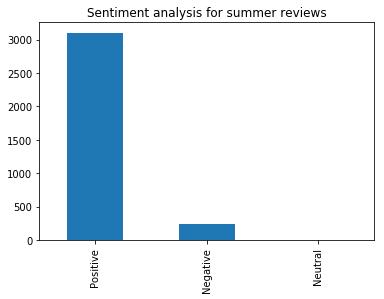

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
summer_data.sentiment.value_counts().plot(kind='bar', title="Sentiment analysis for summer reviews")

In [26]:
print("Number of Positive reviews: {}, which is: {}".format(sum(summer_data['sentiment']=='Positive'),((sum(summer_data['sentiment']=='Positive')/3349)*100)))
print("Number of Negative reviews: {}, which is: {}".format(sum(summer_data['sentiment']=='Negative'),((sum(summer_data['sentiment']=='Negative')/3349)*100)))
print("Number of Neutral reviews: {}, which is: {}".format(sum(summer_data['sentiment']=='Neutral'),((sum(summer_data['sentiment']=='Neutral')/3349)*100)))

Number of Positive reviews: 3102, which is: 92.6246640788295
Number of Negative reviews: 242, which is: 7.226037623171096
Number of Neutral reviews: 5, which is: 0.1492982979994028


In [28]:
neg_rev_summer =  summer_data['sentiment'] == 'Positive'
neg_rev_summer = summer_data[neg_rev_summer]
print(neg_rev_summer.head(3))
neg_rev_summer.shape

                                          description  \
20  Im going to be bold and give Kimo's five stars...   
22  We were lucky to find a table, it was super bu...   
25  Kimo's is the restaurant with the most aloha s...   

                                          norm_tokens dataPublished  month  \
20  ['im', 'go', 'bold', 'give', 'kimo', "'s", 'fi...    2018-07-16      7   
22  ['lucki', 'find', 'tabl', 'super', 'busi', 'lo...    2018-06-14      6   
25  ['kimo', "'s", 'restaur', 'aloha', 'spirit', '...    2018-06-02      6   

    year  polarity_score sentiment  
20  2018          0.9964  Positive  
22  2018          0.8395  Positive  
25  2018          0.9901  Positive  


(3102, 7)

In [27]:
---------------------------------------------------------------------------

SyntaxError: invalid syntax (<ipython-input-27-28e131d4a301>, line 1)

# Bi,Tri,Tetra,Penta-Grams on Summer Negatives of TS restaurants

In [29]:
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

In [30]:
reasons = neg_rev_summer['description'] 
reasons.head()

20    Im going to be bold and give Kimo's five stars...
22    We were lucky to find a table, it was super bu...
25    Kimo's is the restaurant with the most aloha s...
30    One of our friends was in town with his family...
32    For all of you first timers to Kimo's, make su...
Name: description, dtype: object

In [31]:
# # Stopword removal  
# stop_words = set(stopwords.words('english')) 
# your_list = ['the','this','was'] 
# for i, line in enumerate(reasons): 
#     reasons[i] = ' '.join([x for 
#         x in nltk.word_tokenize(line) if 
#         ( x not in stop_words ) and ( x not in your_list )])

In [32]:
reasons.head()

20    Im going to be bold and give Kimo's five stars...
22    We were lucky to find a table, it was super bu...
25    Kimo's is the restaurant with the most aloha s...
30    One of our friends was in town with his family...
32    For all of you first timers to Kimo's, make su...
Name: description, dtype: object

In [33]:
# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(reasons)  
features = (vectorizer.get_feature_names()) 
print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (2, 2)) 
X2 = vectorizer.fit_transform(reasons) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(20))



Words : 
               term       rank
38835       it was  41.708961
5258       and the  41.155821
51624       on the  38.704055
50672       of the  38.391189
73547     the food  37.448677
27295     food was  32.273493
32538      had the  31.545277
35916     hula pie  30.509271
36839       in the  29.102374
84301       we had  28.227069
73085     the best  26.076375
64864  service was  25.972215
27860      for the  25.901258
73518     the fish  25.323400
26411   fish tacos  25.175164
84504      we were  24.914112
76330   this place  24.290865
7678        at the  23.938301
83084    was great  23.824953
36296       if you  22.636465


In [35]:
# Getting Trigrams  
vectorizer = CountVectorizer(ngram_range =(3, 3)) 
X1 = vectorizer.fit_transform(reasons)  
features = (vectorizer.get_feature_names()) 
print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (3, 3)) 
X2 = vectorizer.fit_transform(reasons) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(20))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words : 
                      term       rank
146218       the food was  18.204846
146756       the hula pie  14.697429
9193           and it was  12.356087
149978    the service was  11.568514
105107       on the beach  10.699059
146155        the food is  10.485371
146005     the fish tacos  10.040190
166654        view of the   9.180972
105905         one of the   8.676471
123530       right on the   8.354994
50706      fish and chips   8.172175
74859         in the sand   7.530391
17218          at the bar   7.338671
172787      was very good   7.260207
102783        of the best   7.231528
129132  service was great   7.158428
105190      on the island   6.894858
155183      this place i

In [36]:
# Getting Tetragrams  
vectorizer = CountVectorizer(ngram_range =(4, 4)) 
X1 = vectorizer.fit_transform(neg_rev_summer.description)  
features = (vectorizer.get_feature_names()) 
print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (4, 4)) 
X2 = vectorizer.fit_transform(neg_rev_summer.description) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(20))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words : 
                           term      rank
129809         one of the best  5.270601
150381      right on the beach  4.875683
205466       view of the ocean  3.931291
177330      the fish and chips  3.920095
14320         and the food was  3.852836
178063       the food was good  3.793716
184072   the service was great  3.556331
14627      and the service was  3.512660
205470      view of the sunset  3.198179
178958         the hula pie is  3.180204
59128         feet in the sand  3.073008
79810       had the fish tacos  2.858041
178998        the hula pie was  2.838840
150399      right on the water  2.775117
177482      the fish tacos and  2.712892
178045  the food was delicious  2.

In [37]:
vectorizer = CountVectorizer(ngram_range = (5,5)) 
X1 = vectorizer.fit_transform(neg_rev_summer.description)  
features = (vectorizer.get_feature_names()) 
print("\n\nFeatures : \n", features) 
print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (5,5)) 
X2 = vectorizer.fit_transform(neg_rev_summer.description) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 
  
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", words.head(20)) 



Features : 
 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)






X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words head : 
                                 term      rank
244888         your feet in the sand  1.812353
186830        the food was very good  1.775298
183293          the best ve ever had  1.614556
223197           was one of the best  1.590225
38744            can wait to go back  1.542846
187781      the hula pie for dessert  1.518395
140259        our last night in maui  1.484772
15397      and the service was great  1.321133
193579     the service was great and  1.273763
93286         if you are looking for  1.241826
185627        the fish and chips and  1.211348
186688         the food was good but  1.199759
93527          if you re looking for  1.164654
186641    the food was del

In [38]:
# Getting Pentagrams  
vectorizer = CountVectorizer(ngram_range =(5, 5)) 
X1 = vectorizer.fit_transform(neg_rev_summer.description)  
features = (vectorizer.get_feature_names()) 
print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (5, 5)) 
X2 = vectorizer.fit_transform(neg_rev_summer.description) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(20))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words : 
                                 term      rank
244888         your feet in the sand  1.812353
186830        the food was very good  1.775298
183293          the best ve ever had  1.614556
223197           was one of the best  1.590225
38744            can wait to go back  1.542846
187781      the hula pie for dessert  1.518395
140259        our last night in maui  1.484772
15397      and the service was great  1.321133
193579     the service was great and  1.273763
93286         if you are looking for  1.241826
185627        the fish and chips and  1.211348
186688         the food was good but  1.199759
93527          if you re looking for  1.164654
186641    the food was delicious

In [39]:
print("Number of negative reviews : {}".format(len(neg_rev_summer)))
print(neg_rev_summer.description.iloc[0])
# print(neg_rev_summer.description.iloc[1])
# print(neg_rev_summer.description.iloc[2])
# print(neg_rev_summer.description.iloc[3])
# print(neg_rev_summer.description.iloc[4])

Number of negative reviews : 3102
Im going to be bold and give Kimo's five stars because I was really impressed when I ate here, particularly after eating at some of the other restaurants I'd always thought were good and found underwhelming this last trip. Kimos, on the other hand, over delivered.  

First of all, make reservations. We had them, and we were actually seated on time (unlike Leilani's). We also had a GREAT view of the sunset. Like, superb. The couples sitting along the railing had the best view, but they were friendly enough to let me hover over them to snap photos. 

What impressed me most was the menu; it had the widest range of good sounding food that I encountered in Hawaii (living in RI turned me into a food snob! I'm sorry! It's all those JWU grads). Starting with the drinks, on which I could not make a decision, they all sounded great. I ordered a coconut ginger martini and my dad got a mango martini of some sort. Both were delicious, and not that alcoholic. It's p

# WordCloud on TS restaurants summer negatives

In [40]:
reasons = neg_rev_summer['description'] 
reasons.head()

20    Im going to be bold and give Kimo's five stars...
22    We were lucky to find a table, it was super bu...
25    Kimo's is the restaurant with the most aloha s...
30    One of our friends was in town with his family...
32    For all of you first timers to Kimo's, make su...
Name: description, dtype: object

In [41]:
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    # lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

l_data = str(reasons)
#l_data
list = [l_data]
word_list = []
for line in list:
    word_list.append(preprocessing(line))
word_list

["going bold give Kimo five star ... lucky find table super ... Kimo restaurant aloha ... One friend town family ... For first timer Kimo make ... The best best Our savored meal ... Kimo got upgraded star love ... Recently went Kimo celebrate birthda ... mehhh ... food alright ... NOT order drink ... stopped drink headed ... stopped recommendation ... All view And fish \\n\\nThis pla ... SIMPLY AMAZING This 2nd favorite resta ... Loved Kimo much went back second ... Food delicious Great ocean view ... Amazing view Incredible burger n't ... 100 say place bit higher end ... 102 funny reason came ... 105 came one Friday afternoon late ... 106 This nice seafood restaurant Front str ... 107 Went twice last days.\\nWent fat ... 110 This time year last visit Diane ... 112 San Diego Maui wife year ... 113 asked one local gentleman Lahaina ... 116 Okay WOWWWW California Los Angeles ... 121 reservation seated ... 122 Cute restaurant water middle ... 124 The service super friendly bad ... 126 Meh

In [42]:
token = word_tokenize(l_data)
from nltk import FreqDist
freqd = FreqDist(token)
freqd.items()
import operator
sorted_freq = sorted(freqd.items(), key=operator.itemgetter(1))
sorted_freq
# converting into dictionary 
def listtodict(A, di): 
   di = dict(A) 
   return di 

# Driver Code  
A = sorted_freq 
di = {} 
print ("The Dictionary Is ::>",listtodict(A, di)) 

The Dictionary Is ::> {'20': 1, 'going': 1, 'bold': 1, 'give': 1, 'five': 1, '22': 1, 'lucky': 1, 'find': 1, 'table': 1, 'it': 1, 'bu': 1, '25': 1, 'aloha': 1, 's': 1, '30': 1, 'One': 1, 'friends': 1, 'town': 1, 'his': 1, 'family': 1, '32': 1, 'For': 1, 'all': 1, 'timers': 1, 'make': 1, 'su': 1, '36': 1, 'Our': 1, 'savored': 1, 'meal': 1, 'wh': 1, '56': 1, 'upgraded': 1, '5': 1, 'love': 1, 'th': 1, '57': 1, 'Recently': 1, 'celebrate': 1, 'birthda': 1, '61': 1, 'mehhh': 1, 'alright': 1, 'DO': 1, 'NOT': 1, 'order': 1, 'drink': 1, '64': 1, 'as': 1, 'headed': 1, '68': 1, 'recommendation': 1, 'ma': 1, '72': 1, 'All': 1, 'about': 1, 'And': 1, '\\n\\nThis': 1, 'pla': 1, '75': 1, 'SIMPLY': 1, 'AMAZING': 1, '2nd': 1, 'favorite': 1, '78': 1, 'so': 1, 'much': 1, 'back': 1, 'second': 1, '79': 1, 'Food': 1, 'delicious': 1, 'ocean': 1, '89': 1, 'Amazing': 1, 'views': 1, 'Incredible': 1, 'burgers': 1, 'af': 1, '100': 1, "'d": 1, 'say': 1, 'bit': 1, 'higher': 1, 'end': 1, '102': 1, 'It': 1, 'funny': 1

In [44]:
dict_data = {'20': 1, 'going': 1, 'bold': 1, 'give': 1, 'five': 1, '22': 1, 'lucky': 1, 'find': 1, 'table': 1, 'it': 1, 'bu': 1, '25': 1, 'aloha': 1, 's': 1, '30': 1, 'One': 1, 'friends': 1, 'town': 1, 'his': 1, 'family': 1, '32': 1, 'For': 1, 'all': 1, 'timers': 1, 'make': 1, 'su': 1, '36': 1, 'Our': 1, 'savored': 1, 'meal': 1, 'wh': 1, '56': 1, 'upgraded': 1, '5': 1, 'love': 1, 'th': 1, '57': 1, 'Recently': 1, 'celebrate': 1, 'birthda': 1, '61': 1, 'mehhh': 1, 'alright': 1, 'DO': 1, 'NOT': 1, 'order': 1, 'drink': 1, '64': 1, 'as': 1, 'headed': 1, '68': 1, 'recommendation': 1, 'ma': 1, '72': 1, 'All': 1, 'about': 1, 'And': 1, '\\n\\nThis': 1, 'pla': 1, '75': 1, 'SIMPLY': 1, 'AMAZING': 1, '2nd': 1, 'favorite': 1, '78': 1, 'so': 1, 'much': 1, 'back': 1, 'second': 1, '79': 1, 'Food': 1, 'delicious': 1, 'ocean': 1, '89': 1, 'Amazing': 1, 'views': 1, 'Incredible': 1, 'burgers': 1, 'af': 1, '100': 1, "'d": 1, 'say': 1, 'bit': 1, 'higher': 1, 'end': 1, '102': 1, 'It': 1, 'funny': 1, 'because': 1, 'reason': 1, 'her': 1, '105': 1, 'Friday': 1, 'afternoon': 1, 'late': 1, 'l': 1, '106': 1, 'nice': 1, 'seafood': 1, 'Front': 1, 'str': 1, '107': 1, 'Went': 1, 'twice': 1, 'days.\\nWent': 1, 'fat': 1, '110': 1, 'visit': 1, 'Diane': 1, '112': 1, 'San': 1, 'Diego': 1, '26': 1, 'G': 1, '113': 1, 'asked': 1, 'local': 1, 'gentleman': 1, 'Lahaina': 1, '116': 1, 'Okay': 1, 'WOWWWW': 1, 'California': 1, '(': 1, 'Los': 1, 'Angeles': 1, ')': 1, '121': 1, 'reservation': 1, 'seated': 1, '122': 1, 'Cute': 1, 'water': 1, 'middle': 1, '124': 1, 'service': 1, 'friendly': 1, 'bad': 1, '126': 1, 'Meh': 1, 'Burger': 1, 'dry': 1, 'burnt': 1, 'Beers': 1, 'cold': 1, '127': 1, 'dined': 1, 'out': 1, '65473': 1, 'Located': 1, 'stunning': 1, 'new': 1, 'resort': 1, '65474': 1, 'Hanua': 1, 'which': 1, 'highly': 1, 'recomme': 1, '65476': 1, 'Best': 1, 'Mai': 1, 'Tai': 1, 'even': 1, 'bother': 1, '65477': 1, 'hubs': 1, 'He': 1, '65478': 1, 'solid': 1, 'ni': 1, '65479': 1, 'Location': 1, 'ca': 1, 'beat': 1, 'Bartenders': 1, 'generally': 1, '65481': 1, '7': 1, 'Saturday': 1, '65482': 1, 'think': 1, 'ever': 1, '65483': 1, 'along': 1, '65485': 1, 'great': 1, 'worth': 1, 'every': 1, 'penny': 1, '65486': 1, 'So': 1, '65488': 1, 'First': 1, 'maui': 1, 'stop': 1, '65489': 1, 'ok': 1, 'right': 1, 'off': 1, 'bat': 1, 'what': 1, 'fans': 1, '65492': 1, 'lunch': 1, 'typical': 1, 'duke': 1, 'like': 1, 'ot': 1, '65493': 1, 'There': 1, 'adage': 1, 'that': 1, 'closer': 1, 'are': 1, 'w': 1, '65546': 1, 'Health': 1, 'conscious': 1, 'eating': 1, 'easy': 1, 'away': 1, 'f': 1, '65547': 1, 'Very': 1, 'disapointed': 1, 'Same': 1, 'prices': 1, 'no': 1, 'salad': 1, 'bar': 1, '65548': 1, 'Sometimes': 1, 'benefit': 1, 'modest': 1, 'expectations': 1, '65549': 1, 'wa': 1, '65550': 1, 'While': 1, 'hard': 1, 'finding': 1, '65551': 1, 'husband': 1, 'during': 1, '4th': 1, 'July': 1, '65552': 1, 'Aside': 1, 'Dukes': 1, 'junta': 1, '65553': 1, 'lot': 1, 'hopes': 1, 'readin': 1, '65554': 1, 'As': 1, 'others': 1, 'mentioned': 1, '65555': 1, 'Having': 1, 'eat': 1, 'Malibu': 1, 'excited': 1, '65556': 1, "'m": 1, 'very': 1, 'familiar': 1, 'T': 1, '&': 1, 'S': 1, 'restaurants': 1, 'he': 1, '65558': 1, 'Steak': 1, 'Taco': 1, 'kil': 1, '65559': 1, 'suggested': 1, 'by': 1, 'em': 1, '65560': 1, 'day': 1, 'island': 1, 'since': 1, '65561': 1, 'hubby': 1, 'long': 1, 'beach': 1, 'walk': 1, 'Name': 1, 'description': 1, 'Length': 1, '3102': 1, 'dtype': 1, 'object': 1, 'Im': 2, 'stars': 2, 'super': 2, 'most': 2, 'The': 2, 'just': 2, 'got': 2, 'stopped': 2, 'drinks': 2, 'fish': 2, 'resta': 2, 'Loved': 2, 'Great': 2, 'Do': 2, 'only': 2, 'came': 2, '3': 2, 'years': 2, 'wife': 2, 'where': 2, 'Honua': 2, 'stayed': 2, 'dinner': 2, 'h': 2, 'really': 2, 'have': 2, 'an': 2, 'when': 2, 'My': 2, 'location': 2, 'Love': 2, 'be': 3, 'our': 3, 'first': 3, 'best': 3, 'food': 3, 'after': 3, 'but': 3, 'one': 3, 'there': 3, 'Maui': 3, 'night': 3, 'Kai': 3, 'Duke': 3, 'were': 4, 'you': 4, 'went': 4, 'view': 4, '!': 4, 'my': 4, 'this': 4, 'place': 4, 'time': 4, 'had': 4, 'at': 4, 'Had': 4, 'restaurant': 5, "n't": 5, 'last': 5, ':': 5, 'Kimo': 6, 'was': 6, 'we': 6, 'from': 6, 'This': 6, 'for': 7, 'here': 7, 'with': 8, 'of': 8, 'to': 9, 'We': 9, 'in': 9, 'is': 10, 'and': 11, 'on': 11, "'s": 13, 'I': 13, 'a': 14, '.': 14, ',': 16, 'the': 28, '...': 63}

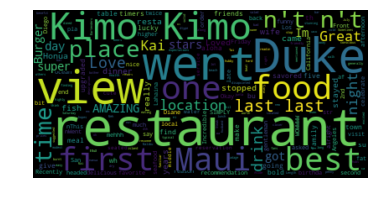

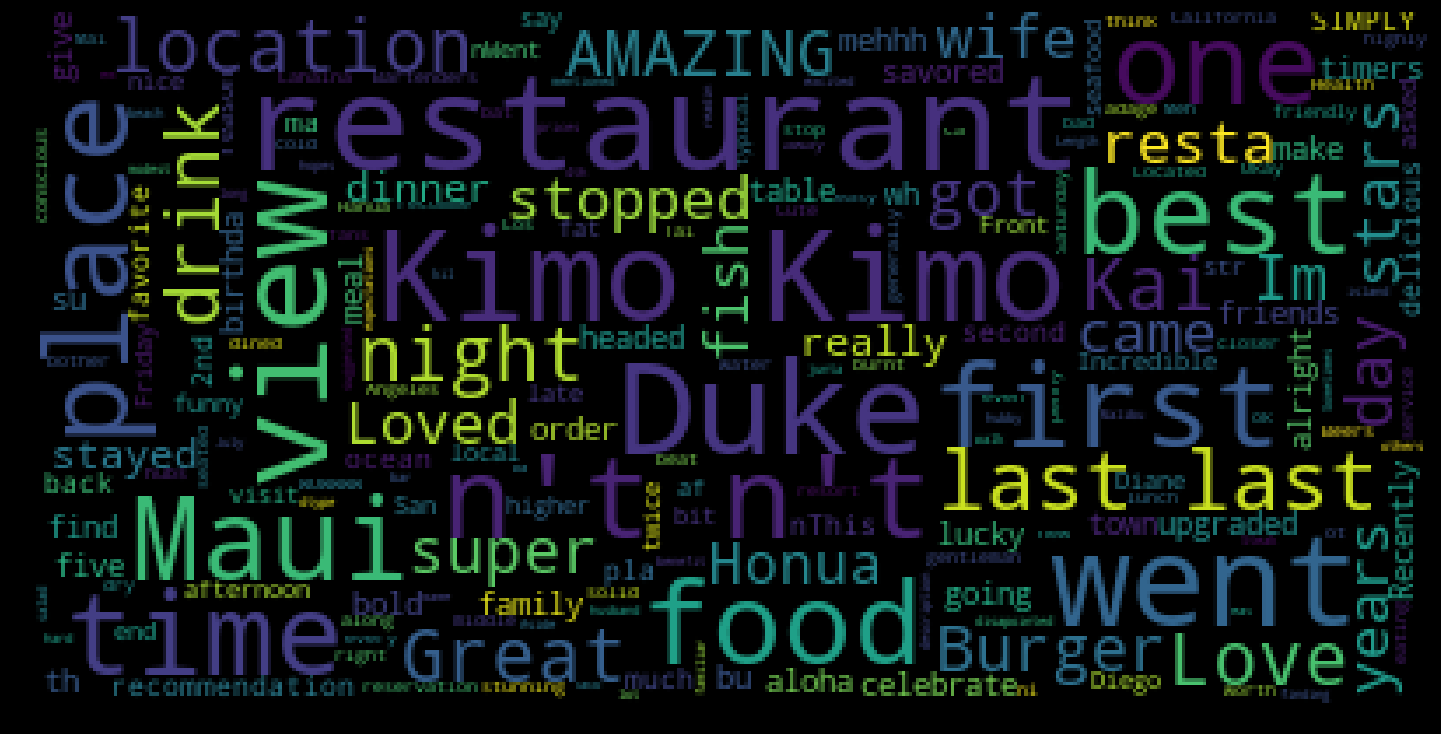

In [45]:
import os

from os import path
from wordcloud import WordCloud

# using word frequency list:
word_freq = dict_data
text = " ".join([(k + " ")*v for k,v in word_freq.items()])

# Generate a word cloud image
wordcloud = WordCloud().generate(text)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Topic Modelling

# TS Summer Negatives

In [46]:
vectorizer = TfidfVectorizer(stop_words='english')

In [47]:
neg_rev_summer['description'].head()

20    Im going to be bold and give Kimo's five stars...
22    We were lucky to find a table, it was super bu...
25    Kimo's is the restaurant with the most aloha s...
30    One of our friends was in town with his family...
32    For all of you first timers to Kimo's, make su...
Name: description, dtype: object

In [48]:
X_ts_s_n = vectorizer.fit_transform(neg_rev_summer['description'])
topics = 10
from sklearn.decomposition import NMF
nmf = NMF(n_components=topics,
         random_state=2017,
         alpha=.1,
         l1_ratio=.5)
nmf.fit(X_ts_s_n)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=10, random_state=2017, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [49]:
feature_names = np.array(vectorizer.get_feature_names())
feature_names

array(['00', '000', '00am', ..., 'zone', 'zucchini', 'zuchini'],
      dtype='<U20')

In [50]:
for idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic #0:
dinner just maui time ordered table got place food restaurant
Topic #1:
great service food location view atmosphere excellent awesome ocean place
Topic #2:
good food service pretty really drinks location view nice place
Topic #3:
fish tacos chips fresh sandwich got calamari lunch taco salad
Topic #4:
music live sand bar barefoot love feet grill beach fun
Topic #5:
mahi style crusted delicious macadamia kimo lobster wife excellent nut
Topic #6:
hula pie dessert grill cream free ice kimo excellent favorite
Topic #7:
happy hour drinks mai tai sliders specials appetizers bar drink
Topic #8:
amazing food view delicious recommend service incredible server definitely views
Topic #9:
best ve maui island atmosphere hands meal far mai awesome


In [51]:
nmf.transform
X_transformed = nmf.transform(X_ts_s_n)
X_transformed[50]

array([0.03989092, 0.01381921, 0.        , 0.        , 0.        ,
       0.        , 0.07223842, 0.        , 0.00549241, 0.        ])

In [52]:
def get_topic_for_document(doc):
    topic_probs = doc
    max_index = -1
    max_value = 0
    
    for ind, prob in enumerate(topic_probs):
         #print(ind, prob)
        if prob > max_value:
            max_value = prob
            max_index = ind
    return max_index

In [53]:
get_topic_for_document([0.        , 0.04801365, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00589124, 0.        ])

1

In [54]:
X_transformed = nmf.transform(X_ts_s_n)

X_topics = []
for x_transform in X_transformed:
#     print((x_transform))
    X_topics.append(get_topic_for_document(x_transform))
X_transformed.shape, len(X_topics)

((3102, 10), 3102)

In [55]:
# np.bincount(X_topics)

In [56]:
X_topics

[0,
 2,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 5,
 5,
 9,
 6,
 3,
 8,
 0,
 0,
 0,
 5,
 0,
 6,
 2,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 1,
 6,
 9,
 1,
 0,
 0,
 0,
 8,
 8,
 0,
 1,
 7,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 5,
 8,
 0,
 0,
 8,
 8,
 9,
 0,
 2,
 0,
 0,
 0,
 6,
 8,
 0,
 0,
 0,
 8,
 6,
 7,
 7,
 7,
 2,
 8,
 0,
 0,
 1,
 0,
 8,
 2,
 6,
 0,
 0,
 3,
 9,
 6,
 9,
 6,
 0,
 0,
 1,
 0,
 6,
 0,
 5,
 0,
 9,
 2,
 7,
 0,
 3,
 6,
 0,
 9,
 1,
 5,
 0,
 5,
 6,
 3,
 0,
 0,
 7,
 0,
 0,
 9,
 8,
 0,
 0,
 5,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 2,
 0,
 5,
 1,
 5,
 0,
 0,
 0,
 0,
 1,
 3,
 1,
 8,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 5,
 7,
 0,
 2,
 0,
 1,
 1,
 8,
 0,
 6,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 5,
 0,
 9,
 2,
 0,
 0,
 4,
 0,
 2,
 6,
 8,
 8,
 0,
 1,
 7,
 0,
 0,
 2,
 0,
 5,
 2,
 0,
 5,
 0,
 0,
 1,
 0,
 9,
 2,
 3,
 6,
 0,
 5,
 3,
 8,
 0,
 0,
 1,
 7,
 0,
 0,
 0,
 0,
 6,
 0,
 7,
 6,
 6,
 6,
 0,
 2,
 0,
 0,
 0,
 5,
 0,
 0,
 5,
 9,
 0,
 0,
 6,
 0,
 5,
 0,


In [57]:
from collections import Counter

recounted = Counter(X_topics)
recounted

Counter({0: 1398,
         2: 222,
         5: 143,
         9: 133,
         6: 221,
         3: 209,
         8: 144,
         1: 266,
         7: 161,
         4: 205})

# Topic #0: dinner just maui time ordered table got place food restaurant



<BarContainer object of 10 artists>

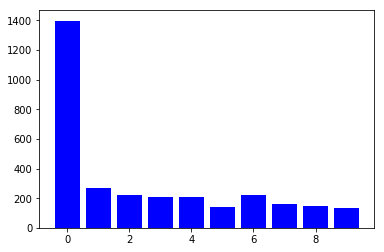

In [59]:
plt.bar(recounted.keys(), recounted.values(),color='b')

# -----------------------------------------------------------------------------------------------------------
# TS Restaurants Non Summer Negatives

# Bi,Tri,Tetra, Penta-Grams on Non Summer Negatives of TS Restaurants

In [60]:
nonsummer_data = ts_df_1[~ts_df_1.month.isin(months)]
print(nonsummer_data.shape)
nonsummer_data.head()

(5748, 5)


description  \
0  I stumbled across this great restaurant overlo...   
1  Excellent view on the ocean at sunset.\nExcell...   
2  This place was not what the reviews portrayed ...   
3  We were excited to repeat our Keoki's (in Kaua...   
4  If you're looking for a tourist spot, this is ...   

                                         norm_tokens dataPublished  month  \
0  ['stumbl', 'across', 'great', 'restaur', 'over...    2019-01-06      1   
1  ['excel', 'view', 'ocean', 'sunset', 'excel', ...    2019-01-04      1   
2  ['place', 'review', 'portray', 'starter', 'wal...    2018-12-25     12   
3  ['excit', 'repeat', 'keoki', "'s", 'kauai', 'l...    2018-12-08     12   
4  ["'re", 'look', 'tourist', 'spot', 'unfortun',...    2018-11-29     11   

   year  
0  2019  
1  2019  
2  2018  
3  2018  
4  2018

In [61]:
for sentences in nonsummer_data['description']:
    s = sentiment.polarity_scores(sentences)
    for k in sorted(s):
        print('{0}: {1}, '.format(k, s[k]))
    print(sentences)

compound: 0.9977, 
neg: 0.0, 
neu: 0.565, 
pos: 0.435, 
I stumbled across this great restaurant overlooking the ocean for lunch during my vacation to Maui. I did not have high expectations for this place, but boy did it blow me out of the water. 

The fish and chips is some of the best I've ever had (and I've had lots, including from London). I highly recommend it. Also, the turkey bacon sandwich was SO good. 

In terms of drinks, I highly recommend the Pacific Paradise drink! So delicious and tropical! I also really enjoyed the Lahaina Lemonade. 

Service was really great! I wish I remembered the waitresses name because she was truly awesome and recommend the best stuff. She was blonde and had cute sunglasses.
compound: 0.9665, 
neg: 0.0, 
neu: 0.538, 
pos: 0.462, 
Excellent view on the ocean at sunset.
Excellent food. We had the fresh fish : coconut for me and the yuzu for my husband. We loved it!
Waitress are super nice.
compound: 0.2551, 
neg: 0.058, 
neu: 0.889, 
pos: 0.053, 
This

Got seated within 20 minutes because they were super busy. I ordered a caeser salad and a baked potato, other half ordered the Kimo's fish special. Portions were a little small for the price but food was okay, it just wasn't what we wanted, although there are many good reviews about this place. Maybe we can stop in another day to try out other options on there menu. But overall service was nothing to complain about.
compound: 0.9919, 
neg: 0.0, 
neu: 0.731, 
pos: 0.269, 
Really great service, really fresh apps, and a great view of the ocean. My wife and I dropped by for a nice lunch on the water and we weren't disappointed. All the seafood tasted really fresh. We ended up splitting 3 apps: the pork lettuce wraps, the shrimp cocktail, and ahi poke avocado dip and chips (I think it's called something else). Although a little pricey and there were fewer shrimps than I thought there'd be, everything was really delicious. The shredded pork in the lettuce wraps was flavorful and juicy, the s

We landed in Kahului and just drove! Ended up here as our very first stop for adventurous eating. I had read that the fish tacos and coconut shrimp were yum, so that's what we got! Definitely order the tacos with the avocado. The taco shells are soft and seem homemade... maybe white corn? The grilled fish in it was great. And the pico de gallo was a nice fresh touch. Another treat was the freshly fried tortilla chips that came with the tacos. They were super good. The fam ordered the coconut shrimp as an appetizer. There were only 5 on the plate. I guess we should have ordered another batch? Anyway, those were inhaled before the waitress could even check in on us. My daughter had the fish and chips and she said she liked them. The hubs and son had the crusted fish and they liked it too. The best part was the patio dining. I mean, you're sitting on a beach... in Hawaii. How can you have a bad meal!?!
compound: -0.2302, 
neg: 0.039, 
neu: 0.91, 
pos: 0.052, 
Simple decision - Don't bothe

I definitely recommend making reservations as it gets pretty packed around dinner time.  We were seated right away since we made a reservation- but I saw a lot of people waiting who did not make one.
compound: 0.7009, 
neg: 0.044, 
neu: 0.899, 
pos: 0.057, 
Hubby and I dined here on our last night in Maui, and we were disappointed that this was the only night we dined here! 

We were walking a long front street the night before trying to figure out what we wanted for dinner, and came across Kimo's. There was an hour and a half wait, so we decided to make reservations for the next night.

On the night of our reservation, we arrived and were promptly seated. The initial table we were sat, had the sun blasting me. So I asked if I could move to the table right next to us since there was a shade curtain, and they allowed us to. Our waiter was very attentive during our entire dinner, and we were there for about 2 and a half hours!!

Our drink order was taken, and banana bread was brought to 

Delicious! Loved the atmosphere on the water with the mellow Hawaiian tunes. Had some melt in my mouth fish of the day, perfectly cooked veggies and a glass of wine.  While putting my feet up and eating a piece of hula pie I lamented, "this must be what heaven is like." Also the carrot muffins are delicious and the waitress was extremely helpful making a list of other local recommendations.
compound: 0.875, 
neg: 0.037, 
neu: 0.741, 
pos: 0.222, 
A worthy stop on the list of Front Street's restaurants. If you can get a table upstairs it's prime for a view of the water. Definitely indulge in a cocktail and a carrot muffin with whipped butter while you wait. Fish is fresh, all are solid choices. Perfect for a laid back dinner while in Maui.
compound: 0.9953, 
neg: 0.0, 
neu: 0.657, 
pos: 0.343, 
What a great location! Keep in mind that if you are seating at the edge of the water, you may get wet. We called it the 'splash zone' , never got on my food and actually we thought it was pretty 

Amazing!!!!! Gorgeous views and the food was the best that we had on Maui! I'd make a reservation if I were you. Crab cakes were superb and the moon fish was so dang good.  Very yummy cocktails to watch the sunset with. A must in Maui!
compound: 0.8803, 
neg: 0.017, 
neu: 0.843, 
pos: 0.14, 
I was there the first week of October and First of all I think the staff is wonderful.
   But let's start with the drinks, they all tasted watered down including the coke. 
  The menu I thought was very limited for a well known seafood restaurant and the portions were good but small.
   I can get a better selection of fresh seafood at a more reasonable price in Chicago and they're 1000 miles from the ocean.
    The only thing that they have going for them  are the staff and the view.
compound: 0.9147, 
neg: 0.027, 
neu: 0.811, 
pos: 0.162, 
We ate here 2 days ago and are going back tonight. Appetizer ( calamari ) salad (wedge for me beet over arugula for her ) and we both had fish. Ono for the wife

neu: 0.707, 
pos: 0.265, 
Beautiful beachfront restaurant in Lahaina town!

This is a beautiful restaurant & we came poorly dressed without a reservation, thank you for letting us dine!  We were a table behind the beachfront but still had gorgeous views.

Friendly customer service.  Good food.  This is the sister restaurant of a few popular places that I have previously dined at- Duke's, Jakes Del Mar, Hula Grill.  

Bread & Carrot Muffins:  Complimentary.
Macadamia Nut Calamari:  Chunky strips of calamari.  I wish these were thinly sliced rings instead.  I was not a fan of the texture or the bland taste.
Parmesan Crusted Mahi-Mahi:  This was good, but for the price, I expected better.  I say get their Hawaiian fish instead because our waitress said it was buttery & savory.
Prime Rib 14 oz.:  Even as the smaller cut, you could share this amongst 2.  Very hearty, corners of fat, a lot of food.
Original Hula Pie:  They also have a chef's creation Hula Pie but you cannot go wrong with the

This is a staple of Maui!! We come here at least twice during our yearly vacations. Always start off with the carrot cake muffin with butter. Any fish they have is prepared so well. A favorite is the macadamia crusted style. Last time they didn't have the fish I wanted prepared that way which was disappointing. But the Ono I ordered did NOT disappoint with the Parmesan crusted style. Love this place, love the views,and love the service!
compound: 0.9955, 
neg: 0.011, 
neu: 0.786, 
pos: 0.203, 
Great food, excellent service and a wonderful view!

The Mrs. And I came here for dinner approximately 30 minutes before sunset (1830). We were greeted by friendly staff and seated upstairs on the deck. The view up there was nice, but not quite as nice as downstairs by the ocean. Fortunately, they opened up the tarp screens upstairs, which improved our view. 

My wife and I start with drinks, the lava flow and the mango colada. Both were delicious! As an appetizer, we started with the poke & avoc

Customer service was decent, he did recommend a good drink.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Only had drinks here, but they were delish, and you cannot beat the view. Would go back and try the food!
compound: 0.9808, 
neg: 0.03, 
neu: 0.823, 
pos: 0.147, 
I'm in Maui as I write this and I'm giving this restaurant 4 stars with some qualifiers. First off, service and ambience is spectacular. From the hostesses to the bar tender and wait staff - all are genuinely warm and seem happy to work here. Now for the food. My friend and I ordered from the appetizer menu. Don't get the fried calamari. It's not calamari, it's tough and rubbery squid steak pieces, not at all the same as the tender calamari rings and tiny whole calamari you are accustomed to. Also the pork ribs look like baby back ribs, but are not the "falling off the bone" texture that that title suggests. The crab cakes were small but a definite win -tender and tasty. I also had the iceberg lettuce wedge with blue c

Really enjoyed our meal here. Walking through Lahaina we stopped in here for our last meal of our trip. Watched the sunset while drinking a margarita and eating fresh fish. They accommodated my gluten free request easily with no prior notice. Would have stayed longer if we had time but we had to catch our flight! Tip: park at the free valet a block down. Then you only have to pay a tip instead of paying for per hour parking.
compound: 0.9789, 
neg: 0.066, 
neu: 0.822, 
pos: 0.111, 
Spoiler alert: This is one of the few and rare lengthy reviews I have done in a while.... Sorry, but I had to let it out.

Step 1: Make a reservation; we made reservations 2 weeks prior
Step 2: Make special requests on the reservation; in our case we made reservations for 5:30 and requested to be seated in the patio
Step 3: Arrive and get seated accordingly

We arrived at about 5:20 and checked in for our reservation at 5:30. They told us it would be just a few moments and we would get seated. I am totally c

Best steak I ever had. The late afternoon/happy hour menu has a steak and wedge salad which is just the best mixture ever! The cheeseburger was amazing compared to Dukes. The kahlua pork fries was sooo good. The toppings weren't really distributed well, but an amazing portion and yummy. The lahiana lemonade was really good and refreshing. There are on specific beers on happy hour so we got stuck with a $9 beer x2 instead of 5 dollars. Our waitress didn't mention that. Overall a good vibe and the food was really good. We will be back for sure.
compound: 0.9584, 
neg: 0.026, 
neu: 0.705, 
pos: 0.27, 
Tried this place after seeing many great reviews. Party of 4, arrived at 6:30pm, was seated straight away. Had a great waiter, super friendly and very knowledgeable about the menu. Service was fast as we asked the kids food to be brought out ASAP, which they did. Only 4 stars as the menu was limited and the establishment was a little pricey.
compound: -0.5857, 
neg: 0.139, 
neu: 0.762, 
pos:

Awesome place to eat, right on the edge of the Pacfic Ocean, with live music, great food, great service, friendly staff. The view of the ocean and outlying islands is just beautiful. Thoroughly enjoyed my meal at Kimos in Lahaina.
compound: 0.917, 
neg: 0.055, 
neu: 0.73, 
pos: 0.216, 
Great atmosphere. You have to get the steak & wedge salad. It is to die for. Steak was a decent size and cooked perfectly with no fat. The dressing was very flavorful and all of the ingredients were very fresh. The pulled pork sandwich was tasty but a little on the small side. I would definitely come back! Also the piña coladas are very good!!!
compound: 0.8016, 
neg: 0.0, 
neu: 0.625, 
pos: 0.375, 
Very popular spot in Lahaina  Overpriced a bit from a comparison perspective. Hula pie is great.
compound: 0.9898, 
neg: 0.031, 
neu: 0.758, 
pos: 0.212, 
While in Lahaina it's very tempting to try this place, it's one of the nicest around, one of the famous restaurants and the crowd looks like they are havin

Kimo's had been recommended to me prior to our honeymoon, so it was the first meal of our Maui trip!  We went first for lunch, and were blown away.  Service was outstanding (our server, Joanna was spectacular), the food was delicious, and you cannot beat that view or atmosphere.  We loved it so much that we went back again for dinner a few nights later and had just as great of a time- and that time was with live music!  Fantastic spot in Lahaina, could not recommend it more!
compound: 0.9796, 
neg: 0.0, 
neu: 0.545, 
pos: 0.455, 
I loved Kimos. I've been there in two trips to Maui. Both times were very delightful. Their food was excellent and the location and view is amazing. The staff were all super friendly and courteous. A must visit in Maui.
compound: 0.9941, 
neg: 0.0, 
neu: 0.817, 
pos: 0.183, 
Went to Kimo's for our last night in Maui. We grabbed a drink at the bar with Andy and watched the Mai Tai's and Ahi Sashmi land on the bar all around us. We had a reservation but were sea

Our favorite restaurant in Maui! All the food is amazing (we've had a lot of things off the menu), the staff is great, and the restaurant location couldn't be any more prime than right there in the water. Now we have little kids and eat out less than we once did, but it's even worth it to take their food to go. It's THAT good.
compound: 0.9797, 
neg: 0.024, 
neu: 0.727, 
pos: 0.249, 
We had two delicious dinners here over the past week...that's how much we loved this place! Over these two meals, we tried the Kimo's Grog, crab cakes, beet salad, brochette, ono, opa, and mahi mahi...everything was delicious! Our waiter Luke was the perfect combination of attentive but not overbearing...he was so nice, and he timed our drinks, appetizers, and entrees just right. (I'd ask to be seated in his section if I were you!). I'd definitely suggest a reservation to avoid waiting (and to time your meal so you can enjoy the amazing Lahaina sunset). .
compound: 0.9153, 
neg: 0.084, 
neu: 0.638, 
pos: 0

Beautiful views and nice beachy atmosphere. 4/5
compound: 0.8554, 
neg: 0.04, 
neu: 0.757, 
pos: 0.202, 
Really nice ambiance. Live music was a definite plus. Check out the website, but I believe the music plays 6-8 pm on select days. They usually have a wait but we sat right away in the bar area that offers a limited menu. The view is awesome and you can watch the sunset.
compound: 0.986, 
neg: 0.021, 
neu: 0.788, 
pos: 0.192, 
Great food!  Excellent service!  Great atmosphere!  Our waitress Lindsey was awesome.  She pointed us in the right direction for our fish choices and she wasnt wrong. 

I had the coconut crusted marlin with the pineapple salsa.  Amazing.  The only downfall was the onions in the salsa.  Onions and fish just dont go.  The onions robbed the delicious flavor.  Good thing there wasnt onions in every bite. 

My husband had the lobster topped Mahi Mahi. He couldnt rave enough.   My husband is in the food business and it is often hard to please him when we go out to ea

Overall, the two stars were given because of the waitress friendly demeanor at the beginning and the quick sitting.
compound: 0.7928, 
neg: 0.043, 
neu: 0.789, 
pos: 0.168, 
Food is pricey here, and when we went it was dark so unfortunately we could only hear the ocean but not see it. The drinks were good too. I'd come back again but during day light so I could have a better view.
compound: 0.7778, 
neg: 0.0, 
neu: 0.876, 
pos: 0.124, 
View can't be beat. Kimo style fish (Ono) was very tasty as was rice and sourdough rolls. The sav blanc went perfectly with the dish and the chilled veggie salad was very fresh. Service felt a little rushed and not entirely in the "aloha" style we've come to expect on Maui.
compound: 0.8591, 
neg: 0.042, 
neu: 0.758, 
pos: 0.2, 
I had panko crusted ono with capers, which was dry and flavorless but better than my hubby's coconut crusted Marlin. Not worth the money for the food. Waiter pushed us through every course. Music, view, and island ambiance were g

neu: 0.767, 
pos: 0.233, 
Can't beat the view. Friendly fast service. Good food. Portions are a bit on the small side but overall definitely would come back. And the signature pie can't be beat!
compound: 0.8953, 
neg: 0.059, 
neu: 0.717, 
pos: 0.224, 
Me and my husband went here when visiting the area. The hula pie was to die for. I also had the seared tuna as a main dish which was absolutely delicious. The view though, probably the best view I've ever seen in Hawaii. Would recommend it. Also got the lava flow drink, absolutely delicious.
compound: 0.9922, 
neg: 0.006, 
neu: 0.831, 
pos: 0.163, 
Walk through the unassuming entrance off of Front Street to a lovely upstairs and downstairs oceanfront setting. At dinner there is a full menu with chicken, prime rib, fish, salads, or the casual menu with more pupus, drinks, burger, and more. Unless you go early for dinner (say, 5 pm), reservations are a good idea.

My friend and I shared the pork ribs off the casual menu, under pupus. Consi

Thanks Kimo's, Coach and unknown server. You made my visit(s) great!
compound: 0.9659, 
neg: 0.028, 
neu: 0.67, 
pos: 0.302, 
Must have the prime rib King cut, Texas style.  Omg, the best tasting and juiciest piece of meat I have ever had.  The potatoes and steamed veggies were perfect could even share this plate bc it is ginormous. The service was also just excellent. Just an amazing evening all around!  Oh, don't forget their signature hula pie/mud pie. :)
compound: 0.954, 
neg: 0.0, 
neu: 0.821, 
pos: 0.179, 
Great customer service, Causey was our server I believe, and was great! Came for a family vacation and this was my favorite place. We showed up at 6:30 without reservations and were able to get seats right on the bar side of the deck with an ocean view while we waited for our table and enjoyed the view and our drinks. We all. Got different fresh fish plates and they were soooo tasty. If your looking for a higher end meal and service with the view this is the place!! Little pric

If you are visiting Maui and looking for recommendations, feel free to message me through Yelp and I can share my itinerary, which includes my Yelp reviews. The information for an electronic copy can also be found in the link via my Yelp profile.
compound: 0.9666, 
neg: 0.0, 
neu: 0.838, 
pos: 0.162, 
Thought we would try out Kimo's as its been awhile since we have been here.  We got a nice table up top and had a gentle breeze blowing in keeping us cool and comfortable. 

We started off with the calamari and it was tender and delicious. 

I had eaten fish all week long and decided on the filet.  The meat was very tender and was served with garlic mashed potatoes, asparagus and a roasted tomato topped with shaved parmesan cheese.  

We had a nice seat on the top deck with a nice view.  It was unseasonably warm with an extra does of humidity.  Many of the locals said this was one of the hottest summers they can remember.  The breeze was intermittent, but when it came, it was more than we

Umbrella tables and the nice breeze from the water was great for the very humid day today.
compound: 0.8065, 
neg: 0.0, 
neu: 0.772, 
pos: 0.228, 
Reservation is a must! The entertainment was good if you're seating at the bar area downstairs...makes the time go by faster as the service is kinda slow but the food is good!
compound: 0.9737, 
neg: 0.038, 
neu: 0.797, 
pos: 0.165, 
The food was ok. I would give it a 3.5 stars but since there is no option for that I am choosing 4.  

We had a reservation but still had to wait about 15 minutes. We ordered the prime rib 14oz since that seems to be what's popular on the Yelp reviews and my fiancé ordered the Thai Coconut crusted Marlin and an ahi poke stack for appetizer. 

The appetizer was great and I highly recommend that. The ahi was very fresh. The Marlin was a 7 out of 10 but the undercooked buttered string beans that came with it was only ok. The prime rib was decent. A little tough to cut, but when I asked for medium rare they delivere

Overall, we had a nice time.  Service and ambiance were great. It's a great dinner place but try to sit outside at night.  My experience was a 4 1/2 stars.
compound: 0.7876, 
neg: 0.0, 
neu: 0.817, 
pos: 0.183, 
Slow service. Mediocre food. The poke says it has other stuff in it but it's just green onion ahi and avocado. Nice view though. Soda taste like fountain because it didn't taste right.
compound: 0.9923, 
neg: 0.021, 
neu: 0.799, 
pos: 0.18, 
I came into Kimo's last month during my Maui vacation on 2 different occasions.  The first was for a friend's bachelorette dinner.  The service was great, and all of our meals were AMAZING. The veggie dip was a great starter and a crowd pleaser.  I ordered the Citrus Herb Grilled fish (they switch the type of fish out daily/regularly and I don't recall now what type of fish it was that night) and I loved it.  I recall someone ordered the Lobster-Topped fish, another ordered Coconut Crusted fish plate, and a Shrimp Pappardelle being ordered.

neg: 0.029, 
neu: 0.783, 
pos: 0.188, 
This was the best meal my husband and I have had on Maui so far. We were able to make a reservation the day before using the OpenTable app and had no issues. We were seated upstairs overlooking the water (not right against the railing, but still a great view. It seems that the entire upstairs has a good view no matter where the seat is). 

Our waiter, Dave D. was great and thoroughly explained the daily fish menu. My husband and I both had the fresh Mahi. He got his 'Kimo Style' and I had mine topped with lobster. Both came with vegetables and rice pilaf and were incredible. 

Also had mac nut crusted calamari & mai tais, both were good as well. We plan on returning one more time before we head home.
compound: 0.8439, 
neg: 0.0, 
neu: 0.784, 
pos: 0.216, 
Came for lunch. The view is absolutely great and the beer is cold. The fish sandwich was really good too. The kids menu would probably only appeal to a bigger kid. Service is a tad slow but frien

Overall, good value for the money especially when compared to similar restaurants such as Mama'a fish house in Paia.
compound: 0.5093, 
neg: 0.0, 
neu: 0.838, 
pos: 0.162, 
After eating at two other seafood restaurants, we finally found our ultimate place and my favorite fish, Ono!
compound: 0.9958, 
neg: 0.034, 
neu: 0.699, 
pos: 0.267, 
Was looking for a great spot to enjoy our last full day on the Island. I was told that you need to make a reservation the day before if you want a great view. So lucky we took the advice, we showed up just after our reservation time and had no problem getting our seat. The view was spectacular, we got a table right on the railing as the sun was starting to head down. It was perfection. The staff was great, our waitress for the night was prompt and took our drink order right away. She explained their fresh fish options, it can be a little confusing without explanation. We ordered the Mac crusted calamari as an app. It was some of the best calamari I've

Overall, two stars for the bar and awesome location. Not a place to take a date if you want to impress him or her. Definitely a place just to go for maybe some pricey pau hana drinks.
compound: 0.8589, 
neg: 0.115, 
neu: 0.663, 
pos: 0.222, 
We stopped in for a nite of lunch and wound up at the best table on the outer deck! The ocean was just a few feet away! A large umbrella shaded us as trade winds kept us cool. We ate burgers and coconut encrusted Mahi. Both were delicious! Didn't want to leave the lovely setting! Try the ice cream pie! It's to die for! No kidding!
compound: 0.9738, 
neg: 0.0, 
neu: 0.742, 
pos: 0.258, 
The view here is fabulous and the food was delicious. We didn't have reservations but the hostess found a table for us, which was nice. I ordered a pasta with shrimp, I can't remember the name but it was so tasty and super fresh. Service was also great, we had a waitress who took our orders and another waitress who got our drinks. If I lived in Maui this would a regu

A great place to stop for lunch while strolling through Lahania. Overlooking the water, casual dining that made you want to linger much longer than necessary. The flatbread app and dip was incredible.
compound: 0.9439, 
neg: 0.071, 
neu: 0.759, 
pos: 0.17, 
I was a bit confused by the ratings, I thought the location was great, although a bit noise and touristy, but the food was average at best.  

We had the calamari, which was too hard and overdone, the bruschetta which seemed like something you could get at a mall, and the ono, nicely done, but nothing special or memorable.  

This place seems more like a tourist trap than anything else, and they were late seating us and wanted to buy us some piece of pie, that looked something from a suburban chain restaurant, we turned it down, and nothing, how about just buying our drinks or appetizer?  

Skip this place, there are tons of better food and atmosphere.
compound: 0.9974, 
neg: 0.01, 
neu: 0.753, 
pos: 0.238, 
Our dinner at Kimo's at 

Wow!  Expensive and the vegetables and rice were cold!  The service however was excellent, Ryan did a fabulous job and apologized for running out of wine and for the food quality...
compound: 0.9895, 
neg: 0.0, 
neu: 0.673, 
pos: 0.327, 
One of the best places we ate in Maui! It's a popular place so there will likely be a wait, but you can walk around to some of the shops and your beeper will still work! Great service, nice views, and the food was excellent! Go for their fresh caught fish options...the coconut crusted marlin and the moonfish were great! and while the hula pie wasn't the best dessert i've ever had, you should probably get it just for the experience.
compound: 0.9518, 
neg: 0.052, 
neu: 0.71, 
pos: 0.238, 
We saved Kimo's for our last night in paradise. I wanted to give them 5 stars but there was a snafu with our table reservation. In the end they made things right. We had 9 in our party and everyone was more than satisfied with their meals and cocktails. Our server was 

pos: 0.384, 
A great view and a menu that includes various types of fish prepared in different ways. Recommended highly!
compound: 0.9707, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
Well...I can tell you that this is a must try restaurant. We went during an appetizer pub crawl and found this great place. The service was fantastic and the views were amazing the food was very good and the prices very reasonable as well. My advise is to try the Ahi over the Avocado appetizer it was so amazing that we had to make a second trip there just to have it again, we included dinner and the fish amazing....
compound: 0.4505, 
neg: 0.091, 
neu: 0.808, 
pos: 0.101, 
Worst customer service I have received in quite some time. I tried to order some ribs and they told us they sold out of the happy hour ribs. The table next to us ordered them with a different waiter and they got them.... then I asked for the manage and he was rude and very unhelpful. No customer service from the manager named Monte. He was rud

The ambiance and the food were both on point and the staff buzzes around quickly! Highly recommend!!
compound: 0.816, 
neg: 0.0, 
neu: 0.692, 
pos: 0.308, 
Great waitress.    Cold beer. $18 for a grilled fish sandwich with maybe 4 oz of fish on a big bun does not cut it.  Shame
compound: 0.9903, 
neg: 0.092, 
neu: 0.663, 
pos: 0.245, 
Walking into this place I honestly thought it was going to be crap touristy food and was already blaming my husband in my head but I couldn't have been more wrong. Both fish entrees we had here were REALLY good. Husband got the ono special prepared in the pesto and I had the coconut crusted with the Thai peanut sauce. I also changed out the rice side for a baked potato and it was delish! 

Where they go wrong is they give you tasty warm bread and carrot muffins at the table. The warm bread and butter was great while waiting for my meal and the carrot muffin was a perfect dessert. I totally would have ordered and paid for dessert but why bother when I have

However, I did like the somewhat prompt service at the beginning but it seems to diminish as time went by. Maybe because it was busy? But that's still no excuse to have poor service for such a well reviewed restaurant. Would I come back? Definitely not. Guess this place is really geared towards to tourist part. Should've known better.
compound: 0.8904, 
neg: 0.117, 
neu: 0.449, 
pos: 0.434, 
Really great! The drinks were delicious and meals were excellent as well. The Panko Crusted Ahi was to die for!
compound: 0.85, 
neg: 0.0, 
neu: 0.872, 
pos: 0.128, 
The best thousand island dressing on the planet.  Comes on the classic burger, but ask for a side to dip your fries in.  Great service from Joanne - she let me add a slice of pineapple to my burger.  Wife had fish tacos which she raves about.  Didn't have room for hula pie - will have to come back to try that.
compound: 0.8638, 
neg: 0.029, 
neu: 0.818, 
pos: 0.153, 
Came here for happy hour, great view and the drinks were exactly what

Will never return unless it gets taken out by a hurricane and becomes another restaurant.
compound: 0.9938, 
neg: 0.033, 
neu: 0.659, 
pos: 0.308, 
Perfect view, great service and great food! We had lunch and both chose the fresh fish options.  Kimo's selects the fish that works best with the cooking method, which is helpful.  The coconut crusted striped marlin with peanut sauce and pineapple salsa was amazing!  Probably best ever fish that I have had.  Sides were also good - especially the roasted veggies.  My husband enjoyed the Ahi fish tacos, which they made gluten free by substituting corn tortillas.  The only drawback was there were only two, and he couldn't eat the flour tortilla chips, so the meal was a bit small.  We had a coupon for a free hula pie with two entrees.  The pie was huge and delicious, so no need to worry about the small meal any more!  Lemonades were also tasty.  Overall a great meal!
compound: 0.8057, 
neg: 0.0, 
neu: 0.524, 
pos: 0.476, 
Worth the wait, the li

Again, super late on this review, but hey, at least I got to it *wink*
compound: 0.8126, 
neg: 0.0, 
neu: 0.749, 
pos: 0.251, 
We ended up here at happy hour and shared a mixed plate and a couple of drinks, plus a banana/cinnamon dessert.
We will return here on our next visit for sure.
compound: 0.9315, 
neg: 0.048, 
neu: 0.579, 
pos: 0.373, 
Stopped in here before Ulalena. Ordered the kulua pork cheese fries and it was so good. The happy hour drinks were a little too sweet. The service was great!
compound: 0.9686, 
neg: 0.035, 
neu: 0.583, 
pos: 0.383, 
Oceanfront deck in Maui. Does it get any better?!? I could eat a bologna sandwich and coke and be happy here! haha! But overall the food is good, staff is happy, atmosphere and view is like no other. Casual and laid back during the day. Can't go wrong.
compound: -0.4361, 
neg: 0.105, 
neu: 0.852, 
pos: 0.044, 
My wife and I stopped in for lunch and ordered the lettuce wrapped pork appetizer and fish tacos. I was a little disappointed i

We were seated very quickly and our waiter was extremely nice and helpful. I'm so happy that my boyfriend and I got here right before the sunset because the view was breathtaking! I really recommend the pork lettuce wrap appetizer... It was amazing! The only reason I'm not giving it a 5/5 is because I was a little disappointed with our main courses. I got the coconut crusted fish and my boy friend got the citrus infused fish. The fish were a little bland and the veggies were overlooked.
compound: 0.9119, 
neg: 0.0, 
neu: 0.507, 
pos: 0.493, 
Awesome food, awesome staff! Loved this place A LOT! Will def come back! Kid friendly, pricey but totally worth it!
compound: 0.9694, 
neg: 0.0, 
neu: 0.688, 
pos: 0.312, 
Love this place, always come to eat here when we're in Maui. Amazing amazing ambience and good food, definitely come here to catch the sunset while you're eating. The view is sooo beautiful. I prefer the tables on the main/ground level (not upstairs), will request one along the r

We had our anniversary dinner here and it was awesome. The view was beautiful and the service was great. The fish was so delicious and fresh and they had the best calamari appetizer. Their version of a Moscow mule was delicious! Would definitely come here again.   Loved the atmosphere here and the staff was so friendly.
compound: 0.7845, 
neg: 0.037, 
neu: 0.837, 
pos: 0.127, 
This place was a good lunch spot, the views of the ocean from their patio were just what we were looking for on our day in Lahaina. The food was decent, pretty simple with the burger and salad that we got. It had more of a chain feel than any other restaurant we have been to on our trip to Maui, but was a great stop to eat on the ocean.
compound: -0.524, 
neg: 0.103, 
neu: 0.826, 
pos: 0.071, 
came hangry on halloween. service was terrible. took over an hour to get a table. the guy didnt clean the table so as i sat down there was water everywhere so i got the privledge of walking around on halloween looking like 

We've eaten lunch here many times over the years. The food, everything from appetizers to burgers & great fresh fish dishes, are consistently good with great views. They are usually really busy but know how to handle it.
compound: 0.9912, 
neg: 0.019, 
neu: 0.688, 
pos: 0.294, 
Tonight we were welcomed with a big smile upon check in. Hailey took excellent care of us and made some great suggestions on the menu. My husband was all set for prime rib and after her delicious description he end up having fresh Opah. It was a 10  he said and just how she described it. From the wedge to Hula Pie it was so yummy. We are celebrating our 15th wedding anniversary and asked for a table right where the waves crash. Dining later in the evening was a change for us and we loved it. We look forward to our next visit and I'm so happy we can always count on a great meal at Kimo's.
compound: 0.3919, 
neg: 0.0, 
neu: 0.934, 
pos: 0.066, 
This place is okay but I guess you would only come here for the atmosp

Best fish I have ever had. It's more on the expensive side for dining but well worth it. We ate right next to the ocean while we enjoyed our drinks and food. Make sure to request a reservation, this place gets busy.
compound: 0.9917, 
neg: 0.04, 
neu: 0.798, 
pos: 0.162, 
We visit Maui almost every year and Kimo's has always been one of our mandatory dinner experiences. We were in Maui for two weeks so decided to visit Kimo's twice. On the first visit we shared a salad to start.  My wife chose to have the lettuce wraps appetizer as her dinner and felt they were a little greasy. I had a fresh fish entrée (I forget which fish but it was not mahi- mahi) prepared Kimo's style. It was moist, flavorful and a good choice. We were pretty full so decided to pass on dessert.
The second visit I started with a wedge salad which was OK and I had fresh fish again this time prepared with their parmesan crust. It was also just OK. My wife had a Caesar salad topped with a grilled chicken breast, a dish

Their cocktails are the perfect companion to a breathtaking sunset! And of course, try to save room for a slice of hula pie! Large enough share....but only if you want to ;)
compound: -0.1531, 
neg: 0.041, 
neu: 0.959, 
pos: 0.0, 
The hardest thing to do is critique a place that is overpriced, due to its place in the world.This place was "ok" but the food was way too expensive and trying to find the waitress to pay was a nightmare.
compound: 0.9794, 
neg: 0.019, 
neu: 0.712, 
pos: 0.27, 
Stopped by here after a day walking around front street. They had happy hour so we ordered a few apps; the mac nut crusted calamari, Kalua pork cheese fries, cocktail shrimp and the coconut fish entree. The calamari was tender and pretty good, cocktail shrimp was so fresh and tender, the Kalua fries were amazing I loved the different textures and flavors. The coconut fish was spot on and the fish was just so moist and fresh. One of the best dishes I had on Maui.
compound: 0.9595, 
neg: 0.031, 
neu: 0.8

neu: 0.83, 
pos: 0.16, 
While you do pay a premium for the view, the food and service (save for the hostess who couldn't have been pissier) definitely stack up! We had the coconut shrimp & lettuce wraps to start which were both tasty but small portions for the price. 
I had the ahi tuna for dinner which was cooked well and the salad it came with was tasty too. My family reported that the Parmesan crusted fish & ribs were also delicious
Of course we ordered the hula pie for dessert and one slice was definitely enough for 4 people! 
While it was an expensive dinner, I left feeling satisfied both with the food & the experience.
compound: 0.9773, 
neg: 0.0, 
neu: 0.604, 
pos: 0.396, 
Sat at the bar, it was so busy. The view was great, great ambiance, great service, awesome food. Shrimp pappardelle was light and filled with veggies and giant shrimp. Prime rib was the most juiciest, tender, sweet steak I've ever tasted. Definitely would recommend it.
compound: 0.9896, 
neg: 0.014, 
neu: 0.62

Enjoyed the dining experience here.  Great food and nice drinks.  Went on a Sunday evening around 6pm and had to wait about half an hour.  Sat down at our table and the service was quick and attentive.  Definitely go there again the next time I'm back in Maui.
compound: 0.9728, 
neg: 0.0, 
neu: 0.649, 
pos: 0.351, 
I had, far and away, the best Mai Tai on Maui here. Their Lahaina Lemonade was incredible as well. The ambiance was friendly and fun, the live entertainment was actually really great, and the drinks were incredible (and not as expensive as we thought they'd be!). I'll definitely be back here!
compound: 0.9588, 
neg: 0.0, 
neu: 0.742, 
pos: 0.258, 
My husband and I are here for our honeymoon and I checked Yelp to see what good places are to eat around our hotel. You have to eat here! They have really good fish tacos here! Their hula pie is amazing! I've never had it before but I'm so glad we tried it! Our server Sheri is so sweet!
compound: 0.9697, 
neg: 0.0, 
neu: 0.682, 
po

2nd visit in last 12 years and it's a must!  Food is amazing, serve is spectacular and the view is postcard like! Won't go to Maui without going to Kimo's!
compound: 0.9812, 
neg: 0.038, 
neu: 0.756, 
pos: 0.206, 
Visited on a very busy Friday night.  We had reservations but still had to wait 15 mins. Great food overall.  The shrimp cocktail was so good (large and chilled) we ordered another.  Iceberg salad was also good. Lobster tail was soft and tasty but one small tail for $45 was overpriced.   They already ran out of prime rib at 8:30....  Server was nice but forgot one of the drinks and messed up one of the sides.  They had a band who started playing Hawaiian music around 9.   They were so loud, we could not speak at the table anymore without yelling at the person next to you. It felt like front row seats at a rock concert. Overall, good food but avoid Friday night if you want a dinner experience.
compound: 0.9755, 
neg: 0.019, 
neu: 0.829, 
pos: 0.152, 
02/06/15: Fiancé and I wer

This restaurant is a must-go when visiting Maui.
compound: 0.9136, 
neg: 0.0, 
neu: 0.744, 
pos: 0.256, 
Same parent company as Leilani's and Dukes. Excellent fish options, locally caught, and variety of options for kids. Cocktail menu is a great starter to the meal. Beautiful sunset view. We made advance reservations and were seated immediately.
compound: 0.9476, 
neg: 0.037, 
neu: 0.828, 
pos: 0.135, 
Delectable choices of fresh fish - each prepared differently from one another.  For main entrees, we had marlin, coconut crusted with a thai peanut sauce and pineapple salsa, and the ono fish, prepared with citrus herb sauce.  Both were amazingly delicious.  

We also started with a caesar, fisherman's chowder, and steamed clams.  Starters which hit the spot while we nibbled on the bread and drank some pre-dinner drinks.

Service was seriously good.  Pam came to check on us no less than 10 times over the course of an hour and a half; refilling waters, bringing extra plates, going the ex

If I make it back to HI for a third time I will surely stop into Kimo's again.
compound: 0.9894, 
neg: 0.0, 
neu: 0.761, 
pos: 0.239, 
Great place. Reminds me a bit like Dukes in Waikiki. My partner and I loved the bread that came with dinner. We also got the ahi poke and avocado stack which was very good and came with a lot of ahi and avocado. We got ours without goat cheese. I also got the Caesar salad which was really good. 

We ordered the prime rib and coconut fried fish with a Thai peanut sauce and pineapple salsa on top. My fish was spectacular and my partner said the steak was great too. We ordered desert which was the Kimo pie and again was delicious. We ordered a side of coconut shrimp with the steak which was NOT good. Too chewy. They comped us on them which was incredibly nice of them. Will recommend to visiting guests for a nice sit down dinner.
compound: 0.9973, 
neg: 0.005, 
neu: 0.71, 
pos: 0.285, 
Location: The setting is gorgeous; overlooking the ocean. Literally so c

Had a reservation and was seated but waited for 20 min with out a server and no one came to take our order. Signal a couple of people but no one came. Shitty customers service. Would give no star if possible.
compound: 0.9463, 
neg: 0.021, 
neu: 0.711, 
pos: 0.268, 
A great place to enjoy the freshest fish al fresco. We ate in the bar area which I think has the best seating. Parmesan crusted ono and coconut crusted striped marlin were both delicious. The atmosphere was great, drinks were great, service was over the top. Prices were a bit high, but you definitely get what you pay for. I would do it again and often!
compound: 0.8658, 
neg: 0.0, 
neu: 0.7, 
pos: 0.3, 
Arrived at 8:00 PM with a reservation.  Ordered one drink at the bar and table was ready.  Food was great.  Service was also top notch.  Would come back for sure.
compound: 0.8413, 
neg: 0.128, 
neu: 0.563, 
pos: 0.309, 
Two stars: 
One for the amazing view
One for the excellent service

The good is really quite bad. This is

WOW....The cowboy burger is one the best burgers I have ever eaten. The meat is so tender and juicy and the grilled onions, bacon, and bbq sauce just make this a MUST eating experience for burger lovers. The waterfront location is spectacular. Plenty of nearby shopping to walk off dinner.
compound: 0.8504, 
neg: 0.0, 
neu: 0.875, 
pos: 0.125, 
Celebrated our anniversary here with a reservation.  I had the Parmesan Crusted seasonal fish with a wine/capers/cream sauce that was delectable.  Veggies and rice it came with were also good.  My girlfriend had the tofu zucchini and squash dish that came with a coconut sauce slightly too sweet for our tastes.  The food is pricey but you're paying for the oceanside view as well as the food.  The service was attentive and prompt.  Drinks may be order not just with waiters but also with servers throughout the place.
compound: 0.8485, 
neg: 0.083, 
neu: 0.721, 
pos: 0.196, 
I was sooo sad when I discovered that Kimo's was a chain!! Super happy that 

This review is coming from a former employee who now resides in Northern California.  The atmosphere at Kimo's represents delicious food, prime location, and the heart of hospitality.  The wine, cocktails, appetizers, salads, fish, prime rib, desserts, service, and cooks are all top notch.  From the moment you walk in for dinner you feel at home and treated to something special.  The GM Chris Almeroth is an absolute treasure who carries a fire and passion for customer service and quality products.  He is one of a couple captains steering this luxury vessel in a piece of paradise.  Jack Starr, what can I say other than this man is an absolute legend and champion of his craft.  His enthusiasm and ability to connect with people by making them feel welcome is truly heaven sent.  There are too many amazing people to mention, please forgive me those who I've left out. I had worked for Kimo's for about 8 years and I miss it tremendously.  Those who have worked there during my time got to see 

Happy hour at Kimo's is a great place to gather with friends. $5 local beers on tap, Kalua pork sliders for $5 and lots of other food options in $5-7 range, and great music (albeit 70s hits). My man had Kalua Pork cheese fries and loved them. Friend said ribs were not great.  It's loud so if you want to have a conversation this is not the place. My suggestion is to wait for a table in the shade... There was a long wait so we graduate we could and we were dripping with sweat through our whole meal.  The service was good!
compound: 0.8155, 
neg: 0.024, 
neu: 0.827, 
pos: 0.149, 
Friendly staff-some. Has long wait esp if you don't have reservations. Overrated! Food is nothing special you'll be better off eating on smaller/local restaurants or food trucks. Kimo's is part of T's Group of company same as Duke's- same menu! The hula pie??? Yes they make it there but distributed on all their restaurants soooo is it worth the wait? Nope!
compound: 0.9854, 
neg: 0.021, 
neu: 0.617, 
pos: 0.362, 

Overall good place to go as either a couple or family.  Lively atmosphere, outside seating downstairs and more formal restaurant upstairs, nice waitress that was very attentive, and good food.
compound: 0.8027, 
neg: 0.113, 
neu: 0.715, 
pos: 0.172, 
First off the hostess was rude. Not friendly. Dropped the menus on the table and walked away. No "Welcome" or "enjoy your meal" or anything.

Got the Lahaina Lemonade. It was okay. Kinda watered down and not much vodka or lemonade flavor. Server was very friendly (Joy was her name) and she seemed
Very helpful.

Food arrived fairly quickly. I got the Turkey Focaccia sandwich. It was okay, just okay. Not a lot of flavor. Fries were room temperature at best.

The view is amazing. Ocean, mountain and surfer view.

Overall this place was okay. Not fantastic. Just okay. I would probably come back only if there was no where else to try in the area first.
compound: 0.9363, 
neg: 0.028, 
neu: 0.716, 
pos: 0.256, 
Ahi and avocado stack appetizer was

neg: 0.035, 
neu: 0.793, 
pos: 0.171, 
After an unsuccessful attempt in finding Foodland to do some grocery shopping for our stay on Maui - we ended up walking along Front st and decided to have a light dinner at Kimo's. 

If you sit in the bar area; there's no wait for a table, but you only get a limited bar menu. No problem for us - we decided to share the Ahi Poke appetizer & Kalua Pork Sandwich. I had a glass of red wine and my BF had a beer.

There was live entertainment, which was nice - a couple of local guys (cousins) singing Hawaiian/island music along with some oldies. They were very good and I wish I could remember their names - I want to say one of them is Benny?

Our food came out and it was all very tasty! I liked the Ahi Poke, mainly because there was avocado in it! And the Kalua Pig was also good - moist in flavor and not overpowered with sauce.

When the entertainment was done with their set, my BF gave them a tip and a little while after, the singer cam up to talk to 

Excellent, everything was excellent. Great table on the rail with beautiful views - check. Ice cold beer, perfect for a hot and humid day - check. Great service - check. Great food - check. My husband and I were in Lahaina and stopped in for a late lunch. I had the fish sandwich and he had the turkey burger - BOTH were excellent! Fish was fresh ono and cooked perfect, served on a brioche bun and coleslaw with crispy fries on the side. The turkey burger had great flavor with the spices they put in the patty, and served with avocado,  arugula and a fresh heirloom tomato. YUM!
compound: 0.8953, 
neg: 0.0, 
neu: 0.817, 
pos: 0.183, 
dined here on a whim. we were walking front street and needed a place to eat. it was a busy sunday night and the live music was awesome. we were seated right away....always a plus. ordered fish tacos from the bar. the house made chips and salsa were so fresh, you could taste it. yummy!
compound: 0.8605, 
neg: 0.018, 
neu: 0.82, 
pos: 0.162, 
Stopped here on a t

The location is great and thus the views are incredible, but that's where the charm ends.  You are better off getting your food from Bubba Gump's than here.  The portions are tiny, the seasoning is Denny's-bland, and the ability for the kitchen to cook to any order (much less by request) is an exercise in disappointment.  If you're going to drop $100 for 2 in Maui, do it anywhere else or you will be needing to go and eat somewhere else afterwards again.
compound: 0.8934, 
neg: 0.0, 
neu: 0.83, 
pos: 0.17, 
The view of the sunset is great if you got to sit by the water side of the dining area.We like the hot dinner roll and carrot cake they serve you before dinner is serve. The calamari was ok: the iceberg lettuce with walnuts and avocado was ok-nothing to brag about; the choppino did was ok-we tasted better choppino at home.
compound: 0.9595, 
neg: 0.0, 
neu: 0.638, 
pos: 0.362, 
This place was absolutely amazing. From the live entertainment downstairs to the breathtaking views on the 

Overall: I would not recommend this place. Maybe back in the 80's they were good at one point but It's a tourist trap and there are so many  better options to eat in Lahaina.
compound: 0.9633, 
neg: 0.016, 
neu: 0.81, 
pos: 0.174, 
Great hospitality. Had just drove in from the airport and were looking for a dinner spot. Stopped by because we had been here before and remembered it was a good experience. The wait was about 30+ min. So they said we could step up to the bar in the meantime. Tim poured me a phenomenal local beer 'kohola' and my wife had a piña colada. As we were waiting, the hostess was nice and conversational. We asked to split two dinners, which was above and beyond graciously accommodated. Our server was very pleasant and had some of left overs packed for us. Overall it was a great experience again.
compound: 0.9336, 
neg: 0.094, 
neu: 0.559, 
pos: 0.347, 
This place is so good. The food price, portion is perfect especially for Maui. Nice view of the ocean. And the servi

The restaurant is in a great location, staff friendly, and a pleasant experience.
compound: 0.9348, 
neg: 0.0, 
neu: 0.767, 
pos: 0.233, 
We had reservations and got the table on second floor with the view. Food was good. We had caesar salad, fried calamari, and Kimo's style baked fish. Caesar was pretty good but kinda small for dinner size. Calamari dish was deep fried, a little overdone. Fish was delicious! Our server was very attentive. Overall good experience
compound: 0.9786, 
neg: 0.0, 
neu: 0.757, 
pos: 0.243, 
Had dinner with the wife and friends here. We started with the ahi poke tower and the ribs. The ribs were great and the ahi poke was good but the chips were a bit stake. 

For mains, we had the sirloin, seared ahi with the sweet chili sauce, the chicken with stuffing and the mahi mahi. The flavors were great in all three, with the ahi clearly being the front runner. The chicken was dry though. 

Overall, great meal, just knocking off a star for the dry chicken.
compound: 

The view is really nice. They have a lot of servers that are very nice but the management of the restaurant is poor. They must be a micro manager because you can tell that the staff is concerned. Maybe at one point the place was run well but very poorly managed and the bar was slow and they kept taking people to tables and then it was not ready so they had to move them somewhere else. Food was ok but not great and for these prices, you want it to be at least very good.  Appetizer was a mystery. It was supposed to be seafood but not sure what it was and not able to ask. Everyone dashing about too much. They try to upsell you too. This is a tourist trap. I love to give good reviews but warning to all, even with reservations they are not going to be ready for you and until things change for the better you do not want to come here. Too many other good places.
compound: 0.9458, 
neg: 0.0, 
neu: 0.754, 
pos: 0.246, 
Love Kimo's! Staff is super friendly and attentive (thank you Kristy) and yo

neg: 0.091, 
neu: 0.881, 
pos: 0.028, 
Service wasn't the best. One of the bartenders brought over our drinks and we asked for more water. Her response was if your server doesn't refill soon I will when I come back around. Seriously? Also asked for another bread basket as kids were starving and was told he wasn't suppose to bring out the first one and can't bring another until he puts our order in. It was as though they thought we were there just for drinks and bread. Besides service not being so great, the food was just as bad. Worse filet mignon I ever had. We finally had to ask for a steak knife half way through using a butter knife as it became obvious that they weren't planning on bringing us one. My husband wasn't that happy with his fish either. This place was recommended to us but we will not be coming back again and won't recommend either
compound: 0.8955, 
neg: 0.0, 
neu: 0.795, 
pos: 0.205, 
A little over priced but food was good. I had the mojito and the fish tacos. And my 

We will try to come back here.  Love the atmosphere and the view.
compound: 0.6124, 
neg: 0.0, 
neu: 0.853, 
pos: 0.147, 
Had the fresh fish special here which was tasty, the sashimi not so much...big place with live music and lots and lots of birthdays.  Might not come here again the future.
compound: 0.8271, 
neg: 0.0, 
neu: 0.617, 
pos: 0.383, 
Drinks were awesome. Steak was fine. Smoked salmon was kinda salty. They have nice staff and atmosphere.
compound: 0.9575, 
neg: 0.064, 
neu: 0.805, 
pos: 0.131, 
Great Food, Great View! 

Reading some of these reviews made me think this place might be hit or miss.  If that's the case, I definitely hit!  I've seen some reviews about the view not being great.  These people are wrong.  Don't take my word for it, I've attached a picture of the view about 45 minutes before sunset.  It's spectacular, and you'll get it no matter where you sit.  I walked around to verify that.  Okay, now for the Review.

Food: Ohhh, so good! I had the coconut cruste

Thanks again, Kimo. We'll be back again, possibly next year.
compound: -0.7244, 
neg: 0.068, 
neu: 0.881, 
pos: 0.051, 
Had a very pleasant experience yesterday at this restaurant.  The day before, I made a reservation for yesterday.  I asked if I could reserve a table next to the ocean and was informed it was on a first come basis for those tables.  So I arrived about 20 minutes early for my reservations hoping to get a table next to the ocean.  When I arrived I was told that the tables next to the ocean were all full.  And when the maître d' found out that I had arrived early for my reservation and that the other person had not arrived yet, she refused to give me "any" table telling me that she didn't think I would be ordering anything until the other person arrived!  I pointed out to her that the tables were only 30% full and that there were plenty of table to seat me.  She refused, requesting that I sit at the bar and said she was going to get the manager if I wanted to be seated a

If you're looking to watch the sunset during dinner, the patio area would be perfect but make a reservation just in case.  It could be busy as this is a total tourist joint.
compound: 0.9765, 
neg: 0.0, 
neu: 0.862, 
pos: 0.138, 
Recently visited this establishment on our vacation. One of our friends suggested we see the sunset there after seeing it rise on Haleakala earlier that morning. I have to say, from the get-go, the service was on point. Got seated right away in the upstairs for a great view overlooking the beach. The waiter attended our table right away. I would have to say that the drink menu wasn't filled with the options I'm used to (could've used a Manhattan) but nevertheless, there were good choices on there. Being that Maui establishments are known to have great seafood with their "catch of the day", my wife and I had the Mahi Mahi and the red snapper dishes. Simple, yet very fresh and tasty! If I recall, we had the chocolate ice cream dessert! Fantastic!!! One serving i

Sadly, I was so excited for the hula pie (macadamia nut, vanilla ice cream, with oreo crust), and it was also just "eh."
compound: 0.7624, 
neg: 0.039, 
neu: 0.804, 
pos: 0.158, 
The best meal we had in Maui, hands down. My parmesan crusted Ono was to die for. Out of our group of seven, every single person LOVED their dish. Kimo's offers an incredible view of the ocean and a very friendly staff. 30$ a plate might be a little steep for some budgets, but they are worth every dollar.
compound: 0.8807, 
neg: 0.0, 
neu: 0.516, 
pos: 0.484, 
Solid 4 for food, great views (a solid 5) and experience was a solid 4. Enjoyed and we'll be back
compound: 0.977, 
neg: 0.0, 
neu: 0.762, 
pos: 0.238, 
Really nice find in Lahaina!  My husband and I stumbled upon this place on our honeymoon and fully enjoyed it! 

Great service! Great location! Great food! Loved it! 

They have fresh fish daily, cooked to order in different variations, so it is sure to hit the spot! 

We dine out quite a bit and the onl

The food was great. We both had the kimos style mahi mahi. No complaints. Fish was excellent as well as the rice and salad with it. It was a little pricy but after looking at the menus on front street, it seemed to be average on price. We did end the night with a hula pie. We had gotten it for free with one of those truest cards. We were only going to have s few bites but that turned into us eating most of it. Very good. I think we will be back here for our last dinner on Maui.
compound: 0.9734, 
neg: 0.0, 
neu: 0.652, 
pos: 0.348, 
Great setting, fair price for upscale dining in Lahina, and awesome food! They had an awesome local band the night we came in playing Bob Marley, Jack Johnson, and other mellow positive songs. Our waitress was very knowledgeable and the staff was very attentive. Way better than Pacifico down the street.
compound: 0.9918, 
neg: 0.0, 
neu: 0.536, 
pos: 0.464, 
This is our favorite place to go when we visit Maui!! Service was great! It was a bit raining but st

neg: 0.048, 
neu: 0.805, 
pos: 0.146, 
The GOOD: 
Hula pie (if you haven't yet tried Hula Pie at other Duke restaurant locations get it here - it's insane!) 
Fish tacos (we had ahi on special that night and it was cooked great and had a lot of flavor)

The just-ok: 
Coconut shrimp (I was craving coconut shrimp and they give you 5 tiny shrimp that are just lightly coated in coconut with some honey mustard type dipping sauce - not standard for coconut shrimp). 
-Lava Flow - I had a lava flow the night before elsewhere that was amazing so tried one here and it was just ok. The flavor was off and not the creamy dreamy drink I was anticipating. 

Overall, this was a decent dinner and reasonably priced considering a lot of other options but the food is hit or miss. They also charged us for avocado on the tacos, and the service was ok, not great. 

I am sure there are other better options on Front Street but you'll be fed and happy enough with the hula pie if you stop in here.
compound: 0.873

After all that, we had no more room for dessert, but I hear the pie is famous... so maybe we'll come back before we leave next week.
compound: -0.8306, 
neg: 0.152, 
neu: 0.817, 
pos: 0.031, 
Poor service.  We were regulars until yesterday. Our waitress ignored our table. She came to take order, delivered our food and we basically did not see her until it was time for our bill. The prime rib had lots of ligaments. Ono was over cooked; like a jerky meat.  All of our hot tea that we ordered were not hot.  I will not return or recommend.  It's not worth paying $500+ for poor service.
compound: 0.9719, 
neg: 0.009, 
neu: 0.877, 
pos: 0.114, 
Kimo's was recommended to me by a local work connection. I saw the overall Yelp score and thought this would be a memorable evening.  For those who travel and enjoy distinct foods, please read the negative reviews.
It did not occur to us that this was another Duke's chain until we ordered drinks. I commented to the bartender that TS Corp must own half 

Gorgeous views of the ocean from your patio table! But I wasn't all that impressed with the food, which was really surprising because literally every Uber driver we had said to go to Kimos. My fish topped with lobster was okay, not bad,not great. When you're paying $31 for a meal you expect it to be great. I wouldn't recommend coming here, check out the other restaurants with ocean views that are cheaper.
compound: 0.9827, 
neg: 0.0, 
neu: 0.662, 
pos: 0.338, 
The only way I could have been happier with this meal is it was free.  (It kinda was, because one of the 11 people in our party sneaked the bill).  The Mahi Mahi I had was absolutely fabulous!  It was probably the best I've ever had.  The service was very good.  The atmosphere is amazing (right on the water with an excellent view).  I will be back!
compound: 0.9913, 
neg: 0.0, 
neu: 0.677, 
pos: 0.323, 
Kimos!  How we used to love your macadamia nut encrusted fish!
Then to have a waiter tell us he worked there for 20 years and th

Lost it's touch. Had always loved this place.  We ordered 2 prime rib dinners, mine came out dry and tasteless. same for my wife's.  I sent mine back  but she didn't,  mistake there.  I have had better at Sizzler. Staff offered no compensation or barely an apology.  Sad to say it has lost it's touch
compound: 0.9563, 
neg: 0.0, 
neu: 0.533, 
pos: 0.467, 
Best burger I've ever had!!  Super friendly staff. Some of their drinks even come with back scratchers!!  Can't beat the view of paradise!!
compound: 0.9885, 
neg: 0.038, 
neu: 0.568, 
pos: 0.394, 
We made reservations, otherwise it can be a pretty long wait. Staff is very friendly, food is delicious, service is excellent, and the view is just breathtaking. Wonderful place to eat in downtown Lahaina!

Steamed Manila Clams for an appetizer were to die for! Definitely recommend. I got the lobster topped fish which I think was Opa that night...so good!! We got a free Hula Pie because of the Marriott Vacation club rewards, also amazing!
co

Certainly has to be a better option than some of the *really* cheesy tourist spots like Bubba Gump Shrimp Co or Cheeseburger in Paradise.  Worth checking out.
compound: 0.9646, 
neg: 0.031, 
neu: 0.813, 
pos: 0.156, 
I would come back here for the view alone! The food was mediocre, but the seating was amazing!  Their open rooftop deck overlooks the blue ocean and gets a nice breeze that is awesome to feel while you dine and soak in the fact that you're in Maui!!  Unlike other restaurants that have outdoor seating with a ceiling, this place has a completely open deck with large umbrellas to keep you shaded.

Their hula pie is basically one slice of a giant dome shaped ice cream cake.  Look for free coupons floating around before you come.  We scored a coupon at one of the art stores on Front Street!

I'll be back for the postcard view alone!!
compound: 0.9776, 
neg: 0.0, 
neu: 0.658, 
pos: 0.342, 
One of my go to spots on front street. In an area with many options for dining, Kimo's con

Their pina coladas and mai tais come with tiny umbrellas! A cute little touch for our Hawaiian getaway. To top things off we ordered the original hula pie, a monsterous slice of chocolate cake, vanilla ice cream, chocolate fudge, peanuts, and whipped cream.
compound: 0.836, 
neg: 0.0, 
neu: 0.603, 
pos: 0.397, 
Had the Mahi/Ono combo here... Legit. Food is delicious,location is awesome.  Desert was amazing.
compound: 0.8718, 
neg: 0.0, 
neu: 0.829, 
pos: 0.171, 
The food and service was great!  Make sure to ask for outdoor seating or if seated upstairs ask to be seated by the deck/balcony to get the ocean breeze.  
The restaurant is pretty stuffy so if you're seated towards the inside of the restaurant it's going to feel kind of sophisticating.
compound: 0.8494, 
neg: 0.0, 
neu: 0.718, 
pos: 0.282, 
We came here for drinks. I had the island sunset and my husband had the pacific paradise! They were $10 each but were delicious!
compound: 0.886, 
neg: 0.0, 
neu: 0.882, 
pos: 0.118, 
Lunch

Came here back in May during a vacation with the in laws.  We treated my husband's parents here for dinner.  It was pretty busy, but we were able to get seated after a few minutes wait.  The restaurant keeps their lighting very, very dim...so dim it was slightly hard to read their menu.  But that doesn't really matter because the seafood was absolutely spectacular.  Everyone at the table ordered a different type of fish and each prepared differently.  I took bites from each plate and everything was truly delicious.  8 months later and I'm still craving for their Tilapia baked "Kimo's" style, which I had ordered.  The fish was cooked so perfectly that it crumbled and melted in my mouth.  My mother-in-law ordered fish (can't remember which one) topped with lobster and that was delicious too.  Hands down, best seafood I have ever had in a restaurant.
compound: 0.9485, 
neg: 0.067, 
neu: 0.711, 
pos: 0.222, 
I just had lunch here and my friend said she was a little buzzed from her 1 drink.

All in all we love our lunch at Kimo's and next time we are round Lahaina way, I will get that Cobb salad :)
compound: 0.9842, 
neg: 0.0, 
neu: 0.763, 
pos: 0.237, 
We wanted a great place to eat dinner at so we decided to look on Yelp and saw Kimo's. Kimo's specializes in seafood but mostly fish. I ordered the Kimo Style Mahi Mahi and it didn't disappoint.  The fish was soft, moist, and very flavorful.They have a good amount of seating here and if you are lucky you can sit next to the view. The service was great because our server helped us with our questions, got us refills and our other needs, and checked on us often. The prices are a tad high but it's a nice restaurant to eat at and it's seafood.  Recommend trying.... Yes.
compound: 0.974, 
neg: 0.04, 
neu: 0.719, 
pos: 0.241, 
My husband and I were looking for a place to have a nice dinner and came across Kimo's. It's hard to know where to eat when you are not familiar with the area and don't want to gamble and a nice night out. W

I do think they have some the best fish & chips in the area.
compound: 0.9781, 
neg: 0.0, 
neu: 0.739, 
pos: 0.261, 
Wonderful place to have a nice dinner.  Everything was fresh, dishes were delicious, and the service was great.  The atmosphere is right next to the water, without the wind, unless Koa's next door.  They were able to accommodate a party of 10, 4 adults and 6 kids - our kids were 5, 3, and 9 months, while my friend's were 18, 16, 12.  The menu was great for all ages.  I would highly recommend Kimo's to anyone and we will always plan to dine at Kimo's whenever in Maui.
compound: 0.6932, 
neg: 0.072, 
neu: 0.809, 
pos: 0.119, 
Worst experience maybe ever at a restaurant. 

Took about 30 minutes to seat party of 8. Great outdoor seating. 

Took at least 45 minutes to get food and still orders weren't right. I mean every order was wrong. 

Then when the manager came over uninvited to say he would reduce our bill, the waitress didn't reduce it. When we asked for to go boxes be

ehhhh....for what it is, it's fine. It's a burger joint on the strip in Old Lahaina - a tourist trap. I'd been here years ago and enjoyed a good, greasy meal. This time, I ordered a cheese burger and the wrong order came out. The server fixed it pretty quickly, but the burger was tasteless yet dripping grease.  The bun was so-so. The fries were pretty good - beer battered.  I agree with Amanda's assessment that that section of Lahaina is a dump. But we were staying at Four Seasons in Wailea so it's hard for anything to measure up to that. And we had to do the tourist thing at least one day.  I also agree that it's like Cannery Row (Danea's assessment). Not my thing.
compound: 0.9748, 
neg: 0.059, 
neu: 0.604, 
pos: 0.337, 
Great location and pretty delicious menu options...filet, ono and the calamari were all hits. Didn't feel hungry enough to brave the Hula Pie - so no review on that.

Seats right at the water's edge, house band, and maitai's make for a great ambiance and the "oh wow 

We ate here twice on our 10 day Maui honeymoon! The only place we revisited. The food, service and atmosphere were fantastic! The ginger martini, perfect! Opah, mahi mahi kimos style, smoked fish bruschetta- all divine. They have live Hawaiian music and an unbeatable beach setting. We preferred the upstairs table with beach view over the downstairs (which you may have to wait 40-45 min for if you don't make reservations) . But, both are lovely. Hulu Pie, worth the calories:) Overall, wonderful!
compound: 0.9799, 
neg: 0.0, 
neu: 0.75, 
pos: 0.25, 
GREAT! We came here when our luau got cancelled... Had backup reservations at 8 here at Kimos but we arrived at 7 and they gladly showed us to a table! Wife got the "Kimos style fish" that had a basil pesto type sauce- tasty! I got the coconut crusted fish which was GREAT! The server thought our food took too long (we were just relaxing) so he brought us a Hula pie for free. The Hula pie is a must have! It was great!
compound: 0.9497, 
neg: 0

On the way out I asked to speak with the manager. Chris came over to talked to me, and was very unpleasant and unprofessional. I politely informed him the service was not up to par this evening and he argued back that I was wrong. I explained to him that I have dinned at all the other TS restaurants in the chain  and have always had an amazing experience and this was not the case. He still argued back that his service was just as superior.  I simply reminded him that I'm the customer, but obviously the customer's  input doesn't matter at this establishment.  Be ware  of dick faced servers, snobby hostesses and managers in denial.  Please don't waste your time or money here.
compound: 0.4614, 
neg: 0.12, 
neu: 0.643, 
pos: 0.237, 
My Food was outstanding but our server wasn't amazing. The cocktail waitress was a little to flirty too. They also have a really nice bar. I would go back.
compound: 0.9062, 
neg: 0.0, 
neu: 0.691, 
pos: 0.309, 
Beautiful setting to enjoy the sunset and drink 

Biggest contributor to feeling they don't deserve their 4 star rating was that my fish was overcooked and a bit tough (for that price, I expect better).  The others at my table were reasonably satisfied, but I don't think any of us would rush to eat here again.
compound: 0.773, 
neg: 0.074, 
neu: 0.824, 
pos: 0.102, 
We always come to Kimo's when we stay on Maui. Our previous visits were OK, but I guess you start look at things differently when you have kids. 
Food was still good, nothing extraordinary, I've had much better food on the mainland, but it's a tourist place, so if you can find anything slightly above mediocre then you're lucky. 
With service on the other hand we weren't  that lucky.To be fair, our main server was really polite and attentive, but unfortunately she wasn't the only person we had to deal with. The server who brought our main dishes just dumped hot plates in front of our 9 month kid and rushed away. It's the first time I encountered anything like this. The othe

 Just posting this now. Review was from 9/2010
compound: 0.9835, 
neg: 0.018, 
neu: 0.711, 
pos: 0.27, 
Came here on a Tuesday night and the place was pretty crowded. I would recommend making reservations in advance. Seating outside was very nice...pretty much beach front. Be warned though, as we got splashed several times.

For food, we ordered the opah fish with lobster stuffing and the prime rib (molonkini cut) and LOVED both! It gets even better with dessert...the hula pie! Hands down the best "pie" I've had...mainly because it was made of ice cream :)! 

Overall, a very nice and delicious restaurant at a good location and good for couples and big groups.
compound: 0.9712, 
neg: 0.0, 
neu: 0.687, 
pos: 0.313, 
Beautiful view. Great service. Definitely worth the visit! The food was mediocre though. Both our entree fish dishes were overcooked and the appetizers were just ehhhhh. Just typical fried appetizers. 

The reason for the 4 star rating? The amazing view and the good service. 

Excellent food and service. We ordered Kimo's baked fish, prime rib and BBQ backribs. They were all excellent. If you get one of the coupon from the resort you can finish your meal with the yummy Hula pie for free. Will definitely come back again. Reservation is highly recommended.
compound: 0.9801, 
neg: 0.039, 
neu: 0.61, 
pos: 0.351, 
Ate here three times in 7 days. It would have been more but we got embarrassed at showing our faces so often. The Hula pie is fantastic. The live music on Sunday, and Tuesday is fantastic and the servers are top notch. Food is good and the view is amazing. Well worth an overall 5 star review. You couldn't go wrong here.
compound: 0.9743, 
neg: 0.038, 
neu: 0.836, 
pos: 0.126, 
Knowing that Kimo's was part of the Duke's family of restaurant, we made a reservation to dine here for a sunset dinner before we came to Maui.  Boy, was I happy with our seat!  Above the lower deck, overlooking the ocean, watching the sailboats sail by, and with the style of the

The manager was understanding and offered us a free lunch which we declined.  My husband even apologized for going off on her.  He just made her promise that she was going to talk to the server and make sure nobody else gets treated the way we were treated.  Obviously, we are not recommending Kimos to hundreds of businessmen that are in the islands with us.
compound: 0.9667, 
neg: 0.0, 
neu: 0.608, 
pos: 0.392, 
Great atmosphere during the day or night. Superb little oceanfront restaurant with lots of choices and done so well! Great for a lunch in Lahaina or a romantic dinner at night. 

Make sure you get the Hula Pie for dessert!
compound: -0.9134, 
neg: 0.111, 
neu: 0.869, 
pos: 0.02, 
Absolutely agree with Joe E. 

We stopped by on 10-1-14 and had the same experience. It has been a few years since we have visited Kimo's and we were looking forward to a table on the rail. It has been a 20+ year tradition to kick off our Maui stay with lunch before checking in to our hotel. 
This last

Wow Where do I start. From the beginning having the ladies answer the front door to the end when Joshua wished us a good night this place was as good as it gets. I had the 32 ounce prime rib, amazing. My wife had the smaller steak, I guess I can say it was so so. The fish they had there sounded amazing. The Maui veggies and potatoes, great. The Cocunut shrimp delicious and the Hula pie... Wow !! This is definitely a must go in Lahaina.Make reservations on Open table or call if u can. Ask for a lower level by the rail table. The sunsets are incredible. It will be a little hot but as the sun goes down Amazing.
compound: 0.0589, 
neg: 0.101, 
neu: 0.802, 
pos: 0.097, 
Went here after a trip to the beach.  2 adults,  1 tween, 2 toddlers.  We were seated right on the water by the railing.  It was a beautiful venue for lunch.  Wait staff was polite.  Only incident was when one of the wait staff came by with our food,  brought out wrong dish for one person and then dropped a hot teriyaki burg

Overall, Kimo's has a great view right on the water, friendly service and great food. It's not the cheapest place in Maui (I think our dinner for two was about $100 after tip for two entrees and half a bottle of wine), but it's not the most expensive either. Next time I'll try the hula pie!
compound: 0.8881, 
neg: 0.0, 
neu: 0.667, 
pos: 0.333, 
Wonderful sunset views ! We had dinner upstairs and thought the ahi dinner as well as the lobster topped mahimahi was superb ! Will go back
compound: 0.9638, 
neg: 0.061, 
neu: 0.739, 
pos: 0.2, 
Came back for last meal of our vacation and I must update. The view is stupendous!!!  When we first came to the island, it was late so we could sense but not see the ocean. NThe second time I came back was around sunset. We saw a gorgeous view of Lanai island. I was also impressed by the well organized seating at 5 pm. There were about 50 people waiting for seating when the restaurant opened and like a well oiled machine, the staff seating all of us in

neg: 0.105, 
neu: 0.692, 
pos: 0.204, 
Great atmosphere but below average food for the price. The macadamia nut crusted calamari had no flavor of nuts at all. Just a breaded piece of calamari. The ribs were dry and flavorless. This place has such great reviews, but don't waste your money.
compound: 0.9287, 
neg: 0.082, 
neu: 0.737, 
pos: 0.182, 
Loved the ambiance & live music! The staff was very friendly & attentive. Tried the macadamia nut crusted calamari for an appetizer, disappointed. There was a hint of macadamia nut. The calamari was very tender tho. For dinner we ordered the pork ribs & coconut crusted Ono. Ribs were a little tough, sauce was nothing special. The fish was amazing tho. Tons of coconut flavor. The pineapple salsa was tasty too. The coleslaw had no flavor at all, very bland. The hula pie was delicious! Basically just ice cream cake, very yummy tho!
compound: 0.9736, 
neg: 0.011, 
neu: 0.791, 
pos: 0.198, 
We stopped at kimos on our way to the hotel we were staying

Second time to Kimo's in as many visits to the island. Not sure where the customer service complaints come from. From the time we were greeted at the hostess booth to the the time we paid, we were taken care of. Waiter was knowledgeable about the menu, food was brought in a timely manner and the drinks were as expected. Had the prime rib and lobster, which was great. Fiancée had the Kushiyaki, which she also loved. Will always be a dinner choice on the last night in Maui. Great place!!!
compound: -0.7605, 
neg: 0.102, 
neu: 0.877, 
pos: 0.021, 
Kimo's has gone downhill fast since our last visit 16 months ago.  Nothing tasted fresh and everything was coated with a slick of butter or oil - from the bread in the basket to the bizarre calamari appetizer to every fish preparation and even the rice!  The kids Mac and cheese is straight out of the box from Kraft and they didn't offer any fresh or cooked vegetables as sides.  Kimo's get it together!  Your view of the ocean can't save you...we 

jack starr does a great job managing this place and has for years. The ownership should reward  him handsomely.
compound: 0.926, 
neg: 0.0, 
neu: 0.87, 
pos: 0.13, 
I was a kid the first time I went to Kimo's back in 1980. The Restaurant was only 3 yrs old at the time. I remember ordering the Teriyaki Sirloin and it was delicious. 35 yrs later on November 18th, 2015 I tried it again and it was the same,the only difference was the teriyaki sauce came in a little cup back then and now it's put on the steak. Also for desert I had the Hula Pie and it was fantastic as usual. The restaurant is beautiful and is right on the water and I will be back next year for sure.
compound: 0.8957, 
neg: 0.065, 
neu: 0.663, 
pos: 0.272, 
Went to kimos tonight for a date night. Great location, good service. I had the ribs looking for something local, they were good, but not excellent. My wife's fish was very good. They had a good selection of local beer as well.

We will be going back for the Hula pie.
com

And although this is a touristy $$$ restaurant, I could consider it a guilty pleasure.
compound: 0.9456, 
neg: 0.011, 
neu: 0.853, 
pos: 0.136, 
We stopped in for a Sunday lunch at 1pm and sat right at a table on the oceanfront railing. Beautiful. The only reason we gave it a go is because we had a coupon for free Hula pie, which we had never tried before. I ordered the fish taco which was one giant piece of fish on a flour tortilla. Really, flour tortilla, as a fish taco? It was so-so. We also had the mixed plate with ribs, chicken and rice and liked that better than the giant taco (did I mention the fish taco was in a flour tortilla?). 
We're not big dessert people, but the Hula pie was good, and big enough for 2-3 people. We'd go back, for drinks and a view. Service was excellent.
compound: 0.91, 
neg: 0.0, 
neu: 0.729, 
pos: 0.271, 
We had lunch here while shopping.  Excellent service and food was great.  We had fish tacos, fish and chips, pulled bbq sandwich and ribs.  All delicio

We went on a Friday at 5pm right when they opened for dinner.  We had no reservations.  4 adults 2 toddlers they gave us a table right next to the patio edge with gorgeous view.  Service was great and food was delish!  I got the coconut crusted marlin and their sweet potato Brussels sprout hash side is really good!  They have a kids menu too!  I highly recommend.  They are by the same chain as Hula Grill and Duke's.
compound: 0.9957, 
neg: 0.0, 
neu: 0.604, 
pos: 0.396, 
The plentiful ocean front seating really makes this place a gem, but the food itself gives it the extra stars to make it a must see while in Lahaina.

We started with iced teas and an artichoke app.  The artichoke was AWESOME and the iced teas were also perfect.

Four of the five of us got the fish taco, which was SO fresh and had great salsa and tartar-esque dill sauce.  The side caesar salad was good, or as my mom saw it, "THE BEST CAESAR. EVER."

Great service, great food, great ambiance.
compound: 0.8922, 
neg: 0.0

Service was confusing. Had so many different waiters always asking what the previous one asked. We called in advance for a reservation for the patio and were told they couldn't pick a table when making a reservation... I thought that was the point. We saw people walking in getting a better view. Very few vegetarian options but since it is seafood it's okay. Drinks were really good.
compound: 0.8779, 
neg: 0.0, 
neu: 0.675, 
pos: 0.325, 
Excellent, fresh seafood in dramatic setting for sunset in Lahaina. Great service and hula pie too. Would go back next time in the area.
compound: 0.9867, 
neg: 0.045, 
neu: 0.712, 
pos: 0.243, 
Had the fish of the day "Kimo style" amazing!! The flavors were like a party in your mouth and the fish literally melted in your mouth. My husband had the lobster topped fish which was really tasty but still didn't hold a candle to my Kimo style dish. The ahi poke avocado tower was super tasty and fresh. Hula pie was awesome and that's that I was super skeptical

Yeah your in Maui and could it really get any better...THE ANSWER is YES go to KIMO's it's a must when wanting to experience the best sunset in the world in Lahaina, Maui, HI accompanied with wonderful outdoor ambiance.  The second floor is the place to be at around 5pm and there is no reserving ahead it's be there at 5pm or be left out on an amazing second to none experience in Maui.  Everything on the menu was excellent starting with the legendary carrot bread and then order the Mushu Kalua Pork Appetizer.  The Ahi Steak is nicely seared and the best Ahi Steak on the islands of Hawaii.  Their Mai Tai's aren't bad but it's the ambiance that really captures you as you watch the sunset and then a local ban begin to play downstairs in the bar area.
compound: 0.9872, 
neg: 0.0, 
neu: 0.389, 
pos: 0.611, 
Great atmosphere, superb view, good service, and good bar. We enjoyed excellent fish tacos. The fish was cooked perfectly and the salsa was excellent. This is a great place for lunch.
com

We ended up stopping by Safeway down the street and bought steaks to grill back at our resort after spending over $270 :(
compound: 0.9627, 
neg: 0.0, 
neu: 0.695, 
pos: 0.305, 
Everything here is what a Hawaiian restaurant should be a ocean view that cocktails the servers everything was perfect. Monte the bartender took care of us every time we came here He is professional and knowledgeable About giving great service And ways to show a customer a good time. Keep up the good work Monte!!
compound: 0.9879, 
neg: 0.0, 
neu: 0.523, 
pos: 0.477, 
Great location in waterfront in Lahaina. Good casual but nice ambiance. Poke app and the monchongo fish were very good. The striped marlin with mango sauce was the best and the hula pie for dessert very good. Service was very good also. Perfect night in Maui.
compound: 0.987, 
neg: 0.0, 
neu: 0.547, 
pos: 0.453, 
The beautiful waterfront setting is complimented by a nice menu for lunch, happy hour and dinner too. Dishes include a nice variety of f

neu: 0.66, 
pos: 0.262, 
They got us a sweet spot looking out at the ocean/sunset because it was our honeymoon and we had a pretty good time. The place was a little packed even for a Thursday so it took a while before we ever saw someone, but it was well worth the wait.

We simply shared an entree and were right to do so due to the huge portion size. Had a well mixed lava flow. The only other complaint is everyone acting like the stupid tourists they were and taking 9 million pictures right on top of us while we were eating. I understand it's beautiful, but cmon enjoy the freaking moment with your loved ones instead of looking through the lens non-stop. (Had both surrounding tables taking pictures, as well as 3 people standing no more than 2 feet behind us)

Staff was wonderful as was the food.
compound: -0.4019, 
neg: 0.061, 
neu: 0.898, 
pos: 0.041, 
After doing the WHOLE road to Hana, my fiance and I were starving and in need of some major eats and drinks.  We were seated right away

I had the 32 ounce prime rib and it was some what of a disappointment. it wasn't that flavorful. it was pretty bland. needed a lot of au ju to finish it all.
compound: 0.9885, 
neg: 0.056, 
neu: 0.795, 
pos: 0.149, 
This is what I love about Yelp: steering me to places I might have otherwise overlooked.

There's not much from the street that indicates what awaits in Kimo's.  It looks much like any of the other restaurants on Front Street, many of which are just tourist joints and are not particularly good.

We arrived around 11:30 a.m. (I always try to beat the lunch crowds by about 15 minutes) and were allowed to pick our own table.  We took one right by the railing overlooking the ocean.  The million dollar view and ocean sounds added a full star to my overall rating.

The service was very good and right in line with virtually all of the service we received in Maui: friendly, efficient, un-hurried.

Our food was tasty and the portions were just right; they weren't huge, but I don't l

Wow! What a view.  The fish is really good here, but try the ribs, you will not be disappointed.  Make sure you get a Mai Tai here, the best Mai Tais next to Mama's Fish House which is half ways across the island.  The staff at Kimos is very friendly and make sure your experience is enjoyable.  The bread that comes with the meals is very good, so don't pass on eating it.
compound: 0.9967, 
neg: 0.012, 
neu: 0.69, 
pos: 0.298, 
Visiting from Oahu and went there for dinner last night. It was so worth the 30 min wait (we walked in, did not have reservations). The view of the ocean was beautiful. Our waiter Jim was phenomenal. The manager Jack is super nice, upbeat and fun to talk to. We had tell Jack what an amazing job Jim had done serving us. We had a great time there. 

The prime rib was super delicious. My partner had the kushiyaki (steak and chicken shish kabob served with teriyaki sauce and grilled vegetables. He LOVED this dish. They serve you warm complimentary dinner rolls and ca

Soo good!! I was taken here by my Aunt to try their famous Hula pie. I was hungry but she said we should save room for the pie. We caught happy hour so I was able to get their BOMB tasting calamari for 3 buckz n the special happy hour drink of the day was a Lahaina lemonade (it was really good). Then the Hula pie.... it really waz amazing. Wonderful seating right next to the water. Juz goregous. Definitely a must go!
compound: 0.943, 
neg: 0.0, 
neu: 0.643, 
pos: 0.357, 
Their Seafood Cioppino was great, as was the sashimi ap.. Our server, Tracy took very good care of us. Love the decor. To full to try their desserts... Maybe next time.
compound: -0.1725, 
neg: 0.099, 
neu: 0.814, 
pos: 0.088, 
We started feeling bad, coming here every night and not trying any of the dozens of other restaurants on the street. Big fish tacos, cold Longboards, chill live music, gorgeous vibe right over the water. This is what we came to Maui for, so why bother going elsewhere? Will be back next time we v

4. The price struck me as a high for what we got.  Yes it was Maui, but Ferraro's at The Four Seasons (see my review) was only incrementally more expensive and substantially better food quality, quantity and ambiance.
compound: 0.9363, 
neg: 0.034, 
neu: 0.831, 
pos: 0.136, 
I was debating between Lahaina Grill, Gerard's and Kimo's. I have heard rave reviews about all 3 restaurants. Lahaina Grill is exorbitantly expensive. I tilted towards Kimo's since some locals referred it - not to mention the price point was descent.

The first thing which compelled me to give this place a 5 star is the ambience. Right by the beach, on the terrace, with tikis all around me and dim lighting - I downed a few Stellas...

I ordered the Lobster filled Hapu'u, the Hawaiin Sea Bass. Every morsel I took, took me to culinary paradise (well, what a shame!! I was already in paradise). I tried my significant other's dish and it was really really good as well. I haven't tasted such good sea food in the bay area

compound: 0.2076, 
neg: 0.121, 
neu: 0.737, 
pos: 0.141, 
Tourist trap. They don't care about customers if you are not a regular. Too bad they have a good view. All of a sudden they may serve you beer in small plastic cups and charge same price.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I don't know how it's evaluated at $$ , all entrees start at $30 , average cost per person will be $50
compound: 0.9669, 
neg: 0.0, 
neu: 0.64, 
pos: 0.36, 
Great view, right on the water in Lahaina. This is one of our favorite lunch spots. The burgers and fish are excellent! Also a great place for an evening cocktail and dessert. Love the Tropical itch and Hula Pie at sunset!
compound: 0.9697, 
neg: 0.0, 
neu: 0.784, 
pos: 0.216, 
Came back because we visited Kimo's on a prior trip and enjoyed it. This time, the service was very slow and the food was just OK, but then again, why rush in Hawaii?
Last time we had the sashimi app and it was delish. This time we ordered the ahi poke and it was prett

compound: 0.931, 
neg: 0.0, 
neu: 0.809, 
pos: 0.191, 
I can't say enough about this place.  Wonderful ocean view so you must try to make it for sunset.   You must eat here if you are in Lahaina and like fresh fish.   I had the Opakapaka and loved it.  The calamari and poke appetizers are wonderful.  Oh and make sure to save room for the Hula Pie!  Service was top notch.   We went without reservations and had to wait about 30 minutes to get in but not a problem.  They give you a pager and you can walk around the shops while waiting.
compound: 0.6369, 
neg: 0.0, 
neu: 0.887, 
pos: 0.113, 
I have been visiting kimos for drinks and dinner at sunset for 35 plus years. Love it. Back in early November. My kimo's T shirt has been recognized many many times by others who know it.
compound: -0.5569, 
neg: 0.162, 
neu: 0.714, 
pos: 0.124, 
First off, the service was meh.  The girl that was our server was very sarcastic and wasn't so nice.  She said that the upstairs seating don't really serve fo

Our waitress was on the ball and fantastic the whole time. She even deleted one pina from our bill. All said, we found it a tourist trap in a touristy town so that wasn't a complete shocker... Looks like it can be fun at the bar with the right crowd since they do have live music. For the wanderer
compound: 0.971, 
neg: 0.012, 
neu: 0.783, 
pos: 0.205, 
I called Kimo's for reservations well in advance of our trip.  I explained it was my birthday and I'd love a table with a view of the ocean. We were seated in the dark in the far rear of the restaurant because "You're a group".  Wow -- that's how you thank me for bringing a group?  The drinks were fruity, but didn't leave even a twinge of a buzz.  (And, trust me, I'm a light weight.)  The food was meh.  We won't be coming back.  Lahaina Grill, Roy's and Haliimaile General Store were FAR, FAR, FAR better.  Two stars because I didn't get food poisoning -- but that's about all I can say to recommend this place.
compound: 0.9634, 
neg: 0.074

Atmosphere nice but not awesome. Small tables and kinda uncomfortable chairs. Food. Meh. I might  rate it higher if we had paid a lot less. It was mediocre...nothing to write home about. This is not a $$ restaurant. It is $$$$. It cost us $160 for 2 adults and 2 kids. I'm always a bit miffed when they charge $7 for 20 cents worth of Mac and cheese and two sticks of broccoli  for a kid. I might go back for a drink the wedge salad and the pie on a special occasion...But not a meal.  Fish was fresh but sauce was salty. Prime rib and Vegis were cold upon arrival. Neither flavorful. Our waiter was very personable but not as " on top of it" as I'd hoped for the price.  Next time I'll shoot for 2 or 4 meals at lower price establishments so I don't get that ripped off feeling. :(. Oh. And why don't these places have sunscreen on hand?  Sat outside and forgot to bring some. None available. If thing a high end establishment would cater to your every whim....
compound: 0.9729, 
neg: 0.0, 
neu: 0.

I really loved this place.  It was our last night in Maui and a perfect cap to the trip.  The scenery and ambiance is perfect.  I had the coconut shrimp appetizer (honestly it could have been better, but a small hiccup).  For my main course I had the prime rib.  It was great.  Seasoning was on point and it wasn't overcooked.  I got a baked potato on the side and it was massive.  You should definitely share it with someone else.  Overall our entire party of 11 loved their food and there were plenty of take home bags that were consumed the next day for breakfast.  Although it's a chain, it's the best of the group to go to.  Can't wait to be back.
compound: 0.9476, 
neg: 0.0, 
neu: 0.808, 
pos: 0.192, 
We travel to Maui twice a year and always visit Kimos.  On our last two visits, Jim was our server and he was outstanding on both occasions.  He is attentive and extremely nice.  Make a reservation in advance and you will typically get the best seating with the best views.  The fish special

compound: 0.743, 
neg: 0.0, 
neu: 0.704, 
pos: 0.296, 
Fantastic ocean front view and King Estate Pinot Gris for $36/bottle.  What else could you wish for?
compound: 0.9702, 
neg: 0.0, 
neu: 0.634, 
pos: 0.366, 
Great ambiance and good service. Ordered fish baked kimo style, well prepared but lacked flavor, on the other hand the lobster stuffed fish was superb. They make wonderful Mai tai and hula pie is so tasty that you can polish it off even on a full stomach.
compound: 0.9762, 
neg: 0.0, 
neu: 0.774, 
pos: 0.226, 
Been coming here since my honeymoon in 1993 and the quality and service has not changed. The view is absolutely stunning. If you can, dine while the sun is setting, absolutely breathtaking. Food is very good. Always always order the fresh fish entrees and save room for the Hula pie dessert!  This time we ate lunch and husband ordered a burger. Although not the largest, the meat was good quality. I ordered the grilled shrimp salad with beets, pears and goat cheese. YUM!  k

so, i loved this place for one big reason. i had the steak and wedge salad for lunch and it was so, so good. we loved the food, and the view. the whole thing was great.
compound: 0.9442, 
neg: 0.031, 
neu: 0.703, 
pos: 0.266, 
I'm not a huge fish person so I decided to get the Kimos burger, it was delicious! It came on a pretzel bun and a very yummy burger sauce. My fiance got the fish tacos that came with fresh chips and salsa, he raved about the fish tacos for hours! Very awesome view as well!
compound: 0.8621, 
neg: 0.0, 
neu: 0.802, 
pos: 0.198, 
Had lunch there with my wife.  What an amazing view of the ocean!  I had an excellent ono fish sandwich and tasty fries.  The ono was cooked very well, and not too dry.  The service was decent, but nothing to write home about.  All in all a good meal.
compound: 0.8547, 
neg: 0.0, 
neu: 0.83, 
pos: 0.17, 
Beautiful view! I had the shrimp and beet salad. The shrimp was very tasty! The beets were slightly underdone for my taste. The lettuce w

We had 17 family members.  Made reservations for 6:30.  Arrived early and sat in the bar.  Good live entertainment.  Called to be seated at 6:50.  Not a bad wait considering we had to have two tables set up for us.  Reception and wait staff were attentive and prompt.  Orders arrived and were a hit with everyone.  Not a negative comment from anyone.  Three hula pies ordered and everyone enjoyed these as well.  None was left until we could see the greeting on the bottoms of the plates.  Enjoyable, entertaining, ambience and view were all wonderful.
compound: -0.9039, 
neg: 0.174, 
neu: 0.794, 
pos: 0.032, 
We are so disappointed with the changed menu! We are long time residents and frequent Kimos at least 6-8 times a year and send many people. However no more. There is no longer included the ceasar salad - now pay $6 for a tiny side version. Our favorite fish prep is gone - ginger glazed macadamia nut. Portions are much smaller and now the prime rib is market price and that means mid $40

Don't skip this favorite. We can't go to Maui without stopping in for a prime rib dinner here. The appetizers and Hula pie are great
compound: 0.9494, 
neg: 0.061, 
neu: 0.733, 
pos: 0.205, 
Struck me as chain-ish, despite its apparently local roots.  Lunch was good, with excellently prepared Mahi-Mahi and fried fish.  But the good news pretty much ends there.  The "chips" in our fish-n-chips were a bit on the soggy side, and portions of the only healthy thing on the table (the Mahi-Mahi) were tiny.  Service wasn't great, with drink glasses empty.  The famed Hula pie was a glorified, massively oversized banana split, excluding any bananas, pineapple, or other fruit to go along with the dish.  Aside from the nice beach-front atmosphere, I could get this meal at my local Applebees.
compound: 0.9497, 
neg: 0.0, 
neu: 0.583, 
pos: 0.417, 
The ambiance and service of this restaurant are great, but the food is expensive and mediocre at best. There are definitely better restaurants to chose f

Could not be more happy to get 8:45 pm reservations for my wife and I the morning of Halloween. Couldn't be even happier with the service, food and table on the rail looking at the ocean. My wife had the Parmesan Crusted Opakapaka and every bite of my Prime Rib was off the hook and the service was impeccable. We were never looking to ask for anything as each server complemented each other on their rounds. This may be recognized as a tourist spot, but the locals with a few extra bucks are regulars and we will be here again.
compound: 0.8601, 
neg: 0.0, 
neu: 0.843, 
pos: 0.157, 
This is a Great place to dine!!! The food, the service and the atmosphere make this restaurant a must when in Maui! This is not a tourist trap! Whoever wrote that has not been around much. When in Maui, fish is a sure thing; however, the prime rib here beats any other, any where, hands down!!!!!! Make reservations!
compound: 0.9882, 
neg: 0.0, 
neu: 0.821, 
pos: 0.179, 
We went to Kimo's for dinner one night on 

Excellent food and service. The fish is fresh, the view is spectacular, and the drinks are cold. Not to be missed on your nightly Maui dining tour.
compound: 0.987, 
neg: 0.0, 
neu: 0.395, 
pos: 0.605, 
Loved the food here. Definitely a place that you have to go to while in Maui. Great drinks, great view, great ambience, great service. Food was very good as well. Definitely recommend it.
compound: 0.9628, 
neg: 0.045, 
neu: 0.788, 
pos: 0.168, 
Kimo's is perfectly located on Front Street in Lahaina. We were given an awesome open window seat on the second floor. Nothing better than a great dinner on a warm night right next to the ocean!! The bread basket to start off was filled with freshly baked dinner rolls and mini pumpkin muffins. The muffins were so good we asked for seconds! I ordered the grilled Ono. It was cooked perfectly with a light cream sauce w/ capers. My first time trying Ono, it had the meatiness of chicken. The rice pilaf paired nicely with my fish. Others in my party o

We came to eat good fresh fish. "FRESH ISLAND FISH" and "COCONUT CRUSTED FRESH ISLAND FISH" both looked good on paper and turned out flops. The actual dishes rather appeared unsuccessful attempts of compensating for non-fresh/tasty fish with fancy workarounds. Also, though mentioned on the menu, the macaroni salad did not really fit with anything in the dish. The server recommended  cocktail turned out to be a watery version of what we had imagined. Overall, disappointing and there are much better places to have good food and especially good fish on Maui (try Paia Fish Market or Eskimo Candy, for example).
compound: 0.9038, 
neg: 0.0, 
neu: 0.782, 
pos: 0.218, 
Saw the reviews on Yelp and decided to give a try.  The view and seating next to the ocean where spectacular.  The waiter and hostess were very pleasant and informative.  We both really enjoyed our orders and were quite happy with the overall experience.
compound: -0.128, 
neg: 0.031, 
neu: 0.947, 
pos: 0.022, 
Tried them again 

neg: 0.027, 
neu: 0.774, 
pos: 0.199, 
Kimo's was nice, it was the first meal I've had in Maui in my first three days there that I really enjoyed.  They are located in a lively neighborhood on the Front St. filled with shops and galleries and they have a seafront view from many tables.  We've eaten here twice while on vacation. We enjoyed sashimi appetizer, smoked fish, ribs, kalua pig and Mahi Mahi and Ono. We tried the fish prepared in coconut and the traditional styles, the coconut had more flavor to it and was a tiny bit spicy, so it was our favorite, their beet salad was very good too.  They have good, friendly service.  We did not think much of the Hula Pie, but that could be a personal preference.  It just tasted like a more dense, hydrogenated Cool Whip, covered in blah chocolate syrup nothing special.  However, overall we had a great experience and recommend this place.
compound: 0.9742, 
neg: 0.0, 
neu: 0.738, 
pos: 0.262, 
Right on the water and the Ahi is the best. This was

This place was rude.  The hostess ended up seating us at a table that was occupied already-she didn't know since the lady went to the restroom and when the waitress went to go tell us that we couldn't sit there, she tripped and spilled a glass of water all over me. I understand mistakes happen but all I got was a sorry and they were like, well you can sit over there.  I'm not the one to demand things but I felt that you screwed me twice within minutes and embarrassed me by spilling and breaking the glass of water all over me, I just felt I deserved more than a sorry and trying to put us some where else in a corner and thinking nothing happened. Ended up just walking out and having a great lunch next door
compound: 0.9887, 
neg: 0.049, 
neu: 0.567, 
pos: 0.385, 
Yes, this is part of a chain, but they do a nice job.  We went one day for a burger at lunch and it was a good burger and great location.  We didn't sit right by the water, but the view was still great.  Went back one night for 

Great service, casual (of course, it's Hawaii!)
compound: 0.7582, 
neg: 0.011, 
neu: 0.925, 
pos: 0.064, 
From the appearance and water front view you would expect the food to be better. This was very over priced diner food. The fish was not cooked properly and their local fresh fish was very limited. The salad that came with my lunch meal had brown romaine spines so it was not fresh. Our service was also unusually slow. A table that was seated about 10 minutes later than us were served their food at least 10 minutes before our order. We did not order anything that would require a long cook time but we waited a good 20+ minutes for our food. Something may have just gone awry with our order but nothing was ever said. For the price I would head up to Kaanapali in Whaler's Village and experience the opposite end of the spectrum at Leilani's. http://www.yelp.com/biz/leilanis-on-the-beach-lahaina
compound: 0.9848, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
My husband and I went to Kimo's when we

I absolutely adore there carrot muffins and fresh sour dough bread that you get with your traditional salad with every entree. The carrott muffins have the perfect amount of spice and sweetness and the sour dough bread is just tangy enough and brings me back home to San Francisco! We always ask for an extra bag to bring them home with us for breakfast in our hotel room. It's hard to not fill up on this suckers before your meal arrives. The Kimo's salad (the same as Lahlanis in Whaler's Village) has the most amazing caesar or caesar influenced dressing. It's a basic salad with mainly lettuce and a crouton or 2 but the dressing and fresh cracked pepper def make it. I blog about food and love this place.
compound: 0.8957, 
neg: 0.0, 
neu: 0.888, 
pos: 0.112, 
It is the coolest place to have a drink and watch the sunset.  The bartenders there were too busy to even say hello, but the ocean and the view made up for it.  The drinks were ok...not the greatest.  I got a mango martini that was t

So, if you're in Maui and anywhere near Lahaina, it's worth checking out Kimo's.  It's not the kind of fancy food you would find at the French Laundry in Napa, but it's great food with a killer view in the heart of Lahaina.  You wait for your table at a bar with the best view in the place, so the "wait" doesn't feel that bad.   A mai thai or two later and your table is usually ready (or you can make reservations-- always a good idea!)  Dinners at Kimo's are a selection of fresh Hawaiian fish prepared a number of different ways.  Salad and fresh carrot muffins and sourdough rolls are included with your entree.  Whatever you do, save room for dessert.  Their signature dessert is "Hula pie" which is macadamia nut ice cream in a oreo cookie shell covered in fudge.  It's really that good!
compound: 0.9633, 
neg: 0.049, 
neu: 0.682, 
pos: 0.268, 
For our first family trip to the neighbor island of Maui, this place is what made our vacation in May 2009. We like the ocean front, live band, gre

3 stars for food and 5 stars for service and ambiance.  I might skip it if you are into really good food as in my opinion this place is okay for food for the price.  Our bill came out to be $120.  Not sure if I'll come back but me and my family had a great time there.
compound: 0.9831, 
neg: 0.0, 
neu: 0.765, 
pos: 0.235, 
I had the prime rib for dinner last Saturday evening at sunset.  The food was good the service was good and the view and ambiance was amazing.  The building is really well designed and looks great.  

I returned a few hours later to sit in the bar and listen to their live music that evening.  The patio next to the bar was even nicer than the dining room upstairs.  And the music was awesome.  Oren and his partner really made for an enjoyable evening.  They played mostly rock, reggae and island covers and had a unique engaging sound.  They used guitars, a bongo and ukulele to bring these classic songs to life in a new form.....Bravo....Encore
compound: 0.814, 
neg: 0.0

neu: 0.742, 
pos: 0.208, 
Ok, looks like I have the odds against me, but frankly I'm not sure what is so special about this place. It seems to have quite the following, but we found the food to be average at best.  We had the sashimi, ahi, and opakaba - and all were kind of dissapointing. By the time the waiter came around with the dessert menu, we just wanted to high tail it out of there. I don't know, maybe we went on a bad night, but I have a feeling this is the type of place whose reputation is built on memories by the same people who love and treasure it from having gone over and over. I think Kimo's is best left to those people.
compound: 0.6472, 
neg: 0.0, 
neu: 0.937, 
pos: 0.063, 
As with most of the restaurants in this group, you want to try the specials rather than ordering off the menu.  I had an absolutely fantastic Ahu fish meal, with spicy peanut sauce and pinapple.  Wow.  I would give 5 stars but we ended up in a back corner - not near the water view and the service was

The Hula Pie deserves it's own review! But, I will keep it short. I ordered the Pie the first time around, it's one of Kimo's bests. Between 7 people, we shared a Hula Pie and maybe a cheesecake. This time around for Thanksgiving, all four of us picked at it and couldn't even put down 1/4 of it. I had it wrapped up, we took it home, and all four of us ate it for dessert the following night. It was just as delicious even though half of it melted. The Hula Pie is an ice cream cake. It's not like a Baskin Robbins cake, it has no cake in it, it's all ice cream with an Oreo cookie-type bottom. The ice cream is macadamia nut, with plenty of nuts to go around so that every bite of it has an abundance of macadamias. They drizzle hot chocolate syrup over the top as well and top it off with some whipped cream. It sounds simple, and it really is, but the taste is out of this world. I don't do desserts or sweets that often but I love me some Hula Pie and Kimo's has the best. You can easily get a f

After a long drive to Hana and back, Kimo's was recommended to us by the owner of a local dive shop.  When we got to the place, it was about a 30 minute wait so we found a seat at the bar.  It was a nice setting with outdoor seating and on the waterfront.  I had the Prime Rib and she had the Seafood Cioppino.  The prime rib was just what I needed to end the day... 32oz of pure deliciousness.  It was big enough for the both of us.  The Seafood Cioppino was ok.  The only problem with the experience was one of the bartenders was a bit unfriendly.  Not sure if it was because we were non-locals but we didn't do anything to provoke it.  The other bartender was much more talkative and took care of us.  I would definitely go back for the prime rib if i'm ever in Lahaina.
compound: 0.9532, 
neg: 0.041, 
neu: 0.835, 
pos: 0.125, 
The food was only a couple stars at best, but since this is Maui, they get a bonus star for the view.

During lunch time, it seems that only the lower outdoor patio is 

What to say... simply....by far, the worst dining experience ever.  We came back to hotel sick after eating the lobster stuffed Mahi Mahi (which had no flavor).  The side of rice tasted like it came from a Lean Cuisine frozen dinner.  My husband refused his dish and he was served pork ribs which were dry with some barbecue sauce poured on top.  Hula Pie is not all that great as previous reviews have said.  The service?  Ha!  Our server had zero personality and we both felt very "rushed".  The bus boys were clearing tables faster than the waitresses servicing the patrons!  On the way out, we saw a lady on the phone saying which tables were ready to be cleaned and which patrons were about ready to leave.  Food and overall customer service was very poor.  Great place for drinks on the lower deck with nice music and view, but definitely should have gone the next block and dined at Lahaina Grill!
compound: 0.8371, 
neg: 0.091, 
neu: 0.743, 
pos: 0.167, 
Not sure how I feel about Lahaina, bu

We never miss Kimo's when we're in town.  Great fresh fish - you select the cooking method - and excellent desert, so don't miss the Hula Pie, which is enormous and can feed 2-4 people depending on how much sugar your body can stand before you pass out.  Also, these serve these excellent muffins instead of bread - pumpkin maybe?  I can never tell.  The service can be hit or miss, and you need to sit upstairs overlooking the ocean for the full effect.
compound: 0.8018, 
neg: 0.047, 
neu: 0.855, 
pos: 0.098, 
Kimo's is part of the same restaurant group that owns Leilani's in Whalers Village (Kaanapali). 

I give it 4 stars, but could drop to three, perhaps on a given day depending on the server and where you sit.  

So, be sure to make reservations for the evening, and ask for an outer table overlooking the ocean.  They fire up the Tiki torches and it is pure Hawaii (sort of ) after that.  

Food fare is mainly fish.  Sandwiches at lunch are really good. Dessert is Hula Pie that comes ou

Food great. Once it finally got there. Service was rough. They basically forgot about us and we waited for 20 minutes just to get waters.  Another 20 for food order. That was a bummer.
compound: 0.9559, 
neg: 0.0, 
neu: 0.301, 
pos: 0.699, 
Pretty enjoyable meal. Super good fish tacos. Good service. Nice location on the beach.
compound: -0.8598, 
neg: 0.217, 
neu: 0.749, 
pos: 0.033, 
Yuck. Skip it!  This is for the downstairs "Leilani's on the Beach" downstairs from the main restaurant.  Terrible. Food. Terrible. Nothing good at all. Left with a tummy ache  - had nachos, calamari, Caesar salad - all BAD.   

Our server was polite and friendly, as were the hostesses but that's the only good thing I can say here.
compound: -0.3561, 
neg: 0.169, 
neu: 0.685, 
pos: 0.147, 
Love the newly revamped dining area. The menu is good but not extensive. I was surprised they wouldn't allow for any modifications or add - for example if you want a salad, you can't just add a chicken breast to it. I h

That's how it was for me.
compound: 0.6913, 
neg: 0.154, 
neu: 0.538, 
pos: 0.308, 
A very enjoyable meal in a wonderful setting.  Food was good but not great and staff attentiveness wasn't 5-star, but did the trick to make the evening a success.
compound: 0.9859, 
neg: 0.028, 
neu: 0.785, 
pos: 0.187, 
3.5 stars. We chose this restaurant for our final night on Maui. Nice ambiance and good food but a little pricey. We started by splitting the Maui Fresh salad - a large enough portion that we each had a good taste of it. Husband had the sirloin - 7 ounces (as opposed to the 14 oz Filet Mignon) - it was very good. I had the grilled vegetable platter, but ordered it without mushrooms (which I believe is one of the features of the dish). An interesting assortment of veggies - squash, broccolini (kind of tough and ended up leaving it), red and golden beets, and arancini (a breaded rice/cheese ball), all over herb chimicurri. Oh, and some curly kale that was melt in your mouth good. We finis

zzz
compound: 0.9745, 
neg: 0.071, 
neu: 0.7, 
pos: 0.228, 
Came in for their happy hour. Ordered the supposedly award winning tacos ($19 for two tacos), cheeseburger, shrimp cocktail, furukakae fries and lava flow drink. The food is miserable here. The fish tacos are supposed to award winning ?? Who awarded them .. the owner ?!? The fish was so chewy and dry I had a tough time eating one taco and left the other one untouched. Mind you it's $19.00 for two tacos and Taco Bell makes better tacos compared to this place. The lava flow was so sweet it tasted like melted ice cream. The burger tasted like any diner burger with a pile of onions. So disappointed in the food and music here. What a tourist trap.
compound: 0.9957, 
neg: 0.042, 
neu: 0.797, 
pos: 0.161, 
Ummm... I just don't have any idea why or how Leilani's ranks above Hula's in the Yelp rankings. There is just no comparison. Leilani's has a very limited menu of what I would call "Hawaii tourist bistro" bar food and snacks. They 

The hula pie is a must have for dessert. It feeds 4 easily so keep that in mind. The fish tacos are very good but not the best on Maui. We had the catch of the day fish (ona I believe) and it was amazing. Served with pineapple topped slaw, rice and a great 'dipping' sauce it was super flavorful and devoured quickly
compound: 0.9617, 
neg: 0.0, 
neu: 0.733, 
pos: 0.267, 
Leilani's on the beach was the first dinner spot that my husband and I chose on our honeymoon in Maui and it was a great experience! My husband as a nut allergy and the staff was extremely accommodating! We had great meals that night - we shared a salad and each got a meal. Everything was delicious and the service was wonderful.
compound: 0.9069, 
neg: 0.077, 
neu: 0.822, 
pos: 0.102, 
I want to start off by saying that I am the least pickiest eater ever and I always go with the flow. That being said, I hate to post so negatively, but I am a shocked at these great reviews...
We made a reservation for dinner on OpenTable

It was a special treat. Would whole heartedly recommend this to friends.
compound: 0.376, 
neg: 0.085, 
neu: 0.801, 
pos: 0.114, 
I love Leilani's...or I used to.  The remodel is nice and of course you can't beat that view.  Service was great!  Now for the food, the menu has changed since we started going there 15ish years ago.  First and foremost they stopped serving sourdough rolls!!! That was very disappointing, they now serve Hawaiian rolls.  The menu changed some and offers fewer choices.  It was nice to go there and check out the remodel but I don't think I'll be returning :(
compound: 0.9136, 
neg: 0.0, 
neu: 0.654, 
pos: 0.346, 
Nice atmosphere right on the beach just past whalers market. Good fish and chips and good fish tacos. Got a quick seat for lunch and the service was great.
compound: 0.9721, 
neg: 0.0, 
neu: 0.758, 
pos: 0.242, 
Service was decent.  At times I felt the server paid more attention to others than us, but at the end of the day the service was good and the f

Took Chef's catch (fish) three times since it was really amazing. Super nice staff. Tried two cocktails (Mai Tai and Lime in coconut) but they tasted like water.
compound: 0.7466, 
neg: 0.033, 
neu: 0.857, 
pos: 0.11, 
Sat at the outdoor bar and had some drinks and dinner. We sat at the bar. The rib eye and lobster tail were both excellent. This was our last meal of our honeymoon before we fly out the next morning. I'm glad we came here! Would've put five stars but depending where you sitting either upstairs or outside, the menus are different so that was confusing. Luckily the bartender let us order off both menus.
compound: 0.1779, 
neg: 0.063, 
neu: 0.838, 
pos: 0.098, 
I don't understand how this place has such a high rating. My only thought it that the view is what people are rating because the food was okay, service terrible and so loud you can't talk to your dinner partner. At least the view was good?
compound: 0.9784, 
neg: 0.0, 
neu: 0.703, 
pos: 0.297, 
Try good service, beac

Planned to celebrate my 50th at this restaurant 2 years ago. Had to cancel my vacation due to a diagnosis of cancer. Finally, was able to take a trip and planned to celebrate my 52nd birthday. Made reservations for the 16th. Made note that it was my birthday. Mentioned it to the hostess when asked when we arrived. Waitress never introduced herself nor told us any of the specials or asked us anything. Rarely checked on us. I ordered the prime rib which was very grisly and tough. She never bothered to check on us so I never told her. Then she seemed to just want to get rid of us and never offered dessert. Brought out the check. Nothing said about my birthday or anything. So, thanks for nothing!!! Traveled over 4000 miles for my birthday NON-celebration. When I mentioned something to the hostess, then she brought out the pie but still nothing. No birthday wish no singing, nothing. Sad that I really was looking forward to this. Oh and requested an ocean view seat and we were seated in the 

compound: 0.8429, 
neg: 0.0, 
neu: 0.678, 
pos: 0.322, 
Ravioli is out of this world!!! Loved all crab cakes and coconut shrimp too. Favorite restaurant in Whalers Village!
compound: 0.9528, 
neg: 0.084, 
neu: 0.608, 
pos: 0.309, 
What is not to love?  The amazing view of kaanapili beach is amazing from here.  The drinks are delicious and strong.  The service is great.  The coconut shrimp, guava chicken wings, and steak with wedge are out of this world.  I liked but did not love the maui maui tacos.  Overall it was a great experience and we left very happy.
compound: -0.9717, 
neg: 0.145, 
neu: 0.739, 
pos: 0.116, 
I guess where you are a tourist trap you just don't have to care about anything but money, money, money. We won't be back.....
1. Please do not paint your restaurant during operating hours, it is toxic to breath and tells your guests you only care about sales, have zero organization skills and are ok with guests smelling paint fumes instead of your food. No excuse for this. 

So if you still dare to try Leilani's while on Maui, go for the Hula Pie and get out. But I'm sure you'll find a better Hula Pie at a nicer better restaurant with better service.
compound: -0.0719, 
neg: 0.045, 
neu: 0.92, 
pos: 0.034, 
When we stopped in for dinner there was a 35 minute wait as they were only seating people downstairs in the outside portion of the restaurant. However, in that area we both noticed that there were little flies everywhere. They were soon in my drink and all over our clothes. This made for a very unpleasant meal. 

As for the food, I ordered the fish sandwich and my husband got the fish tacos. Both were very good. For drinks, I ordered the painkiller (SO DELICIOUS) and my husband ordered the tropical itch, which he liked. The service we received on this busy day was nothing special. I would return here, but only if we could sit upstairs.
compound: 0.9402, 
neg: 0.0, 
neu: 0.671, 
pos: 0.329, 
Staff is friendly and knowledgeable, atmosphere is top of the l

Tacos had no flavor. Two tacos with tortilla chips for 19.00 you are clearly paying for the view/area. The ceviche was bland as well. Go elsewhere --
compound: 0.9638, 
neg: 0.0, 
neu: 0.643, 
pos: 0.357, 
We had a great meal large party of nine.  We went on a Saturday night and did not have a long wait. Great drinks and appetizers, very attentive staff. We had a variety of dishes all were good. Great view as well right on Kaanapali Beach.
compound: 0.9788, 
neg: 0.042, 
neu: 0.639, 
pos: 0.319, 
Leilanis restaurant is located on beautiful kaanapali beach. This restaurant is awesome for there happy hour and dinner . The view from there upstairs dinner area is to die for . As you sit down and enjoy a delicious dinner you also get to enjoy the beautiful view of the island called lanai, Molokai . If you go u have to try the cold plate sampler and the fish tacos hands down delicious.
compound: 0.9596, 
neg: 0.0, 
neu: 0.664, 
pos: 0.336, 
THE BEST CHICKEN TACOS EVER!!! staff was amazing an

My fourth time in Maui and first time trying out this restaurant. We went for my sister's birthday at around 8:00 and was seated 20 min after. We ordered the macadamia nut mahi-mahi, salmon on chilled noodles, another type of fish with pesto, the ricotta ravioli with shrimp, and crab legs with beef. I really enjoyed my dish of macadamia nut coated mahi-mahi. It was very fresh and well prepared, with a nice subtle flavor to it. My brother ordered the ravioli, which was one of my favorite dishes! Very very tasty!! My sister ordered the salmon, but didn't like the chilled noodles so we asked our server and he kindly replaced them with mashed potatoes. Overall, the food was very good as well as the atmosphere right in front of the beach. The service was friendly and everyone knew their stuff.
compound: 0.923, 
neg: 0.0, 
neu: 0.856, 
pos: 0.144, 
Best fish tacos on the whole island! Don't know how they do it - simple yet utterly delicious. My husband is a big fan of their burgers, but I've

We went back for the fish tacos (add avocado!) three times when we were staying at Westin Maui. Service was great and beach view was lovely. Also got the goat cheese strawberry salad and it was yummy and colorful!
compound: 0.9509, 
neg: 0.0, 
neu: 0.626, 
pos: 0.374, 
We always make a visit to Leilani's when visiting Maui. The food is fantastic; the drinks are great. We have been to their partner restaurants on Maui and Oahu. They are great as well. Well worth the $
compound: -0.8316, 
neg: 0.306, 
neu: 0.694, 
pos: 0.0, 
The bar staff suck.  Rude female staff, they are harsh.  Chicken nachos had two small pieces of chicken.......and they said that was standard.
compound: 0.1446, 
neg: 0.112, 
neu: 0.785, 
pos: 0.103, 
These guys don't know how to forecast their wait times.  Pretty upset that we waited 90 mins for a table that they said should take 45 mins max to get.

If you're on a vacation, don't waste your time waiting for these jokers.  Seriously.  Food's not worth the wait.
comp

Enjoy guys!
compound: 0.9785, 
neg: 0.023, 
neu: 0.669, 
pos: 0.308, 
One of our all time favorite spots to go to when we are in Maui for family vacation! This past time the building was under construction so getting a table was a bit more difficult, but once we were seated we were well taken care of! A wide variety of yummy options and amazing desserts (hula pie to be specific) make for a great dining experience!
compound: 0.9551, 
neg: 0.011, 
neu: 0.848, 
pos: 0.141, 
Always serving the Aloha spirit w/ live music, tropical cocktails & gorgeous views.  Blackened Maui Mahi fish tacos that I can eat daily & have.  The kick from the blackened fish w/ fresh cabbage & sauce... mmm perfect match.  Desmond at the bar & Tamara as a server were the very best.

The view is all around gorgeous of the ocean & tourist walking down the beach walk.  After shopping in the Wahilia Village this is a perfect restaurant, under renovations to become larger, to stop in for live music & a few tropical cock

You can get better fish tacos for half the price at the fish market. Leilani's is in a fabulous location, but they let the location carry them instead of high quality food. Your money can be much better spent at less mass production places a little off the beaten path. Reputation can only carry you so far . I was dissatisfied with the tacos especially at a $19 dollar price tag. Dont get me wrong, they were good but not any  better than an average $7 fish taco anywhere else. We won't come back.
compound: 0.9667, 
neg: 0.063, 
neu: 0.743, 
pos: 0.194, 
Leilani's is a great place to stop in for lunch or dinner with a view! Located in Whaler's Village you have no reason not to stop in if you're in the area! They have the BEST fish tacos that I had during my stay in Maui.  Absolutely amazing... I think it's that sauce. I unfortunately had them towards the end of my trip, otherwise I would have been in several more times for sure! My other MUST order is the lime in the coconut cocktail.  So 

pos: 0.087, 
Highly recommend, me & my family spend about 5 days around this area, all places was nice but quite expensive. Quality for this price is very reasonable. The same fish as everywhere  just cheaper, if you are not spoiled too much this is a place.
compound: 0.9947, 
neg: 0.022, 
neu: 0.716, 
pos: 0.262, 
Turns out the bar has been rated best bar in Maui for many years. Johnny, our bartender, is surely the reason. We were originally just having a drink at the bar while we waited for a table but when our table was ready we realized we were having so much fun chatting with Johnny that we opted to dine at the bar. 

The fish tacos are touted and have received several awards for best fish tacos in Hawaii. Living in San Diego sort of makes you a defacto fish taco connoisseur, so I was certainly skeptical. However, we decided to accept the taco challenge and as we bit into this juicy grilled fish, our eyes widened. Damn....they're not kidding....these are some pretty good tacos. An

We will come back to this place again!
compound: 0.9282, 
neg: 0.053, 
neu: 0.756, 
pos: 0.191, 
Leilani's is on the beach at Whalers Village. The atmosphere was wonderful; we were looking out at the ocean. I ordered chicken nachos, my husband ordered nachos with no meat and hurricane fries. The chicken nachos were okay, they sprinkled a few black beans on top. On the other hand, I am not sure what was on top of those fries but it tasted sweet. The fries alone with nothing on them were really good. Each nacho was 13.00. I would like to go back and try the burgers. Overall, I give Leilani's a 3 and a half star.
compound: 0.6249, 
neg: 0.0, 
neu: 0.83, 
pos: 0.17, 
Pro: Outdoor seating. Great view of the sunset. 
Con: Packed with people walking around outside of the restaurant.
Food was average.
compound: 0.7602, 
neg: 0.034, 
neu: 0.882, 
pos: 0.084, 
Came here for a quick drink after parasailing. They were quick to seat four of us and the server was very accommodating. We ordered the c

I'm back home and still dreaming of that seafood pasta.
compound: 0.6524, 
neg: 0.127, 
neu: 0.644, 
pos: 0.229, 
The fish tacos are to die for and they have marvelous cocktails! Unfortunately the dining room was under construction but we enjoyed the beachside bar!
compound: 0.897, 
neg: 0.041, 
neu: 0.737, 
pos: 0.222, 
Really cool spot for lunch! Fish tacos were the best I had on our trip so far! Hubby had the Korean fried chicken sandwich which was also really tasty! If you're hungry after walking around Whalers Village this is a great spot to stop and eat!
compound: 0.8934, 
neg: 0.0, 
neu: 0.578, 
pos: 0.422, 
The burger is fantastic.  Very good location near our hotel and with a nice beach view. Can't complain about anything really.
compound: 0.9119, 
neg: 0.053, 
neu: 0.714, 
pos: 0.233, 
So I went here this afternoon for lunch and i expected much better food due to reading the reviews on yelp beforehand. I was quite disappointed with my fish tacos. I had much higher expectation

My intent was to watch the game, have lunch, and come back for a nice dinner....would have been a pricey day.  Walked away to a nearby competitor who was just great and welcoming, and they got all my business that day.
compound: 0.9787, 
neg: 0.008, 
neu: 0.818, 
pos: 0.174, 
We had dinner there last night. We where not asked if we wanted to be upstairs or down stairs. Evidently two different menus, upstairs is more of a dinner menu and down stairs is more casual like could be a lunch menu. We were seated downstairs and happy to be seated after 25 minutes, they were busy and we didn't have reservation. We decided to eat here based on the menu that was offered upstairs. We had a great waiter and he brought us the menu from upstairs after I asked if this was the lunch menu. Lol.
Any way we ordered the seafood pasta, it was excellent with lobster, prawns, fish and scallops. The sauce was so good.
It's a good size dish my wife almost couldn't finish. We  will go back and have again before 

It is very unfortunate experience because we had much better service previously. And I do not want to recommend this restaurant for health concerns if that's REALLY how they cook their bone-in chicken in pink color.
compound: -0.7498, 
neg: 0.11, 
neu: 0.81, 
pos: 0.08, 
The two stars is for the grilled cheese, 0 stars for service. We went here about a hour before closing seeking just a simple grilled cheese. I had tried calling in for takeout because I try not to dine in when places are getting close to closing because I worked in a restaurant for 7 years. I get it, you want to go home. However upon calling the hostess let me know that they don't do takeout after 6 pm. Weird but okay. We were not well received upon our arrival. The woman who seated us was very hasty and clearly agitated that were were there. They still had about 7 other tables dining in on the patio where we were so it's not like we were the last in the house. Throughout our very brief dining experience here (we just 

Overall, I would definitely recommend. Great place for family, couples, and children!
compound: 0.9953, 
neg: 0.0, 
neu: 0.672, 
pos: 0.328, 
We really like the food here and the views are great the staff was good the menu choices were really good . all the food that we ordered was a top-notch and tasted really good the kids love the bread and the food the prices are a little high but where in Hawaii is cheap?? So overall we really like this place and if we ever come across one again we will definitely eat here for sure.

I would suggest the Mai Tai and the Long Island's for drinks and the fresh fish is definitely really good you can't beat it. I also ordered the crab cakes with which I think are the best crab cakes I've ever had anywhere really good. 

Overall really good experience would love the staff definitely go back and go here if you can
compound: 0.9151, 
neg: 0.0, 
neu: 0.781, 
pos: 0.219, 
Had lunch here on our first day in Maui. Sat outside on the ground floor.  We enjoyed 

We were initially disappointed because of all the tables to get (so many with a view), we got sat in a corner with no view and no breeze. The service was good - no complaints there. My husband and I both had the grilled filet mignon. It was good - not great. Just seemed overpriced (but isn't all of Hawaii dining) for the portion and taste. My 7 year old has the kids ribs which he enjoyed. Overall, a descent experience but not one I'll be rushing back to.
compound: 0.9871, 
neg: 0.0, 
neu: 0.729, 
pos: 0.271, 
Just wow. We went in June and I'd reserved a table months before. They started by putting us in a corner under some stairs but moved us when I asked. We had a gorgeous view of the sunset but even better, the food was phenomenal. Though there aren't vegetarian dishes on the menu, they do have a "just ask us" menu. Hubby got some ravioli that was amazing. I'm still thinking about it in June.  Everyone was very, very happy with their meals and it was worth the trip. Attentive waitsta

I think the only negative was that we had a reservation, but our table still wasn't ready for 15 minutes. There were a lot of people waiting and I think they may have over-booked for the night.
compound: 0.843, 
neg: 0.0, 
neu: 0.722, 
pos: 0.278, 
Awesome fish tacos! Very nice view of the beach. Spectacular service! Husband had the Cuban Kailua Pork Sandwich which was also very tasty!
compound: -0.8761, 
neg: 0.128, 
neu: 0.83, 
pos: 0.042, 
Tourist filled restaurant that provides beachside seating for beautiful Maui sunsets. Make a reservation as there was a wait on a Monday evening at 5 pm when the doors open. Food is overpriced, but tasty. There is a bar food alternative downstairs with a more reasonably priced menu,with no reservations required. When the winds stop and the air is still, the dining area gets uncomfortably hot. They have sunshades that get retracted 5 minutes before sunset, but the shades and their ceiling fans don't help much when there is no breeze. 3 course tasti

Parking is located in the Whaler's Village shopping center, and you can get a validation from the restaurant.
compound: 0.9353, 
neg: 0.059, 
neu: 0.562, 
pos: 0.379, 
Perfect place to eat with great views upstairs to catch the sunset. Prime rib was cooked to perfection and sashimi was delicious. Don't forget to save room for their hula pie.
compound: 0.9917, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
Quick tip: there's two sections at Leilani's. Outdoor seating that'll give you an ocean view or inside which is kinda ho hum. We showed up before sunset to get some amazing pictures which didn't disappoint. Oh and don't let people say parking is rough. Maybe if you're from nowhere Iowa, but I thought it was fine. As for the food, I had the sesame crusted ahi tuna steak. I really enjoyed the fish and the citrus jasmine rice was a nice sweet treat to accompany the savory fish. It was laying in buerre blanc sauce I believe which was a nice topping on the sesame. Our service was great. Shanna was 

Agree with other 4 star reviewers here. The food... we both had really good fish and Hula pie that we'll never forget... or get rid of.. haha. Great ambiance and probably some great views in the daytime. Decent prices and service.   All in all a sold choice and worth a night out in Maui if you don't mind large resort-style restaurants.
compound: 0.9285, 
neg: 0.0, 
neu: 0.539, 
pos: 0.461, 
Yummy! The line in the coconut cocktail was fresh and delicious, not heavy or creamy. The pork egg rolls, delicious!
compound: 0.9401, 
neg: 0.077, 
neu: 0.555, 
pos: 0.368, 
Had an amazing dinner!  Mongchong with a lemon caper sauce, to die for, our best meal our whole trip.  Nathan is a Great waiter, lots of personality and on top of his waiter responsibilities.  Great job!
compound: 0.9661, 
neg: 0.0, 
neu: 0.771, 
pos: 0.229, 
Went back for a beer, and bar food in the beach side bar.   This might be the better choice for Leilani's.  AND they might be right about those fish taco's.   Those might 

Head over next door to hula grill for better food and service.
compound: 0.9852, 
neg: 0.084, 
neu: 0.598, 
pos: 0.318, 
Sooo bomb. Waiter was hella nice too. Had the San Diego pale ale, easily one of the best beers I've had. Also, I saw that the fish tacos were "people's choice best in Maui" I was skeptical at first and thought hmm yeah right, but I ordered them and YES THEY WERE AMAZING. Best fish tacos I've ever had. Lovely atmosphere (obviously) and good menu. Had the Mac salad as a side instead of chips and it was bomb too. Definitely will be back next time I'm here in Maui.
compound: 0.9736, 
neg: 0.0, 
neu: 0.732, 
pos: 0.268, 
Went to Leilani's yesterday afternoon for some drinks and appetizers. This restaurant is in a very nice location right at the end of Whalers Village on the beach. The service was wonderful and our waitress was adorable. We ordered the coconut shrimp, nachos and the lava flow drinks which were really yummy. It's a very beachy restaurant not overly fancy bu

pos: 0.224, 
We ate at Leilani's on the beach for a small lunch this afternoon. They have a large selection of specialty drinks and all of them looked good. I picked the Lei's Lemonade. For food we ordered the calamari, coconut shrimps, the Maui salad, and a burger. The food was good but nothing special. Our server was also very nice. Overall it was a good restaurant with a great ocean view.
compound: 0.9668, 
neg: 0.03, 
neu: 0.802, 
pos: 0.167, 
We are here twice on our trip, super good food, and fast amazing service the first visit, kind of a slow lazy guy the second time it took forever just for him to greet us.  I will say though, that both the fish and chips and the fish tacos seem slightly overpriced for the amount of food and size of pieces of fish you get, I'm not saying I want a huge helping but I feel as though my fish should be at least the length of the taco shell because the last couple bites were all cabbage and tortilla.  And the fish and chips at the table next to us g

This place is great! Excellent food selection, service and scenery.  We made reservation through open table, sat ocean front, incredible experience.  Try it.
compound: 0.8225, 
neg: 0.0, 
neu: 0.752, 
pos: 0.248, 
Amazing food with amazing service, two nights in a row. The sesame crusted ahi with mushroom sauce is off the charts. We will be back soon...
compound: 0.4404, 
neg: 0.06, 
neu: 0.821, 
pos: 0.119, 
The food is good, and likely deserves four stars. The drinks, however, are the lightest pours we've had anywhere on the island, and deserve one star. Even when the light pours are noted, the drinks still remain weak. A good dining experience overall, though.
compound: 0.9494, 
neg: 0.076, 
neu: 0.77, 
pos: 0.154, 
This is my first Yelp review, because I haven't had such a disappointing meal that was so expensive. Maybe our dishes were just "off" from the usual plating, etc. but there were multiple mishaps in our dishes. I ordered the ono dish - it was very overcooked, the green be

We may have stopped in at Leilani's 3x in one day. For lunch, the Fish Taco's are good. For Happy Hour, get a Mai Tai and for dessert the hula pie is a must. Fun little beach bar with live music Wednesday-Sunday 3-5pm.
compound: 0.8856, 
neg: 0.081, 
neu: 0.687, 
pos: 0.231, 
Best service and food on the island amazing! Everyone one was extremely friendly. We were sat incredibly fast for how busy it was and dinner came our quickly. Had fillet and crab with my wife both were to die for. We will definitely be going back before we leave.
compound: 0.5106, 
neg: 0.042, 
neu: 0.805, 
pos: 0.153, 
Ate the fish and chips, which were pretty nice. The waiter was a bit impatient. The place is nice, nothing extraordinary. Not cheap but there seem to be alot of people lining up to eat there.
compound: 0.9297, 
neg: 0.0, 
neu: 0.734, 
pos: 0.266, 
Just a short walk from our Westin hotel near Whaler village. Very popular and tourist spot. Sat at the bar and Kyle served us some yummy cocktails. Favor

Live Music Wed-Sunday 3-5
compound: 0.9517, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
We ate at the outdoor bar and had top-notch service from the bartender Johnny.  He recommended the fresh dish of the day with a delicious soy shiitake sauce, which was great.  Our favorite food item was the coconut shrimp in a terrific coconut curry sauce.  The full menu for both the outside and inside restaurants was available at the bar and we didn't have to wait for a table.
compound: 0.9413, 
neg: 0.0, 
neu: 0.535, 
pos: 0.465, 
We sat outside, it was a beautiful night out.  Food was great, loved the hula pie.  Service was good.  Will be back.
compound: 0.9913, 
neg: 0.028, 
neu: 0.801, 
pos: 0.171, 
I really like this place, one of the highlights. Food, drinks, to our server was amazing. 

Me, my boyfriend and another couple came here during the evening. Parking was not bad, we got a bit lucky. However we did come the day before and after 30 minutes of looking for parking we left. So I am glad we cam

We came here for the fish tacos but ended up in the main dining room. Staff was incredibly friendly and helped us to get a very good table even though they were full. We ordered scallops and prime rib which came pretty fast. Food was good but not special. Leilani's was a pleasant experience overall.
compound: 0.9652, 
neg: 0.0, 
neu: 0.669, 
pos: 0.331, 
Excellent fish tacos.  View is better at hula grill but menu there seemed run of the mill so left and decided to try Leilani's.  Heard they had better food anyway.  Service was super slow but probably one of the best fish tacos I've had.
compound: 0.9892, 
neg: 0.024, 
neu: 0.703, 
pos: 0.274, 
Best night in Maui was spent here!! The food was excellent and the service (Sam) was top notch! We happened to dine here during a horrible passing rain storm and they were so kind and generous to my new husband and I. In addition, a kind and generous couple bought our meal without us knowing and we will be paying it forward before we leave Maui!

This time around we sat at Maggie's side of the bar - she is so great and definitively knows what she's doing! We couldn't have asked for a more perfect dinner (it was date night for us - living in Maui couples don't get too many of these when you both work in hospitality like we do). Maggie was super accommodating and knew just when to pour another glass of wine :) Shout out to Jimmy, Chehee (sp?!), Carson, and all the other staff who always shows aloha when we come hang out at Lei's! Mahalo nui loa!
compound: -0.7536, 
neg: 0.16, 
neu: 0.803, 
pos: 0.037, 
We have been to Maui 5/6 times and have dined at Leilani every time. This time around the food was not as great and the drinks were even different. Still not too bad but not as good as prior times. 4 stars cause of the good service.
compound: 0.9792, 
neg: 0.029, 
neu: 0.749, 
pos: 0.222, 
Amazing! My wife and I went here last night for dinner. A 5pm reservation had us promptly sat down on the second floor overlooking the beautiful

Overall: Great ambiance and service. Unfortunately our food was overly salty, not just one dish, but all of our dishes. Maybe we had a bad experience, but I wouldn't recommend this place to anyone that mildly cares about their health.
compound: 0.9588, 
neg: 0.0, 
neu: 0.773, 
pos: 0.227, 
In the middle of Wailers Village and a few hotels we waited a bit for a table, but the scenery made the time pass.  Food and drinks were good. I had a korean style fried chicken sandwich and it was incredible !  It became quite busy after 7pm or so with the nearby hotels, so plan to come a little earlier.  Good spot, good food, great view and beach.
compound: 0.8208, 
neg: 0.025, 
neu: 0.816, 
pos: 0.159, 
Looking for a sit down restaurant with an exquisite view of the ocean during any hour of h day? Leilani's is a great place for couples and families alike. They have a wide array of food options and everyone will be satisfied. Don't forget to top off your meal with the Hula Pie dessert, it'll want y

* Did I mention about the Loco Moco Fries?
compound: 0.8834, 
neg: 0.02, 
neu: 0.884, 
pos: 0.096, 
Tried my first hula pie, it's yum! It's a large ice cream cake slice with a oreo like crust, chocolate fudge and lots of whipped cream. Share this with the table, it's not made for one.

That aside, I didn't realize that making reservations would result in dining inside. (Not that I really care.) The dining room and downstairs have different menu items and ambiance, indoors seemed a bit more fancy and we weren't dressed. 

Anyways our server Bula was awesome,  he recommended a bunch of items for us since it was our first time. I ordered the Paniolo prime rib based on his suggestion,  it was served with a horseradish sauce, there was a side of furikake green beans and mash potatoes.  I don't like green beans in general and couldn't taste the furikake but again don't care for that.

Many feel TS restaurants are tourist traps, however I would go to this one again with my family for a nice m

    My husband ordered the seafood chowder, which was spectacular. It was thick and creamy with plenty of fish chunks, not just all potatoes like some chowders. The consistency was perfect, not too thin and not too thick. He also ordered, the wedge salad, which he enjoyed, as well as, caprese appetizer. He was also quite pleased with this selection. We had a wonderful dinner, def recommend.
compound: 0.8519, 
neg: 0.0, 
neu: 0.542, 
pos: 0.458, 
Great food, service and views. Would definitely come back and recommend it to others.
compound: 0.9536, 
neg: 0.0, 
neu: 0.511, 
pos: 0.489, 
Great fish tacos and fish and chips. Sasha our waitress was so super sweet. View from the upper deck is beautiful.
compound: 0.9912, 
neg: 0.0, 
neu: 0.747, 
pos: 0.253, 
We had the fish tacos and OMG. It was fantastic and worth the $19 . When I first got the food I was concerned because there was only 2 tacos and fries. After finishing the 2nd taco I was actually stuffed lol. The fish of the day was Ahi.

We went there for dinner. We made a reservation through open table. We were seated right away. Service was amazing. Our server was attentive, fun, and kind.   The manager stopped by and we chatted for several minutes.  Our dinner was delicious and perfect.I definitely would recommend a trip if you are in Maui. Splurge on the HULA PIE.
compound: 0.8151, 
neg: 0.0, 
neu: 0.74, 
pos: 0.26, 
Nice shaded tables on beach.  Good place to walk around shops after they meal.  Hummus trio was tasty but on the smaller side.  Onion rings were fabulous.
compound: 0.865, 
neg: 0.0, 
neu: 0.801, 
pos: 0.199, 
My husband and I went to this restaurant many times when we were in Maui. Their drinks are really good and so is the food. My favorite was the ahi poke and the fish and chips. The service was good every single time!
compound: 0.9806, 
neg: 0.013, 
neu: 0.806, 
pos: 0.181, 
Enjoying a few days in Maui, and staying on the west side in Napili.  Was heading to a show in Lahaina, and wanted a place cl

We at here with my wife and kids. We split appetizers and had our own entrées. Everything was fantastic and our service was great. Prices are reasonable for Maui.
compound: 0.9942, 
neg: 0.0, 
neu: 0.61, 
pos: 0.39, 
Expensive but good fresh food, we had drinks and appetizers down stairs at the beach side grill. We had the ahi poke bowl, good portion size and super fresh! The taro chips that come with it are excellent,  the homemade sausage and local cheese plate small for the price but made up in flavor. Awesome!  The 1944 Tiki cocktail is not for wimpy drinkers, it's a strong well made drink.  Worth $14 bucks! Great place to eat and drink set next to the walking path, and people watch!
compound: 0.9456, 
neg: 0.0, 
neu: 0.784, 
pos: 0.216, 
Leilani's is a must for us every year we visit.  The food is excellent with great service and spectacular views.  The bar has a nice selection of food choices with our favorites of fish tacos, fish and chips, and nachos.  The only fish my son will

We'll be back
compound: 0.9916, 
neg: 0.0, 
neu: 0.612, 
pos: 0.388, 
Long wait but beautiful sunset and great service. Catch of the day was great. We have dined here several times and never had a bad meal. You just have to check in early to get a table or expect a wait of more than an hour. The drinks are great with a wide variety and a fantastic wine selection. Always go with Hula pie that would be the best advice.
compound: 0.959, 
neg: 0.069, 
neu: 0.606, 
pos: 0.324, 
Party of 10 of us came in to take advantage of the Chefs tasting special. Amazing food at an incredible price. Gorgeous view of the ocean from our outdoor table. Our server was fantastic and had no problem with splitting the check. Best meal I had during the two week stay in Maui.
compound: 0.5308, 
neg: 0.12, 
neu: 0.703, 
pos: 0.177, 
View outstanding. Food, not so good. Had the award winning fish tacos and boy was I disappointed. My kids didn't like the fish either. Was Mahi mahi. Spent 110 for 5 to eat and honest

If I must say something negative, 1, there are flies. Maybe need a bit pest control; 2, when they close the canvas, the table under it.....well I hope your food and drinks are covered!!!!! I feel "stuff" drop on my head maybe bird poop?
compound: 0.992, 
neg: 0.0, 
neu: 0.816, 
pos: 0.184, 
We went to the beachside grill on the last night of our trip and I wished we had decided to go here earlier. The service was great, the food was great, and the drinks were even better. We were seated just in time to watch the beautiful sunset. My husband had the fish and chips and I had the turkey sandwich. I don't eat fish so I can't tell you how the fish and chips were, but the sandwich was delicious, as was the jicama salad it came with. We were there for Happy Hour, during which time they serve a drink called Hawaiian Punch and it tastes exactly like that, minus the chemical taste the kid's drink comes with. Being it was my favorite drink as a kid, I loved the drink. We then had the Hula Pie. We

neg: 0.108, 
neu: 0.843, 
pos: 0.048, 
Well too bad I haven't read all review on here , so we were just on the beach and it's convenience there so we just check it out . My hubby got a local pork sandwich ( ok) and I got a kale salad which under wash . My fish bite which I found piece of kale with mud on it still I then searching for more ( most my whole salad dish has mud ...I felt like they really didn't wash them) . Too bad our first meal on the island experience didn't great at all.
compound: 0.9859, 
neg: 0.0, 
neu: 0.694, 
pos: 0.306, 
This is a great place to chill for happy hour drinks and snacks. There's live music on the patio, so it can get loud sometimes, but it's near the beach and water. 

We ordered the fish tacos which were DELICIOUS. They were so good -- just fresh, flavorful, and creamy. We ordered the poke bowl appetizer (poke with taro chips) which were not bad (but not as good as some other poke places in HI). Drinks were ok too.
compound: 0.9513, 
neg: 0.0, 
neu: 

I almost forgot to mention dessert.  Derrick recommended the fresh tropical fruit crisp a la mode.  The perfect end to a perfect meal.  Given the location, I admit that I was surprised by how affordable the food was.  Highly recommended.
compound: 0.997, 
neg: 0.052, 
neu: 0.749, 
pos: 0.199, 
To be straight forward and honest as I begin this review, I was not looking forward to dinner when my mother informed me that we would be going to Leilani's for our final dinner in Maui. All I could think of was Dukes, Kimos, huge kitchens, all tourists, mediocre food. As a big foodie and glorified fat kid, I'm picky about what I'm going to eat, especially if I'm going to treat myself and eat non healthy dishes. I have to admit I really pre judged and was really wrong. We ended up having a truly wonderful meal and time at Leilani's. 

Our waitress was so kind and friendly! We began with bread and drinks. I found a bottle of Chardonnay I loved but being the only white wine drinker at the table I h

-John & Becky Kohn
compound: 0.957, 
neg: 0.0, 
neu: 0.441, 
pos: 0.559, 
Ahi was off the hook!  Super good meal, and with a great view.  Everyone was very friendly, and really nice.
compound: 0.9747, 
neg: 0.024, 
neu: 0.766, 
pos: 0.21, 
Great service! My husband and I got a drink and an appetizer while waiting for our table. Once we were seated our server was very friendly and attentive even though we already had drinks and an appetizer (and we know that can be frustrating as a server). I had the fish tacos and they were amazing! My husband had the cheeseburger which he thought was rather bland and dry. 

Our server AnnMarie was accommodating, kind and offered great drink suggestions. She also assisted in helping my husband have a Moscow Mule with muddled jalapeños.

Service, ambiance and drinks were great. 4 stars instead of 5 because of the food.
compound: 0.9402, 
neg: 0.016, 
neu: 0.786, 
pos: 0.198, 
Great place to view Ka'anapali Beach Sunset. We had drinks and tried the calam

All around, it was a great experience. We decided to write a review because we don't want other people to miss out on how great this place is. Someone told us that they recently got a new chef and it is much better now, so that may be why some of their reviews reflect negatively. Anyway, don't like the 3.5 star rating fool you, this place is amazing!
compound: 0.6857, 
neg: 0.031, 
neu: 0.845, 
pos: 0.124, 
This review is for the downstairs portion of the restaurant. Kind of like any other place around. We had spring rolls and salads. Nothing impressive but exactly what we wanted that night. Cheaper than a lot of places in the area and casual, but lots of kids so don't go if you're looking for something romantic.
compound: 0.9061, 
neg: 0.0, 
neu: 0.627, 
pos: 0.373, 
The Ravioli and Seafood Pasta were very enjoyable dishes last evening. Our waiter, Brian, offerred great service.

The view was outstanding, also.

F
compound: 0.9744, 
neg: 0.022, 
neu: 0.591, 
pos: 0.387, 
The happy hou

Fish tacos are to die for!! The best I have ever had.  While on our honeymoon staying at the Westin, we decided to take a stroll along the coast and came upon this restaurant. You will have to make a reservation to avoid the long wait. Luckily for us there was a show performing in the mall court yard. The bartenders served us great drinks with awesome personalities to match. Everyone here tourist/locals definitely show Aloha!!
compound: 0.8716, 
neg: 0.0, 
neu: 0.752, 
pos: 0.248, 
Very good food and service. Seafood was very fresh. Hula Pie is awesome. The crab cakes and cocktails were tasty. Based on other reviews I should mention that we made a reservation and ate inside.
compound: 0.8964, 
neg: 0.075, 
neu: 0.799, 
pos: 0.126, 
This review is for their beach grill below. Aloha hour is crazy. It is a mob scene, but the deals are non-existent. We waited for a table for 20 minutes. Our buzzer went off but our table was still not ready. Others had the same frustration. We ordered the a

compound: 0.9677, 
neg: 0.035, 
neu: 0.744, 
pos: 0.22, 
This place was alright.  It was very close to the beach and of course the views are breath taking.  I totally enjoy the atmosphere and decor.  Even though it was supper crowed I did not feel rushed or neglected.  Our server was awesome she was super friendly and fast with our wants and needs.

The food was also pretty good.  Not the best on the Island but it was still a good option if you are near the kaanapali beach area.  The fish tacos were tastey and the drinks weren't bad either.  I enjoy this place and when Im back at the island I will come back for a meal:)
compound: 0.9861, 
neg: 0.0, 
neu: 0.686, 
pos: 0.314, 
We ate at the beachside grill. The fish tacos are incredible!!!! Easily the best meal I've had in Maui. The fish is so fresh and perfectly seasoned. We also had the ahi poke bowl which was equally fresh and delicious; the taro chips are perfect with it. Wide selection of local beers and mixed drinks. Right on the w

I'm a regular at Leilani's, about two to three times a year, whenever we stay at Kaanapali. For $34 I had a very nice Parmesan Crusted Mahimahi and an ocean front view of Kaanapali Beach at sunset. I remarked to my wife, "why spend more?"
compound: 0.9402, 
neg: 0.0, 
neu: 0.702, 
pos: 0.298, 
First time here had the poke, scallops, crab cake and the ahi tuna for appetizers. So good. For my main had the lobster and it was cooked well. This place has great customer service and the food is fantastic. Definitely coming again.
compound: 0.9448, 
neg: 0.0, 
neu: 0.565, 
pos: 0.435, 
Really good food and drinks!! Reasonable and packed with flavor. Coconut shrimp is yummy and cocktails are also good. Honestly liked it more than hula grill.
compound: 0.9885, 
neg: 0.054, 
neu: 0.696, 
pos: 0.25, 
Leilani's - location only
We spoke to a local at another restaurant and he recommended Leilani's. He said although he's a waiter there he would highly recommend Leilani's because the food is so good. 

The service is great, friendly and prompt- we have eaten here twice this trip and the lamb chops and Prime rib are superb, tried the mahi and wasn't impressed it was fishy and the caper sauce was thin, without the mahi experience I would have given 5 stars-- try the hula pie for dessert it is to die for!
compound: 0.9614, 
neg: 0.017, 
neu: 0.802, 
pos: 0.181, 
Nice location and our waiter was very attentive. We ate at the upper dining area outside. The food and drinks were alright. I ordered the pan seared mahi mahi with risotto and kimchi veggies. The fish itself was tasty and I liked the addition of edamame in the risotto, but the sauce itself was a little overpowering. Perhaps less sauce would have made the dish more delicious. My fruity mango and strawberry drink was okay, I think the strawberry portion had a strange aftertaste though. The best part was the hula pie. If you have a big dessert stomach like myself you'll still want to split this tasty frozen dessert with at least on

Food service was slow.  Our server didn't come to take our order for 10 minutes after we got seated and we had to wait around for the check.  Don't get duped in coming here because of the sunset view!
compound: 0.923, 
neg: 0.0, 
neu: 0.794, 
pos: 0.206, 
I ate at the more casual bar and grill on the beachfront and ordered the fish tacos and hula pie.
The (2) fish tacos arrived neatly stacked in a taco tray and were full of flavour. I ordered the side of guacamole and jalapeños which really tipped them off nicely. 
My partner ordered a burger which was also delicious. 
Service is friendly and quick.
compound: -0.4751, 
neg: 0.096, 
neu: 0.831, 
pos: 0.073, 
CHECK YOUR BILL! Tried this place twice, and was disappointed that both times there were erroneous charges on our bill. On the first night there was an extra drink that we did not order, and it was very obvious that the server knew she was trying to inflate the bill and her tip accordingly. She came back to the table and grabbed the

pos: 0.263, 
This review is for the bartender Carson who was working on Cinco de Mayo.  Hands down the best bartender we've come across anywhere in the last 10 years.  Excellent at his job, which is selling drinks and being friendly to the folks.  Thanks Carson!
compound: 0.9898, 
neg: 0.025, 
neu: 0.588, 
pos: 0.387, 
We loved this place. We actually went twice during our trip. First time we had burgers after a day at the beach. They were great! Second time we went for happy hour and desert. They had a great live band and the drinks were good and they were good happy hour prices. Fantastic view, friendly staff, good food and cocktails. Be sure to get your parking validated or you will pay about $30 when you leave.
compound: 0.9881, 
neg: 0.028, 
neu: 0.839, 
pos: 0.133, 
I so hate to do this but in order for my review to still be relevant now, I have to update it.  I have been a regular of Leilani's forever as if you look at my review from 6 years ago, I mentioned that Leilani's was a

I am not usually one for leaving reviews online...I didnt even have a yelp account...but I just have to leave a review about Leilani's. My husband and I honeymooned in Lahaina recently and ended up eating at Leilanis THREE times. We ate downstairs once, my husband said he had the best fish tacos he has ever had. The atmosphere was very relaxed and nice. We ate twice upstairs, the sweet potato meal is to die for. I didnt know what I was going to think of the laua leave at the bottom (or whatever they were) but it was perfect...and theres nothing like a purple potato anywhere else. One thing that stood out most to me was the perfect service we received on our first visit. We had Aaron as a server, he was so attentive. Anytime my water was even close to being empty he was there filling my glass. But he did it in a way that he never had to interrupt the conversation I was having. He was absolutely fantastic. On our last night in Maui (we went for 10 days) we decided to go back and eat upst

Hula Pie: This was free, courtesy of the Marriott Ocean Club. The pie is ginormous! And pretty yummy.
compound: 0.3182, 
neg: 0.0, 
neu: 0.887, 
pos: 0.113, 
had sirloin steak which was of fair quality.  In general, food is so so & overpriced for what you get.
compound: 0.9312, 
neg: 0.0, 
neu: 0.519, 
pos: 0.481, 
Love the fish tacos! Also best hula pie I had in Maui and It's our second time here. Definitely recommend
compound: 0.8804, 
neg: 0.041, 
neu: 0.771, 
pos: 0.188, 
I love this restaurant group and whether it's Dukes or Hula, Leilani's or Kimo's, you know you're going to get a quality meal with exceptional service.

The paella was superb, the wine list good and my mouth still waters when I think about the S'mores Dessert (why is this not more popular than Hula Pie???)
compound: 0.9789, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
Came here tonight for dinner. It's our honeymoon vacation and Leilani's was fantastic!
I had the prime rib and it was delicious. Wife had the herb chicken,

Went to LeiLani's for my wife's birthday. We were seated pretty fast and the server was quick to get our drinks.  We sat outside and it was a bit windy for that day but was still nice. After we ordered food the server brought out bread to eat. Most of the party ordered some type of fish. I got the Ahi Tuna Steak. This seared dish was seasoned nicely. It came with mixed veggies that complimented the fish nicely. The other fish ordered was also very good. It did seem a bit overpriced for what you got but it is a resort town so you should expect that. Our bill for 4 adults and 2 kids was about $200. The main reason for a 4star and not 5 was when I did the reservation I told them it was my wife's birthday and they said you'll get a free hula pie but when the server came at the end she didn't offer that at first. She kept asking if we wanted anything extra. We all said no because we knew we were getting it. She was about to leave when my wife said I'm feeling a hula pie and then she said oh

neu: 0.606, 
pos: 0.394, 
Hula pie was great

Hubby ordered the fish tacos. Loved them. Ordered the Caesar salad with Ono fish. Light and delicious.
compound: 0.9324, 
neg: 0.0, 
neu: 0.462, 
pos: 0.538, 
Place is great, awesome happy hour menu. Highly recommended for people staying in the kaanapali area.
compound: 0.9485, 
neg: 0.024, 
neu: 0.774, 
pos: 0.202, 
Decided to stop by last minute for late dinner and was very happy about the food. We sat outside which is the on the beach menu, never ate upstairs.   Got the raw bar platter which had the raw tuna and shrimp ceviche. It was pretty good.  Then had the fish sandwich which was really good. Staff was good and service was good.  Can't wait to try the fish tacos. Overall , decent price for the food compared to maui prices.
compound: 0.9802, 
neg: 0.027, 
neu: 0.757, 
pos: 0.217, 
Made last min reservation (I mean 15 mins prior) and got seated right away as well and the top restaurant was packed! Great view of the water and all the b

Leilani's is a difficult place to rate. it's an institution. it's very touristy. it's popular with the seniors. the only real problem is when it's crowded, the hostess staff doesn't really honor reservations so if you make one you should not plan on that meaning you will get a better table or a faster seating than a walkin. On the other side, the food is good and the service is great. Nothing is a standout and nothing is a great deal but you're in an place where everyone is a tourist, so deal.
compound: 0.9186, 
neg: 0.0, 
neu: 0.517, 
pos: 0.483, 
Great burgers cooked to order ;)
Crunchy fish n chips. Good prices especially considering their location. Friendly and fast service ;)
compound: 0.987, 
neg: 0.0, 
neu: 0.556, 
pos: 0.444, 
Great happy hour specials! Starts at 3pm and offers 4 dollar sliders which are more like a small meal than a slider! $5 drink specials including Mai Tais and margaritas! All very good and the Margarita was especially strong and good! Friendly and excellen

Review is for the lower level casual beachside restaurant and not the more extensive menu restaurant upstairs.  Great location - right on the beach and we had a front table facing the water and got to enjoy the passer-bys as they walked along the beach route.  I tried their famous fish tacos - and they are really good - so recommend them if you are a fish eater - if not they have other "bar food " type menu items - burgers and salads, etc.  The fish tacos are in a flour tortilla versus corn - so you might not like that part - but to me, they were really nicely prepared with a lot of things you could throw into the taco (guacamole, salsa, sour cream).  Comes with bagged chips you could probably get at Costco and they probably did, versus more authentic restaurants that serve a fish taco.  Our waiter was very attentive and we were happy to find a place to eat so quickly during peak dinner ours over Christmas vacation.  Lots of good options on this beachwalk, and this is one of them.
comp

neg: 0.0, 
neu: 0.603, 
pos: 0.397, 
Had a great birthday meal for my mom. Food was fabulous but service was a c+ at best. Probably won't return.
compound: 0.9333, 
neg: 0.0, 
neu: 0.823, 
pos: 0.177, 
We went yesterday for a late lunch and will certainly be coming back! We started with the nachos with grilled chicken... They were fabulous! The chipotle sour cream was just the right amount of spice and there were toppings until the last bite... We then had the fish a chips... It was flavorful and very crispy leaving us wishing we had ordered more! The service was good and the atmosphere was fun! Can't wait to go back!
compound: 0.9313, 
neg: 0.038, 
neu: 0.818, 
pos: 0.144, 
Famous for their Hula pie and beach side dining. 

Located next to the Kaanapali beach and Whaler's village, Leilanis is a great option for a casual dinner (downstairs).  Service is fast and friendly and has a great atmosphere.  You can hear the waves crashing, Hawaiian music in the back ground and tiki torches ill

This was our first time to Maui!!! While here we are we ate here four times!!! Everything was great from the food to the service!!! The fish tacos are to die for!!! The sauces that they make for their dishes are absolutely amazing!!! When we return to Maui we will definitely come back to this restaurant!!!
compound: 0.9515, 
neg: 0.04, 
neu: 0.673, 
pos: 0.288, 
Had a good time.  We had an 8:00 reservation and were seated right on time. Brian from Atlanta Ga. was very friendly a knowledgable about the menu.  Steered us away from the ribs because he knew that Southerners knew their ribs! We were not hurried and enjoyed a nice relaxing evening.  Great food and a good venue
compound: 0.9948, 
neg: 0.008, 
neu: 0.813, 
pos: 0.179, 
I was so happy we found this place. We had eaten at a couple of places that were just okay, in Maui. I searched online for reviews and found mixed reviews for here, but overall good. 

I used my yelp app to make a reservation. It was Saturday afternoon when I fo

neu: 0.534, 
pos: 0.427, 
GREAT drinks!! They call happy hour "Aloha Hour" in Hawaii and having a few drinks with friends while watching the sunset here was perfect. The food was ok, I had the fish tacos and was not that impressed. But like I said.. drinks here are great! :)
compound: 0.9283, 
neg: 0.0, 
neu: 0.74, 
pos: 0.26, 
I am absolutely in love with this place and the people that work here!! The food was delicious and everyone from the hostess to the waitress was so nice and so knowledgeable about their menu. I can't wait to go back!
compound: -0.6325, 
neg: 0.119, 
neu: 0.778, 
pos: 0.103, 
Major let down!....
We stopped by for a drink while the live band was playing, great location nice atmosphere and good music. 
Once the band was finished we payed our tab and begun researching dinner options. We asked our waitress for suggestions on where to get a nice steak (since we were over seafood) She informed us that they had a separate menu for the upstairs and that they had prime ri

Yes, it's a tourist restaurant and yes, it's expensive. However, it was one of the best Ahi steaks I've had in my life. The portions where gigantic (I could barely finish my fish) and I didn't feel too ripped off by the high price. The waiter was a super friendly guy and didn't make me feel like a stupid tourist like the other places on this island. They also validated the super expensive parking.
compound: 0.986, 
neg: 0.034, 
neu: 0.815, 
pos: 0.151, 
Went to Leilani's On The Beach during a recent trip to Maui and found it to be one of the better restaurants on the west side. The view from the decks looking out over the ocean is terrific, particularly at sunset when we were there. Overall the ambience is pretty good, not overly loud in spite of being very busy. Generally speaking the entire Whaler's Village area has managed to mute the feeling of tourist trap and if you're going to get out of paying for parking there, eating at Leilani's and getting validated is a great way of doing 

We came here on  a Sunday night with a large party of 7 and were seated quickly, at a beautiful table up on the second story deck, overlooking the gorgeous view.The place was packed, but the service was very quick and efficient. The waiter (can't remember his name) was really friendly and informative, and got down to business quickly - drink orders, bread, appetizers, and main courses ordered in all at once. He informed us that they had just seated a big party of 15, and asked if we would like to get our order in before they did! YES! We all put our orders in, and the food came out pretty quickly. We had some delicious appetizers - the scallops, crab cakes, and ahi tuna tower - all delicious. For my main, I ordered the steak filet with lobster - it was amazing. The steak was cooked perfectly medium, and it was accompanied by a thick piece of lobster, that tasted amazing. I did not even use the butter that they provided with the lobster. The serving size was very large - I only ate abou

Fantastic food, fantastic views one of the best restaurants on Maui.  Had the Mahi mahi this time and it was fabulous.
compound: 0.9757, 
neg: 0.022, 
neu: 0.842, 
pos: 0.136, 
Although the service here was fantastic, the food was average. My husband and I have been to many restaurants in the area and perhaps we are pickier because we are from LA, Cali... 

My husband had the baby back ribs and I had the filet mignon. He really liked the ribs, but they came with a side of sweet potato fries (which we normally love) and they were really soggy to his disappointment. He didn't even eat them. 

The filet mignon was cooked perfectly, but I did add a bit of salt and pepper to it which made it very enjoyable. Although we were not disappointed with our meals, I give the place a three because the food seems very comparable to all the other places we have been to and we do not feel the food is above average.

However, the location, ambiance, and service was above average. We might return, but at

The view is spectacular but the wait wasn't worth it. Our fish sandwich and fish tacos were tasteless. The drinks were ok and service was the same. It looks like a fun place to eat but if you're looking for good food - skip it.
compound: 0.9941, 
neg: 0.03, 
neu: 0.665, 
pos: 0.305, 
Absolutely LOVE this place!!! We ate at the beachside grill portion of the restaurant 3 times while on our Honeymoon! We couldn't get enough of their great food and drinks!! You HAVE to visit on a Tuesday and during their Happy Hour bc there is no better place to get great food and great drinks for barely $$. Oh and the scenery doesn't get better... Steps from the sand and water. Their happy hour special for Tuesday's are their Tacos and I can't explain how amazing they are! We had the fish taco, chicken, and vegetarian which are all great!  We also had their Chicken Wings for Appetizer and they might be our favorite yet-- crunchy, spicy, and tasty!!!  The staff is super friendly and had great service! Hig

Not much to say here other than this was the cheapest meal we had while on any of the Hawaiian islands. Nothing is overly terrific. The view is great but expected with almost every restaurant in Hawaii. Located in Whaler's village so you can shop before or after at your convenience.
compound: 0.7506, 
neg: 0.0, 
neu: 0.819, 
pos: 0.181, 
Two words:  Fish Tacos.  Great outside deck and usually a more current music mix whether on speakers or by a performer.  Could go there every day for lunch and I am sure many do.
compound: 0.9555, 
neg: 0.067, 
neu: 0.636, 
pos: 0.297, 
Atmosphere was great with a great beach view. Also was very friendly and even took back something i didnt like. Food was ok. Turkey wrap is what i sent back. The fish tacos were better but seemed a little too simple for the price. My boyfriends burger and it was a premade patty Disappointed. If you want a nice romantic view, its great but dont expect too much from the food.
compound: 0.9246, 
neg: 0.0, 
neu: 0.696, 
pos

I must add that our waiter James was the best waiter that we've ever had.  Not only did he know everything about the menu, but he was so personable, professional and able to easily converse with all the diners that he made everyone feel at home.  When you go here ask for James.  And thanks James for such a great time!  ALOHA!
compound: 0.8436, 
neg: 0.0, 
neu: 0.839, 
pos: 0.161, 
The beau and I came here for a mini date while in Maui. The view, people, food and drinks were amazing! I had the fish of the week and the beau had the short ribs, we were both happy with our choices. Can't wait to come again!
compound: -0.5325, 
neg: 0.129, 
neu: 0.871, 
pos: 0.0, 
Went here for drinks which weren't as good as I remembered them. Watered down and not blended very well. 

Place is way too packed and touristy a by-product of being near all the hotels.
compound: 0.9761, 
neg: 0.0, 
neu: 0.638, 
pos: 0.362, 
Love a place where you can sit near the beach and have a good, well-priced meal.  We ate 

I did plan a banquet event here as well. The event manager, Kako, was very helpful and stayed in touch with me via email and phone. They were very fleixble with menus and arrangements. It was the perfect ending to our day and event as 19 of us enjoyed good food and watched the sunset from our table.
compound: 0.9739, 
neg: 0.034, 
neu: 0.765, 
pos: 0.2, 
The dining options in Maui are limited.  I find that a lot of places are over priced but Leilani's on the Beach is an exception.  We came here for a couple of nights and the nacho's, soba noodles with steak and the ceviche.  Service both nights were very good; both the waiter and waitresses are very enthusiastic.  Anyway it's a great place to eat at because you're basically sitting on the beach, the weather's warm and the food is good.  Definitely stop by.  The place does get busy so put your name down and then walk around at the shops, that'll make the waiting go by faster.
compound: 0.8448, 
neg: 0.093, 
neu: 0.764, 
pos: 0.143, 
Thi

I sampled my wife's coconut shrimp and my daughters blue crab cakes and both were incredible as well. The daiquiri I had added a nice final touch to the meal.
compound: 0.9901, 
neg: 0.009, 
neu: 0.737, 
pos: 0.253, 
We stopped by Leilani's on the beach when we were making our way through Whalers Village.  We stumbled upon their Happy Hour and couldn't resist the sound of fish tacos and margaritas on a warm Maui day.  We were right on the beach and sipped on a few margaritas and I have to say they were mighty fine!  Maybe it was because we were pretty parched but they were delish!  We each had a fish taco, they weren't the traditional fish tacos that m used to SoCal but still good.  They were pretty big and with a flour tortilla.  The fish was very good though.  We had several more margaritas and then left happy knowing we only spent 25$.  Not bad for a tasty Happy Hour with a perfect view on the beach.
compound: 0.4957, 
neg: 0.014, 
neu: 0.935, 
pos: 0.051, 
We easily made a reservat

Some positives, because I'm an optimist.  The view at noon was spectacular.  It would be breathtaking at sunset.  The hostesses were on point!  One of them, and I wish I got her name, new exactly where to put us ahead of time, she was out cleaning tables, she was professional all around.
compound: 0.9022, 
neg: 0.0, 
neu: 0.387, 
pos: 0.613, 
Great calamari. Kobe burger tasted frozen. Good service. Great view.
compound: 0.3596, 
neg: 0.037, 
neu: 0.925, 
pos: 0.039, 
My boyfriend and I had just landed in Maui. We were walking around Whaler's Village and came into Leilani's for a quick bite. It was a nice day so we decided to sit outside in the bar area right by the beach.

As I was looking through their menu, the Sunnyside Zucchini Sticks stuck out to me. Got an order of the zucchini sticks, I got the Fish and Chips, and my boyfriend got the Burger Duo, which gave you two burger choices from a small list (he chose teriyaki and jalapeno).

The zucchini sticks I liked. Sliced length-wise

The 2 stars are just for the location, fish & chips & oh yeah, despite other reviewers dissing it, don't skip the hula pie dessert. Yep, just ice cream between chocolate stuff above & below, but tasty & fun to share w/ your table guests. Aloha
compound: -0.5165, 
neg: 0.113, 
neu: 0.806, 
pos: 0.082, 
The food was great. So why the one star? I requested a salad substitution instead of the fries due to an allergy issue. The server went above and beyond to ensure that none of the other items had the allergens in them. She however Completely NEGLECTED to inform me that there is a charge for substitution of items while placing the order. Granted, it was not a big amount. I asked hwr about it and she gave me no explanation beyond the 'theres always a charge for substitutions'. But I just feel mislead and cheated. I will not recommend this place.
compound: 0.6689, 
neg: 0.056, 
neu: 0.859, 
pos: 0.086, 
We are in Maui with relatives and were told this was a great place to eat by one of our r

This was a great restaurant. Went twice. First was for lunch... the service was impeccable,(Thank you Corey) the ambiance and view awesome.. the food good. When we got our receipt for the bill it had a "coupon" on it for a free appetizer or dessert on our next visit. My husband and I didn't think much about it because we were not sure if we were going back or not. But I kept the receipt. We ended going back a couple of nights later for our "romantic" dinner night. It was perfect. The sun was setting, the view was great and again the service was impeccable. (sorry don't remember your name). My husband got a Porterhouse Steak cooked exactly as he liked it and I got a fish dinner that was just so yummy. (details are kinda sketchy since we were there last August) When it came to the waiter asking if we wanted dessert I remembered that we had the "coupon" on our receipt from earlier in the week. I asked if we could use that and the waiter said sure that's what it's for.  We got the Hula Pie

Quick tip, when we ate there, our receipt printed a coupon for a free hula pie on a future visit. Maybe that's why we kept going back :)
compound: 0.8804, 
neg: 0.067, 
neu: 0.832, 
pos: 0.101, 
Got a table for lunch today as the Hula Bar was closed for staff party. This is NOT a good time to eat at Leilani's. The bar and entire downstairs area is under construction--not just closed off, but ACTIVELY under construction!  So after waiting for a table (with pager) for 20 minutes, we were seated and ordered drinks. After a few minutes and a few sips of our drinks we got used to the hammering and table saw noises from downstairs. But then, after we ordered and before our food was served, the REAL racket began. It sounded like a small jackhammer or possibly a hammersaw of some sort, truly made all the restaurant patrons look around, at each other, shrugging, how can this be? We're trying to have a nice lunchtime experience, but NO.  We asked to see a manager, but no manager appeared.  Were 

The main restaurant takes reservations but the beachside grill does not.  First come first served.  Wait was no more than 15 minutes.  You get a beeper with good range into the Whalers Village shopping area.
compound: -0.8109, 
neg: 0.223, 
neu: 0.658, 
pos: 0.119, 
Food was horrible! Fish tacos were a bust..cold tortillas..fish was dry and disgusting... The Kobe beef burger was a joke! It was the size of a egg mcmuffin! So your left starving to death! Only thing good was the service! So not worth the ridiculous pricing...would not come back EVER!
compound: 0.9652, 
neg: 0.021, 
neu: 0.751, 
pos: 0.227, 
We had a good dinner at Leilani's. I had the seared Ahi and my wife had he scampi.  I had the Ahi seared rare and it was properly cooked - I could cut it with my fork. The service was good and the waiter very friendly. We have enjoyed many of the restaurants on West Maui and this one of the better ones. The sunsets are great and the location on the beach and at the Whalers Village adds

Hula Pie is a must! Definitely not overrated.
compound: 0.8313, 
neg: 0.0, 
neu: 0.772, 
pos: 0.228, 
For a casual beachside lunch, this place is a good choice with good food, service and views. Their local favorites menu has a good variety and their kahlua pork nachos are delicious! This place gets busy but people don't tend to linger so getting a table doesn't take too long.
compound: -0.8348, 
neg: 0.12, 
neu: 0.8, 
pos: 0.08, 
We came here for dinner one of the nights during our honeymoon. We had the option to go upstairs for the early menu or to eat downstairs on the casual menu; we chose downstairs.

I ordered the chicken stir fry type dish and my other half ordered a cheeseburger. It took a while for the food to come, but eh - no worries - the place has a great location right along the beach walk. 

When my husband's cheeseburger came out, it looked like someone had sat on it. It was squished. I asked him how it was and he said cold. We would have sent it back, but my husband's 

Great restaurant, fresh food, and friendly service. 4 stars!
compound: 0.9843, 
neg: 0.014, 
neu: 0.837, 
pos: 0.149, 
This was the S.O.'s first dinner with the fam on the island... we managed to get reservations that allowed us to bring the nephew as well as the stroller (they were friendly about it!)

We sat next to the beach side grill and it was windy and rainy so it wasn't the perfect setting at all.

Our server was prompt and funny.

I forgot what the rest of the group ordered so I'll just do my own meal.

In a mission to find the best Mai Tai in town (the winner in my book so far is Kimo's) I decided to order their mai tai. First sip: it was really watered down! I couldn't even taste any alcohol in it and the buzz that I was hoping to get after drinking it... was nonexistent. 

Dinner: opakapaka cooked in their "Grilled Fish and Shrimp" (Island catch, jumbo prawns, roasted Maui onion & red bell pepper cassoulet and polenta) 

I was hoping for grilled but it was more of a sauteed

We ate at Leilanis this past summer & enjoyed the beachside location at Whalers Village. The Monchong was delicious, and the Hula Pie was a definately a treat! The only negative was the kids Macaroni & Cheese, my 9 year old was really disappointed. Too watery!!! Other than that, we enjoyed our dinnere there.
compound: 0.4854, 
neg: 0.06, 
neu: 0.869, 
pos: 0.071, 
Leilani's left me severely disappointed.   My significant other and I wanted to leave the island on a good note by having a great meal.  We made reservations and were seated right away upon arrival.  Like Kimo's on Front Street they have a second floor and a look out over the water.  Instead of sitting us close to the look out, we were stuck in the far back.  We waited a long time for our drinks from the cocktail waitress followed by a longer wait time for the main waiter.  People who were seated after us were attended to before we were.  

Finally our waitress came around and took our appetizer and entree orders.  We started

compound: 0.8957, 
neg: 0.0, 
neu: 0.737, 
pos: 0.263, 
The fish Tacos were wonderful - moist and well rubbed with a cajun blend of spices...generous postions too. The zuccini sticks were hot and fresh (as were the tacos) and the setting - on the beach at sunset was perfect.
compound: 0.3716, 
neg: 0.0, 
neu: 0.936, 
pos: 0.064, 
Why do resturants try to cram 8 people into a corner? Everything was great about this place except the seating arangements.  Our server was on the ball but we felt crammed into and bumped into a corner with another large group.
compound: 0.9605, 
neg: 0.01, 
neu: 0.851, 
pos: 0.139, 
About what you would expect from a restaurant placed in the back of a shopping center with one exception.

There's a basic choice of sandwiches, fish and chips, appetizers and a number of mixed drinks here. After an afternoon of ziplining, we stopped here for a basic snack and dinner. I went with the Beachside burger, a mai tai and nacho appetizers. All of these were decent, but s

I rarely give a full five stars but for Leilani's, they totally deserve it!  We had dinner there last Wednesday while on a week-long trip to Maui.  The waiter was terrific!  We ate upstairs from the dinner menu (there's an upstairs and a downstairs, with downstairs having more of a bar menu). Our waiter greeted us right away and gave us piping hot bread and took our drink orders right away.  I had the "Coconut Grove" which was great.  We ordered salads and they were fantastic.  I had the caprese salad which was a taste sensation and my boyfriend had spinach with egg salad that he thoroughly enjoyed.  For my entree I had monchung (kind of like opakapaka fish) that was pistachio crusted over a risotto cake. OMG is all I can say. ABSOLUTELY WONDERFUL!  My boyfriend had blackened mahi mahi with shrimp over rice with polenta and veggies and he loved it.  For dessert we ordered the famous "Hula Pie". It lived up to every expectation.  It was gigantic and our waiter recommended us ordering on

I wish I would have gone to the Hula Grill next door instead of trying to save a few bucks at Leilani's. In fact, I wish I would have gone to Mcdonalds to pay 1/5 of the price for a similar product!
compound: 0.846, 
neg: 0.0, 
neu: 0.785, 
pos: 0.215, 
The drinks were very good. The food was fresh and beautifully presented. The service was fast and pleasant. We ate in the upper full menu area and feel it was well worth the cost. The kids menu had some nice options but the macaroni and cheese did not pass our daughter's particular taste in macncheese.
compound: 0.9859, 
neg: 0.013, 
neu: 0.785, 
pos: 0.202, 
Every time we come to Maui, we always stop by Leilani's On the Beach.  It's beachside, walking distance from the Westin Resort at Whaler's Village.  We love to eat by the patio (different menu than upstairs).  The ambiance is great, right by the beach, casual, great for kids, and with a nice menu.  They don't take reservations, so it's walk in only.  We were told the wait would be 

Check it out - you may have a better food experience than I did. Again, the restaurant itself is cool, but my meal was meh.
compound: 0.9869, 
neg: 0.0, 
neu: 0.637, 
pos: 0.363, 
we love coming to Leilani's (downstairs) every year for the fresh ono fish taco's. Always excellent and the ahi sashimi appetizer is a great way to start. We love to sit at the bar. John and Ray and other bartenders make it so much fun. They are busy but always make us feel welcome. You see whales breaching while you are enjoying lunch or dinner! GREAT PLACE....we highly recommend it!
compound: 0.2868, 
neg: 0.036, 
neu: 0.876, 
pos: 0.088, 
This is the for upstairs restaurant, which is much higher end food.  It was a long wait and almost left (around 7pm).  Had the fresh catch fish (Monchong) and wife had Ahi (as usual).  Really enjoyed both meals.  Four stars because there are better restaurants for the money if you want to take a drive.

Also ate downstairs where it is a different menu, and food was averag

Big MISTAKE!
compound: 0.974, 
neg: 0.0, 
neu: 0.795, 
pos: 0.205, 
Our expectations for the food weren't that high, but we wanted to enjoy the sunset from Kaanapali Beach, and we were pleasantly surprised. We sat downstairs and ordered a house salad (simple but nice, especially the Maui onion), Buffalo wings (plentiful, with just the right level of heat, served with celery as appropriate), and chicken breast over pasta (delicious, though pasta sauce a little heavy and the breading on the breast was unnecessary). The service was friendly and unobtrusive, correctly timed. We were having such a good time that we stayed for the Hula Pie and coffee.
compound: 0.9481, 
neg: 0.04, 
neu: 0.797, 
pos: 0.163, 
I've been here probably seven times in the last 20 years.  It seems like it is slipping.  The food is ok at best and pretty expensive.  Service was terrible.  On my recent trip we went there twice, once upstairs and once down stairs.  The food not good downstairs.  It took forever to come

I miss Maui.
compound: 0.9953, 
neg: 0.026, 
neu: 0.742, 
pos: 0.232, 
So I don't know about the other reviewers, but I ate upstairs in the more formal dining part and everything was great.  I came here with my extended family and everyone found something delicious to order.  The ribs were fantastic and so was the monchong special I ordered.  My aunty got the shrimp scampi pasta and that was the first time I've seen her clean her plate.  

Everyone says the service is bad, but our waiter was awesome.  He filled all our water glasses and didn't waste time getting our food out.  He was happy to take our pictures and he even gave us two free Hula Pies, one of my favourite desserts on the island.  The view from Leilani's is outstanding and the atmosphere is hard to beat.  I like the Hula Grill too, but here it wasn't as crowded and noisey.  In my opinion I our waiter was better than the waiters usually are at Hula Grill, you also don't have the whole hour-long wait for a seat.

Definitely 

But I digress.  Not a bad place for lunch if you want to stay by the beach and can afford spending a little bit extra money for your food.  But then again, I've lived on Maui a long time and there isn't many places for cheap food next to the beach.  Heck, there any many cheap places for food on Maui at all!
compound: 0.9763, 
neg: 0.006, 
neu: 0.856, 
pos: 0.138, 
Came here after coming down from my UFO Parasail adventure! We were seated outside, once again beach side. I had a lava flow and me and the BF shared fish tacos. They were so-so, too much cheese for my taste but I had such a ravenous appetite, I gobbled the thing up. We spent a little over $30 for lunch which was kind of a lot considering what we got, but they get an extra star for the view, for convenience, and for the nice waitress who served us. 

Sounds like a lot of people got heisted from a view, but that was never ever a problem for us in any of the restaurants we ate at in Maui. We were always seated in the tables tha

Had the fish tacos in the downstairs, more casual bar/dining area and they were delicious.  Their mixed drinks are good (not particularly strong) and reasonably priced.  Service every time was great too and being right across from the beach, on the beach path, it's also great people watching!
compound: 0.9535, 
neg: 0.0, 
neu: 0.81, 
pos: 0.19, 
Lelilani's is one of the better open restaurants in the Kaanapali area.  Located in Whaler's Cove shopping center, you can sit at tables overlooking the beach and ocean.  Great for the view and for people watching.  

Fish dishes are especially good. Nice selection of wine and beers. I really like the fish tacos.  The hula pie is a classic (warning: one order serves all-huge). 

I visit Leilani's at least once on my trips, and that has been for over 10 years.  It keeps up and never disappoints.
compound: 0.9469, 
neg: 0.023, 
neu: 0.774, 
pos: 0.204, 
Located in the heart of Whaler's Village, Leilani's is the slightly less crowded restaurant of

It's on the main drag and sounds "touristy" but we always have a good meal here, with friendly service. Veggies super fresh and drinks great.
compound: -0.1053, 
neg: 0.067, 
neu: 0.878, 
pos: 0.055, 
Used to love this place. Not sure I'd go back. Service was very slow. We waited a long time for drinks. Had to ask for bread 3 times. My main course came as an entree. Had to ask them to take it back and bring it warm with my salad which they did. Waiter never came back to check on things so we gave up on dessert. Baked Hawaii some where else on this island I'm sure! Noticed when they brought the check that there was a Dukes, Kimo's, Lelanis card attached. Maybe they changed owners or something. Just wasn't the great food and service I remember.
compound: 0.9866, 
neg: 0.0, 
neu: 0.552, 
pos: 0.448, 
We had a great dinner last night.  Mahi with crab meat is always great!  Kahea was our server and she was great - very attentive and helpful and also super sweet!  The restaurant should use h

Don't forget to ask for the Hula Pie dessert special - they change it every season or so, and it is NEVER a regret :)
compound: 0.9872, 
neg: 0.0, 
neu: 0.478, 
pos: 0.522, 
What a great place to spend time with friends!  Nice location, good food and the staff was wonderful.  Especially Eve, who made the night even more special with her enthusiastic personality and true aloha spirit!  Everyone felt very welcome and smiled the entire time.
compound: 0.9909, 
neg: 0.0, 
neu: 0.737, 
pos: 0.263, 
We come here EVERY time we visit. This time around they changed the menu qnd everything was still good. We decided to eat outside so we can watch the sunset. Our waiter Montana was awesome, helpful, and very informative about the menu. We were celebrating my birthday and he decided it would be nice that I get 2 desserts. And they were both good! Also we got amazing photos of the sunset. I really enjoy myself everytime I come here. Nice place for good food. Came all the way from Wailea just to eat

Price: the price seemed on-par for restaurants of this quality in Maui.
compound: 0.9299, 
neg: 0.034, 
neu: 0.726, 
pos: 0.24, 
We were lucky to happen upon an Aloha Friday and got front row seats to great live entertainment.  Right on the beach.  Chairs and tables in the sand.  Musicians and and Hula dancers were top notch.  We also lucked upon Aloha Hour.  The draft beers and food, along with the beach front live entertainment - it doesn't get any better.
compound: 0.9499, 
neg: 0.034, 
neu: 0.717, 
pos: 0.249, 
This was a good lunch spot by our hotel!   For lunch I got the fish sandwich which had a delicious lemon caper sauce on it-- very good. My husband initially wanted the pork burger but the pork wasn't ready yet so he got the pork and pineapple flatbread which he enjoyed.  We also got a side of fries which was good  

Pretty views also on the beach!
compound: 0.9744, 
neg: 0.023, 
neu: 0.693, 
pos: 0.284, 
Hula was bustling - inspire of the full house they were able to accommo

compound: 0.9312, 
neg: 0.0, 
neu: 0.76, 
pos: 0.24, 
Conveniently located in whalers village just off the board walk this is one of my favourite restaurants in the area. 

I ordered the seared albacore tuna and it was so fresh and flavourful and cooked to perfection. 

Their amazing hula pie really hit the spot. 

Fabulous service by Delia.
compound: 0.9149, 
neg: 0.0, 
neu: 0.803, 
pos: 0.197, 
What a fabulous place to eat and enjoy an incredible view of the ocean and sunset on the beach while listening to their live music.  We had some of the most tasty fresh fish and it was the only place we found Opakapaka on our trip.  The staff and service were fantastic and I highly suggest a visit here.
compound: 0.9939, 
neg: 0.0, 
neu: 0.673, 
pos: 0.327, 
Best ambience and casual food at Whalers Village. I recommend you go during lunch for the sweeping ocean views and relaxing ocean breeze

We visited Hula 3 times during our Maui trip. I really enjoyed their amazing barefoot sand bar, it's 

First of all, our server Dynne was wonderful person! She was funny, kind, efficient and told us great stories. I'm 71 and know great service and she was the best. The Hula Grill is lucky to have her. Our food was very good as usual and our family came back another evening for more great food and such a awesome atmosphere. Love the chilly water with the bread! The Hula pie is always a great ending of a super time! Dynne we will always have your photobomb! Thanks
compound: 0.9826, 
neg: 0.026, 
neu: 0.608, 
pos: 0.366, 
We loved this restaurant! We sat in the barefoot bar part of the restaurant and loved the views, nice staff, family friendly (we have our 11 month old with us), delicious food/happy hour and yummy cocktails. I loved the feel with the live music! It was such an easy walk to Whalers Village from our hotel (Sheraton). A definite must stop in Maui!
compound: 0.961, 
neg: 0.0, 
neu: 0.544, 
pos: 0.456, 
Food is very good you was great service was awesome. they were especially 

So good...this place was very memorable to me because it was the first place I ate at after getting to Maui. I had the firecracker fish the first time and it was awesome. Portions are a little small but it was good enough for me. My husband had one of their tacos and he liked it, but it was very small for his big appetite. If you like coffee, you must have their French press (I believe it was called mokka)off their dessert menu. It has a hint of chocolate ...Absolutely amazing. Best coffee we ever had.
compound: 0.9824, 
neg: 0.0, 
neu: 0.651, 
pos: 0.349, 
My kids and I absolutely LOVED our meal, and especially Keefe's excellent service. My older daughter said that her fish was "the best" she "has EVER had", and it was rivaled by my crab-topped Mahi. We loved the green beans and the tomato soup. Thanks to Keefe for making this a great night out in Maui. Five stars for sure!
compound: 0.8481, 
neg: 0.086, 
neu: 0.684, 
pos: 0.23, 
The staff was friendly, the food was amazing. We called

Husband had the Kahului pork flat bread which was yummy. I completely devoured my Hawaiian fruit and greens salad. Great service the only hiccup was a hair on our appetizer which the manager made it right by taking it off the bill.   We had  The crab wontons was the appetizer.  The ones we did have were good!
compound: 0.9841, 
neg: 0.026, 
neu: 0.538, 
pos: 0.436, 
BOMB.com. Always a must. Let me tell you their happy hour is 230-5. WOW sooooo amazing . You must try the WOO WOO drink. (Not on happy hour) You will not make a mistake no matter what you chose to order. Happy hour, Lunch OR dinner everything is tasteful here. Not to mention fresh!
compound: 0.792, 
neg: 0.0, 
neu: 0.854, 
pos: 0.146, 
In need of a new menu, and new management.   Maybe they haven't noticed but there's a real Merriman restaurant next door.  And they don't have a bad attitude.   
I used to like Hula Grill ... needs new management.  
I just walked out, and walked next door for lunch.
compound: 0.9875, 
neg: 0.

I expected better. 45.00 for 3 small, not JUMBO, shrimp and a 4oz filet.   Just thought of I'll be full with that. NOT. sort of high prices for a small amount of food. Really!!!! I can't help it if I pay that I want to be full that doesn't include any salad soup or appetizer of course all together about 6 oz of food for 45 bucks. Tourists spot for sure.   Won't be back. Sorry. Hey   service was great  !
compound: 0.6355, 
neg: 0.111, 
neu: 0.746, 
pos: 0.143, 
Met the manager Lisa,
She and her staff were awesome in helping us celebrate our 32nd anniversary. 
Food was outstanding as always. Someone wrote a bad review because they were feeding a wild cat, then they tried to shoo it away and it scratched them. Somehow that is the restaurants issue. People are ridiculous. 
The restaurant, food, atmosphere, staff and everything could not be better. 
Thanks Lisa and team.
Ps folks if you see a wild cat don't be feeding it at the restaurant.
compound: -0.8446, 
neg: 0.378, 
neu: 0.622, 
pos: 

Usually you can tell from the start when the place will be good not because it looks pretty, but because of the service you get at a highly touristic spot. We had awesome service (happy birthday card waiting for my daughter on the table), water service in seconds, and focaccia bread with chili water and olive oil hit the starvation spot well. Mojito was the best I've had - perfect mix of sweet and sour tasting absolutely natural and nicely presented. We skipped apps, and ordered entrees - they are well sized so if you have apps, I would consider sharing if you have a "normal" appetite. Snapper was light and tasty, well seasoned. Came with a creamy kabocha pumpkin risotto that I could eat as a meal on its own and enjoyed life to the fullest. Lemongrass-braised short rib was tender and smokey. Shrimp pasta had perfectly cooked shrimp in a delicious white sauce (we skipped the bacon). Side of grilled japanese eggplant was amazing - good texture, good smoke, and good seasoning. Dessert was

On the plus side, the drinks were memorable. Throw in the proximity to the beach and Hula Grill Kaanapali is a good opportunity to chill out barefoot in an outdoor bar enjoying the Hawaiian breeze just steps from the beach.
compound: 0.9978, 
neg: 0.015, 
neu: 0.653, 
pos: 0.332, 
Thanks to Yelp I found this amazing place! - I love you yelp!!
We did a little shopping at the whalers village and then came to this place for lunch. 
This place is huge! I love they have table in the sand, so we sit there! Our waitress was super nice.
I came with a +2 party, and honestly we could not decided what to get because everything looked really good.
Drinks - We got 2 Mai Tais and a Lava Flow. The Mai Tai came on a big tiki face glass. It was super flavorful and to me it had the perfect amount of everything!! SOO GOOD and so strong YASS!
My mom loved her lava flow it was a blended drink with pineapple juice and frozen strawberries and I believe rum. 

Food- We decided to get a bunch of pupus and shar

Good food we ordered fish chips large portion of fish and we ordered short rib taco and a cocktail style mai chai good service lovely waitress a bit expensive of course waitress is Jessica
compound: 0.9891, 
neg: 0.0, 
neu: 0.707, 
pos: 0.293, 
We LOVED this place. We went 4 times over an 8 day period. Great service, fun music, hula dancing, good food. It really had everything we wanted for an awesome place to sit and people watch and enjoy vacation. Oh, and AMAZING view! I'd recommend sitting near the bar, facing the ocean, if you can... it's one of those long, high bar tables and lots of people sit there and have a drink while they wait for their table in the sand. We met lots of nice people while sitting there and just felt it was the perfection vacation spot.
compound: -0.0239, 
neg: 0.098, 
neu: 0.806, 
pos: 0.096, 
Atmosphere is a big part of the dinner experience here. We sat in the dining area, not the sandy floor casual area. The setting is very nice, the decor is slightly ups

I'll go back for drinks someday.....but not the food.
compound: 0.8503, 
neg: 0.0, 
neu: 0.701, 
pos: 0.299, 
Very solid meal. Great view and live music.  The litter sister in the Meriman's empire. My wife and I both had fish, and it was well prepared and flavorful.
compound: 0.9652, 
neg: 0.0, 
neu: 0.458, 
pos: 0.542, 
Pleasantly surprised! Improved food quality from 2 years ago. Very good food for the price. Great atmosphere. I recommend this place to all my friends visiting Maui.
compound: 0.9676, 
neg: 0.019, 
neu: 0.682, 
pos: 0.298, 
Nice place to grab a bite and some drinks. We stopped by for happy hour and had a few beers and appetizers. The menu is not too extensive, but everything we ordered was good. We sat at the bar. The place was busy, but the bartenders were friendly and worked well as a team to make sure everyone was taken care of.
compound: 0.9038, 
neg: 0.0, 
neu: 0.653, 
pos: 0.347, 
Delicious poke tacos! Great location! We sat outside with our toes in the sand. Hig

After a few disappointing experiences I decided to listen to my friends and visit this  restaurant. We made last minute reservations and they took us as soon as we arrived. Our waiter was great, in fact the entire staff was great. Everyone helped. My dish came out wrong and was rectified in literally 30 seconds! The martinis were fabulous. The food was very impressive. So much flavor! We had a lovely evening and will definitely be returning.
compound: 0.9891, 
neg: 0.0, 
neu: 0.694, 
pos: 0.306, 
Everything about this place was amazing!  It has a gorgeous setting right on Kaanapali Beach. There is a bar menu and a restaurant menu.  We ate in the restuarant. The server was very nice and did an amazing job.  She recomended the mong chong fish pan fried and it was awesome.  My husband had a ribeye,  it was also very good and we are from cattle country.  The cocktails were very good and strong.  They had live music and a hula dancer at one point.  Everything was perfect. Do not miss the hu

Fish was great but the fries tasted like they had been made yesterday, service was bad. The waitress only came back to us one time after we received are food and never refilled our drinks. We watched as they seated large groups and made everyone with 2-4 people wait 45 minutes. Seems like the small groups were less important
compound: 0.8402, 
neg: 0.0, 
neu: 0.771, 
pos: 0.229, 
The food here is amazing, you're in Hawaii surrounded by fish, get the fish. I would love to eat here again, just as soon as I make it back to Maui.
compound: 0.9948, 
neg: 0.0, 
neu: 0.645, 
pos: 0.355, 
This is a great place to sit back, relax and enjoy the cool breeze off Kaanapali. Came here for lunch and was not disappointed. The outdoor seating is surrounded by sand, which is a fun part of dining here. The menu is small, but the food is delicious. I ordered the fresh fish with jasmine rice and slaw. The fish was perfectly cooked and flakey, and it had a nice butter lemon sauce on it. The coleslaw was als

Views for days had a early dinner at the barefoot bar and you can't beat being on the beach! With live music too! The happy hour cocktails were a little week to me but loved the Blue hawaii and on regular menu the lime   in dcoconut was my favorite so perfect! Food was good not amazing but good!
compound: 0.9964, 
neg: 0.022, 
neu: 0.811, 
pos: 0.167, 
Dropped in on a Friday night with a party of 8. They were not taking reservations, so we put name in with hostess and waited just over an hour. For those of you who dine with this family of restaurants you know this is more of a touristy place and long waits are expected during busy seasons. We knew the deal and went with it. You can keep yourself busy walking around the shops, people watching, or enjoy the sounds of the ocean. The pager has a 100 yard range, I was told. 

Drink menu is fun to read through. Just go with a Mai Tai for $12 if you don't want to bother reading menu. The main menu is simple. They offer just a few dishes from 

Service was great, food was okay, but far from deserving the 4 star ratings of 2k reviews. We actually tried both lunch and dinner because lunch menu has much fewer dishes. Still a little bit disappointing for such a high rating restaurant.
compound: 0.9103, 
neg: 0.096, 
neu: 0.599, 
pos: 0.305, 
Good food, good entertainment, great wait staff.  Outside menu board did not make it clear there were two restaurants.  Got the bar food menu and was disappointed.  Server immediately offered dining room menus. Great mahi mahi suggestion.  Will go back.
compound: 0.5705, 
neg: 0.027, 
neu: 0.886, 
pos: 0.087, 
Too expensive for my taste, had to spend 40 dollars (not including tips) to make myself feel full. I had the coconut calamari and the Ahi katsu. It's probably one of those things that people recommended then I tried it, dont like it then I move on. Will I personally recommend it? Probably not. I'd recommend to go somewhere else to eat. So far Betty's In Lahaina is the restaurant I'd com

Yes the prices are like an airport, but again, not like Lahina restaurants are a bargain either.  We have his this place before and probably will again on another visit.  Service was very quick and friendly too, We had no reservation on a Saturday night and they managed to get us into the bar where service was good.
compound: 0.9513, 
neg: 0.0, 
neu: 0.681, 
pos: 0.319, 
Food here was GREAT & the ocean view is breathtaking! Prefer their outdoor seating. LOVED eating lunch w/our toes in the sand & breeze from the beach. As good as the food was the atmosphere was the star of HGK!
compound: 0.9075, 
neg: 0.0, 
neu: 0.787, 
pos: 0.213, 
The Shrimp Pasta Carbonara was so delicious... The drinks were different and good, I had a Lava Flow (sweet and yummy), Plantation Lemonade (oh yes), and a Mai Tai (not my favorite).   Overall the food, drinks and atmosphere were great, lots of people laughing, drinking and having fun!!!!!!
compound: 0.7722, 
neg: 0.064, 
neu: 0.75, 
pos: 0.186, 
My daughte

When we dined at Leilani's the next night we were at the bar with an employee who eats there on her off time. We told her about Hula Grill and she said you have to eat the bar food on the grill side as that is consistently better than the fine dining side. Two days later we decided to try Hula Grill for their Hula pie and we took it to go. The server told us how to prepare the pie (as they had packaged up the nuts and fudge sauce in individual containers.) Super nice of her and the packaging of this pie was excellent. Not to mention that it tasted damn good!  I would return but only eat on the casual dining side of the restaurant.
compound: 0.978, 
neg: 0.0, 
neu: 0.773, 
pos: 0.227, 
This restaurant was EVERYTHING! Live music with indoor and outdoor seating. Great service and great food. It was everything I was looking for in a romantic dinner on Maui. It was our first time on the island and this was one of our favorite places. We were seated in a corner section by a pond/waterfall be

compound: 0.3639, 
neg: 0.071, 
neu: 0.847, 
pos: 0.082, 
Let me just start by saying we have always looked forward to having dinner here at least once during every visit to Maui in the past and this visit was no different until tonight. We decided tonight was Hula Grill night, checked the website daily events to see who the entertainment was and headed out on an hour plus drive for dinner. We finally arrived and were very disappointed to find out they were closed for a private event. I tried to explain to the doorman how incredibly inconvenient it was that they not let people know through their daily events section on the website that there was a private event scheduled for tonight, he said sorry buddy nothing I can do about it. I said you could at least relay the message to management that we and I'm sure other people went out of our way to come here and a post on the website about the private event would have been nice.  He copped an attitude with me and told me to "get the f*** out

This was one of my favorite places to go! After a day of rock jumping and snorkeling down the way at Black Rock this was the best destination to end our afternoon of fun. The atmosphere was perfect, live music with beautiful ocean views. We sat with our feet in the sand in their outdoor seating area. Great food, great drinks. Their staff was awesome, friendly and funny. They accommodated our group of six without skipping a beat. We ate a variety of dishes off their menu, drank many different cocktails and of course indulged on a few items from their dessert menu. Even with a bird pooping on my arm, I will still give 5 stars lol!! Mahalo for the memories!! We will definitely be back!!
compound: 0.8309, 
neg: 0.063, 
neu: 0.707, 
pos: 0.23, 
We ate at the Beach Café - wonderful fish tacos.  Our parents were seriously impressed with the large portion of very tasty fish and chips.  Service was great.  Beach Café doesn't accept reservations, but the wait was not too bad.
compound: 0.9799, 


pos: 0.254, 
We had an excellent dinner at Hula Grill! My husband let them know we were in town celebrating my birthday so they had a little card waiting at the table for me. They were also very accommodating when we asked them if we could have a front row table.  Our server did a great job too! We had ceviche and fresh fish and everything was delicious.

We also came back the next night for a glass of wine and the cocktail waitress did a great job even with the huge crowd she was serving.

Great job, Hula Grill!
compound: 0.9719, 
neg: 0.0, 
neu: 0.716, 
pos: 0.284, 
This place is outstanding, here on my honeymoon and they took care us. They were ready for refills and our drinks. Lisa the manager was outstanding, I work in customer service and that ladies and gentleman was service. Thank you Lisa, meeting your guest and getting to know them is a great thing. See you soon Hula Grill will definitely be coming back to see you soon.
compound: -0.182, 
neg: 0.168, 
neu: 0.697, 
pos: 0.135,

The perfect meal and experience!! Amazing location and excellent service. We had the pork potstickers and calamari for appetizers and they were delicious. Also had the fish and chips and the firecracker fish. The firecracker fish has been my best meal on the island, and we've eaten at some expensive places.
compound: 0.972, 
neg: 0.02, 
neu: 0.766, 
pos: 0.214, 
This was a very enjoyable restaurant, we sat at the tiki tables on the sand, just love having a good meal in Hawaii with my toes in the sand! The food was local and delicious, we all shared an order of the local potstickers and they were really good. For linch I had the pulled pork on a poi bun, it was served with fries that were fresh and crispy. My daughters and husband had fish and chips they raved about the fish. The girls also got a mango smoothie that tasted fresh and not too sweet! Don't miss out on their signature cocktails the plantation lemonade was so refreshing!!
compound: 0.9931, 
neg: 0.0, 
neu: 0.72, 
pos: 0.28, 

Great location on the beach. Had the fish and chips which were ok. My fries were warm but I prefer hot fries. The fish wasn't bad but what you get for what you pay is disproportioned. This is more like a $12 meal not $20. The drinks are good.
compound: 0.9969, 
neg: 0.038, 
neu: 0.64, 
pos: 0.321, 
Honestly, if we had tried this place the first few days of our trip, we would not have gone to other places that were not as good.  First of all, I have to say the service here is wonderful.  I tried to make a last minute dinner reservation on the same day and Open Table kept on shutting down, I hate it!! So I called the restaurant and spoke to Nicole, she was most helpful and saved a table for us. I told her the online reservation was for 7:00 pm and she was so understanding and sweet.  It was such a great place, they seated us immediately, party of 5 at a table right near the hostess stand which was lovely and we were lucky to get Lauren as our friend for the evening.  What a very special 

The focaccia bread and chili water is to die for. If I had room to pack it and take home I would, so I'll just have to order it online.
compound: 0.9901, 
neg: 0.03, 
neu: 0.695, 
pos: 0.275, 
Love, love this restaurant!!!  We come here every time we are in Maui as they have great food and atmosphere. Right on the beach with an open beachy area for simple food or the nice restaurant with high end dining. Last night we ate at the counter overlooking the chefs cooking. No views but lots of entertainment watching and talking to chefs. My husband had the shrimp pasta dish and said it was the best he has ever had!!!  I had my usual mac crusted Mahi which is always great. Their steaks look awesome and they have a coconut curry soup dish that really looks good. You really cannot go wrong eating here no matter where you sit.
compound: 0.8881, 
neg: 0.021, 
neu: 0.798, 
pos: 0.181, 
Hula grill is located in a shopping center of high end retail stores. A great place with live music and located r

Day 1 of our week stay in Maui vacation, and decided to go to a nice restaurant with the family.  Halfway through our meal, a cockroach crawls from under the table and walks around my table.  Gross!  Next, the waitress smashes the cockroach right in front of me on the table, right next to my food.  Give me a break, appetite gone and did not take another bite from my meal from anyone on the table.  Mind you, our table was directly in front of the serving station out of their kitchen.  Waitress acts like it is no big deal.  No apologies, just ask me if I was going to finish eating or if I wanted the check.  Minutes later, another server/manager comes by and ask me what kind of bug it was, and I told him a cockroach.  My check came, no comp with more than half the food not eaten.  I didn't want to make a scene since I just started my vacation, but won't be back or recommending this place.  I'm sure they don't care as there are plenty of tourist and it is in a prime location.
compound: 0.9

Had high hopes for our dinner here based on reviews and the menu. Seated quickly even though we were early. Was surprised to see a chef tasting menu that was $27 for 3 items. The waiter was clear these were reduced portions. Two of us ordered off this menu. I had the kale salad which was great. The coconut crusted fish was good. Glad he warned us about portion size because it was a small very piece. My husband had the surf and turf special. He thought everything was fair. My son ordered ceviche that was not great. The drinks we ordered sounded so good but we're nothing special. My mom's Mai Tai was unremarkable. The s desserts were both really disappointing. Really wanted to like this place but would not return.
compound: 0.9902, 
neg: 0.035, 
neu: 0.747, 
pos: 0.218, 
The Hula Grill is a super convenient spot to eat if you're staying in one of the hotel chains along the beach. My husband and I stayed at the Marriott Ocean Club, so the Hula Grill was a short 5 minute walk away - ended 

I would not recommend this place to eat or enjoy happy hour. The service was mediocre at best and the food at least the onion rings and poke were below standard. We arrived at 5 to 2 which starts happy hour. They came over at two to bring us the menu. We ordered three drinks. Later the receipt was brought without the happy hour discount. We inquired. The guy informed us we ordered before happy hour. We kindly explained that was not accurate, his manager came over and said the same thing. We asked to see the time in the computer. It was 6 minutes slower than our cellphones. He still refused to help
compound: 0.3382, 
neg: 0.018, 
neu: 0.943, 
pos: 0.038, 
Everything started out fine. We ordered food for the kids to get them started while we looked over the menu. The kids food came out in time. My beer came out, my wife ordered a beer and we ordered our food. Fish tacos and a fish sandwich. My wife's beer finally arrived about 10-15 mins later after the server walked by and visibly remem

The blackened Opa fish with rice and salsa (black beans and avocado) was very delicious.  The seating was outside and along the beach.  There is an area you can dine that is situated in sand.
compound: 0.9901, 
neg: 0.0, 
neu: 0.827, 
pos: 0.173, 
I was pleasantly surprised with our lunch at Hula Grill. As a Florida girl I know that the restaurants on the beach are usually tourist traps. They offer great views, but usually with expensive, mediocre tasting food. Our main reason for eating at Hula Grill was that it was footsteps away from Kaanapali Beach and that they validate your Whaler's Village parking pass for 3 hours. 

First impressions: the atmosphere is absolutely amazing! The outdoor seating faces the ocean and you can kick off your flip-flops and dive your toes in the sand. Add a few tropical cocktails into the mix and I was in paradise! 

The food was pricey, but good. My husband and I split the sashimi tuna appetizer and for our meal my husband ordered the Chinese Chicken Sa

pos: 0.234, 
My wife and i have eaten here many times and the food, drinks, and service are consistently good. Love the fish tacos and crab wantons.There is often a wait during dinner but just take a stroll along the ocean boardwalk and they will buzz you when your table is ready. The music is also usually great too. Highly recommend you give this place a try.
compound: 0.6895, 
neg: 0.146, 
neu: 0.685, 
pos: 0.169, 
I went here hoping to find some really good food ... 
I first ordered the pot stickers and was very disappointed, no flavor and dry.  Then I ordered the short rib with mashed potatoes, it was terrible!  The beef was tender but didn't have any Flavor to it except the pesto they put on top.  Which, I might add, left a horrible taste in my mouth, not pleasant.  Very very disappointed and it was expensive!  
My sister ordered the shrimp carbonara pasta and it was DELICIOUS!  Very flavorful.  Spot on.

And for dessert we ordered the Hula
Pie which never disappoints, yummy!

I w

I can't say that I was impressed by anything on the menu, other than the bread, which was sensational. The bread and the chili water it's served with is seriously one of the most memorable things I had the week I was in Maui. That said, you're not paying these high prices for bread, are you? Overall, overpriced and forgettable.
compound: 0.9871, 
neg: 0.023, 
neu: 0.72, 
pos: 0.257, 
We discovered this place thru Yelp. The fish tacos were raved about, while many reviewers thought service was so-so. We liked the tacos very much, but for a warm, humid day on the beach, they seemed a bit heavy.  Better as a later dinner.  We have been there twice and plan on going again, like for every lunch meal.  The Hawaiian Fruit and Greens was stellar.  Right amount, right flavors. Light and refreshing.  You can opt to add 3 fire grilled shrimp, which is a great option.  We thought the service was great.  Efficient and timely...the location is almost second to none.  Sit outside and enjoy the ocean's

Repeat customers for twenty years. Made reservation two weeks in advance requesting ocean front table. Arrived a few minutes early and noticed three open tables as requested. Were taken to the worst table in the house. When we asked to move we were told that only those who request better seating get it. Explained our request and was then told only those who come in and request the better tables get them. Went back to the bad seating waited ten minutes without seeing a server so we left. Told hostess of our dissatisfaction and she changed her story about what she had told us! Very unhappy not coming back.
compound: 0.9324, 
neg: 0.0, 
neu: 0.861, 
pos: 0.139, 
This was the best of several meals in the Kaanapali area that my family and I enjoyed during a Christmas week visit. Things got off on the right laid-back start with our server, DJ, born and raised in Maui. All flavors in the meal were fresh and tasty, from the opening focaccia bread and fish entree through to the chocolate-infuse

So very excited to have this so close to me! I love HomeGoods. I do have to agree with other reviewers about the crowdedness of merchandise. I was afraid to pull some things off the shelf to look at them because it was so cramped in I didn't want to knock other things over. There dos sheen to be a full selection packed in there. I appreciate them trying to give purchaser options and a variety of items, but different organization would be very helpful. Welcome to town!!!
compound: 0.9106, 
neg: 0.077, 
neu: 0.616, 
pos: 0.307, 
We LOVE this place. The drinks are amazing, and the ice cream sandwich is to die for. Add in the gorgeous location, and this is definitely a 5 star for us. We go every time we are visiting.
compound: 0.9899, 
neg: 0.033, 
neu: 0.797, 
pos: 0.17, 
It's not technically a trademark or trade dress problem, but I will admit it took me multiple visits over several years to really be able to tell these places apart. Both the Hula Grill and Leilani's sit on the beach in 

Hula Grill was delicious. Kids enjoyed the food and drinks. Servers were all young, friendly and energetic. Nice view & great live music.
compound: 0.9324, 
neg: 0.05, 
neu: 0.68, 
pos: 0.271, 
Really good Poke Tacos! I got an extra one for $1.50 more and I am glad I did, because they are pretty small. I wasn't super hungry and probably would have still be hungry with just the 3 tacos. 

Service was good. I got sat right by the beach walk and it was perfect weather!
compound: -0.8815, 
neg: 0.231, 
neu: 0.646, 
pos: 0.123, 
The service was great, ambience was great but the food was terrible! Ordered the calamari- it was awful and the portion size for meals was tiny- so disappointed as all we wanted was seafood by the ocean. Would have loved to make this our family spot on our vacation but unfortunately for the price we can't afford to try again and risk it.
compound: 0.9859, 
neg: 0.029, 
neu: 0.687, 
pos: 0.284, 
I have had the pleasure of visiting friends and vacationing on the beaut

My family and I visited twice two days in a row because the food and ambiance was so good. Second day we ate earlier than planned and ended up finding out about the chef special which only happens between 445pm-545pm. It was perfect for me, allowed me 3 smaller courses for an affordable price. All the food we had tasted amazing. I loved sitting in the white plantation house setting. I'm so glad we made reservations beforehand. Totally worth going to! Bread and chili sauce is soooo yummy. The famous woo-woo drink also VERY good! And they have affordable bottles of wine, plus in my book! All the food on their menu is locally grown which means fresh and so much tastier. Great staff too! Thanks!!
compound: 0.9465, 
neg: 0.054, 
neu: 0.833, 
pos: 0.113, 
I'm giving 3 stars because of a recent experience. Food, views and service deserves about a 4.

We sat down for lunch with 2 kids in the dining room opposite of the sand sitting area. We were one of the first to sit down and 4 or 5 other ta

Sat in the sand at sunset - fantastic location.  Great live music and energetic atmosphere.  Service was great but food was just ok.  I got the fish and chips which should be a no brainer but it was dry, tough and tasted funny.   Would still go back due to atmosphere and a second try at a different plate of food.
compound: 0.9457, 
neg: 0.044, 
neu: 0.574, 
pos: 0.381, 
Make a reservation!  We watched people wait over an hour for a table!  Worth waiting if you get stuck! Great service, yummy food!  Hawaiian ceviche is amazing, house salad good and shrimp carbonara incredible.
compound: 0.8634, 
neg: 0.058, 
neu: 0.788, 
pos: 0.155, 
If you're looking to pay $17 for 5 shrimps then this is the place for you. It is quite overpriced from everything including the drinks. The view is fantastic so no complaints on that. The host service was fine but the server we had was definitely lacking as she seemed disinterested in taking our order and then when we were ready to go it took 10 minutes for

After being dragged to Lahaina and back (9 miles round trip)for the umpteenth time by my wonderful husband, I felt it necessary for us to replenish our blood sugar since we were getting dangerously close to going into low blood sugar coma. We walked up to the hostess stand and she whisked us across to the patio area to sit at the most private table with the most excellent view for people watching and gorgeous Kaanapali beach. Our server (I feel so bad that I forgot her name because she ranks as one of the best servers ever!) came and explained the specials of the day and took our drinks and appetizers order. My husband's beer hit the spot and I rehydrated with a diet soda and lots of water. Our Ahi Poke with Taro chips was absolutely magnificent! After studying the menu, my husband selected a salad and I ordered the fish and chips. This was probably one of the best fish and chips EVER and they used ONO. How much more fitting can that be? Two beers later and an extra cheeseburger to go 

Came here our first night since it was close to our hotel and even though there was 6 of us, we were able to get sat right away. We felt like the food took a little long and the fish were pricier than the size we were expecting. I literally took 5 bites and it was done. I don't think I was even able to share it. Cocktail drinks here are good. We ordered 3 Irish coffees but felt like they were decaf because we all decided to pass on "drinks afterwards" since we were too tired. Then our server came back and asked if we wanted more coffee because they just brewed some. SO WHAT DID HE GIVE US?!!?!?! DECAF!?!!!!!!?!?!! We wouldn't mind waiting for fresh Irish coffee. The experience here was so so. The company and the live music was good.
compound: 0.9867, 
neg: 0.012, 
neu: 0.705, 
pos: 0.284, 
One of the best culinary experiences on Maui. The setting right on the beach is unmatched anywhere. Hula Grill is a must see when visiting Maui, it's simply the best. Great place for lunch or dinner.

Will be back here!
compound: 0.8928, 
neg: 0.0, 
neu: 0.584, 
pos: 0.416, 
Excellent food and atmosphere. One of our favorite places to visit. The hula pie really is delicious too.
compound: 0.9922, 
neg: 0.031, 
neu: 0.56, 
pos: 0.409, 
We came on a busy evening right before the crazy rush but our party of 2 was sat immediately. Our waiter was Jerry and he was really nice and informative. Our seafood was excellent. I highly highly recommend the snapper! Don't pass up on it. It's prepared thoughtfully and it's so perfectly done. The hula pie was also good. Prices are a little higher than I'd like to pay but the seafood is certainly worth it.
compound: 0.8402, 
neg: 0.0, 
neu: 0.7, 
pos: 0.3, 
We brought a friend here from out of town. Food was good, small portions for the extremely high bill. The shrimp pasta was really good.
compound: 0.9567, 
neg: 0.0, 
neu: 0.742, 
pos: 0.258, 
Amazing!!! The food was so good. Best meal we had on the island! Service was impeccable. Apps were delicio

Best part was the Lava drink and view.
compound: 0.995, 
neg: 0.014, 
neu: 0.819, 
pos: 0.167, 
2 years ago when we were in Maui, we ate here on several nights.  It was our little son's favorite restaurant. It's outdoors with sand under our feet, a hula dancer to watch and live music, what's there not to enjoy! 

This time we had to come back.  And we did!  But from experience, we knew there'd be a long wait so we brought our beach things, got a buzzer from the hostess after she put us on the list for a table and headed right over to the beach.  We swam for about 45 minutes, packed up, rinsed off at the shower & the buzzer went off! Perfect!  

The sun was just beginning to set when we sat down & we got to watch it with the backdrop being the band playing Hawaiian songs and a hula dancer (same lady we saw 2 years ago).

The service was great! Our drinks & food arrived quickly.   The coconut calamari was very tender with a nice cocktail sauce and cabbage salad on the bottom. I had the H

pos: 0.336, 
Good food, great location. This is what Maui is all about. Very relaxing sitting by the beach in their barefoot bar.

When the musician started an almost perfect rendition of Iz's "Somewhere Over the Rainbow", I was in complete heaven.
compound: 0.9971, 
neg: 0.0, 
neu: 0.78, 
pos: 0.22, 
Have been to Ka'anapali a few times and hadn't made it to Hula Grill yet. Came here on a recommendation and wasn't disappointed!

The location is great, it's in the Whaler's Village shopping area right off the beach walk. There is an indoor and outdoor restaurant and also what they call the Barefoot Bar where you can sit at tables in the sand. The Barefoot Bar is walk in only though, reservations are only for the dining room. 

We made a reservation and got the best table right on the beach path. Our server was Keefe and he was great fun and very knowledgeable. 

We ordered the lobster and scallop potstickers to start, they were very tasty but could have been a bit crispier. 

For mains, 

Came to Airport/Ka'anapali Beach for the evening with some locals, and decided to grab a bite before leaving after sunset. We should have put our name on the wait list while at the beach, as the wait time was over an hour. Though that wasn't ideal with two kids, we decided to stick with it and walked around shops and kept ourselves busy until being called for our table. Once seated, it seemed like the server in our section was getting slammed as it took about 5 min for her to even stop by. Since it was busy, we were understanding and didn't mind too much. We noticed the table next to ours had some issues with their food coming out incorrectly. Not sure if it was the kitchen or servers fault, but we could hear the staff (server and manager) apologize and even take things off their bill after they complained.. Thoughtful, but not surprising as they had what looked like a Hawaiian luau dancer sitting with them. Our drinks took a while to be brought to us, and finally we ordered- nothing f

I am so glad that we chose to eat here.  We checked out the schedule in advance and made sure to come at a time when the live band would be playing.  They were pretty full so we chose to just sit at the bar instead of waiting.  The music was really fun to listen to.  The band appeared to be locals and they played some fun Hawaiian music.  We were facing the beach which was nice to.  The atmosphere was super relaxed and chill and we were glad to sit next to a friendly couple that we could chat with.  The waitress was very attentive but didn't bother us too much.  She made sure our drinks were full and everything was fine but wasn't overbearing.  I had a cheese burger and it was very good.  I was filled with a very satisfying feeling after finishing it.  I wish we could have returned to eat there again, maybe in the evening, cause we were definite fans!
compound: 0.8908, 
neg: 0.028, 
neu: 0.836, 
pos: 0.135, 
The food is great here. The restaurants down in this resort area are broken in

Overpriced attitude! But if you don't care about that, they also have shitty food. I ate here and felt like puking for two days. Dirty glasses. And crappy service. But if you don't mind. You can get a meal for about 200$ and feel sick for days. I don't recommend it to anyone!! Save your money and go to joeys kitchen. If I could give no stars I would !!!!!!!!!
compound: 0.9349, 
neg: 0.0, 
neu: 0.679, 
pos: 0.321, 
Greatest fine-dish seafood on the west beach hotel strip. Excellent drinks, and the dish portions are well-sized. Ahi tuna was perfectly seared and the sauce well seasoned, though it was paired with tasteless noodles.
compound: 0.868, 
neg: 0.041, 
neu: 0.757, 
pos: 0.203, 
Didn't have a reservation so we sat at the situp bar. So much fun watching them cook. We Enjoyed the macadamia nut curated ahi with crab, Mia Tai (best in town) and the hula pie. Our server Kahea was on point. She made our experience amazing!
compound: 0.9544, 
neg: 0.0, 
neu: 0.465, 
pos: 0.535, 
Stacey w

compound: 0.8883, 
neg: 0.0, 
neu: 0.439, 
pos: 0.561, 
Good food. Liked local fair. Portions were a little small. Waitress was very friendly.
compound: 0.9059, 
neg: 0.1, 
neu: 0.378, 
pos: 0.522, 
Very good food and service. Nice beachside patio dining, good Bloody Mary, all a nice relaxing lunch experience.
compound: 0.9413, 
neg: 0.0, 
neu: 0.735, 
pos: 0.265, 
The food is outstanding. We had the snapper and the crab topped mahi. Both were the best dishes we had all week. The Hawaiian chili water that's on the table for bread is so good. Make sure you mix it with a little olive oil though!
compound: 0.9321, 
neg: 0.0, 
neu: 0.865, 
pos: 0.135, 
I went in not expecting too much since this is not a restaurant necessarily geared toward catering to vegetarians. I was expecting to get what was on the menu. Some soup, salad, or tofu quinoa stuff. Well I opted for the tofu quinoa stuff (Miso Tofu & Farm Fresh Vegetables) and I was surprised to find that it was some of the best tofu I have

neg: 0.016, 
neu: 0.781, 
pos: 0.203, 
Typical tourist trap. But this one at least has an ocean view and live entertainment. The food was mediocre at best and was pretty pricey for what you got. My wife's 5 piece shrimp cocktail cost$17 compared to my big $16 over salted burger! My burger was pretty dry and nothing to write home about. I would have been happier spending 2 bucks on a tastier McDonald's burger...or eight of them In this case. I will say that the piña colada I ordered was top notch and the bar looked like a fun place to be. 
Overall,It's an easy dinner solution if you are staying at one of the hotels or resorts in whaler's village..but I wouldn't go out of my way to come here if I was staying at a different part of the island.
compound: 0.9331, 
neg: 0.0, 
neu: 0.915, 
pos: 0.085, 
We walked along the boardwalk from our hotel and decided to grab dinner at Hula Grill, located at Whalers Village. It was crowded with a vibrant bar scene. We grabbed two open seats at the bar 

Tonight my family and I ate at the Hula Grill at the Whalers Village in Ka'anapali Maui.  We had the cheeseburger.  It was very delicious!  Our server, Erin was great.  As we were enjoying our meal a couple of rude and discourteous young women were seated next to us.  They were loud, using foul language and appeared to be drunk.  My wife brought their behavior to Erin's attention.  Erin asked the on duty manager Darren to speak with us.  Darren made our evening by taking the time to listen to our concerns and apologized for the rude guests.  In my opinion this is above and beyond what he or his staff had to do.  Awesome restaurant, food, and staff!!!! Eat here!!!!
compound: 0.8771, 
neg: 0.0, 
neu: 0.695, 
pos: 0.305, 
Ate here last night. Macadamia nut crusted Mahi. Wife had pan seared Snapper. Delicious. Dessert was Baked Hawaii. Very good. Good atmosphere right on the beach.
compound: 0.9884, 
neg: 0.042, 
neu: 0.756, 
pos: 0.201, 
I was happy to see that the restaurant is a strong 

not as good as it used to be. Went here on Tues 29th for dinner - made reservations months ago on open table. Waited 20 mins for our table. Ended up being given worst table in restaurant so asked to have a different table - the hostess at check in was beyond rude with such an attitude asked for manager. Manager took care of us and seated us no problem. Our server was great, food was good but the menu has changed and not so good.
compound: 0.8652, 
neg: 0.0, 
neu: 0.744, 
pos: 0.256, 
We did an ocean-side lunch with some real tasty food!

Grilled fresh island fish and firecracker fish were ordered and both were equally tasty!

The server was nice and their service was good as well.
compound: -0.7561, 
neg: 0.124, 
neu: 0.822, 
pos: 0.054, 
I was torn between 3 and 4 stars for this place. I've come to the Hula Grill on every trip to Maui. The food isn't bad, but it isn't amazing for the price you pay. Tap Beer selection is good and that counteracts the overpriced food. Again, its decent 

pos: 0.091, 
The Hula Grill was the last dinner before my Mom and bro left back for the Mainland.  We arrived at 5:25 PM to be seated just in time to order the Chef's Tasting Menu.  We were able to watch the sunset which offers a romantic view.  The Chef's Tasting Menu consists of 3 items for $27.  We were promptly seated, however the service was lacking.  We had to flag down 2 servers to request a booster chair and crayons after we had told our initial hostess.  (-1 star)

We ordered 2 chef's tasting menu's, fish and chips for my little one, bro - red snapper, and my Mom had the Filet Mignon.  As part of our chef's tasting menu, we ordered the lobster and scallops pot stickers and ahi tacos (a la carte).  For our entrees in the tasting menu, we both picked the Mac Nut Crusted Opa Fish.  However, my wife requested that the sauce be put on the side but this did not happen (-1 star).  

Overall the food was pretty good, but the service was pretty bad.  When I was waiting in line, a coupl

If you've tried Leilanis, you should try Hula grill as well!
compound: 0.9655, 
neg: 0.033, 
neu: 0.767, 
pos: 0.2, 
Came for a romantic dinner

The food and ambience were great.

I ordered a bunch of appetizers for my meal

-  the charred short rib: tender, flavorful. A good size serving
- lobster and scallop potstickers. Good..not great
- cornbread..sooo tasty. I will try to replicate at home.

Hubby ordered
- calamari..good not great
- ribeye - overcooked (we understand it is not a steakhouse)

Service - friendly

Ambience- there was live music and hula dancers. We had a nice seat in the main restaurant. If you don't want the full menu, and more of the show, you can sit in the barefoot bar

Tip - they validate parking so bring your ticket.
compound: 0.8122, 
neg: 0.0, 
neu: 0.757, 
pos: 0.243, 
I love their fish tacos. on our honeymoon, we ordered the same thing twice because it was that good! Try their mango lava flow too. DEElicious.
compound: 0.9522, 
neg: 0.026, 
neu: 0.747, 
po

My husband enjoyed his salt and pepper ribeye along with potatoes and asparagus. The ambiance was lovely. Traditional Hawaiian live music and a hula dancer were on site as well. The price is right and we had a truly lovely time for our first meal on Maui.
compound: 0.9824, 
neg: 0.022, 
neu: 0.748, 
pos: 0.23, 
If you're planning on sitting in the dining area for dinner...MAKE RESERVATIONS. We went when it was super busy and overheard there was an hour and a half wait. Luckily it wasn't our first time so we knew reservations were mandatory if we didn't want to wait for more than 45 minutes for a table for 2. Food there was delicious as usual. Our waiter probably only came up to us twice which was strange, however, we were still taken care of by other friendly staff members. It felt like our waiter was too busy to look after us. We've been there a few times though and it is overall a great place to have a nice yummy dinner.
compound: 0.9472, 
neg: 0.0, 
neu: 0.678, 
pos: 0.322, 
Coconut

We didn't feel like coming for dinner or having a full meal. But for drinks and a snack it's really a perfect place.
compound: -0.0387, 
neg: 0.091, 
neu: 0.828, 
pos: 0.081, 
Overall the experience was underwhelming. 
We were seated quickly only to wait forever as we were assaulted and approached by birds for fallen crumbs.  It took forever for 2 salads and a sandwich. Our flavorless appetizers (pupus) came out after our food and The ice in our drinks melted as we waited for straws.  Our waitress admitted she "forgot" about things. Maybe she was new.  Idk but my experience left a bad taste in my mouth. 
Cons: $$$ I ate a $30 salad. Womp womp (would have been nice to know that 3 shrimp on a skewer costs $9. 
Pros: The drinks are good.
compound: 0.9874, 
neg: 0.033, 
neu: 0.731, 
pos: 0.236, 
I thought Hula Grill was going to be a standard "mall" average/ok restaurant. I was wrong! First of all, great bar service. Secondly, amazing food and drinks. The drinks were the best we had in Kaa

Aloha!! I Just wanted to thank you Hula Grill for a spectacular experience.  The night was absolutely amazing from service to cuisine.   We were warmly welcomed by Christopher who exceled in his role as a host.  Well spoken, patient, and was very in control of his surroundings.  I'd also like to mention that our server Brenda executed brilliantly as a server.  Her introduction of the specials and word choice were amazingly executed.  Her table touches and interaction was top notch throughout the entirety of our meal experience.  I'd like to complement our food runner as well.  Bradley was very considerate and informative of what dishes we would be enjoying; very patient and efficient in his actions.  He was very knowledgeable of the meals and pleasant to interact with.  Mahalo to the Restaurant and Management for leading a strong staff.  It's restaurants like yours that keep us coming back for more.  You all should be very proud.  -APecson
compound: 0.9147, 
neg: 0.074, 
neu: 0.613, 
p

This was by far my most favorite meal on the island. (And that's saying something considering we ate at Mama's Fish House, Kimo's and Duke's). The service was incredible and I wish I could remember our waiters name to recognize him here. The atmosphere is incredible and we had an amazing table right beside the water. They bring bread to you in a cute little lunch box and there's a Hawaiian sweet chili oil for it that is incredible. This is the only establishment that we've had the joy of being able to taste that. My husband and I split a sashimi appetizer and he ordered swordfish while I stuck to the ahi. I would highly recommend the ahi. It is incredibly fresh and out of this world delicious. We ended the dinner with the Hula Pie which was a perfect ending for dinner. We barely waited for our table with the reservation we had made and everyone really made the night special. Even afterwards, my husband forgot the credit card in the holder and we had already walked away down the beach a

It was honestly hard to enjoy the entrees because we literally waited 30 minutes for them to come out. By that time, I was already full from the free bread. If I had to give this place another chance, I would probably choose the casual outdoor seating & menu. I'm thinking I might've been happier there.
compound: 0.9949, 
neg: 0.0, 
neu: 0.75, 
pos: 0.25, 
We were pleasantly surprised by this place.  We went in without a lot of expectation, given that most of the good in Kaanapali is subpar, and this place seemed like your typical "nice location, expensive but mediocre food" spot.

We got there early to do the chef's tasting menu, which seemed like a reasonable way to try some different things without breaking the bank.  Our early arrival got us a table closest to the water, which was nice, even though you couldn't really see it, you could hear it.  The focaccia bread was great, especially mixed with olive oil and sweet chili sauce.  The lunchboxes were a cute touch.  For appetizers, we

Oh! And the food!! Solid solid solid....everything was very tasty. Fresh and quality fish. Well seasoned. Nice presentation. Best food we've had in Maui. Best service....best restaurant. You could watch the sunset and have children run around the grassy area. It was evident the evening wind was strong but we did not once feel it where we were sitting. The place is just so well designed! Not really sure why this restaurant is not a 5 star rating but it deserves a 10 in my book. Well done!
compound: 0.9949, 
neg: 0.014, 
neu: 0.8, 
pos: 0.186, 
I've been to all the Duke's (they also own Hula Grill) locations, they are all at great locations but the food is ok, but this was my first time at Hula Grill. There is a counter with chairs where the exposed kitchen is and no wait time, so we decided to sit there to watch all the food being made, everything looked good but I decided to have potstickers and fresh caught fish tandoori style which was monchong (must be in the season) that night, I'd

The  waiter was excellent and very friendly. The food was a big disappointment ok but not great and not worth $150 for 3. Will skip it next time. Increasingly Kaanapali is overpriced and not very good.
compound: 0.8904, 
neg: 0.0, 
neu: 0.734, 
pos: 0.266, 
Great spot to sit with your toes in the sand, have a tropical cocktail and people watch. 

The food is average, not bad, but not great...stick with simple things like the burger and all will be good.
compound: 0.8576, 
neg: 0.033, 
neu: 0.821, 
pos: 0.146, 
Depends on where you eat. Barefoot bar is 5/5. Music views all good. The actual restaurant is less than desired. Food was excellent. Service was good. Told we'd wait 30 min ended up waiting an hour. And for the price the portion size was a joke. One small piece of fish and the rest was a spinach salad. We were all still hungry when we left. At $30 average per plate you should be more than full. Sadly the price will keep me away.
compound: 0.9773, 
neg: 0.0, 
neu: 0.626, 
pos: 0.3

So yeah, average. Seems like one of those typical Kaanapali Beach-side restaurant dinners.
compound: 0.6369, 
neg: 0.0, 
neu: 0.851, 
pos: 0.149, 
Best restraint on the island we visited.  I cannot add anything else to add to that statement.  Will visit again next year when I return to Maui.
compound: 0.5164, 
neg: 0.0, 
neu: 0.92, 
pos: 0.08, 
We had dinner here twice while staying at the Marriot down the way. The food is really pretty good, but pricey (understandable being in the resort area). The wait gets really long when it comes to dinner time - they give you beepers but they don't work if you walk around the complex.
compound: 0.9145, 
neg: 0.0, 
neu: 0.695, 
pos: 0.305, 
Great vibe, nice views, but the food and drinks are really OKAY. Prices are high for what you get so you're honestly paying for the vibe and location. I mean, it IS a tourist area
compound: 0.858, 
neg: 0.05, 
neu: 0.706, 
pos: 0.243, 
Tasty lunch. The fish and chips were very good. Not super fancy but very goo

Don't go looking for a mai tai like one you'd find at Foundation or even at At Random on Maui. There. I said it. Even the best of the ones we sampled paled by comparison. For my money, go get the Tropical Itch at the Kaanapali Beach Hotel bar or rock some local beer or even better yet, buy your own everything, as a rule of thumb.
compound: 0.7881, 
neg: 0.018, 
neu: 0.856, 
pos: 0.126, 
This place is meh. I'm not getting why Merriman's places are so popular. Their salads are good but I ordered the fish tacos and although it had good flavor, the fish was the size of the smallest anchovy you have ever seen. If you have to eat here sit at the bar for faster seating. Service was typical Hawaii service.
compound: 0.9849, 
neg: 0.0, 
neu: 0.474, 
pos: 0.526, 
Very nice service, amazing menu choice, perfect portion size and super tasty complimentary bread! Also good wine at a decent prize . Location is beautiful so.. We ll try to go back during our short stay in maui . :)
compound: 0.8356, 
n

The Mai Tai was a bit heavy on the run and light on the orgeat syrup, and the blue Hawaiian was also a bit strong, but both were tasty. Food was fine--the tropical fruit taster was a great intro to Hawaii for this group of Chicagoans who had just arrived, and we were pleasantly surprised to find Hebi fish available. The server was kind enough to switch fish around so instead of putting Hebi in the tacos, it was served along side some rice and slaw. Fish sandwich had a decent sized piece of fish on a whole grain role with tomato, sprouts, cucumber, and veggies. Not high end dining, by any means, but very nice location and great straightforward bar food.
compound: 0.9885, 
neg: 0.0, 
neu: 0.549, 
pos: 0.451, 
Great spot for lunch!  Beautiful view and great fish tacos!  I recommend extra lines!  Hula pie?  Sounds great!  Tastes great!  If you are here for lunch be sure to rehydrate for the rest of the day!!!  They have pretty good H2O on the rocks.  Ask for a straw if you have sensitive t

Overall - a great experience, nice food. But make sure you get there early or be ready to wait !
compound: 0.668, 
neg: 0.026, 
neu: 0.867, 
pos: 0.107, 
Hula Grille
Always a favorite while w are visiting Maui. You can put your feet right in the sand here. You're right on the beach, ocean front. Live music daily, Hawaiian style. 
Service is casual and friendly. We hit a Happy hour after a day on Kanapaali Beach at Whalers. Drinks are well priced considering the location you are at can be very pricey. I ordered the goat cheese pizza. Something about that pizza crust is very addictive and you can't stop. You will eat the entire pizza! 
Not much but good things to say here. If you want to have dinner here you will have to make reservations or prepare to wait a few hours.
compound: 0.957, 
neg: 0.0, 
neu: 0.575, 
pos: 0.425, 
Great food. The wait service was very good. Loved our appetizer salads with goat cheese. The chef's daily fish special was fantastic. We are here twice while on vacat

Waaaay overpriced taking advantage of their location by Whalers Village . Food descriptions on the menu fool you into thinking your going to get what you pay for but hopefully you've had a few drinks before it arrives ...it's no better than a roadside truck meal . The atmosphere is why you eat here.
compound: 0.9635, 
neg: 0.0, 
neu: 0.649, 
pos: 0.351, 
Great views and great music at the barefoot bar. My husband had the fish and chips for dinner and i had the fish tacos. Both were great but the baked upside down pineapple cake dessert was delicious! Great family place too!
compound: 0.9835, 
neg: 0.0, 
neu: 0.76, 
pos: 0.24, 
Feet in the sand with your family and friends, catching some live music and watching the sunset. This is the perfect location for a restaurant in Kaanapali in Whaler's Village. We stayed just along the beach near here, so this was the perfect walk to dinner.  They have an outdoor beach section, Barefoot Bar, and a nicer indoor section, with a little bit of a diff

Overall, it's not a bad place. Certainly worth going for the wontons alone! And you can't beat the location and close proximity to the beach and great views!
compound: 0.5443, 
neg: 0.051, 
neu: 0.764, 
pos: 0.185, 
Can't say much. Only had a drink here at happy hour. Location was cool right next to the ocean. Drink was fine, price was ok, and live music was good. The food looked okay, but the place reminded me of a restaurant chain from the mainland. Decent spit but nothing too special.
compound: 0.9647, 
neg: 0.0, 
neu: 0.51, 
pos: 0.49, 
Loved this place! Great service, good food. I loved the menu, it wasn't totally Hawaiian so there was some variety. Bar tenders were on it, and very friendly.
compound: -0.8671, 
neg: 0.149, 
neu: 0.787, 
pos: 0.064, 
This restaurant is a $$$ restaurant.  Don't understand why it was listed as $$!  Two people from our party ordered the special - Ono and opa, but one came out very dry and robbery. The other plate is fine.  The quality is not stable.  

pos: 0.13, 
As I walked up and down the beach I noticed that Hula Grill was the only restaurant with live entertainment. I went during 11:30ish a couple of times and this dude was playing old school 60's, 70's music on his guitar. A very mellow singing style, almost like just reading the words. But it worked for me. I saw another guy closer to the 1:30ish hour that didn't really float my boat. You can't win 'em all.

This place has a perfect view of the ocean, although I thought their menu was sparse with options. The first time I ate there I had the Cheeseburger and I thought it was meh. The last two times I had the Grilled fresh fish that was presented swimming in a butter type creamy sauce. The fish was delicious. I'm not to used to ordering $19 entrees for lunch. But if you're a fish lover, get the grilled fish.
compound: 0.9858, 
neg: 0.016, 
neu: 0.809, 
pos: 0.176, 
I can't top the really large amount of reviews on the Hula Grill in Ka'anapali, though I can say this in brief: it

Poo on the front desk girl but kudos to the rest of the place.
compound: -0.5192, 
neg: 0.056, 
neu: 0.929, 
pos: 0.014, 
I was really looking forward to this place based on yelp reviews, unfortunately I didn't get to try any of the food bc the service was so terrible. We got sat and were not greeted for 15 min. I finally asked someone if they would help us and she said she couldn't bc Lauren was our server... So we kept waiting for Lauren, after 20 min, no Lauren and we walked out. I asked to speak to the mgr on the way out and the hostess was making excuses- so I never got the manager either. So if you're planning on eating somewhere in this lifetime, or possibly trying to get some water with same day service, Go anywhere but here- we left and went to aloha mixed plate.
compound: 0.6209, 
neg: 0.0, 
neu: 0.816, 
pos: 0.184, 
Reuben, the chef, is the man!  Met him through being from Albuquerque while in Maui!  Good dude and chef!!
compound: 0.7177, 
neg: 0.074, 
neu: 0.771, 
pos: 0.15

compound: 0.8381, 
neg: 0.048, 
neu: 0.772, 
pos: 0.179, 
Only barefoot restaurant around which is fun, and the drinks + food are pricey but decent.  There is always live music for lunch and dinner and its always packed.  A fun place on the beach, but don't get your expectations too high for a pretty typical tourist trap.  The fruit appetizer plate is epic
compound: 0.8433, 
neg: 0.0, 
neu: 0.774, 
pos: 0.226, 
Had a good steak.  My wife had fish and liked it.  Had some incredible dipping sauce with our bread called Chilli Pepper Water!  OMG.... like it so much we bought a bottle!!  Would go back again.
compound: 0.975, 
neg: 0.0, 
neu: 0.564, 
pos: 0.436, 
Everything about this place was amazing!  Happy hour had fantastic drinks and the appies were delish!  Ordered their fish special and was so pleased.  I will recommend any of my friends or family to go here when in Maui.
compound: 0.6696, 
neg: 0.0, 
neu: 0.71, 
pos: 0.29, 
Daves your bartender! Best bar in maui hands down...a must 

We will definitely be back!
compound: 0.8852, 
neg: 0.0, 
neu: 0.711, 
pos: 0.289, 
Very good!!!! The crab & macadamia wantons were awesome by itself, but they give u an awesome orange chili sauce to eat with them!!! They're SOOO good!!!!
compound: 0.9497, 
neg: 0.0, 
neu: 0.69, 
pos: 0.31, 
If you like coconut as much as I do, try the Hawaiian ceviche appetizer (made with coconut milk) and the pono pie for dessert (toasted coconut on top). So delicious!  Great ambience with outdoor seating by the water - heavenly! Mahalo!
compound: 0.9623, 
neg: 0.0, 
neu: 0.539, 
pos: 0.461, 
We love coming here each time that we're in Maui. The entertainment, food and atmosphere is relaxing and fun. The food is well priced and the view is awesome.
compound: 0.7269, 
neg: 0.0, 
neu: 0.724, 
pos: 0.276, 
Ordinary grindz with a beautiful world class view and palapas and toes in the sand. Yep, a little local flavor.
compound: 0.7348, 
neg: 0.024, 
neu: 0.893, 
pos: 0.083, 
They don't need a regular floo

pos: 0.086, 
Two stars only because the food was pretty good. From the time we got to the hostess they were talking us out of sitting in the main dining room because of our two toddlers in our group. Hostess & waiter gave each other a look when we wanted the dining room. From then on waiter Christopher was rude & did not seem to care for us.
compound: 0.9343, 
neg: 0.095, 
neu: 0.655, 
pos: 0.25, 
Amazing views.   That is probably the most important part. 
The food was good.    
I got a burger and it was pretty much your basic burger.  Nothing to write home about but it is a tourist attraction.   I was exited for the free desert coupon we had gotten in a book but it had macadamia nuts in it.    As I am allergic this posed a problem.    I would think they would have at least offered me a discount on another one.  
Ok food.  Amazing locale.
compound: 0.9505, 
neg: 0.063, 
neu: 0.69, 
pos: 0.248, 
We went to the Hula Grill on a busy Friday night.  The bar was packed but we managed to grab

First of all, the atmosphere here is hard to match!  Right on the beach, beautiful sunset, live Hawaiian band and scads of people enjoying themselves!  What more could you ask?  That's where the food should match, right?  Wrong!  The appetizer dish, Lobster Pot Stickers ($15) was skimpy and if there was lobster in there, I totally missed it.  The Macadamia Crusted Mahi ($32) was bland and sides inedible - some sort of Asian slaw and jasmine rice. However, the dessert was spectacular - an ice cream brownie sandwich confection with raspberry sauce.  Now, if I had just skipped the meat and gone straight to dessert, this restaurant would have gotten more stars!
compound: 0.9916, 
neg: 0.0, 
neu: 0.743, 
pos: 0.257, 
After reading the reviews, we decided to give this a try.  With coupon for a free dessert in hand, we went albeit a bit skepical.  I was surprised.  We got the wonton appetizer, kulua and pineapple pizza, kids fish and chips and fish salad.  The wonton appetizer was decent.  Bu

Meh. Nice atmosphere, and the wait was less than quoted (by more than an hour), but service was mediocre, and the food was just okay. The pulled pork sandwich and Kalua pork pizza was hot, but not as good as other nearby restaurants. I wouldn't bother going back.
compound: 0.9258, 
neg: 0.0, 
neu: 0.597, 
pos: 0.403, 
Very nice place with a beautiful view.  Hula dancing and music as well as some awesome food and drinks.   Try the creme brûlée in a pineapple !
compound: 0.6588, 
neg: 0.019, 
neu: 0.891, 
pos: 0.09, 
As a person who travels to Maui 2 times per year and always goes to Hula Grill for HH I was a little bummed that they raised prices and started using smaller glasses. Also the beef lettuce wraps were replaced with tofu lettuce wraps. Hope they change that! Seems strange that the Hyatt down the beach has a better HH. Love the Hula but when you are there for 2 weeks you got to find a few deals.
compound: 0.9468, 
neg: 0.0, 
neu: 0.767, 
pos: 0.233, 
The options for restaurants

CROWDED and NOISY! Too many tourists and kids crammed into too many tables, and then music being performed live over that - which you can't enjoy due to the fever pitch of everyone. But the food is really very decent. Not too badly priced. The crab/mac nut wantons are rich, but salty. The salads were really good. The charred short rib = amazing fall off the bone meat! I think I prefer to sit at or behind the bar (Barefoot Bar) as opposed to the dining area. It seemed quieter, amazingly. The Lava Flows are pretty good here.
compound: 0.9423, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
The Barefoot Bar at lunch at the Hula Grill is what this review is for.

Excellent diversified selection choices on the menu and all of the different items that we ordered were excellent. 

Fair price for the food, ambience and location.

Good service and fun to be able to dine with your feet in sand.

Will come back.
compound: 0.5423, 
neg: 0.074, 
neu: 0.783, 
pos: 0.143, 
I have pretty mixed feelings about th

BTW, we recommended Hula Grill to several other people we met during our week in Maui and 100% of them loved it and returned more than once.
compound: 0.5599, 
neg: 0.04, 
neu: 0.894, 
pos: 0.066, 
Diner beware! They do not list all of the ingredients on their menu. Our dinners had to be sent back as my husband doesn't eat mayo and the bottom bun for my burger was soggy with pickle juice. they took our meals and brought us out...the same exact dishes...nothing was changed! we had to find our waitress who then took our plates again and brought new dinners out. The food was OK. nothing to write home about. the waitress offered us a free ice cream sandwich. I asked for no raspberry swirl on the plate due to allergies....so they bring it out...with the raspberry swirl. so they had to bring out another one. it was a bad experience and it seems like the wait staff and kitchen have 0 communication. we would never dine here again.
compound: -0.5621, 
neg: 0.095, 
neu: 0.905, 
pos: 0.0, 
I made

Get the Localicious salad, it's tasty. The tofu tower also looked decent.  This restaurant has a good/relaxed ambiance and is conveniently located near the resorts.
compound: 0.2928, 
neg: 0.067, 
neu: 0.842, 
pos: 0.09, 
This was our first meal in Maui.  I really wasn't too keen on eating in Whaler's Village with its whole super touristy, manufactured atmosphere.  But we were exhausted after flying all the way from Atlanta, so, after glancing at the menu, we decided on Hula Grill.  The quoted wait at 6:30 was an hour long, so this isn't the greatest place to snag a quick meal.  We were seated in about 45 minutes, and promptly served after that.  

For drinks, I had a Maui Brewing beer, and my husband had a flight.  Their beer selection was surprisingly good, and not too expensive.   We decided just to split an order of the calamari and a pizza.  The calamari was really really good.  It was cooked properly, so it wasn't chewy.  The breading contained a little bit of coconut, which was 

I have to say I was rather impressed by the food here.  Not surprising, though, since it's run by the same group who has Hula Grill in Waikiki.  Best thing you'll find on Ka'anapali beach without leaving to go into town.
compound: 0.9866, 
neg: 0.045, 
neu: 0.757, 
pos: 0.198, 
Check the menu...or all 5 menus at the door.  Different sections of the restaurant offer different foods - one for seafood, another for burgers, another for drinks.  This is definitely a $$$ meal (1 drink, 1app, 1 entree = $55 easily).  The macadamia crusted fish was ok at best - try something else.  If you are going to eat a nice meal here, order the short ribbs and the dumplings. Kind of a weird combo but the two best things we tasted here.

The hostesses were a little rude, a bit slow, and didn't seem to know how to seat us when we had a reservation - it took 5 minutes for them to get lost and return back to their podium without acknowledging us or telling us it would be another 10 minutes.  Luckily, we had a

Mahi-mahi fish and chips were delicious!! Unfortunately found a hair in my fruit drink:( Got comped for it though. Service was friendly. The view of the beach and water was beautiful. The fish tacos and fish sandwich were just so-so. Also had live music in the background. The ambience is definitely the seller here. My daughter and I would come back again but the wife would not:)
compound: 0.9333, 
neg: 0.0, 
neu: 0.701, 
pos: 0.299, 
Loved the barefoot bar! We went twice. Both times there was a band and tasty food & drinks. We had the coconut calamari, poke tacos, grilled fish tacos and firecracker fish... All were fresh, delicious and so much fun!
compound: 0.8246, 
neg: 0.0, 
neu: 0.649, 
pos: 0.351, 
You can't go wrong with anything they offer on the menu. Food, service, and  ambiance all excellent. A definite must-try!
compound: 0.7482, 
neg: 0.094, 
neu: 0.64, 
pos: 0.266, 
NO RANCH OR BLUE CHEESE DRESSING. They must of forgot this is Murcia and people love that stuff on everythin

neg: 0.05, 
neu: 0.703, 
pos: 0.246, 
Enjoyed the fish sandwich with coleslaw for lunch (five stars for the fish sandwich on my end), however, My fiancé did not care for the chicken sandwich, said it barely had any flavor or taste (2 stars from him on that meal). Great place to enjoy the view and the entertainment is nice to have :) make sure to bring your bug spray cause the flies and Mosquitos are very aggressive here!!
compound: 0.9961, 
neg: 0.015, 
neu: 0.735, 
pos: 0.25, 
This is a review for the barefoot bar/dining (not indoor dining room)

This place is probably my favorite for dinner in Kaanapali- such a relaxing atmosphere. You get to put your feet in the sand while you eat, listen to live music and watch probably the most beautiful sunsets in Maui. 
And now for the food reviews-
-Crab and Macadamia nut Wontons: GET THESE! they're amazing- I probably could eat a whole order myself as an entree :) and they come with an awesome mustard wasabi dipping sauce 
-Cheeseburger: I don

The dining is all open air. Some of the areas are more indoors than others. We had stated on our reservation (made through Open Table) that it was our anniversary. They seated us right up against the rail so we had an unimpeded view of the sunset. They also surprised us with a massive piece of ice cream cake to share. It was so large that even my chocoholic husband couldn't conquer it. We'll definitely go back the next time we're on Maui.
compound: 0.9411, 
neg: 0.0, 
neu: 0.731, 
pos: 0.269, 
I loved our waiter Jerry! Excellent Poke Tacos on my third visit here! Beef short rib is very tender yet buttery in a good way... Lamb chops still come through on top. The steak had a little too much fat on it. This time we had a better experience then last visit.
compound: 0.9196, 
neg: 0.093, 
neu: 0.72, 
pos: 0.188, 
We dined at the barefoot bar.  Party of 8 we had to wait a few minutes for a large table that was barely big enough.  Made our dining intimate and close but no bad.  Service was p

Up until last night, we had not eaten at a restaurant on the beach. So, we headed over to Whaler's Village to scope out a yummy place that was pescatarian friendly (which is not a problem on Maui). We walked by Hula Grill and glanced over the menu and it seemed reasonably priced if you sat at the Bare Foot Bar, so we decided to give it a shot. To get to the bar, you walk through the main branch of the restaurant and pass by a few hostess stands. At these hostess stands we asked to be directed to the bar seating. The restaurant is rather large. It was probably around 9:00 at night when we sat down to eat. There was live music playing and the seating for the bar was in the sand which I thought was awesome!!  We really felt like we were eating on the beach. There were tiki torches lit around the restaurant as well as some accent lighting. Our server was Wesley, I believe. She was super friendly and attentive. I was looking for either shrimp or fish tacos. There was a fish taco plate on th

The staff is friendly, the music is great, the food is phenomenal, and you can't beat the view of whales jumping out of the water.  Does it get any better than that?
compound: 0.936, 
neg: 0.0, 
neu: 0.583, 
pos: 0.417, 
Great location and very friendly service.  We only had lunch this time but the mahi mahi sandwich was great.  Live music was good also.
compound: 0.9859, 
neg: 0.0, 
neu: 0.705, 
pos: 0.295, 
Great place for watching the sunset, having dinner and drinks.  We were so full from eating all day that we decided to split our meals.  They happily split our meals for us and we were so glad we did or else the portions would have been way too much.  It was the perfect amount.  We had a locolicious salad - good dressing, fresh ingredients.  I particularly liked the fiddle heads.  Not your usual salads.  We also had a perfectly grilled fish.  Price was reasonable and the service was great.
compound: 0.8622, 
neg: 0.0, 
neu: 0.833, 
pos: 0.167, 
Fabulous - they should have a higher

neg: 0.0, 
neu: 0.812, 
pos: 0.188, 
Nice location for lunch.   Got the Thai pizza (pretty good) and chicken focaccia sandwich  (even better).  I would go again just to sit there with the calm Hawaiian music and green plants and blue ocean.

Update, we did go again.  :)  I got the pork sandwhich (yum) and hubby got the smoked turkey sandwhich (pretty good).  Used a coupon for free ice cream sandwhich (ok.)  Loved sitting there with our feet in the sand.
compound: 0.8364, 
neg: 0.067, 
neu: 0.824, 
pos: 0.109, 
Food I'm going to give it a three because although we really enjoyed the coconut ceviche it was just a little tiny bit for the $12 that we paid. But of course we are judging on food quality. We had thier local fish taco. Being that I am a Mexican perhaps I am not the one who should be judging this plate but it was not good at all.  We also had thier pizza and seemed that it camed from a box. I think that the cevicha was what we enjoyed the most.  

The drinks, well the drinks wer

neu: 0.647, 
pos: 0.353, 
Great place!  We ate here twice. Thanksgiving dinner was great.  We had excellent service and the food was amazing. Great view of the ocean. The best part, each meal was 29.99 with dessert.  More than enough food plus they gave us turkey sandwiches for the next day!  Leftovers, just like home.   Most places were charging twice this much for thanksgiving.   The other meal we had here was just as good! I would definitely recommend this place.
compound: 0.98, 
neg: 0.007, 
neu: 0.84, 
pos: 0.153, 
My wife arranged for out of town alumni to meet for pau hana here and it worked out very well.  While the restaurant was reluctant to make any advance arrangements, we showed up 30min prior and Vince worked with us to allow us to use a good area near the bar to allow our nearly 50 person group to socialize and get good service as well as letting us post a sign at the front that helped people join us.
The alumni guests remarked that they enjoyed the event and venue.  

W

Hula Grill is all about LOCATION.  You cannot find a better venue if you sit at the bar outside and people watch.  The food is very average so stick to the basics - sandwiches, burgers, salads - try the ahi tuna sandwich.  Having a drink if you can find a seat the bar and relax with the beautiful seating - it doesn't get much better.
compound: 0.9957, 
neg: 0.032, 
neu: 0.78, 
pos: 0.188, 
My husband and I received a gift card to this place as a wedding gift.  It was enough for us to eat lunch and dinner at the Barefoot Bar section (we were staying in Wailea so this was quite a drive for us thus we ate both on the same day).  

This place is located at the ocean-side edge of Whaler's Village.  Fantastic views.  Easy to find.  You should know, they will validate your parking for 3 hours since you have to pay to park in the mall's garage.

For both lunch and dinner, the service was quick and friendly.  There was live music for both which we thoroughly enjoyed.  Nice ambiance. 

LUNCH: at

The sand beneath your feet and the view is fabulous, and the island music is a great touch.  Def a great place to stop by for a bite and a Mai Tai.
compound: 0.9654, 
neg: 0.074, 
neu: 0.77, 
pos: 0.156, 
This is a cool spot to go grab some drinks and listen to some cool local live music. Some of the tables are on the sand so u get 2 take your shoes off and enjoy the sand between your toes. Your are right in ocean view so u get to enjoy the beautiful scenery as u eat and drink. I had a lilikoi mojito and it was delish! The mai tai actually wasn't that great believe it or not. The best mai tai ever is at mamas fish house in paia! We had the coconut calamari and it was fresh. Didn't taste much like coconut but still yummy. I had the fish and chips and wasn't a fan of the batter. U can tell the fish was fresh, but idk, maybe the batter just isn't my type... Might b for someone else. My boyfriend had a shredded pork sandwich with bbq sauce and it was crazy delicious! He is so picky and he 

This place does well due to location and the live music. We ate there 3x while staying at a nearby hotel. Each time the service and the food were just OK. The last night there I ordered the ahi with risotto. It came out literally cold... The plate was cold, risotto was cold. I sent it back, and they returned with the same exact cold plate?!? At this point I was over it and just ate the ahi. My server came by and asked if it was better and she brought the manager over. I didn't want to make a bigger issue out it, trying to enjoy the live music. They then brought me.... A separate bowl of risotto... Cold!! Lol... Crazy that the kitchen let it come out 3x cold. The poke tacos were great! They are only available on the restaurant menu not the beach menu. Good place to have drinks and listen to music, the food leaves alot to be desired.
compound: 0.9947, 
neg: 0.0, 
neu: 0.787, 
pos: 0.213, 
We went to Whaler's Village just to look around and ended up eating lunch at the Hula Grill.  It was

The ahi tuna sandwich was INCREDIBLE!  I didn't want it to end.  The Kaanapali Cooler was refreshing and delicious as well!  Great food at a good price!  It is a must eat place if you are on maui staying in Kaanapali!
compound: 0.9665, 
neg: 0.084, 
neu: 0.807, 
pos: 0.109, 
I don't think even the location can save this place. We came here because it was my 12 year old daughter's birthday and she really wanted to sit where she could stick her feet in the sand like we did last year. I really didn't want to based on the boring food we ate here last year, but being the good parent, I sucked it up and and after about a 10-15 wait, we had a table outside. 

   Our server, who shall remain nameless, was friendly when she greeted us. She took our drink orders and it was about 8-10 minutes before we received them. No biggie. It's a very busy place. After my husband drank about half of his piña colada, he handed it to me and asked if it I thought it had any rum in it. I tasted it and it was no 

Waitress was very friendly.  After I devoured the cake, she said, "go ahead and lick the plate, don't be embarrassed!" which I thought was funny.  Great ambience with the live music and right on the beach so you have a nice view and it's very relaxing.
compound: -0.1119, 
neg: 0.066, 
neu: 0.864, 
pos: 0.07, 
Went here last year and it was pretty good. Dont know what happened to this place. I had the saigon steak sandwhich and it was quite disappointing. Alright thats a understatement. It was pathethic. The fact that they want to call it a steak sandwhich is disturbing. My leopard gecko could have eaten all the steak in that sandwhich and still would have been hungry. Two little tiny small mini pieces. I could have got a couple steak samples from costco and put it on the sandwhich and it would have almost equivalent. Bread was smothered in mayo. A couple of little veggies. Sad sad. But the atmosphere is reallly nice and our waitress was alright. It most likely was just the item I order

This was our second time at the hula grill snd most likely our last.  We had dim sum small plates.  Food was okay, not great.  Service was okay, not great. I am left feeling it was expensive for what it is.
compound: 0.9802, 
neg: 0.017, 
neu: 0.72, 
pos: 0.264, 
Def a nice, cheaper way to end a vacation. went here after some final shopping in the area and sitting near beach side, in their own little sand area was pretty solid. They have their own ketchup which I wasn't a giant fan of. It wasn't bad tasting at all, super sweet if anything. I prefer reg ketchup. 

I had the Roasted turkey sandwich and it was really good. Avocado on a sandwich is never a bad thing. I need to find a place that sells maui onions on the mainland because those things raw are like candy. 

Had a little trio playing hawaiian-esq music during happy hour.
compound: -0.4685, 
neg: 0.089, 
neu: 0.83, 
pos: 0.081, 
I've been here twice; once for lunch and once for dinner and I don't know what the big deal is all ab

We had a nice lunch there. We sat at the tables in the sand, right in front of the live lunchtime music. The setting was great, good people watching and decent food. I wouldn't go expecting to be blown away by amazing food or original creations, but if I were in the area and hungry, I would head back there just for the setting. Plus our server was really nice and sweet.
compound: 0.9829, 
neg: 0.017, 
neu: 0.611, 
pos: 0.372, 
Eat beachside! At the bar, great service and value, and awesome flavors in the fish tacos as wel as the fish sandwich, (mahi). Happy hour starts 3PM and runs to 5. Fair value, good live music and very popular due to location near Leilani's and Whaler's Village shopping center. Validate $15 or more for 3 or 6 hours free parking, or pay $3/half hour.
compound: 0.9921, 
neg: 0.017, 
neu: 0.742, 
pos: 0.24, 
Just got back from 2 weeks in Maui.  This place is great.  I recommend the outdoor barefoot beach seating.  It's a shortened menu, but if you ask nice, they can 

Also, their mixed drinks are a little light on the alcohol.  Get a beer instead.
compound: 0.9851, 
neg: 0.024, 
neu: 0.623, 
pos: 0.353, 
Breathtaking views, friendly service and surprisingly good food. Living in tourist cities ourselves, our group expected that with this view food would be overpriced and mediocre at best. Not here! The Ceviche was great, Mac-Nut slaw is so good I want the recipe, and the fish taco was very good. The entire table loved their lunch choices. 

PS - Don't drink the water. Apparently, SIX waitresses are currently pregnant and FOUR just gave birth. Crazy!
compound: 0.8585, 
neg: 0.0, 
neu: 0.761, 
pos: 0.239, 
The 5 stars just pertain to the poke ahi tuna tacos. Order them! They are delicious! We tried them at several restaurants and the best ones are at Hula Grill.
compound: 0.9427, 
neg: 0.045, 
neu: 0.633, 
pos: 0.323, 
Right on the beach, take your flip flops off and put your feet in the sand and relax. Great fish tacos, fresh squeezed fruit in the coc

If you're staying in the area, you're not losing by coming here. It's not the best on the island but definitely worth the music, and view that accompany your meal.  The menu on the sand is different than the restaurant menu.  We ended eating at both; the menu that you get from the beach bar is more of a bar menu including a pork sandwich, coconut calamari, and fried fish plates.  The food here was decent as well.  It served its purpose and we were there again to enjoy the experience. The coconut calamari was my favorite.  The pork sandwich was a bit tart, and needed something to balance that flavor, brown sugar or cheese perhaps.
compound: 0.9995, 
neg: 0.016, 
neu: 0.767, 
pos: 0.216, 
For those of you who are a little confused by the mixed reviews, please allow me to explain. Hula Grill is actually two restaurants in one.  The first is a beach bar and grill that serves up burgers and fries for lunch and awesome drink specials complete with sunset views for happy hour.  The second is 

3.5 but I'm rounding up because I remember enjoying myself, the service, the rib eye, the foccacia and whatever seafood they served me :)
compound: 0.9513, 
neg: 0.0, 
neu: 0.667, 
pos: 0.333, 
Great atmosphere and friendly service!

I have only had appetizers here, and they were very tasty! Love hanging out on the patio outside or inside at the bar for a drink or two. Enjoyed myself and I will return!
compound: -0.5994, 
neg: 0.316, 
neu: 0.567, 
pos: 0.117, 
Too loud for my tastes.  Food was good.  Service was bad.  Three orders were messed up or forgotten.
compound: 0.9831, 
neg: 0.0, 
neu: 0.818, 
pos: 0.182, 
May 2011: The Hula Grill was just a short walk from our hotel, the Ka'anapali Beach Hotel, and is located in the Whaler's village. Prior to dinner, we had some mai tai's at the bar.

For dinner, I had the fish of the day: Swordfish in a lemon butter sauce with rice and Chinese cabbage salad. Tony had a cheese burger. This was the first time I had swordfish and it was very goo

Definitely recommend the bar for happy hour. Dinner on the patio is whatevs.
compound: 0.9798, 
neg: 0.017, 
neu: 0.848, 
pos: 0.135, 
ohhhh... where to start :) We decided to dine here on the last night of our honeymoon. We sat on the porch in the dining area because we wanted to experience their full menu. Within the 1st 5 mins we met our waiter & right then we knew we were going to have an amazing experience on our last night there! Of course it was during sunset which was completely visible & beautiful from our table :) We knew we wanted drinks with umbrellas & sugar..lol. So we started with a fresh pina coloda then a Mai tai.. Their Mai Tai's are made fresh to order with local fresh fruit!! They have tons of fish specials & of course fish is caught locally & daily!! I had my heart set on a ribeye but their wasn't one on the menu! So the waiter came & I expressed my disappointment as I was going to settle with a NY strip & he says "we have a ribeye on special".. what???? That just 

neg: 0.0, 
neu: 0.707, 
pos: 0.293, 
My wife and I went there for a late lunch around three. We were seated in the sandy portion of the patio area under neat umbrellas. We were a few steps from the boardwalk out front and had a fantastic view of people going by and the ocean. There was a live singer who was pretty entertaining.

My wife had the Mahi Mahi tacos and I had grilled fish with rice and slaw. The food was excellent. Very tasty. Nice portions that were fairly light and not too large. The fish was fresh and extremely well prepared. 

The service was quick and attentive. We were seated immediately, waiter took our order quickly and we had our food pretty quickly too. 

Overall a nice experience. Good food, good service and beautiful scenery.
compound: 0.9245, 
neg: 0.021, 
neu: 0.78, 
pos: 0.198, 
A fun by-the-sea environment with live music and a tiki-lit ambiance. The food was good, although somewhat limited in selection, and the prices were typical Hawaii high. Be sure to mak

If you want the BEST steak experience ever, try the New York at the Hula Grill in Whalers Village in Kaanapali.
compound: 0.9683, 
neg: 0.05, 
neu: 0.678, 
pos: 0.272, 
Great location and love the outdoor seating. Service was good but thought the food was just "OK".  I had the mahi mahi taco and it seemed to be lacking something...oh yeah, flavor.  Their mai tais are dark and strong but I think they use tap water for their ice- because there was an off taste. I learned in HI that tap water tastes pretty nasty.  Live music was very nice.  I liked the presentation of the creme brulee- in a pineapple.
compound: 0.9856, 
neg: 0.073, 
neu: 0.68, 
pos: 0.247, 
Not entirely impressed. We started at the bar then moved to the patio area to enjoy the sunset. This is the barefoot bar area and not the more fancy dinner area. It has great atmosphere which is why the prices at the places along the walkway are inflated.

The drinks were pretty good. The lava pina colada was extremely tasty... The app

Live band was a nice touch
compound: 0.9956, 
neg: 0.02, 
neu: 0.768, 
pos: 0.212, 
This is the kinda place you go before baby makin time! Haha. We really enjoyed ourselves at the Hula Grill. Aside from having to wait about 40 minutes for our table, it was a perfect evening. And when you spend the 40 minutes up at the bar drinking terrific blue Hawaiians and lava flows, the time fly's. We dined in the barefoot cafe area and I am glad we did because we were sat literally stage side. There was a terrific band that night as well. My husband enjoyed them so much that he thought about buying their CD. The lead singer played the ukaleilee (small guitar, probably butchered the spelling) unbelievably. 
Service was right on and the prices were decent. If you eat in the barefoot cafe versus the regular restaurant, the menu is different and the prices are lower. I personally thought that the barefoot menu and atmosphere was way better anyways. 
The food was also pretty tasty. We ordered the crab 

My boyfriend and I ate at Hula Grill in August 2011. We decided to splurge and we each ordered the steak and lobster tail special. The steak was pretty good, but the lobster tail was overcooked (mushy in consistency). We told our waiter, and they quickly fired two new tails for us. The second ones arrived, and they were overcooked too. At that point, the waiter and another waiter (or manager?) said that the chef's recipe was followed, hinting that the tails were cooked correctly. If that is the case, then the chef should learn how to cook a lobster tail correctly, or Hula Grill needs to find a new chef. On top of the poorly cooked tails, no discount or freebies were offered. That is just bad customer service.
compound: 0.9401, 
neg: 0.0, 
neu: 0.803, 
pos: 0.197, 
One of the Meriman restaraunts. Definitely an asian influence, with various dim-sum or other finger food on the menu. Great scallops app as sell as a very tasty reat lamb chop app.

I had the special pork chop, which was actu

We just finished black rock snorkeling and just wanted something quick to eat.  This was the only place opened with a nice view near our hotel.  We sat in the patio and I ended up ordering a ahi tuna salad.  The food is not bad.  It was decent and the live music was a nice touch to our experience.  This was a nice sit down restaurant to go to if your'e in between activities.
compound: 0.6249, 
neg: 0.0, 
neu: 0.728, 
pos: 0.272, 
Great place to have pupus & Kona Longboards watching the people walk by....
compound: 0.9811, 
neg: 0.056, 
neu: 0.751, 
pos: 0.193, 
We visited Hula Grill (Barefoot Bar) twice on our most recent trip to Maui.  Once for dinner, around 9pm and it was quite busy.  The live music stopped shortly after we got there which was a bummer.  The food was good, the drinks just okay.  My mai tai got watered down super fast and then just tasted gross.

Our second time there was for lunch and we ended up staying 5 hours!!!!  We got a spot in the very front right next to the

Great dinner option on Kaanapali in Whaler's Village.  We made a last minute reservation for a group for 10 and they were able to get us in quickly with an outer table with a great view of the beach.  I ordered the scallop and fish pot pie and it was very tasty.  The crust was flaky and the seafood broth was great.  I only wish it had more than 2 scallops and one piece of fish since the entree was $26.  I also had the beet and asian pear salad which was light on beets and pears and heavy on arugula which overpowered the rest of the salad.  I have to say though that the food was still good overall and definitely worth a trip back.
compound: 0.9656, 
neg: 0.0, 
neu: 0.532, 
pos: 0.468, 
Hula Grill is awesome!

Great view, wonderful food and nice staff. Both the barefoot bar and dining room are great. Get the poke tacos- they are incredicble!
compound: 0.9694, 
neg: 0.0, 
neu: 0.585, 
pos: 0.415, 
We sat at the barefoot bar and the manager was bartending very entertaining and friendly.  T

We always like to come to Hula Grill. As opposed to the "bar" side which is mostly first-come first served bar menu, we prefer the "main dining room" with a reservation. Great ambience and Hawaiian seafood and steaks. We have had to wait for our tables after checking in but live music and view make it worthwhile.
compound: 0.8853, 
neg: 0.051, 
neu: 0.765, 
pos: 0.184, 
All the FB talk about fish tacos reminded me I hadn't finalized this review yet.

Ran in here for a quick lunch. Again, it's hard not to enjoy the food when you're basically sitting on the beach. That said, I think I found the best fish taco on the island. Wash it down with fresh squeezed lilikoi lemonade, add a little acoustic serenade, with a  gentle seabreeze, and you've got a pretty fine lunch.
compound: 0.9598, 
neg: 0.008, 
neu: 0.868, 
pos: 0.124, 
Of the many, many spots that I indulged in a mai tai while on vacation in Maui last week, few even came close to the quality of mai tai I experienced at Hula Grill. An

I will never go to this restaurant again and would suggest going to Dukes or Kimos not Hula Grill.
compound: 0.8871, 
neg: 0.1, 
neu: 0.743, 
pos: 0.158, 
We enjoyed eating here so much we went twice while in Maui. Unfortunately, the second time was not as good as the first although I ordered the same thing my husband had the first time we went: beef lettuce wraps.  If they are made right, they are succulent and absolutely delicious.  If they're not, they're just okay.  The brownie sandwich was just okay.  But overall, the service is excellent, the lava flow pina coladas are delicious and the location can't be beat.  I would definitely recommend making this restaurant a stop while in Maui and I'll cross my fingers your meal is as good as ours was the first time.
compound: 0.9947, 
neg: 0.034, 
neu: 0.756, 
pos: 0.21, 
Go to Hula Grill if you are looking for Hawaiian infused flavors and ingredients. I can't get used to the flavors of meat/fish/poultry with fruit sauces and such, but eac

The staff was very friendly and accommodating.  They were able to get us a great seat outside for our last night in Hawaii on our honeymoon.  I cannot wait until we get back to the island and can come to the Hula Grill again!
compound: 0.9925, 
neg: 0.029, 
neu: 0.768, 
pos: 0.203, 
When I go on vacation, I just accept that it's a given that everything will be overpriced and very touristy.  Having said that, I also tell myself I go on vacation for a change of pace and scenery.  If there are other tourists, so be it.  If it's remote, that's cool, too.  I try to minimize expectations, and I realize when I read Yelp reviews that some people have incredibly high expectations, probably because they spent a shitload of moolah to reach their destinations.   Hula Grill is in Whalers Village.  We came here pretty full from our late lunch, but we knew we needed to have some sort of dinner because we were going to wake up in the middle of the night starving.   Plus, my bf had been here before, an

Crowded. One hour wait, so we decided to eat at one of their bars. No wait at the bar and could still hear the live music. Able to order off the main menu at the bar. Don't sit at bar if you don't want to be entertained by the food preparers. Could feel the heat coming from the pizza ovens and grills. Food & service was very good.
compound: -0.7184, 
neg: 0.09, 
neu: 0.883, 
pos: 0.027, 
The food was mediocre and more expensive than other restaurants in the same mall owned by the same company.  

The waiter I had looked and acted like the guy from Empty Nest and the Joe Isuzu commercials.  He was down right terrible and fairly annoying... A quick recap:
Made a reservation - had to wait for about 20 minutes to sit
The waiter rush us through the meal - we were in and out in about 35 minutes

Overall fairly crappy and exactly the same food as all the other TS restaurants.
compound: 0.9468, 
neg: 0.0, 
neu: 0.537, 
pos: 0.463, 
Best burger by far.  Desserts were awesome.  Service was ok.  

Oh man...I mean the atmosphere is awesome and like I mentioned ealier, the entertainment was great. But the food is very subpar. AND they don't serve the HULA PIE!... Hello! HULA GRILL should = HULA PIE! Granted, you can walk over to the main restaurant or Leilani's next door...but then you'll have to wait for a table over there..annoying!
compound: 0.9549, 
neg: 0.035, 
neu: 0.7, 
pos: 0.265, 
My family and I stopped by for lunch and was seated in the outdoor patio area. We had a great view of the water and the ambiance was great. The food was yummy, the brownie ice cream cake for dessert was rich and delicious. The Maitai was ok (it was kind of hard for me to finish), but came in a cute tiki glass that amused our 5 year old.
compound: 0.7845, 
neg: 0.099, 
neu: 0.621, 
pos: 0.28, 
Surprisingly good for being dead center of touristville. The maitai was the best we have had so far on our trip to Maui. The ceviche and tomato onion salad were quite good.
compound: 0.1531, 
neg: 0.108, 
n

Next time you're at Whaler's Village, swing by, at least check out the bar with it's awesome views. The food and service is good so I don't know why you wouldn't want to eat here. It sure beats those heavy, weigh-you-down plate lunches that you can get anytime and anywhere else in Hawaii *bleh*
compound: 0.9153, 
neg: 0.0, 
neu: 0.699, 
pos: 0.301, 
We got good service here. The food was good for a casual setting. What I liked is sitting outside right next to the ocean and enjoying live music. It was the first place in Maui that had live music.
compound: 0.9272, 
neg: 0.069, 
neu: 0.714, 
pos: 0.217, 
Our table was located pretty close to the beach so we had a good view. I had the prime new york strip which was good but not great. My girlfriend had the macadamia mahi mahi and it was pretty good. I would get it over the steak. Dessert was a bust as the brownie was so hard we couldn't even cut through it so we just ate the ice cream. All in all it was a pretty decent place with the food 

a good place, but can be a little pricey. roughly $35 per person. im sure the barefoot menu is just as good for cheaper.
compound: 0.9727, 
neg: 0.065, 
neu: 0.708, 
pos: 0.227, 
You MUST try the crab and macadamia nut won tons with spicy mustard. To die for! If you want to be seated quickly head to the bar, it's first come first serve. Bartender was a-okay, but it was really busy. He didn't really ever check-in with us to see if we needed anything, we always had to flag him down. But in the end I upped my rating because he gave me a free cosmopolitan. Food wise, I ordered the Baja fish tacos, all I can say is awesome. BONUS: I think they make their own salsa, I HATE bottled salsa. Great view, right I would come here again!
compound: 0.9462, 
neg: 0.02, 
neu: 0.731, 
pos: 0.249, 
I would have to say that you pay for 80% location and 20% food as the setting is very beautiful. Whaler's Village, beach, tiki torches & grass huts! what more can you ask for? Well the food was good not bad no

Been here every time we are fortunate enough to visit Maui. Very touristy, but it is after all located in Whalers Village. I love this place mostly for the barefoot dining right on the sand. Spectacular views, great food, and a live band that plays the music of the islands. Last time I went here I was disappointed to see my eggplant sandwich was no longer included on the lunch menu, but was please that they would still accommodate me with my oh so yummy sandwich.   Service was pretty good, and even if it wasn't, who cares, it's Maui... relax and take in the views.
compound: 0.5368, 
neg: 0.072, 
neu: 0.763, 
pos: 0.166, 
I did not enjoy this restaurant one bit! 

It was WAY crowded, the food was mediocre, and service lacked any enthusiasm. 

Only good thing was the view and live music at night.
compound: 0.6619, 
neg: 0.071, 
neu: 0.795, 
pos: 0.134, 
Service slow and inconsistant as seems to be the case with so many of these "view is amazing" restaurants in Maui. 

However, the food w

This place is as expensive as the others in the area, but more value than most in my opinion!
compound: 0.9981, 
neg: 0.017, 
neu: 0.679, 
pos: 0.304, 
Went here at 5:45pm for an early dinner. So glad we got there early, because we were seated right away in the barefoot bar and grill.  I didn't realize we'd be sitting in the sand, which was a bit odd, but nice.  I wish I had been wearing flip flops.  We did get a wonderful view of the ocean and sunset over Lanai.  There was a great 3 piece Hawaiian band on the stage who was taking requests.  They really made the evening special.  

Our waitress was great. Our appetizers were way above average in taste!  The pork spare ribs were delicious and highly recommended!  The calamari was also awesome!

Our main courses were also good.  The fish and chips and fish taco were good.  The desserts were good as well.  The macadamia nut chocolate ice cream sandwich was huge and really delicious.  We had a coupon for a free one for every two entrees, s

Wow, this place is CRAP!  I had blacklisted it last year after eating their sub-par food but my BF talked me into it this year because I was starving and groggy from just waking up from a nap--my good judgment was clouded.  We were seated outside in the sandy section.  Ok, so far so good.  Then, I get pooped on by a bird overhead.  Ok, whatever.  I wipe it off and order an iced tea.  I get pooped on a SECOND time and now I'm pissed.  I am wiping it off with a napkin and I ask the waitress if we could be seated somewhere else to which she replied "All I can do for you is get you a napkin".  Nice, really nice.  I already had a napkin, which she saw me using to wipe bird shit off my leg.  FUMING.  I ordered the fish sandwich which was absolutely horrible, my iced tea was never refilled and I demanded the check right away.  I really don't get it.  Kimo's is under the same ownership and is such an awesome restaurant.  Not sure what happened here...
compound: -0.7986, 
neg: 0.163, 
neu: 0.75

Other than that everything was alright.  I felt a little uncomfortable sitting in their open aired restaurant that day. Maybe that's just because it was raining that day and was a little sticky and humid feeling.  My food was onnly alright. However, my brother got the rib eye and loved it. Not much else to say.. not too impressed.
compound: -0.2273, 
neg: 0.089, 
neu: 0.841, 
pos: 0.07, 
Not good at all. We ordered a guava drink and it came in a very small wine glass.  My 3 year old finished that in less than 60 seconds and I was suppose to shell out another 4 dollars for a refill...wow I wasnt happy about that at all.
 The old waitress treated us terribly and the food was sub par.  You'll be surely paying attention to the view and filling up their garbage cans with their very sordid food.  Spend time at kool cats or paradise burgers...I prefer the cafeteria at the Aquarium than this garbage.
compound: 0.9661, 
neg: 0.0, 
neu: 0.802, 
pos: 0.198, 
I had a great fish combo plate that ca

Like this place when the quality of food is fresh and spot on, loses a few stars for price (I guess I'm cheap now that I live in Vegas) and portion size.  At lease service for me has always been stellar when I go there, some reviews show their service as not so great.  Maybe it's because they get the local vibe from me after I go, "Howzit brah?" to my server.  And no, that's not pretending!
compound: 0.9906, 
neg: 0.052, 
neu: 0.787, 
pos: 0.161, 
After some careful thought and consideration, I am awarding 'Hula Grill' 2 stars. I had heard a lot about this place, and was incredibly pleased when my friend and I stumbled upon it this Saturday evening when we were famished.

A quick glance at the menu sold us on price, as they were offering a 'Chef's Tasting Menu' for $21.95. Although, in retrospect, I think this tasting menu was made for fat, white people from middle America who pride themselves on quantity and their selection of fanny packs.

We ate on the 'formal' side of the restauran

Good entertainment is why I gave them 2 stars.
compound: 0.9875, 
neg: 0.017, 
neu: 0.815, 
pos: 0.168, 
We ate here twice during our vacation.  The first time, we ate at the Barefoot Bar.  I had the fish taco and my husband had the fish and chips.  I wasn't impressed with either but my husband liked it all.  I did like the fact that kosher salt was used to season the chips.  

During our second trip here, we sat in the dining room.  We had started with the wontons and we split the chef's special which was two types of mahi mahi, coconut rice and veggies.  We also ordered a side of steamed broccoli.  The wontons were good and we liked the mahi mahi but neither of them knocked our socks off.  The steamed broccoli was blah, it needed some sort of seasoning.

At both meals I drank a pina colada and they were among the best I've ever had.  

The view was great and I would go back to Hula Grill again but only for drinks and appetizers.

Our friends ordered the poke tacos and the coconut sea

Great food if you don't mind the hostess's poor attitude. went on a recommendation by a local and the place has a nice ocean-side location. Went at opening and the hostess was a mess, rude and not very helpful. The waiter was very nice and food came promptly. The fish meals were very good.
compound: 0.9863, 
neg: 0.026, 
neu: 0.695, 
pos: 0.279, 
This is a fantastic place to have lunch or cocktails on Ka'anapali Beach!

The Barefoot Grill is perfect, stroll up from lounging/swimming at the beach and put your toes back in the sand. Food is tasty - great ahi, goat cheese pizza and fish and chips with lilokai dipping sauce. Great fruity island style drinks and local beers. Service can be hit or miss - some days super prompt - other days it can be tough to get a drink refill. Relax though - you are sitting ON the beach with great people watching opportunities! 

Live music during happy hour.
compound: 0.9969, 
neg: 0.023, 
neu: 0.658, 
pos: 0.319, 
Lunch: It's a great spot for a good lunch

went to leilani's last time in maui and decided to take the cousins to hula grill this time because of it's convenient location to the condo. i really wanted to like it more - my ceviche-ish appetizer wasn't that bad (plantain chips cure all) - but everyone else's was mediocre to borderline bad. i can see how large parties are tough to serve at once but one of my cousin's didn't get her thai curry dish until the very end of the meal - as in clearing plates on one end of the table, serving entrees on the other. half the table received bread and the other half water. the only good meal (so i hear because my brother doesn't share) was a burger off the grill menu. my recommendation is to just go to the front/casual part of the restaurant. i hear the fish tacos are divine... sigh.
compound: 0.975, 
neg: 0.027, 
neu: 0.772, 
pos: 0.201, 
My boss recommended this place to me (more so to run an errand and fetch a gift pack of this restaurant's sauces than to suggest I eat here).

But this plac

I love the Hula Grill as American as it is! Yes, this is food you can get on the mainland but location location location! You have got to sit outside no matter what time of day you come. We came in a large group (3 families all with 2 kids each) and were able to accomodate us within 10 minutes. We got beach front view and a great people watching view as well. It is located in Whalers Village in Kaanapalli so when you are done eating you can walk around in the outdoor mall and browse or buy a new swimsuit! Their food is fresh and the service is up to par. One of the kids even spilled a huge cup of water on the table and were quick to clean it up without any attitude. I just love this place for where it is on the island, and the kids love it too.
compound: 0.9927, 
neg: 0.011, 
neu: 0.753, 
pos: 0.237, 
After all the reviews about this place, for the most part I really agree with most of the yelpers. Awesome views and atmosphere here. We came for lunch and ordered the fish and chips and 

We always start with the Crab and MacNut wontons.  Try the Chili Water.  It isn't really spicy, just tangy.  I add plenty of Chinese mustard for HOT.  I used to religiously order the Grilled Island Fish (with Beurre Blanc), Rice, and Island Slaw.  No matter if the fish was Ono, Ahi, or Mahimahi, it was always delicious and perfectly cooked.  But this week I have switched to the Kapulu Joe BBQ Pork Sandwich.  Oh, my.  Their homemade BBQ Pork sandwich is GOOD!  And the slaw with mac nuts, and water chestnuts in an Asian dressing suits it perfectly.  I just have to steal some great fries from my husband's Fish and Chips.  Luckily you can buy bottles of their Island Ketchup and Island BBQ Sauce.  Take home a couple, they are THAT good.  You will never go back to Heinz again.
compound: 0.7956, 
neg: 0.0, 
neu: 0.835, 
pos: 0.165, 
Went their twice on our short one wk vacation in Lahaina. Their sandwitches are really good. Try the dessert  ice cream sandwitch, it is to-die-for. At night you 

Ok, this would have been 5 stars if the bar service had been a little better.      Had to wait several very long minutes between ordering a drink and it showing up.    Besides that, great happy hr that starts at 3 with big yummy $6 mai tai!   We ordered the buffalo wing deviled eggs that were great as well as the sticky ribs.     Great service by Sam!
compound: 0.3339, 
neg: 0.058, 
neu: 0.867, 
pos: 0.075, 
Terrible.  Tried twice.  Used to love Dukes but now is a commercialized mediocre restaurant.   On our first visit it was lunch time.  We ordered the black bean nachos.  Nachos came out burnt with minimal black beans.  We requested more black beans.  Black beans that were brought out and dumped on nachos, were ice cold- from the fridge.  The waitress stated she would have them remade after being called over a 3rd time for simple nachos.  Next set of nachos arrived and were fine. We asked the manager to be told of this instance but never came by table to apologize.  Bill was brought 

My friend really wanted to go to Duke's since she hasn't gone to Oahu Duke's in a long time. The staff greeted us immediately as soon as we walked up to them. We told them we were going to sit at the bar and eat there. Soon as we seated ourselves Shawn (sorry if name is spelt wrong) greeted us and asked us what we wanted to drink. The drinks were perfect, not to much alcohol but enough to have a nice little buzz going. His recommendations were on point and kole ( again sorry for misspelled names) that worked along side him was courteous and helpful as well. The food was outstanding and addictive too. Plus it came out quickly so you're not waiting forever. Shawn also made us a little coconut and passion fruit drink cause he was a a good guy! The staff, food, drinks, and the beach right next to you is the way to start your day in Lahaina. Thanks everyone for an outstanding time. Mahalo!
compound: 0.1925, 
neg: 0.175, 
neu: 0.585, 
pos: 0.24, 
Not too good, disappointed went for breakfast

Very bad service. Dukes in Waikiki is great, Dukes on Maui is not. Confused staff just too cool to wait on customers. You can get a table anytime and I know know why.
compound: 0.9871, 
neg: 0.008, 
neu: 0.756, 
pos: 0.236, 
Duke's was a destination restaurant for me. Was told by everyone to go to duke's when I go to Hawaii. Doesn't matter what one. I wasn't disappointed! My boyfriend and I went there for drinks on our last night in Maui and it was a lot of fun! Semi-long wait for a table but we were able to snag two chairs at the bar. Which was perfect for us. The drinks were amazing( we had the mai tai's and the tropical itch) and their soups were just as good. And the bartenders were just awesome. And nothing wrong can be said about the view. Omg it was beautiful! Will definitely be there the next time we visit!
compound: 0.9405, 
neg: 0.059, 
neu: 0.82, 
pos: 0.121, 
casual touristy located steps from Kaanapali Beach....

unless you are staying at an oceanfront resort, hotel, or a 

Priced as expected for being at hotel/resort.
compound: 0.9005, 
neg: 0.035, 
neu: 0.717, 
pos: 0.248, 
The burrito! It's all about the breakfast burritos! Absolutely delicious! Only one TV at the bar which is a bummer (football season). Cute setting. Staff is friendly but super slow. This will be one of our go to spots when we visit Maui.
compound: 0.9348, 
neg: 0.0, 
neu: 0.701, 
pos: 0.299, 
GREAT breakfast! BEST bloodymary I've ever had! Have 1 or 2, it will not disappoint. 

And the view.....wooooow! Prices are actually extremely reasonable too! Between $13-$16 for breakfast. Compared to other hotel restaurants we visited.
compound: 0.9892, 
neg: 0.05, 
neu: 0.645, 
pos: 0.305, 
The view of this place and from this place is awesome! The atmosphere was ideal for a Hawaiian vacation dinner. The wait time was long but to be expected. The service was decent, nothing really stood out with that. 
The food was good, not excellent but good. My salad was fresh and even though they forgot t

There are other breakfast spots nearby that were pretty good. I would suggest avoiding breakfast here all together.
compound: 0.9238, 
neg: 0.116, 
neu: 0.63, 
pos: 0.254, 
There was nothing special about Duke's. I sat at the bar and was greeted fairly quickly. The food was ok, nothing special. Overpriced but it's to be expected since it's on hotel grounds. Service was good, no complaints there. In all honesty the best part of the restaurant is the view of the ocean and if you go during sunset its even better.
compound: 0.7163, 
neg: 0.0, 
neu: 0.872, 
pos: 0.128, 
Very overpriced! seven dollars for a beer that came in at 10 ounce glass! $11 for a salad wedge which is head lettuce with some bacon bits and blue cheese dressing wow... atmosphere great that's about it!
compound: 0.9842, 
neg: 0.0, 
neu: 0.659, 
pos: 0.341, 
We celebrated my husband's birthday and everything was perfect. The service was top notch from the greeting at hostess table to our last moments. Our server, Josh, was

Came here with my mom on our last night in Maui. We loved this place! Let me start with the views. If you snag a table facing the ocean you will not be disappointed. We had a reservation right at sunset, the sky was absolutely beautiful. Hostess sat us within 5 minutes. Our waiter (I wish I could remember his name) was super friendly and very knowledgeable. He recommended the chef special, red snapper. It was DELICIOUS. My mom had the mahi mahi, also delicious. I had to stop myself from devouring the fresh baked taro rolls. The live music during the meal just made everything so relaxing. The only bad thing I can say is the cocktails were kinda weak, but hey the food and ambiance made up for it! I would definitely recommend this place if you are staying in Lahaina/Ka'anapali area.
compound: -0.855, 
neg: 0.135, 
neu: 0.794, 
pos: 0.071, 
Went to Dukes for dinner after my friends wedding. Reservations were made a couple days prior the the event and had it made for group seating. Arrived 

Expensive but excellent food and awesome service.  When you make reservations ask for Krystal and/or Sam to be your servers.  Both are excellent.
compound: 0.8979, 
neg: 0.0, 
neu: 0.74, 
pos: 0.26, 
Went for drinks and pupus today at 3. First off Lexie was great. If I ran a restaurant she would be the first employee hired. She made our evening. Pupus were great. Will definitely come again
compound: 0.9371, 
neg: 0.067, 
neu: 0.481, 
pos: 0.452, 
Very good service and excellent food. A bit overpriced, however, it's a lovely setting and fun atmosphere. Good for kids/families. Maui location, Dukes in Kauai sucks.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
High quality food sourced from local farms, decent sizes and priced reasonably for a water front sitting.
compound: 0.9788, 
neg: 0.0, 
neu: 0.729, 
pos: 0.271, 
Duke's is a great restaurant on Honua Kai Resort. You can sit at the bar, by the pool or sit down at the restaurant inside the restaurant itself.  They serve comfort food

compound: 0.886, 
neg: 0.0, 
neu: 0.878, 
pos: 0.122, 
Everytimei travel or when I come ot Malibu or Huntington I try to visit Duke's... One of my favorite restaurants... So as my husbands now... We came to Duke's in Maui on our last day.. Right after the beach... Got into happy hour time and ordered all items from the happy hour menu, every one was great.. Even got nachos after... We had many Maities (6$) and they were dissent... Even ended up buying serving glasses... Def. place to visit...
compound: -0.8591, 
neg: 0.225, 
neu: 0.628, 
pos: 0.147, 
Duke's has always been a favorite of ours but this time it seemed like they were just phoning it in. Twice. Twice because I believed our first visit this trip was an aberration, it wasn't. Service was good, not great. Food was disappointing, twice. Still the best t-shirts on the island, although the woman selling the shirts hated her job (she told us so) and worse, acted like it. Tipped her accordingly.
compound: 0.9423, 
neg: 0.0, 
neu: 0

Oh and the best place to watch the sunset
compound: 0.9274, 
neg: 0.0, 
neu: 0.447, 
pos: 0.553, 
Great location with oceanfront, excellent service. Good variety of foods. Some good options for vegetarians.
compound: 0.9856, 
neg: 0.018, 
neu: 0.889, 
pos: 0.093, 
Synopsis:

Only onsite dining at the Honua Kai Resort. Serves breakfast, lunch and dinner. Good spot for drinks and watching the sunset. Food can take a while.

Purpose:  

Came here a few times for breakfast, happy hour and take out for dinner.

Service:

Bartender was friendly. Regular staff was just normal.

Food can take a little while to come out.  

Breakfast: We went to the bar to order breakfast and ended up waiting for 45+ minutes. The bartender was apologetic and sent numerous people to follow up, it wasn't until a manager that went it, found out our ticket got shuffled into a wedding party's lot and that why it took forever.

Happy Hour: 25 minutes for a burger and some tacos

Dinner: 35 minutes, we had take out to

It's as good, not as good as the Duke's in Kauai, but the wait can be a bummer even when you have a reservation. Fish was very fresh and nicely prepared.
compound: 0.891, 
neg: 0.0, 
neu: 0.757, 
pos: 0.243, 
Our first Maui dinning experience was here. Great atmosphere, cocktails and food. Rick the Barman was a character. Damien Awai the singer was amazing, what a voice.  Definitely go there again as it's 5 mins walk from the hotel.
compound: 0.9626, 
neg: 0.0, 
neu: 0.548, 
pos: 0.452, 
Lillikoi martini ... amazing!  One of the best dinners on island!  Huge plus was they didn't embarrass our birthday with a big production just a huge slice of hula pie!!  Great night!!
compound: 0.7418, 
neg: 0.0, 
neu: 0.924, 
pos: 0.076, 
3.5 stars for el duque.  Korean ribs were tasty -- probably the sauce for the katsu. 

Atmosphere is potential 4.5+ - Ocean view/ breeze are great.  Dropped a little with music level and "island" service-- had to ask for water/ wait on condiments/ food was a little 

Hopefully the other dishes are great since a lot of people seem to like it. I couldn't stay for dinner, otherwise I would have tried another dish. Drinks rock though.
compound: 0.9906, 
neg: 0.0, 
neu: 0.551, 
pos: 0.449, 
Absolutely best experience I've had at Duke's!!! We had an amazing lunch! Had this kiwi fellow from New Zealand , Mark S. as our server. He was great!! My kids loved him and he certainly has a genuine caring personality! Truly enjoyed the amazing food and beyond impressed with the service we received ! Thanks Dukes !!!!! We will be back soon!
compound: -0.6486, 
neg: 0.116, 
neu: 0.847, 
pos: 0.037, 
Stayed on the property, so had lunch here twice. Food was quite mediocre - the fish and chips were soft and greasy, the nachos were bland, and the burger looked like a frozen patty. And it wasn't cheap. Based on these poor meals we cancelled our dinner reservation. If you're by the pool, bring something from your room rather than wasting money here.
compound: 0.9846, 
ne

This place is away from the crowds of Whalers village and Lahaina. It has a great view and great food. I highly recommend.
compound: 0.9466, 
neg: 0.0, 
neu: 0.599, 
pos: 0.401, 
Great place! General manager walks around and make sure people are happy! Very crowded during spring break, get reservations if possible for dinner! Great food for all!
compound: 0.9727, 
neg: 0.014, 
neu: 0.764, 
pos: 0.222, 
Ok stop for happy hour. Pros are the beautiful location and music was good. Service was friendly but took over 10 minutes for 4 drinks and they were not that crowded. And then the nachos took almost half an hour; we were informed by our waiter that they had pork and they had to be redone, instead of asking if we were ok with them that way. They were good but should have been for $14. Mai tais were very strong for $6 but think the bar at the KBC just up the beach are much better flavor for $5.
compound: 0.9523, 
neg: 0.086, 
neu: 0.655, 
pos: 0.259, 
Ate at Dukes yesterday for my birthday

The $15 burger I had tasted like Costco frozen patties and the fries were clearly old and not fresh. The ribs were horrible and so were the sides that came with it. We ordered to go the 2nd time and when we went to get our order, they forgot to put in our food. So the ordering process took an hour and when the food did finally come, it was bad again! The service was terrible. This place is way over priced for what you get. I think you could get a better meal at Applebe's or Denny's.
compound: 0.5994, 
neg: 0.0, 
neu: 0.888, 
pos: 0.112, 
This place is a 10. Our group had the filet, a burger, the seafood risotto, and the ribs. Everyone loved the food. If we come back to Maui, we will come back to Dukes.
compound: 0.8625, 
neg: 0.0, 
neu: 0.714, 
pos: 0.286, 
Wonderful ambiance down on the beach, food took a long time coming out, kids burgers were pretty dry, fish dishes were pretty good but $$. We all shared a piece of hula pie, that was memorable.
compound: 0.9446, 
neg: 0.043, 
neu: 0

Love it.  been coming here for three or four years whilst on the island. Always the bar, never sat in the restaurant.  The bartenders/tendresses are always great and attentive.  The operate at lightening fast speed and still have the time to shoot the breeze.  Jamo is my go to but when feeling frisky there's nothing like a Mai Tai and they do it well.  We've spent hours here just eating and drinking and socializing.  Korean sticky ribs are bomb as is the Korean Fish Bowl.  Mostly morning to afternoon and we've never had a problem with getting a place at the bar.  As an added bonus, its walking distance from our place. During our last visit, Amy took great care of us each time we were there.
compound: 0.3612, 
neg: 0.111, 
neu: 0.704, 
pos: 0.186, 
Was very busy on a saturday night with no rez. We managed a table by the bar. Delicious.
compound: 0.7506, 
neg: 0.071, 
neu: 0.804, 
pos: 0.125, 
We've heard a lot about dukes and we're pretty bummed all the way around. The place was really 

Overall, I really enjoyed my time and meal here! Definitely coming back!
compound: 0.7269, 
neg: 0.032, 
neu: 0.82, 
pos: 0.148, 
Rebecca on the Togo area helped us multiple times with Togo's, and after all her help we decided to get shirts, and she helped us with sizes and colors. Everyone here works hard, Foods amazing, and view is unbeatable.
compound: 0.9337, 
neg: 0.029, 
neu: 0.775, 
pos: 0.197, 
Loved coming here in the past for the great brunch options and closeness to our hotel. However, my recent dinner experience was sub par. Decently nice service, although we had to ask four times for our bread roles. Nice live music and atmosphere. Prices for mixed drinks was good for Maui prices. Unfortunately, their only ONE vegetarian entree was overpriced and undercooked. Will not be returning anytime soon for their dinner.
compound: 0.9709, 
neg: 0.0, 
neu: 0.367, 
pos: 0.633, 
Great food. Love the hula pie. Great atmosphere and great location. Love going here and will continue
compou

The food quality and atmosphere here continues to be excellent.   But the Single Girl Diner is in for a sad if she expects the same level of gracious service as larger parties get.
compound: 0.9293, 
neg: 0.052, 
neu: 0.78, 
pos: 0.169, 
We ate most of our meals here on a recent stay at the attached Honua Kai resort. We usually sat at the bar because there was almost always a wait for a table. Overall, the food is good with ample portion sizes. Tropical beverages are pretty good, not the best you'll find and not strong, but they hit the spot if you're not willing to venture out. We most enjoyed breakfasts (granola plate, farm skillet, and breakfast sandwich were highlights) and lunch (nachos!!! but the burgers looked good too) the most. Be prepared to pay resort-in-hawaii prices.
compound: 0.9932, 
neg: 0.0, 
neu: 0.693, 
pos: 0.307, 
We had family in town, and wanted to go some place nice, that was also kid friendly.  Since we were a party of 9, I called for a reservation.  I was told

Not only was my dinner at Duke's amazing but the pool service was as well. My family and I laid by the pool and ordered drinks every day and would purposely sit in Ally's section. She made it a point to learn our names and drink orders! Hands down the best staff member that Duke's has. If you are staying at Honua Kai and wanting pool service be sure to ask for Ally!!!
compound: 0.9394, 
neg: 0.033, 
neu: 0.712, 
pos: 0.255, 
Originally came as recommendation to try their prime rib. But prime rib was no longer offered ,my wife had new york steak & i had ahi tuna ....both excellent & highly recommended !!! Topped off with great service!! The following day , we ordered takeout to enjoy our sunset view of room
Again we were not disappointed
compound: 0.5656, 
neg: 0.094, 
neu: 0.761, 
pos: 0.145, 
In Maui for a week, wonderful awesome food and service, till we went to Dukes, way overrated , food was ok, service was absolutely HORRIBLE, we had to ask for everything, not once did they come b

Food was good.... bartenders were excellent... David and Amy took great care of us very attentive and relatable. David showed incredible patience when dealing with an unruly guest.  I'd highly recommend sitting at the bar and enjoying the shashmi or tuna steak. Prices are a bit high but that's to be expected on Maui.
compound: 0.9837, 
neg: 0.025, 
neu: 0.659, 
pos: 0.316, 
Amazing place for dinner! 
All of the staff were incredibly friendly; our waitress was fantastic! The food was delicious and service was quick given the quality! I highly recommend trying the famous Hula Pie- it is delicious but be sure to share amongst a few people (it's huge)! 
The view was spectacular. We caught it at sunset and enjoyed a brief rain shower on the patio under the safety of the umbrellas. It is a bit pricey in comparison to other restaurants on the island, however well worth the stop. I highly recommend it!
compound: 0.974, 
neg: 0.065, 
neu: 0.654, 
pos: 0.28, 
We stayed at the resort so we were k

he did give us a coupon for one free hors d'oeuvres. Nowhere near the price of the ribs .But we will not be going back to  to use it.it's sad that they told us one thing and gave us another and when we gave them a chance to rt the wrong they didn't. But we're on vacation so we are brushing it off and we're moving on.but avoid this place.
compound: 0.9706, 
neg: 0.0, 
neu: 0.733, 
pos: 0.267, 
We went here due to being close to where we are staying and also the ambiance.   Terrific location in the beach, live music, great drinks and good food.  Yes it's a little pricey, but all spots on the beach are.  

My husband and I had two different fresh fish dishes, split them and loved them both!     We had the creme brûlée trio and thought it was delicious!   

We will go again!
compound: 0.9683, 
neg: 0.028, 
neu: 0.818, 
pos: 0.154, 
I think Duke just threw this outpost together at the last minute. If you had already eaten at the one in Waikiki, you are saying where the heck was the famous s

Eventually we ended up finding an awesome hole in the wall joint, with great food and good customer svc,  right down the road.
compound: 0.5093, 
neg: 0.152, 
neu: 0.571, 
pos: 0.277, 
Mai Tai was a dismal watered down failure... Fish tacos were meh... view is good and staff are great!
compound: 0.9909, 
neg: 0.0, 
neu: 0.758, 
pos: 0.242, 
Decent food when you're staying in Lahaina area. I only came here for drinks and bar food and it was pretty good. The best thing about this place is it's super close to the beach and the drinks. They have TVs so we were able to watch some football games and get some food.

The food is stuff you'd typically find at a chain restaurant. I've gotten their burger, Maui onion soup, ceviche, chicken Katsu, and one of the salads. The only thing that really stood out was the chicken katsu. It's only available during happy hour and I would recommend getting it. It's just the right size if you only want a snack. The drinks are also pretty good and we've gotten

We went twice on our trip, and cannot wait to come back. If you stop in, hopefully you get Sonny as your waiter- he was great and friendly, and even though super busy, we never waited for drinks and food was prompt. And he's a spring training fan, can't go wrong!
compound: 0.9697, 
neg: 0.026, 
neu: 0.756, 
pos: 0.218, 
Duke's is part of the T&T restaurant group that also rep Hula Grill and Leilani's. Couldn't get in to either of the latter so decided to head up toward Kahana and try Duke's. We have been underwhelmed with Dukes in Malibu perhaps we will have better luck here. We certainly did!
The Furikake ahi was outrageous, many layers of flavor, simply could not stop eating it!
My daughter has the Seafood Risotto full of fresh seafood, so flavorful and the arborio was cooked to perfection. Best cocktails on Maui too! Great service and did I mention the view?
compound: 0.8126, 
neg: 0.0, 
neu: 0.764, 
pos: 0.236, 
Been here everyday of our vacation bc we got free breakfast with our H

Came here for happy hour.  The food was OK.  Our server was nice. We sat outside with no shade. This could have persuaded my review as I was hot and there were flies trying to sit on our food. It's probably a real cool place to eat at night when it's cooler.
compound: 0.5189, 
neg: 0.081, 
neu: 0.822, 
pos: 0.097, 
Three stars for the pretty decent service, but I probably won't be going back. 

Poke tacos had barely any flavor or kick to them, you get three tiny little tacos (like two inches long) on a glob of wasabi guacamole, not worth $19. I'd much rather go to Tamura's or Kaohu store and buy a lb of poke for $19.

The korean sticky ribs are okay, the smell made me want to vomit. 

Ordered my steak medium rare, came out medium, and the veggies that came with it were crispy and burnt, the meat was pretty tough, everything else on the plate was hard to eat, but no way am I wasting a $49 steak, packed it up and took it home.

It was good before, I guess a lot has changed since I last c

Service was friendly.
compound: 0.9794, 
neg: 0.0, 
neu: 0.784, 
pos: 0.216, 
I can only comment on the bar since that is the only place we sat. But I can say we went to Duke's 3 times during our visit because we liked it so much! Our bartender for 2 out of the three times was Jerry. He was great! Very fast in making the drinks and he was generous with the alcohol content! Jerry would also recommend his favorites which we tried and we were glad we did! We were always given fast attentive service and the entire staff at the bar had the best attitude! It was just one more thing that made our visit to Maui a good one.
compound: 0.9307, 
neg: 0.065, 
neu: 0.829, 
pos: 0.106, 
Went to Duke's on Oahu and had a great meal- thought we would try out Duke's in Lahaina.
Very disappointed in everything at this location. We came for happy hour and had the Duke's lemonade- refreshing yes and delightful. After that round we switched to regular priced drinks as happy hour was over. All of the martinis

Awesome view...how could you go wrong with a beach setting on Maui??? Over priced drinks and so-so food, but what should you expect for appetizers under $20?
compound: 0.9371, 
neg: 0.075, 
neu: 0.637, 
pos: 0.288, 
Perfect place to enjoy a beautiful night on Kaanapali Beach. Really enjoyed the live music, which seems to be rare along the beach here. The blackened ahi sashimi was excellent, as were the pork back ribs with mango BBQ. Hard not to have a great time in this atmosphere.
compound: -0.7845, 
neg: 0.109, 
neu: 0.861, 
pos: 0.029, 
Food is good especially if you eat at the restaurant, though at Maui prices. Ordering poolside is terrible. You get harassed if you have any food or drinks from your hotel room. Our service took over an hour to order drink and food. Had to track down service from the bar which referred us to our waitress trying to cover two pools herself, she had attitude and was impatient when we finally were able to place an order. Stuck ordering from Dukes while a

Bottom line? Dukes had very tasty food from what I could tell, but the service and drinks leave a lot to be desired.
compound: 0.6141, 
neg: 0.083, 
neu: 0.718, 
pos: 0.199, 
We came here a few times because it was on the property. Drinks are weak. Food is average. Come here for their happy hour so you're not so disappointed.
compound: 0.8625, 
neg: 0.036, 
neu: 0.877, 
pos: 0.087, 
This is the second time in a row that the drinks have been watered down, to the extent that we've complained. Dukes insists they aren't watered down, but the are. Stay away from martinis and manhattans. ($60 for four drinks!) We ordered them straight up, so it was quite obvious. Besides the bar service is very slow, they need one more bartender for the crowds they draw. 
The macadamia crusted fish was delicious, the banana wrapped fish is tender and juicy. I don't care for the new green rice, but the dinner rolls will melt in your mouth. The arugula salad was tasty, but nothing to write home about, a little

Second they changed their recipe and serve the bennies on a biscuit. Truly yuck. All you taste is the biscuit. Biscuit and gravy, yum! Biscuit and hollandaise, just no. That coupled with the price,  well, they have too much competition that do bennies right. We are always on the hunt for the perfect plate of eggs Benedict. The old recipe came very close. We will probably not be back.
compound: 0.9785, 
neg: 0.0, 
neu: 0.752, 
pos: 0.248, 
Came here with family for a last minute bite. We were instantly greater by friendly waitresses who let us know it would be a short wait and let us know we could grab a drink at the bar. Before we even got our drinks the table was ready. The waitress, the bartenders, hostesses and ambiance made our experience worth wild. Customer service was on point. I would definitely recommend this place for a chill dinner accompanied by great live music on the patio. Check this joint out! The food was great too! Add the lobster to your steak, well worth it!
compoun

Great food, beautiful spot. Delicious and fresh fish. We had a little mix up on the order, but Josh (the manager) was very nice and quickly took care of it. Would definitely come back here!
compound: 0.9269, 
neg: 0.039, 
neu: 0.661, 
pos: 0.3, 
Solid choice if you are staying nearby for good food, good service and solid choices of island creative dishes.  Update: Except mid day Happy Hour!  No service at the bar tables or appetizer/light snack menu!!  So we wandered elsewhere to find service and food!!
compound: 0.9384, 
neg: 0.031, 
neu: 0.82, 
pos: 0.149, 
Unbeatable location and hard to argue with this place being walking distance from our rental condo. But, they seem to be a little too confident with their location and the server we had (Andrew) doesn't have much in the way of motivation. We got one round of watered down drinks and he didn't ask if we wanted another round. Just picked up the glasses and moved on to his next table. 

The food was great in design and presentation. T

Fast forward a few days, we get back from a long day at Han, didn't want to drive anywhere and had seen on yelp that their black bean nachos are amazing. So we go down and again it's an hour wait. The hostesses again were rude and did not offer us the open seating in the bar. We decided to get the nachos to go and had to confront the girl working the to go area ourselves as she was just ignoring us. We ordered the nachos and went to our room. I had seen pics of these amazing nachos on yelp and saw it came with a green cilantro sauce and also jalapeños. When we open our box it was a super small portion and looked like they literally melted fake cheese and poured some canned beans on top! There was a little guacamole but that was it. No sour cream, salsa nothing!! We were so disappointed and still hungry after again. I could have made better nachos with my eyes closed. Not sure why this place has such good reviews but their hostesses are young and rude and we will not be coming here or r

I'd like to preface by saying that my wife and I took a large group (20+) to Duke's for a post-wedding brunch and it was awesome! We did have a specified menu because of the large group, so our options were limited, but everyone loved it. The food was great, the staff was super attentive and accommodating and the view was outstanding! The only reason I'm not giving it a 5 is because of the limited menu options and because we didn't walk away being blown away. I try to reserve 5 star reviews to places and absolutely blow us away. Overall though we would absolutely recommend this place! Thanks Duke's!
compound: 0.7714, 
neg: 0.106, 
neu: 0.725, 
pos: 0.169, 
Ate at Dukes last night. View beautiful. Food delicious.  If you don't like who you are eating dinner with this place is great. The music was soooooo loud our waiter was literally yelling so we could hear.  We complained twice.  John was very nice about apologizing for the singer who wants to be heard and thus the loudness. Apparentl

The prices are a little pricey, but everything in Hawaii is pricey if you are at a nicer restaurant. The convince and ease of having Duke's onsite is worth the additional amount to pay so you can eat and drink and then make your way back to your room!
compound: 0.9928, 
neg: 0.06, 
neu: 0.574, 
pos: 0.366, 
Awesome all around!! Great food and drinks but what really stuck it to us were our amazing bartenders and waitresses! Special thanks to Jaime for the awesome recommendations for sports bars to watch the game at, Adam for his amazing lava flows (best we had this whole trip), and I hate that we can't remember the name of our other waitress but my boyfriend thinks it was Karin. She gave us some awesome recommendations for places to visit while we are here. She was really sweet! Great place! Highly recommend it!
compound: 0.9468, 
neg: 0.0, 
neu: 0.704, 
pos: 0.296, 
Dinner and drinks were great. We had mai tai's. For appetizer we shared fried Calamari. For dinner I had a rare flat iron

Def. skip you hotel buffet bfast and come here!
compound: 0.9561, 
neg: 0.036, 
neu: 0.833, 
pos: 0.131, 
Came to Duke's with a few of my girlfriends for some drinks and pupus (appetizers). Hostess was very friendly and accommodating, sat us at nice ocean front table. Actually, every employee we had contact with was very friendly, except our server Dino. When he first approached us, didn't ask if we wanted any drinks, just asked us for our order. No pleasantries whatsoever. We came here to have a few mimosas and along with not asking for a drink order, our drink menu was taken away completely. Throughout our meal, when Dino returned to fill out waters, we thanked him and received no response back. The manager checked on us and asked how our lunch is, and being the type of people we are, we didn't make any complaints. But the lack of customer service that the three of us experienced felt warranted of a review. Would love to return to Duke's, just hope that Dino gets some customer servic

All in all, I would probably return to Dukes, but I will be triple sure to check the forecast so that I am not sitting sopping wet trying to enjoy my meal.
compound: 0.9622, 
neg: 0.0, 
neu: 0.541, 
pos: 0.459, 
This was by far our favorite restaurant in Maui! The drinks were delicious, the food was amazing, the atmosphere was perfect and right on the beach, beautiful!
compound: 0.9041, 
neg: 0.0, 
neu: 0.663, 
pos: 0.337, 
Split fish 'n chips and tried several of their mixed drink specialties.  Everything was really good.  David the bartender was super and service was great.
compound: 0.9574, 
neg: 0.054, 
neu: 0.786, 
pos: 0.161, 
We made our reservation over two weeks in advance and when we arrived we were escorted to the back of the restaurant to a table that seats 6. And there were only the two of us. We were able to negotiate booth for two, but still in the back of the restaurant. Duke's is on the beach and there are many tables with great views and you would think a reservation 

neu: 0.873, 
pos: 0.1, 
I've eaten at the Duke's on Kauai, Jakes in Del Mar and at this location one other time. This location is by far the best. The view, the staff, the entertainment, and the food.
My banana leaf shrimp and swordfish was done to perfection. My husband had a filet which he said was, while not the very next he has had, very good.
The hula pie should not be skipped. They do regular variations but if you have not had the original, get it.
compound: 0.9799, 
neg: 0.0, 
neu: 0.71, 
pos: 0.29, 
The atmosphere and food were wonderful. Sonny was our server and by far he was the best waiter we have ever had. He recommended the snapper as it is not always available. Cooked perfectly, it melted in your mouth, paired with mashed potatoes and asparagus that were also phenomenal. We were celebrating our anniversary and received a hula pie which sealed the deal. We definitely recommend this Restaraunt. It is best if you make reservations.
compound: 0.5528, 
neg: 0.025, 
neu: 0.926,

One star docked because their fish selection was actually relatively limited, and they seemed unusually restricted in what kind of fish could be cooked with which preparation - the Duke's back home isn't that restrictive.
compound: 0.9279, 
neg: 0.052, 
neu: 0.786, 
pos: 0.162, 
I have to say, I am usually a fan, but it seems that things have changed.  Had soup, filet, lobster. Ordered big as it was the only decent dinner I was planning on for the trip. The sides were cold.  The steak was good.  The soup was ok.  Drinks were not very good.  Our server was good, but the overall meal was much lower quality than I have had in the past.  As one of the of the more popular places, I was thinking things would be a bit bitter.  I would say other than the steak, it was all below average.  I did not finish the meal.  Could have been an off night I suppose.
compound: 0.9096, 
neg: 0.0, 
neu: 0.647, 
pos: 0.353, 
Dukes service by the Hanua Kai Resort pool is excellent. Our server, Jared, was incre

You're in Hawaii-get the local food, you won't be disappointed. I had the BANANA-LEAF STEAMED ISLAND FISH AND SHRIMP. OMG the best. The local Fish was moist, flaky and so flavorful. Steamed in the banana leaves and flavored with yummy stuff. Jumbo shrimp. Rice was not just the same ol' sticky rice (which I do love) but was green in color with good flavor. And all the Duke memorabilia is cool. Wish I was a local.
compound: 0.9468, 
neg: 0.0, 
neu: 0.749, 
pos: 0.251, 
Patrick our bartender was super nice... These 3 stars are basically for him. We went for happy hour. Exactly what you think of a resort restaurant is what you get here. Great view but nothing to write home about. My lava flow was good and tasted fresh. Way over priced for what you get but like i said its a resort restaurant.
compound: 0.9734, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
This has become one of our favorite places on the island. The setting, especially at sunset is amazing. The restaurant just has a great location 

Very surprised at the overall rating here.  The meals that we have had here (multiple dinners and breakfasts) have all been outstanding!  And if you're at the Westin ask for a coupon for a free slice of hula pie.  Biggest slice of hula pie on the island!!
compound: 0.986, 
neg: 0.055, 
neu: 0.788, 
pos: 0.157, 
The food is good, not great. Having Dukes at pool side is great with the resort, but be careful with the "happy hour" items.  We had a happy hour drink mixed drink that was less than 10oz and couldn't even taste or feel the alcohol in it. That pathetic drink ended up being $10 on happy hour!!! I could go to Times grocery store 1/4 mile down the street and get a bottle for $10.  Moving on. We had the nachos and added the pork ($15) that was actually very good sized and taste for the money.  Healthy amounts of cheese and sauce. It's enough to have 3-4 people eat it . We also had the mango bbq chicken salad for $12-$14 that was very good for the money also. For the kids they had an

We tried to book a table and the answer was in a very arrogant way - we are booked. Then I tried to order a drink at the bar, first the server ignored me, second it was two minutes to the happy hour and the waiter told me it is 8 minutes to go she turned around and served somebody else. Very unfriendly, ignorant and arrogant ...definitely not consider to come back...
compound: 0.9098, 
neg: 0.036, 
neu: 0.83, 
pos: 0.134, 
Though we were a walk in, we were told it would be an 1-1 1/2 hour wait, we decided to enjoy a cocktail or 2, and an appetizer and enjoy the evening. The appetizer took 45 minutes to come out. The ceviche was fair at best. At almost 2 hours and $70 dollars later, we were told there was 6 more people ahead of us. In addition, we noted that those already seated ahead of us, had not had a wait staff stop by their table in over 15 minutes. I would not recommend this restaurant as there are many many other options that can better handle their reservations and walk-ins.
co

Great food, service, and beautiful ocean view!  The restaurant is walking distance from the Westin Villas and highly recommend it.  We miss the early bird specials and hope they bring make them available again.  They give you a piece of Hula Pie on your return visit with your receipt.  Can I say more Hula Pie please!
compound: 0.9764, 
neg: 0.026, 
neu: 0.708, 
pos: 0.267, 
Great beach location! 
Very busy restaurant and bar with good service, we sat at the bar because it was a 45 minute wait for a table. Our bartender Brandon was very attentive, I think Duke's has the best Mai Tai on the island! It's a little pricey for food and drinks, but the ambiance and service cancel that out. Fish tacos were perfectly cooked and delicious, Kalua pork Mac and cheese is very good also. You won't be disappointed at Dukes!
compound: 0.8932, 
neg: 0.059, 
neu: 0.781, 
pos: 0.16, 
From beginning to end a wonderful experience.  We got there just in time for a beautiful sunset and were seated right at o

pos: 0.436, 
Excellent service and a great breakfast, we are here for the second time now. Amazing view of the ocean
compound: 0.9313, 
neg: 0.078, 
neu: 0.737, 
pos: 0.185, 
We have used to have lunch there. Food is OK, but nothing impressive. Their portions are small, fruits aren't fresh, fish was good, kids menu is OK. The stuff tends to be friendly, there are some really nice people, but our last time there we wanted to get a table with nice view, but the guy who helped us to get the seat lied that table is busy. We saw that 5min later some other people got that table, it wasn't reserved, they just asked the same question and got it. The place is convenient if you stay nearby.
compound: -0.7119, 
neg: 0.17, 
neu: 0.735, 
pos: 0.095, 
Came back again today and rainout was our server did a fabulous job excellent breakfast Brito my only complaint to management if you're reading this is why aren't the best tables with the best of you open in the daytime doesn't make any sense to me tha

The bottom line for me is that I would head back here again in the future.  I really enjoyed the decor of the restaurant and thought its location was amazing.  The service and food were pretty good as well.
compound: 0.9853, 
neg: 0.031, 
neu: 0.516, 
pos: 0.454, 
What a beautiful atmosphere.  The food was so  delicious!  This was the highlight of our trip to Maui. The waiter was also very kind. All around a favorite! We loved the fish and the Pono pie was so good and  was gluten free, dairy free and no refined sugar.
compound: 0.9704, 
neg: 0.042, 
neu: 0.62, 
pos: 0.338, 
We are back at Dukes on the beach for breakfast and Bloody Mary's which are awesome!! We have Victoria again today as our waitress which she's awesome ask her any questions about the Island she knows. She so sweet and feels like a friend come have breakfast the food is GREAT!
compound: 0.9107, 
neg: 0.054, 
neu: 0.549, 
pos: 0.398, 
Great breakfast including Bloody Mary's. Service is pretty relaxed as you might expe

Duke's is a great place, very cool ambiance, beautiful views and delicious food. I made the mistake of coming here after already stuffing my face shortly prior to sitting down for dinner. I got a sample of everyones meal and i'd definitely like to come here again and actually have a full on dinner.
compound: 0.9742, 
neg: 0.013, 
neu: 0.781, 
pos: 0.206, 
This review is for our dining experience only. 

The bar staff is amazing (Sean and Justin are super good at their jobs) they get 5 stars all day. 

Now the food...

Well all the food is just OK. We tried a bunch of different items. The only one that was actually really good was the pork buns. 

Lamb shank was highly recommended by our waiter for the "great flavors"... Nope. Almost no flavor. 

Sodas were flat. All of them. 

The soups were decent. We tried both the coconut and the onion. 

Way too overpriced for the quality. Kinda a let down. Unless you're staying at the resort it's probably not worth the trip.
compound: 0.9677, 
neg

This place is probably fine if you want to watch the sunset but to be honest you'd be better grabbing a drink at your hotel, watching the sunset and eating somewhere decent. This place is like a Las Vegas standard casino restaurant serving bog standard food and drinks at inflated Kaanapali prices, Save your money and your time- we wasted over 1 hour of our lives which we'll never get back.
compound: 0.6696, 
neg: 0.0, 
neu: 0.8, 
pos: 0.2, 
They have the best bfast ever! 
Also it's so close and convenient from the condo we are staying at.
compound: -0.4862, 
neg: 0.092, 
neu: 0.826, 
pos: 0.082, 
My husband and I came here for breakfast today. We had high expectations due to visiting the Dukes in Oahu twice on our honeymoon. After reading the reviews we didn't expect it to be as good and it wasn't. We were pretty bummed because after having breakfast and dinner at the Oahu location we were so excited to see Dukes was a part of our resort. Food was good but nothing amazing. They also do

Didn't have room for the Hula pie which sounded amazing so our waitress reminded us to keep the receipt and come back for a free Hula pie with entree purchase. We will try and come back before we leave Maui!
compound: 0.3803, 
neg: 0.0, 
neu: 0.874, 
pos: 0.126, 
A very upscale feeling restaurant, close to the ocean with above average food quality.  We visited twice during our recent stay and would not hesitate to visit again.
compound: 0.8842, 
neg: 0.078, 
neu: 0.732, 
pos: 0.19, 
Just finished having drinks, appetizers, and dinner at this amazing location. I would have rated it a 5 if solely based on the food. However hope that you don't get Michael as your server. Completely ruined the experience. Absolutely no energy at all and acted as if it was an inconvenience being there. So disappointed. Thank you to Lauren, the manager; for actually being more attentive to our table than he was. In close, food and location is strongly recommended but do hope for better "service" to all other

neu: 0.858, 
pos: 0.063, 
First we were told we had to park in self parking when we made our reservation, why? The hotel offers valet! As soon as we parked the car it started to rain. The valet attendant was very nice and pointed us in the direction of the restaurant. Things went down hill from there. There is no way to get there without getting soaked and they don't care. We called to ask how to get to the restaurant and they just cancelled our reservation. Thanks for nothing!
compound: -0.9094, 
neg: 0.124, 
neu: 0.841, 
pos: 0.035, 
This review is for the hotel out front. 
We called for reservations and the restaurant told us to self park when we asked about parking. No mention of valet.....
When is started pouring they told us the restaurant was out past the pool deck with no way to get my older aunt out there without soaking her and all of us.
The poor valet Mike tried everything to help, but suggesting the front desk for an umbrella was a mistake and calling the restaurant back y

Great food great atmosphere really good service they found a new it was our 25th anniversary and they brought us out a complementary piece a cake which was great definitely recommend it if you're in Maui
compound: 0.0279, 
neg: 0.198, 
neu: 0.601, 
pos: 0.201, 
Nice atmosphere, but the food was below average.  I didn't care for the watered down Mia Tia, which was raved about on this site.
compound: 0.6195, 
neg: 0.097, 
neu: 0.794, 
pos: 0.11, 
Overall the food was good, although my order was incorrect and had to be sent back to correct (ordered scrambled eggs instead of cooked on my sandwich). We ordered off the breakfast menu for lunch and it was good food with great flavor.

The problem was the service. It was the absolute worst I have every experienced at a restaurant! This was 2 weeks ago so I don't remember exactly but I think his name was Chuck, Clark, or something similar. He was terrible! When placing our order we were asking questions, and all we'd get were these one or two w

Duke's was kind of a minor issue to get to because I was aware that it was a restaurant that was located within a hotel.  The atmosphere was nice, a little chilly that night. We had a room for our party of 8. It was a little annoying that every employee going to the bar had to walk through our room instead of walking around. Our server Andrew was very knowledgeable but pretty arrogant. Very pessimistic about how life on Maui has changed and becoming to expensive to live there. Almost indirectly blaming tourists for this issue which as a visitor you don't want to hear. Food was above average and drinks were good. Food portions could have been a little bigger for its price. Only 3-stars because of portions, employees walking through our party room, and our negative waiter.
compound: 0.9912, 
neg: 0.015, 
neu: 0.702, 
pos: 0.283, 
I'd like to give this place a higher rating, but my morals don't allow me. 

Pros: 
-Wonderful location! Almost on the water with great views. I actually think 

It just seems like they have stopped trying and shot for mediocrity. Service is not good. Employees seem to be disinterested in everything, including you. Food is meh. Boring, greasy, no flavor, no effort. Bummer.
compound: 0.9432, 
neg: 0.027, 
neu: 0.653, 
pos: 0.32, 
We stayed at Honua Kai (which is a 5 star establishment of its own) so we had many chances to eat a dukes.  Great bar staff and worth stopping by for happy hour.  Had dinner as well and pleasantly surprised with both the filet mignon and fish and chips.
compound: 0.9201, 
neg: 0.0, 
neu: 0.682, 
pos: 0.318, 
We had the A'u (swordfish) and the steamed fish with shrimp. The swordfish was awesome but the steamed fish, some type of snapper, was just OK. Great service & setting.
compound: 0.9472, 
neg: 0.05, 
neu: 0.525, 
pos: 0.425, 
Delicious Banana MacNit pancakes definitely a plus!  Good service and dont forget to ask or try the passion fruit butter on your toast, no need for jam, its delightful! Bon Appetit!
compound: 0

We've eaten lunch here 2x this week.  My husband liked his fish n chips & ordered it twice. I had the rib/chicken combo.  It was very good but Mac salad was great!  2nd time I ordered the Mango grilled chicken salad & it was good.  For some reason, it didn't WOW me like it did the 2x I had it last year.  Food very good, however I took off 1 star because both times we had to wait 20 mins for a table even tho there were open tables in the sections they were seating (not counting booths or lower area).  The 1st time, there were many others waiting so it wasn't as aggravating as today when we were the only ones waiting for a table @ 2 pm & they made us wait 20 mins - again there were several empty tables in the open sections.  This appears to be an arbitrary policy to make the customer wait regardless - we will not be returning to one of our fav places if they continue this practice.
compound: 0.9639, 
neg: 0.036, 
neu: 0.798, 
pos: 0.166, 
I've been here a number of times over the past fe

We made a reservation through yelp/open table (neato) for 7:45 and planned to arrive early and hang in the bar. At 7pm when we checked in they were able to seat us! Bonus points.
compound: 0.8741, 
neg: 0.0, 
neu: 0.572, 
pos: 0.428, 
The bartenders at the bar are wonderful! Jerry, you're the best!!!!Great service, great food!
compound: 0.9299, 
neg: 0.0, 
neu: 0.712, 
pos: 0.288, 
Beautiful location and amazing decor lovely music and nicely done food. We had to park in a nearby lot and walked about 60 feet to restaurant. I love the fact that we were late to breakfast but the lunch menu still had a section for sleepy heads! Nice
compound: 0.9881, 
neg: 0.0, 
neu: 0.567, 
pos: 0.433, 
Beautiful atmosphere, great patio seating but the dinner was just AMAZING. We were seated right in when we got here, the waitress is very nice. My friend has a good allergy so they took very good note of its severity and accommodated her meal. It's da wonderful place to end our trip.
compound: 0.9803, 
neg

One thing worth mentioning about this location is that it doesn't have a salad bar as do the locations on Oahu and Kauai.
compound: 0.7748, 
neg: 0.086, 
neu: 0.76, 
pos: 0.154, 
I agree with some of the reviewers. While the food is excellent, the service is lousy. We came Ina were seated for breakfast. We waited for a good half an hour until I decided to let the host know that no server had bothered to see us. 10 minutes later, she came and took our order. She was very nice but service or the lack thereof seems to be a theme here. Will definitely go back for the food but. Definitely not for the service. May be a take out...
compound: 0.2617, 
neg: 0.038, 
neu: 0.885, 
pos: 0.077, 
First and foremost... Our waiter Ted was awesome... Food has been consistently decent also. There is a real issue with the music they play though... There is an artist they play over the speakers that makes me want to blow my brains out... If you have not heard the Asian singer "Wing"... Look it up... Becaus

Everything we ate here during our 5 day stay was good. Nachos poolside with a Mai Tai? Delicious! The steak was melt-in-your-mouth yummy and the seared ahi was divine. The banana Mac-nut pancakes are fluffy but lacking banana flavor. Try the coconut syrup! And definitely order a Chi Chi. Better than a piña colada.
compound: 0.0258, 
neg: 0.059, 
neu: 0.879, 
pos: 0.061, 
Food= so-so. Bloody Mary's with jalapeño stoli were my favorite part of dukes and the very convenient location by the beach and our resort Honua Kai. Had several lunches and breakfast too.  Nothing to write home about. Beachside location is why they are in biz.
compound: 0.9663, 
neg: 0.039, 
neu: 0.863, 
pos: 0.098, 
We heard about Dukes before even going on vacation so we were very excited to try it.  It was also next door to our condo so that made it very convenient.  We made reservations for 7:00 but still had to wait about ten more minutes. Not a big deal as it was very crowded.  Our server got our drink order and

So the food was okay...the views cool and romantic in a tiki hut kind of way, but the killer of the whole meal was Bridget. She spoke maybe 20 words to us the whole meal -- greeting, drink orders, app, meals, oh and when she brought bread and didn't say a word, just sat it down. It was beyond awkward. We wanted to ask her if we did something wrong...or if she was sad about something personal... But she didn't seem to mind chumming it up with her coworkers. Hmm.. And it wasn't just us; we heard her cold, unenthused interactions with other tables too. It was a honeymoon buzz kill, and really just ruined the experience for us; so no shining review from us...and no hula pie -- we truly couldn't wait to leave!
compound: 0.9633, 
neg: 0.0, 
neu: 0.781, 
pos: 0.219, 
Was a little concerned about the mixed reviews.  We are staying on site at the Honua Kai condo/hotel resort, which we love by the way.  We went to Dukes's around 3 pm after arriving, for happy hour.  Mai tais are normally $10-11,

Love it! Great food and casual dining in the bar area. Gorgeous sunset view and awesome live music. Had the Ono fish tacos and they were delish. You're not right on the ocean but the view is still good. Fish sandwich is good too. If you're not staying at the hotel parking is weird but the Hula pie is the best and males it all worth it !
compound: 0.9516, 
neg: 0.0, 
neu: 0.813, 
pos: 0.187, 
I will give it 4 stars since i think it;s worth it. We sat at the light menu side, seating on first come first served basis, ordered sashimi and fish tacos, great service and reasonable food. We came for the outside seating, and that was a great place to seat outside.
Mike C was our waiter and was excellent all they way through, Thanks Mike :-). We ordered the Lava cake for both of us as a desert, the Hula pie is way too big!
compound: -0.7115, 
neg: 0.1, 
neu: 0.9, 
pos: 0.0, 
Dukes on Maui is not good at all. The menu is really small and nothing we ordered turned out good. I called to make a rese

Jerry, Sarah and Josh just made our vacation!  Friendly,  attentive and personable. . I'm coming back every night just because of their great service!
compound: 0.9927, 
neg: 0.013, 
neu: 0.711, 
pos: 0.276, 
Bleh.  Beautiful setting and great waitstaff but very underwhelming food (at best).  Went twice during our stay at Honoua Kai (lunch once, dinner once).  The fish tacos at lunch had a nice cabbage mix with good flavor, but the fish was more like a dry fish stick than you'd expect on an island surrounded by fish.  For dinner i got the seafood risotto and we all just howled laughing at it.  The menu promises a mix of shrimp, scallops, lobster and fresh fish.  The fish was very dry and tough but the best part is that there was ONE piece of lobster, ONE piece of shrimp and ONE scallop.  What a joke.  Good place for drinks or dessert if you are staying there but not a destination restaurant and not a great place overall for food.
compound: 0.9862, 
neg: 0.049, 
neu: 0.815, 
pos: 0.137,

Breakfast review - Plenty of seating, no wait for Saturday brunch. $8 for a flutie-sized mimosa which is one of the weakest I've seen here. I got the breakfast skillet which was a good amount of food for the money; my sister got an omelette that was satisfactory, and our friend had mac nut pancakes which are admittedly hard to not get right. Service was friendly enough. If I were staying at the resort it's paired with I would consider it again for breakfast simply for the convenience but would not count on it for a memorable vacation meal.
compound: 0.8993, 
neg: 0.061, 
neu: 0.737, 
pos: 0.202, 
This was a great place to get a great view with good food. It is crazy busy so you will want to get a reservation. They have two parts to the restaurant with two different reservations. After reading some of the reviews we were skeptical of the place. But I had my favorite meal Seared Ahi Steak here and the staff was very polite while being extremely busy.
compound: 0.9457, 
neg: 0.0, 
neu: 0.

Great set up. Patio seating allows for great ocean view. I was actually able to see a pod of breeching whales as I drank my heavenly Lava Flow drink and had my wonderful dinner. It was an amazing experience. The seafood was very good. Probably the best calamari I've had. Farm salad was okay and the Mahi Mahi paired with another teriyaki marinated fish w/ Soba noodles was delish. The seafood risotto was also good. Service and staff were great and right on time. Live music and fire torches made the ambience so wonderful. Hula pie for dessert is a must! Definitely enjoyed my first night and dinner in Hawaii! Thanks Dukes!
compound: 0.5478, 
neg: 0.141, 
neu: 0.663, 
pos: 0.196, 
All those people who gave a negative rating are wrong. This is a great place for dinner. There were 7 of us and the food and service was fantastic. I guess you get treated the way you treat others. So for those who gave a low rating should learn how to not be snobs
compound: 0.9973, 
neg: 0.038, 
neu: 0.826, 
pos:

I paid several visits here for brunch, lunch, and dinner. I enjoy the appetizers (pupu's in Hawaiian), especially the calamari and the cocoanut shrimp. Some of the entrees on the main menu cost top dollar. I did not try one, though my sister liked her steak. Surprisingly, I did not care for the monster of a Hula Pie, I'm not sure why but I thought it was just ok. The menu offers a lot of variety so people can find what they want. Service was a little inconsistent, but staff made a sincere effort to make sure everything turned out.
compound: 0.9716, 
neg: 0.0, 
neu: 0.618, 
pos: 0.382, 
Beautiful view, great service and live music. In our meal, standouts were the seafood risotto, perfectly cooked topped with fresh lobster tail and the flourless chocolate Lava Cake. Gluten-free friendly with knowledgeable server. Would definitely recommend. Price point is closer to $$$ than $$.
compound: 0.9914, 
neg: 0.0, 
neu: 0.719, 
pos: 0.281, 
We loved all the time we spent at Duke's Beach house wh

We stopped here on our way to Napili after a few hours of shopping. Here's the positives.... Killer views, easy parking in the hotel lot, tons of seating, fast service. However, we were starving.... And the food portions were just a tad on the small size and average tasting. Husbands burger looked like it had been prepared by McDonald's..... Total pre fab burger. My fish sandwich was mediocre. We were hungry and ate it pretty happily with our pricey beer.
compound: 0.9768, 
neg: 0.0, 
neu: 0.714, 
pos: 0.286, 
Went to dinner here the other night and had a great time! We have 3 kids and it was a great atmosphere to keep them happy...live music, coloring pages, quick service.  Frank was our server and he was great! 
The food was delicious- we had the 2
Fish plate and it was delish!!! Nice ocean view and perfect beach atmosphere.  We may even come back again on this trip!
compound: 0.9788, 
neg: 0.0, 
neu: 0.634, 
pos: 0.366, 
So it's good food, and a pretty location, but its not on the b

I think this is a 2.5 stars place. I wouldn't go back for dinner, it's just a bit too expensive for food that doesn't blow me away, but maybe happy hour and for drinks while watching the sunset.
compound: 0.9637, 
neg: 0.018, 
neu: 0.759, 
pos: 0.223, 
My husband and I stopped here for lunch. We had a good experience. The staff was friendly and attentive. I had the fish sandwich and it was good. A good portion size for myself. I was surprised I could finish it. My husband got the breakfast sandwich and couldn't stop raving about it. We split a hula pie for dessert and it tasted better than the first time.

We went to Duke's on Oahu, Kaui, and Maui! If they tells you anything.. We were very happy with our food and service at each location.
compound: 0.9451, 
neg: 0.062, 
neu: 0.797, 
pos: 0.14, 
We had a reservation last night at 530 in order to have a view of the sunset. Duke's is right on the beach and the view didn't disappoint. Make sure you come by 530 or the best tables with a vie

I LOVE Dukes and have eaten at several locations.  This trip out I tried the Opah, which was fabulous.  Try the coconut shrimp and crab and macnut wonton appetizers.  My family tried the shrimp ravioli, filet minot, Mango BBQ ribs and the Seafood Risotto and loved each dish.  You need to try the hula pie, so good!  This is a definite stop any time Dukes is close.
compound: -0.9185, 
neg: 0.114, 
neu: 0.804, 
pos: 0.082, 
I am an eight year resident of Maui and a homeowner here.  Prior to that, 10+ years visiting Waikiki and West Maui twice each year.  Dukes Waikiki is my favorite dine in place in Hawaii.  I work as a seasoned pool deck and restaurant server two resorts down the beach from Dukes Ka'anapali.  I went there with a good friend on Sept 10 evening, my birthday.  It was my first and last time to go to Dukes Ka'anapali.   The food was average, expected.  Ordered a seafood risotto.  Seafood items were good, rice was rvery over cooked and mushy.  My friend had a burger, very plai

I also got the Kama'aina Omelet.  Can't go wrong with ham, Portuguese sausage and bacon all wrapped up together in an omelet.
compound: 0.9555, 
neg: 0.044, 
neu: 0.742, 
pos: 0.213, 
Dukes is a good place for lunch! The location is very nice, it's very close to the beach with a nice view. It is however located within the grounds of a hotel and could possibly be difficult to find. 

I tried the vegetable wrap which was very good! All the vegetables inside were cooked very well. I supposed the portions could have been a little bigger though. The  wrap also came with a good amount of thin cut fries which were very tasty. 

The hula pie was delicious! And so were the drinks!
compound: 0.8604, 
neg: 0.028, 
neu: 0.866, 
pos: 0.106, 
The portions are very small. Don't expect a big plate of food. I ordered 12oz New York strip because I had noticed food being brought to surrounding tables being very small and with 12oz steak I knew I would get a solid portion. Steak was cooked well but side d

Bottom line: Dinner at Duke's won't knock anyone's socks off and it won't be your best meal on your trip, but it does have a fun character that's worth seeing.
compound: 0.8809, 
neg: 0.0, 
neu: 0.842, 
pos: 0.158, 
How can you go to Maui and not head to dukes??? Hello!!! It's a must! Fish and chips are hands down the best. Have fun watching the boats in the harbor!
This is a must go to in Maui! we go everytime we are there and I have been going for over 25 years!
compound: 0.9914, 
neg: 0.0, 
neu: 0.633, 
pos: 0.367, 
Cute restaurant on the grounds of Honua Kai, but you're paying for convenience. Food is just OK. Service is good.  They do have nightly music which is a nice accompaniment if you're there for a sunset.  Drinks are good - but be sure to make it there for happy hour for reduced priced drinks and appetizers. Their signature Hula Pie looks amazing, but in reality it's is a glorified hot fudge sundae - it was fun to try but wouldn't get it again.
compound: 0.9885, 
neg: 0.021

I'd give them another shot if I were to stay in the area again.
compound: 0.945, 
neg: 0.0, 
neu: 0.691, 
pos: 0.309, 
Great food and great service. Stayed at the Westin which was 10 min walk away and we came here often for breakfast/lunch/dinner. Tried various items on the menu and was impressed all round! The service was also fantastic.
compound: 0.9704, 
neg: 0.0, 
neu: 0.643, 
pos: 0.357, 
One of the best meals I have had on Maui. The food was excellent  we had the chicken and ribs,  the food was great, so was the price. The drinks (Mai tai's and lava flows) were also fantastic !!!  Great service and atmosphere
compound: 0.945, 
neg: 0.0, 
neu: 0.48, 
pos: 0.52, 
Our server was friendly, the setting magnificent, the food delicious.  Always a great way to chill on the island!
compound: 0.2732, 
neg: 0.193, 
neu: 0.528, 
pos: 0.278, 
Great location but food is just so-so.  Our waiter was pretty bad although he knew it.
compound: 0.9973, 
neg: 0.0, 
neu: 0.66, 
pos: 0.34, 
Found Dukes

Am sad to say our LUNCH exp today was NOT great.... 1st dispointment, COD when asked what the fish & chips selection was...ODD considering where we are.. But  we moved on & made other choices... At no time during the ordering process did our almost personality-less waitress(2nd disapointment)ANDREA inform us or even HINT that sum of the choices were costing us a LOT extra(we'll call that our 4th disapointment because that was discovered after rcving bill) but the portions for the price compared especially to several other top-notch establishments, like Hula Grill, were very small(3rd disapointment)My friends fresh fish lunch consisted of BARELY 3 oz portion of fish & a small green salad, the small grn salad costing her an ADDITIONAL $2.50 to have in place of rice & mac salad costing her $19.50 for 3oz of fish & grn salad.... REALLY?!?!... Hoola pie was good.. had a coupon for that.. upon leaving we kindly returned SOMEONE ELSES BILL & CHNG that had been included when ours was returned,

If there was live music I'd give 5 out of 5
compound: 0.9951, 
neg: 0.008, 
neu: 0.767, 
pos: 0.225, 
We stayed next door at the Westin and would wander over to Duke's a few times a week for lunch to mix things up a little between tanning and snorkeling. The food is generally good and some items are great however the service at times can be a bit slow depending on your server. On 2 occasions we had Drew who was super and made sure everything came out on time and that we had our drinks, etc. Ask to sit in his area if you could...

Favorite appetizer for our table were the Kahlua Pork Nachos - hands down. It's a huge plate and enough for the 4 of us to share easily. For main entrees, you can't lose with the fish tacos, fresh fish sandwich or the fish and chips. I also tried their mango barbeque'ed chicken salad with crispy chicken and loved it. Hubby and I had a favorite lunch drink called the Hawaiian Punch and will only tell you to be careful of how much they taste like they don't have

compound: 0.8722, 
neg: 0.055, 
neu: 0.72, 
pos: 0.225, 
Gave it a fourth star because of the great atmosphere. Fresh fish and hula pie are outstanding. It's a bit pricy though. Ordered the taster special for a little over $25 and portions were very small, still hungry afterwards. Also, the Duke's lemonade I ordered was very weak for a $9 drink.
compound: 0.4572, 
neg: 0.076, 
neu: 0.829, 
pos: 0.096, 
Super disappointing!  I ate at this location after eating at the Duke's on Oahu (which is great!).  I was very confused as to why the two restaurants had completely different menus.  All of my food was grossly overcooked (there is making sure the chicken is done and there is turning the chicken into rubber... the fish was overcooked, too).  Needless to say, this Duke's did not live up to the standards I have seen at the other chain locations, especially the Duke's in Waikiki.  There are far better places near Lahaina to eat.
compound: 0.982, 
neg: 0.083, 
neu: 0.494, 
pos: 0.423, 
Locati

I did complain about the fish being beyond over cooked and the  server did nothing about it.  She was a twenty something, overly perky girl, who served us way too fast, like she wanted us out of there and really didn't care about the quality of our meals.  Needless to say we will not go back to the dining room while we are here.  Apparently the bar and grill side is cheaper and we might try that before we go home.
compound: 0.9824, 
neg: 0.016, 
neu: 0.686, 
pos: 0.298, 
Dukes was great. A high school friend of mine works here and so naturally we had to stop by for some dinner. My steak was cooked to order, seasoned well, and normally I wouldn't mention mashed potatoes and corn but they were great! My wife got a mahi steak and was very satisfied as well. We also enjoyed the pork bun app, they have a nice kick to them!

Its a nice little spot on the beach - a little touristy, buy hey, your in Maui.
compound: 0.9611, 
neg: 0.0, 
neu: 0.373, 
pos: 0.627, 
Top notch!  Awesome authentic Haw

Can't wait to come back tomorrow and try the hula pie!
compound: 0.9528, 
neg: 0.088, 
neu: 0.751, 
pos: 0.161, 
Poor Value - we had high expectations from dining at the Duke's in Kauai.  The Kaanapali franchise is beautiful but we were disappointed.  The lava flow was good but they missed on the margarita.  I don't know how to make a margarita on the rocks taste lukewarm but it was a poor mix even with the Grand Marnier.  

We skipped starters or salads because we didn't want to get stuffed before the mains.  The wife ordered BANANA-LEAF STEAMED ISLAND FISH AND SHRIMP and I had the MANGO BBQ RIBS.  The good news is that the fish and shrimp were delicious but should have been described as a bite size appetizer.  The ribs were more substantial but they were poorly done.  The ribs were overcooked to the point of being dry (not burnt, not tough, perhaps over-rendered is more accurate).  

Service was ok - neither fun nor rude, just occasionally there.  The server did not check on how our 

Just don't expect a 5 star steak here.  If you are looking for prime beef, go to the sea house or meriman's up the road.
compound: 0.9815, 
neg: 0.062, 
neu: 0.663, 
pos: 0.275, 
Great view, good happy hour that actually has happy hour food, unlike other happy hours around us. Ahi taco was killer, but it's only 1. Then went for dinner. Got the salad special for starter. 2 dollars go to help local producers. Very good. Had the Ono mac nut crusted fish for dinner. Very very good. Cost was 31.00. Dessert was a creme brûlée trio, which was good, but the custard was a little too liquidee. Some of the best food we had in Maui, but you are going to pay for it. Service was not fantastic, but the food made up for that.
compound: 0.9949, 
neg: 0.0, 
neu: 0.546, 
pos: 0.454, 
Wonderful atmosphere, food and aloha service at this beautiful beachfront restaurant in north Kaanapali- beachside in front of the Honua Kai resort.  Our new Maui favorite.  More relaxing and just as pretty as busier part of

Breakfast here gives them an extra star.  Beach-boy burrito and veggie omelette were both winners. And accompanying potatoes were delicious. Not cheap at 10-15 bucks for each breakfast dish. And OJ is 4 dollars per glass. Give me a break, I saw the Florida Natural gallons they were pouring them from.
compound: 0.9576, 
neg: 0.0, 
neu: 0.372, 
pos: 0.628, 
Great lunch! Ocean front, mahi mahi tacos were delicious! Hula pie, awesome! Great service.
compound: 0.8742, 
neg: 0.0, 
neu: 0.865, 
pos: 0.135, 
So much better than the Duke's in Huntington, CA.  We ate here the first night arriving in Maui and it was very good.  The restaurant is located in the resort we stayed in, the Honua Kai resort and spa ( which was fantastic itself ).  We've dined at Duke's before on another before during our other trips to Hawaii and this was what I remembered, unlike the California Duke's.
compound: 0.9751, 
neg: 0.049, 
neu: 0.75, 
pos: 0.202, 
A nice walk on the boardwalk from our resort.  We didn't mak

We haven't had lunch or dinner here, but we stopped in for Happy Hour one night, appetizers another night, and breakfast one morning. The breakfast was good. We took a Kaanapali omelet made with egg whites, as well as the banana and Macadamia nut pancakes. We love the outdoor seating, and the view of the ocean is worth the visit alone. Plus, we can walk right to the restaurant.
compound: 0.9501, 
neg: 0.0, 
neu: 0.823, 
pos: 0.177, 
Nice place. Although watch where you sit late afternoon. We sat on the south side of the bar and received occasional wafts of sewage smell. They seemed to be having issues during our visit over the course of the week, and had folks working on the drain system not too far away - so perhaps it was just a temporary thing.... The drinks were good, and the happy hour prices were reasonable. Just remember that happy hour prices apply only to the happy hour menu.
compound: 0.34, 
neg: 0.076, 
neu: 0.824, 
pos: 0.1, 
Had to stop by Duke's Beach House while in Hawai

I have grabbed many, many drinks at Duke's and the bar staff is great. I have had dinner at the bar and in the restaurant and it is excellent and consistent. The seared Ahi is always a winner washed down with a Longboard Lager. Great location with a great view and live music.
compound: 0.9002, 
neg: 0.047, 
neu: 0.847, 
pos: 0.106, 
We had a long day and walked all over Lahaina and need a break and a drink. The music from Duke's drew us in. The place is split into a casual dining area and a more formal, full-menu dining area. 

As expected there wasn't very many vegetarian options on the menu. In fact, when I inquired about whether the onion soup was vegetarian I was informed that it was made with chicken stock. I then asked our waiter if he has any suggestions for vegetarians and he said they had a "lobster bisque". Yes. I stared at him for about 25 seconds to make sure I heard him right. If I'm not getting the onion soup because of chicken broth then I'm probably not gonna be eating 

The total experience -- the most relaxed I felt on Maui was when we were at this restaurant.  Everything about it just felt right.
compound: 0.9781, 
neg: 0.032, 
neu: 0.637, 
pos: 0.331, 
Duke's is a great place to grab a peaceful, relaxed, delicious breakfast on the Kaanapali Coast!  We stopped by a few times on a quick weekend retreat from Oahu and, when trying both sweet and savory breakfast dishes, were not the least disappointed!  Definitely recommend the eggs Benedict and the Molokai french toast---both are great!  Can't comment on the quality of lunch and dinner but the breakfast is solid, the service is good, and the view is great!
compound: 0.9524, 
neg: 0.068, 
neu: 0.82, 
pos: 0.112, 
We ate breakfast here 3 of the 6 days we were in Maui. It was walking distance from our hotel and since we had a party of 18 with ages ranging from 6 month all the way up to 67, it was just easier not to load up 4 cars. Our first breakfast was excellent. I got the Ahi Bennies. My husband got t

We have been to Dukes on Kauai and Oahu several times, so were excited to try out the new Dukes on Maui.  The location is perfect, right on the beach, perfect for sunset.  Surprisingly, there is no "Duke's famous salad bar" (their words right of their website), despite this being a trademark of the Duke's brand.  Also missing are the various preparations that you can order for any fish.  Of course, both of these are nods towards finer dining, likely due to their upscale resort location, however are contrary to the Duke's brand which you come to expect, making me wonder why they even called this a Duke's and not a new name or one of their other restaurants (e.g. Jakes).  Service started out a bit laborious, requring multiple trips to bring menus, bring water, bring drinks, order food, then bring bread, however in retrospect, this actually went quickly.  After bringing bread, we noticed we had no bread plates.  After a good 10 minute wait before seeing a our waiter again, we specifically

We never went back again.
compound: 0.9422, 
neg: 0.034, 
neu: 0.807, 
pos: 0.16, 
Given the options of chain food, this place topped the affordability with fresh food options as well as a kids menu. You have the option to go to the cheeseburger/fish and chips patio area or a full menu dining experience more sheltered above the patio. We dined in both areas and both were quite good. I had the Ahi from the patio and it was outstanding. I appreciated the fact that Duke's focuses on fairly caught fresh local fish for their menu. The only thing frozen is the fish and chips wich is made from their premium fresh cuts. The Hula Pie made from macadamia nut ice cream, oreo cookie base sprinkled with macadamia nuts and chocolate is worth leaving room for.
compound: 0.4402, 
neg: 0.038, 
neu: 0.901, 
pos: 0.061, 
The only good thing about this restaurant is the location and ambiance.  It sits beachfront at the Honua Kai Resort (beautiful resort if i may add), however, the food totally failed.  Ma

Tip: the bell hop told us that once the resort gets it's parking gate up Duke's customers will also have to pay full fare for parking in their self-parking lot - Locals told us that if you go past the paid lot, the resort was required to put in a "free" public beach access lot that can be used for Duke's for no charge once they start charging for parking.
compound: 0.9376, 
neg: 0.042, 
neu: 0.781, 
pos: 0.178, 
i am so glad duke's opened on maui!  this location lives up to their reputation.  the ambiance is amazing here. 

we've eaten here a couple times already and both times were great.  i had the "duke's beach house filet" wrapped with bacon and it was perfection.

the only reason why i'm giving them four stars and not five is because the "island fruit crisp" dessert was not the best...too sweet, kinda gooey...and am still not sure what the fruit was. 

you may want to get a reservation because it gets very crowded during peak hours.


In [62]:
nonsummer_data['polarity_score'] = nonsummer_data['description'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
# summer_data['neutral'] = summer_data['description'].apply(lambda x:sentiment.polarity_scores(str(x))['neu'])
# summer_data['negative'] = summer_data['description'].apply(lambda x:sentiment.polarity_scores(str(x))['neg'])
# summer_data['positive'] = summer_data['description'].apply(lambda x:sentiment.polarity_scores(str(x))['pos'])
nonsummer_data.head()

description  \
0  I stumbled across this great restaurant overlo...   
1  Excellent view on the ocean at sunset.\nExcell...   
2  This place was not what the reviews portrayed ...   
3  We were excited to repeat our Keoki's (in Kaua...   
4  If you're looking for a tourist spot, this is ...   

                                         norm_tokens dataPublished  month  \
0  ['stumbl', 'across', 'great', 'restaur', 'over...    2019-01-06      1   
1  ['excel', 'view', 'ocean', 'sunset', 'excel', ...    2019-01-04      1   
2  ['place', 'review', 'portray', 'starter', 'wal...    2018-12-25     12   
3  ['excit', 'repeat', 'keoki', "'s", 'kauai', 'l...    2018-12-08     12   
4  ["'re", 'look', 'tourist', 'spot', 'unfortun',...    2018-11-29     11   

   year  polarity_score  
0  2019          0.9977  
1  2019          0.9665  
2  2018          0.2551  
3  2018          0.9954  
4  2018          0.8764

In [63]:
nonsummer_data['sentiment']=''
nonsummer_data.head()

description  \
0  I stumbled across this great restaurant overlo...   
1  Excellent view on the ocean at sunset.\nExcell...   
2  This place was not what the reviews portrayed ...   
3  We were excited to repeat our Keoki's (in Kaua...   
4  If you're looking for a tourist spot, this is ...   

                                         norm_tokens dataPublished  month  \
0  ['stumbl', 'across', 'great', 'restaur', 'over...    2019-01-06      1   
1  ['excel', 'view', 'ocean', 'sunset', 'excel', ...    2019-01-04      1   
2  ['place', 'review', 'portray', 'starter', 'wal...    2018-12-25     12   
3  ['excit', 'repeat', 'keoki', "'s", 'kauai', 'l...    2018-12-08     12   
4  ["'re", 'look', 'tourist', 'spot', 'unfortun',...    2018-11-29     11   

   year  polarity_score sentiment  
0  2019          0.9977            
1  2019          0.9665            
2  2018          0.2551            
3  2018          0.9954            
4  2018          0.8764

In [64]:
nonsummer_data.loc[nonsummer_data.polarity_score>0,'sentiment']='Positive'
nonsummer_data.loc[nonsummer_data.polarity_score==0,'sentiment']='Neutral'
nonsummer_data.loc[nonsummer_data.polarity_score<0,'sentiment']='Negative'
nonsummer_data.head()

description  \
0  I stumbled across this great restaurant overlo...   
1  Excellent view on the ocean at sunset.\nExcell...   
2  This place was not what the reviews portrayed ...   
3  We were excited to repeat our Keoki's (in Kaua...   
4  If you're looking for a tourist spot, this is ...   

                                         norm_tokens dataPublished  month  \
0  ['stumbl', 'across', 'great', 'restaur', 'over...    2019-01-06      1   
1  ['excel', 'view', 'ocean', 'sunset', 'excel', ...    2019-01-04      1   
2  ['place', 'review', 'portray', 'starter', 'wal...    2018-12-25     12   
3  ['excit', 'repeat', 'keoki', "'s", 'kauai', 'l...    2018-12-08     12   
4  ["'re", 'look', 'tourist', 'spot', 'unfortun',...    2018-11-29     11   

   year  polarity_score sentiment  
0  2019          0.9977  Positive  
1  2019          0.9665  Positive  
2  2018          0.2551  Positive  
3  2018          0.9954  Positive  
4  2018          0.8764  Positive

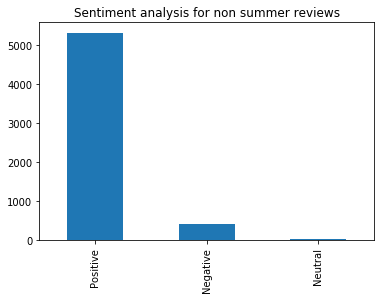

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
nonsummer_data.sentiment.value_counts().plot(kind='bar', title="Sentiment analysis for non summer reviews")

In [66]:
print("Number of Positive reviews: {}, which is: {}".format(sum(nonsummer_data['sentiment']=='Positive'),((sum(nonsummer_data['sentiment']=='Positive')/5748)*100)))
print("Number of Negative reviews: {}, which is: {}".format(sum(nonsummer_data['sentiment']=='Negative'),((sum(nonsummer_data['sentiment']=='Negative')/5748)*100)))
print("Number of Neutral reviews: {}, which is: {}".format(sum(nonsummer_data['sentiment']=='Neutral'),((sum(nonsummer_data['sentiment']=='Neutral')/5748)*100)))

Number of Positive reviews: 5313, which is: 92.4321503131524
Number of Negative reviews: 413, which is: 7.185107863604732
Number of Neutral reviews: 22, which is: 0.3827418232428671


# WordCloud on TS restaurants Non summer negatives

In [67]:
neg_rev_nonsummer =  nonsummer_data['sentiment'] == 'Positive'
neg_rev_nonsummer = nonsummer_data[neg_rev_nonsummer]

In [68]:
print("Number of negative reviews : {}".format(len(neg_rev_nonsummer)))
print(neg_rev_nonsummer.description.iloc[0])
# print(neg_rev_nonsummer.description.iloc[1])
# print(neg_rev_nonsummer.description.iloc[2])
# print(neg_rev_nonsummer.description.iloc[3])
# print(neg_rev_nonsummer.description.iloc[4])

Number of negative reviews : 5313
I stumbled across this great restaurant overlooking the ocean for lunch during my vacation to Maui. I did not have high expectations for this place, but boy did it blow me out of the water. 

The fish and chips is some of the best I've ever had (and I've had lots, including from London). I highly recommend it. Also, the turkey bacon sandwich was SO good. 

In terms of drinks, I highly recommend the Pacific Paradise drink! So delicious and tropical! I also really enjoyed the Lahaina Lemonade. 

Service was really great! I wish I remembered the waitresses name because she was truly awesome and recommend the best stuff. She was blonde and had cute sunglasses.


In [69]:
reasons = neg_rev_nonsummer['description'] 
reasons.head()

0    I stumbled across this great restaurant overlo...
1    Excellent view on the ocean at sunset.\nExcell...
2    This place was not what the reviews portrayed ...
3    We were excited to repeat our Keoki's (in Kaua...
4    If you're looking for a tourist spot, this is ...
Name: description, dtype: object

In [70]:
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    # lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

l_data = str(reasons)
#l_data
list = [l_data]
word_list = []
for line in list:
    word_list.append(preprocessing(line))
word_list

["stumbled across great restaurant overlo ... Excellent view ocean sunset.\\nExcell ... This place review portrayed ... excited repeat Keoki Kaua ... 're looking tourist spot ... What amazing restaurant especially vie ... Came back boyfriend time ... ended Halloween night due ... Really great service really fresh apps ... Stopped way Maui hou ... The thing bad say Kimo ... Kimo casual friendly laid back.\\nif ... 've Kimo many time n't ... came rave recommendation som ... Chose Kimo ocean view ... Beautiful ocean view tourist-orient ... Celebrated Anniversary amazin ... Despite recent poor rating GREA ... landed Kahului drove Ended ... This place Must Maui list ... Monday night dinner quickly sat ... Nice view ... portion small clean ... ... Kimo's\\n\\n\\nMy husband dined Kimo ... Had dinner tonight ordered three ... Nice view amazing cocktail They loca ... Great food location The view ocean ... underwhelmed Basically paying ... Had delicious lunch Oceanside table ... Kimo never disap

In [71]:
token = word_tokenize(l_data)
from nltk import FreqDist
freqd = FreqDist(token)
freqd.items()
import operator
sorted_freq = sorted(freqd.items(), key=operator.itemgetter(1))
sorted_freq
# converting into dictionary 
def listtodict(A, di): 
   di = dict(A) 
   return di 

# Driver Code  
A = sorted_freq 
di = {} 
print ("The Dictionary Is ::>",listtodict(A, di)) 

The Dictionary Is ::> {'0': 1, 'stumbled': 1, 'across': 1, 'overlo': 1, '1': 1, 'Excellent': 1, 'sunset.\\nExcell': 1, '2': 1, 'not': 1, 'what': 1, 'portrayed': 1, 'excited': 1, 'repeat': 1, 'Keoki': 1, '(': 1, 'Kaua': 1, '4': 1, 'looking': 1, 'tourist': 1, 'spot': 1, 'What': 1, 'especially': 1, 'vie': 1, 'back': 1, 'again': 1, 'boyfriend': 1, '8': 1, 'ended': 1, 'Halloween': 1, 'due': 1, '9': 1, 'Really': 1, 'really': 1, 'fresh': 1, 'apps': 1, '10': 1, 'Stopped': 1, 'way': 1, 'into': 1, 'after': 1, 'hou': 1, '11': 1, 'bad': 1, 'say': 1, '12': 1, 'casual': 1, 'friendly': 1, 'laid': 1, 'back.\\nif': 1, '13': 1, "'ve": 1, 'many': 1, 'times': 1, 'but': 1, 'don': 1, '14': 1, 'came': 1, 'rave': 1, 'recommendation': 1, 'som': 1, '15': 1, 'Chose': 1, 'during': 1, '16': 1, 'Beautiful': 1, 'views': 1, 'tourist-orient': 1, '18': 1, 'Celebrated': 1, 'Anniversary': 1, 'amazin': 1, '19': 1, 'Despite': 1, 'recent': 1, 'poor': 1, 'ratings': 1, 'GREA': 1, '21': 1, 'landed': 1, 'Kahului': 1, 'drove': 1

In [72]:
dict_data = {'0': 1, 'stumbled': 1, 'across': 1, 'overlo': 1, '1': 1, 'Excellent': 1, 'sunset.\\nExcell': 1, '2': 1, 'not': 1, 'what': 1, 'portrayed': 1, 'excited': 1, 'repeat': 1, 'Keoki': 1, '(': 1, 'Kaua': 1, '4': 1, 'looking': 1, 'tourist': 1, 'spot': 1, 'What': 1, 'especially': 1, 'vie': 1, 'back': 1, 'again': 1, 'boyfriend': 1, '8': 1, 'ended': 1, 'Halloween': 1, 'due': 1, '9': 1, 'Really': 1, 'really': 1, 'fresh': 1, 'apps': 1, '10': 1, 'Stopped': 1, 'way': 1, 'into': 1, 'after': 1, 'hou': 1, '11': 1, 'bad': 1, 'say': 1, '12': 1, 'casual': 1, 'friendly': 1, 'laid': 1, 'back.\\nif': 1, '13': 1, "'ve": 1, 'many': 1, 'times': 1, 'but': 1, 'don': 1, '14': 1, 'came': 1, 'rave': 1, 'recommendation': 1, 'som': 1, '15': 1, 'Chose': 1, 'during': 1, '16': 1, 'Beautiful': 1, 'views': 1, 'tourist-orient': 1, '18': 1, 'Celebrated': 1, 'Anniversary': 1, 'amazin': 1, '19': 1, 'Despite': 1, 'recent': 1, 'poor': 1, 'ratings': 1, 'GREA': 1, '21': 1, 'landed': 1, 'Kahului': 1, 'drove': 1, 'Ended': 1, '24': 1, '``': 1, 'Must': 1, 'Do': 1, "''": 1, 'list': 1, '26': 1, 'Monday': 1, 'they': 1, 'quickly': 1, 'sat': 1, '27': 1, '..': 1, 'portion': 1, 'small': 1, 'clean': 1, 'w': 1, '28': 1, "Kimo's\\n\\n\\nMy": 1, '29': 1, 'tonight': 1, 'ordered': 1, 'three': 1, '31': 1, 'cocktails': 1, 'They': 1, '33': 1, 'location': 1, '34': 1, 'underwhelmed': 1, 'Basically': 1, 'paying': 1, '35': 1, 'delicious': 1, 'lunch': 1, 'Oceanside': 1, 'table': 1, 'W': 1, '37': 1, 'never': 1, 'disappoints': 1, 'come': 1, 'once': 1, '38': 1, 'Hubby': 1, 'Ma': 1, '65518': 1, 'love': 1, 'relationship': 1, '-': 1, '65519': 1, 'There': 1, 'limited': 1, 'around': 1, 'th': 1, '65520': 1, 'Ca': 1, 'beat': 1, 'delic': 1, '65521': 1, 'recommended': 1, 'by': 1, 'friend': 1, 'that': 1, 'us': 1, '65522': 1, 'read': 1, 'know': 1, 'do': 1, 'give': 1, '65523': 1, 'grab': 1, 'peaceful': 1, 're': 1, '65524': 1, 'ate': 1, 'breakfast': 1, 'days': 1, '65525': 1, 'basically': 1, 'connected': 1, '65526': 1, 'walked': 1, 'another': 1, 'resort': 1, 'enj': 1, '65528': 1, 'Food': 1, 'gracious': 1, 'wa': 1, '65529': 1, 'Upon': 1, 'arriving': 1, 'first': 1, 'meal': 1, '65530': 1, 'Dukes': 1, 'Kauai': 1, 'Oahu': 1, 'severa': 1, '65531': 1, 'picture': 1, 'me': 1, '65532': 1, 'things': 1, 'almost': 1, '65533': 1, 'Honua': 1, 'kai': 1, 'absolutely': 1, 'st': 1, '65534': 1, 'staying': 1, 'nearby': 1, 'boy': 1, 'happy': 1, '65535': 1, 'most': 1, 'scenery': 1, '65536': 1, 'hula': 1, 'pie': 1, 'brew': 1, 'co': 1, 'beer': 1, '65537': 1, 'Pretty': 1, 'atmosphe': 1, '65539': 1, 'Given': 1, 'chain': 1, '65540': 1, 't': 1, '65541': 1, 'Nothing': 1, 'makes': 1, 'even': 1, 'better': 1, 'than': 1, 'gr': 1, '65542': 1, '65543': 1, 'Okay': 1, 'yes': 1, 'expensive': 1, '65544': 1, 'reservations': 1, 'as': 1, 'seemed': 1, 'b': 1, '65545': 1, 'Pau': 1, 'Hana': 1, '\\n\\nOkay': 1, 'lets': 1, 'get': 1, 'ugl': 1, '65562': 1, 'all': 1, 'fault': 1, 'screwed': 1, 'hotel': 1, 'rese': 1, '65563': 1, 'Went': 1, 'reservation': 1, 'fo': 1, '65564': 1, 'Absolutely': 1, 'fantastic': 1, 'beach': 1, 'locale': 1, 'nice': 1, 'decor': 1, '65566': 1, 'so': 1, 'glad': 1, 'duke': 1, 'opened': 1, 'Name': 1, 'description': 1, 'Length': 1, '5313': 1, 'dtype': 1, 'object': 1, 'reviews': 2, '3': 2, 'If': 2, "'re": 2, '5': 2, '6': 2, 'Came': 2, 'service': 2, 'only': 2, 'thing': 2, 'about': 2, 'been': 2, 'because': 2, 'we': 2, 'just': 2, 'Nice': 2, 'husband': 2, 'dined': 2, 'loca': 2, 'Great': 2, 'So': 2, 'last': 2, 'it': 2, 'options': 2, 'dining': 2, 'side': 2, 'be': 2, 'beautiful': 2, 'am': 2, 'maui': 2, 'were': 3, 'an': 3, 'amazing': 3, 'with': 3, 'time': 3, 'up': 3, 'Maui': 3, "n't": 3, 'from': 3, 'i': 3, 'dinner': 3, 'o': 3, 'Had': 3, 'are': 3, 'It': 3, 'restaurant': 4, 'at': 4, 'This': 4, 'you': 4, 'night': 4, 'The': 4, 'have': 4, 'had': 4, 'Duke': 4, 'good': 4, ':': 4, 'ocean': 5, 'in': 5, 'for': 5, 'of': 5, '.': 5, 'food': 5, 'great': 6, 'was': 6, 'our': 6, 'Kimo': 6, 'view': 7, '!': 7, 'place': 8, 'is': 8, 'my': 8, 'this': 9, 'here': 9, 'We': 10, 'I': 11, 'on': 12, 'to': 13, "'s": 14, 'a': 14, 'and': 15, 'the': 20, ',': 25, '...': 63}

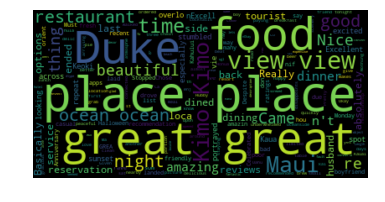

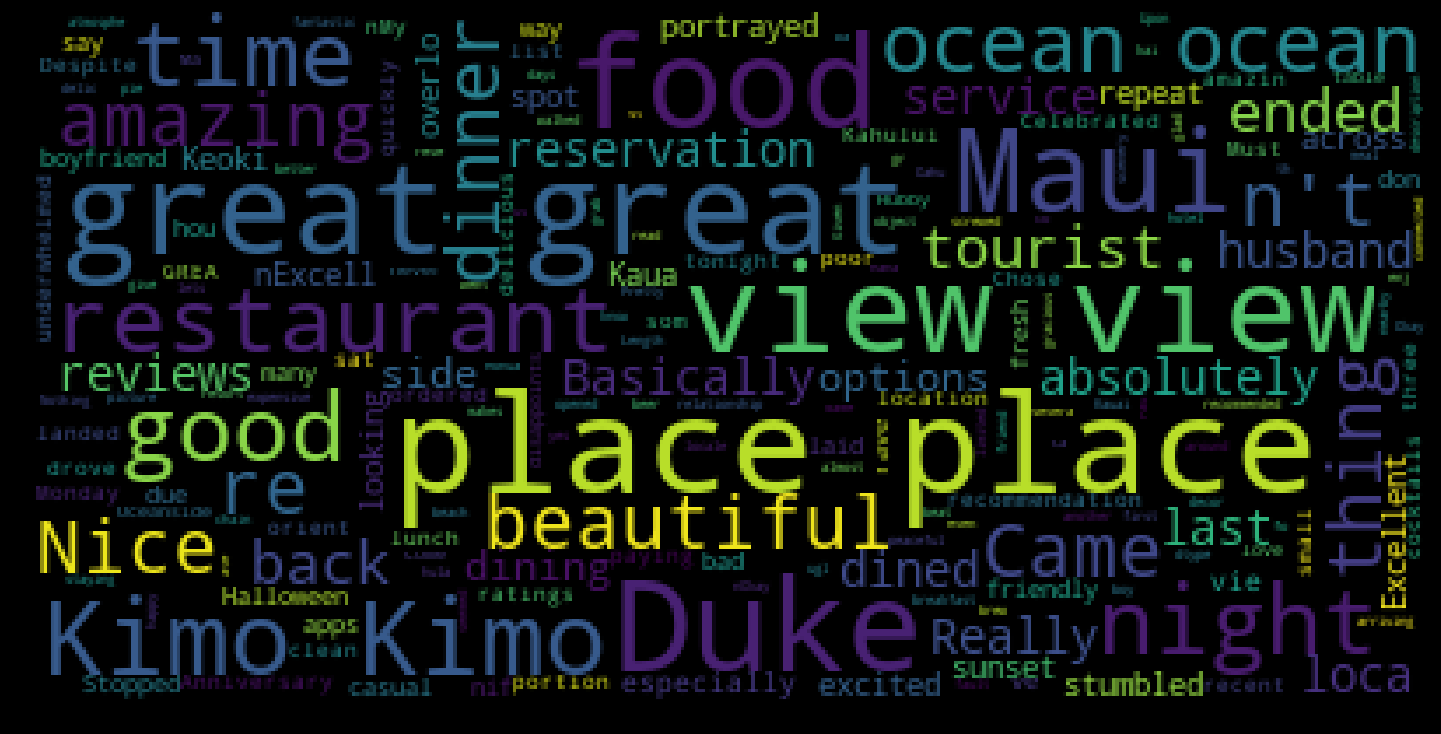

In [73]:
import os

from os import path
from wordcloud import WordCloud

# using word frequency list:
word_freq = dict_data
text = " ".join([(k + " ")*v for k,v in word_freq.items()])

# Generate a word cloud image
wordcloud = WordCloud().generate(text)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Topic Modelling

# TS Non Summer Negatives

In [74]:
vectorizer = TfidfVectorizer(stop_words='english')
neg_rev_nonsummer['description'].head()

0    I stumbled across this great restaurant overlo...
1    Excellent view on the ocean at sunset.\nExcell...
2    This place was not what the reviews portrayed ...
3    We were excited to repeat our Keoki's (in Kaua...
4    If you're looking for a tourist spot, this is ...
Name: description, dtype: object

In [75]:
X_ts_ns_n = vectorizer.fit_transform(neg_rev_nonsummer['description'])
topics = 10
from sklearn.decomposition import NMF
nmf = NMF(n_components=topics,
         random_state=2017,
         alpha=.1,
         l1_ratio=.5)
nmf.fit(X_ts_ns_n)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=10, random_state=2017, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [76]:
feature_names = np.array(vectorizer.get_feature_names())
feature_names

array(['00', '000', '00pm', ..., 'zucchini', 'zuccini', 'zzz'],
      dtype='<U22')

In [77]:
for idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic #0:
good just nice food really dinner got ordered menu like
Topic #1:
great food service view atmosphere drinks place location good awesome
Topic #2:
excellent service food atmosphere wonderful seafood ocean price location views
Topic #3:
fish tacos chips lunch fresh taco sandwich good best poke
Topic #4:
happy hour mai drinks tai tais sliders drink specials pork
Topic #5:
pie hula dessert cream grill ice delicious free die kimo
Topic #6:
mahi crusted macadamia kimo parmesan style delicious nut ono topped
Topic #7:
music live bar sand beach barefoot right grill feet fun
Topic #8:
maui best ve time visit favorite love times come trip
Topic #9:
amazing view recommend highly food definitely service delicious absolutely beautiful


In [78]:
nmf.transform
X_transformed = nmf.transform(X_ts_ns_n)
X_transformed[50]

array([0.01952134, 0.00284558, 0.        , 0.        , 0.        ,
       0.        , 0.16661365, 0.        , 0.        , 0.        ])

In [79]:
get_topic_for_document([1.18770449e-02, 0.00000000e+00, 3.98344691e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.62193584e-02, 6.01420224e-02,
       0.00000000e+00, 4.07932567e-01])

9

In [80]:
X_transformed = nmf.transform(X_ts_ns_n)

X_topics = []
for x_transform in X_transformed:
#     print((x_transform))
    X_topics.append(get_topic_for_document(x_transform))
X_transformed.shape, len(X_topics)

((5313, 10), 5313)

In [109]:
# np.bincount(X_topics)

In [81]:
X_topics

[8,
 2,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 6,
 8,
 0,
 0,
 9,
 5,
 0,
 0,
 7,
 3,
 0,
 0,
 0,
 5,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 8,
 0,
 0,
 4,
 0,
 9,
 6,
 8,
 0,
 8,
 5,
 0,
 0,
 0,
 6,
 6,
 0,
 0,
 1,
 4,
 5,
 0,
 7,
 0,
 6,
 5,
 9,
 0,
 3,
 2,
 0,
 0,
 6,
 6,
 2,
 5,
 0,
 0,
 0,
 8,
 0,
 1,
 3,
 5,
 0,
 0,
 0,
 7,
 0,
 0,
 8,
 6,
 9,
 8,
 0,
 5,
 8,
 0,
 0,
 0,
 9,
 0,
 1,
 4,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 8,
 4,
 0,
 0,
 0,
 9,
 8,
 0,
 8,
 0,
 5,
 1,
 0,
 0,
 6,
 7,
 0,
 5,
 0,
 0,
 0,
 7,
 6,
 0,
 0,
 0,
 6,
 9,
 0,
 9,
 9,
 8,
 8,
 0,
 0,
 4,
 3,
 2,
 1,
 0,
 0,
 8,
 1,
 0,
 5,
 0,
 2,
 0,
 8,
 6,
 6,
 0,
 9,
 0,
 6,
 0,
 9,
 9,
 4,
 3,
 0,
 6,
 0,
 7,
 6,
 1,
 4,
 0,
 3,
 6,
 6,
 6,
 0,
 0,
 8,
 0,
 0,
 8,
 7,
 1,
 0,
 0,
 0,
 8,
 0,
 9,
 0,
 3,
 6,
 9,
 6,
 4,
 0,
 5,
 0,
 0,
 3,
 0,
 5,
 0,
 0,
 0,
 0,
 8,
 5,
 0,
 9,
 8,
 0,
 3,
 9,
 7,
 5,
 2,
 3,
 0,
 9,
 0,
 2,
 6,
 0,
 6,
 0,
 0,
 6,
 1,
 2,
 6,
 0,
 0,
 0,
 0,
 5,
 5,
 8,
 8,
 8,
 2,
 1,
 0,
 0,
 0,
 0,


In [82]:
len(X_topics)

5313

In [83]:
from collections import Counter

recounted = Counter(X_topics)
recounted

Counter({8: 402,
         2: 259,
         0: 2203,
         6: 298,
         9: 260,
         5: 373,
         7: 411,
         3: 351,
         4: 302,
         1: 454})

<BarContainer object of 10 artists>

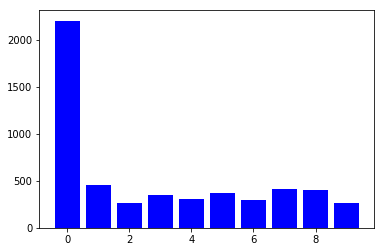

In [84]:
plt.bar(recounted.keys(), recounted.values(),color='b')

# Topic #0: good just nice food really dinner got ordered menu like

# WordCloud for TOPIC : 0 to find the most discussed words

In [85]:
print(neg_rev_nonsummer.shape)
neg_rev_nonsummer.head()

(5313, 7)


description  \
0  I stumbled across this great restaurant overlo...   
1  Excellent view on the ocean at sunset.\nExcell...   
2  This place was not what the reviews portrayed ...   
3  We were excited to repeat our Keoki's (in Kaua...   
4  If you're looking for a tourist spot, this is ...   

                                         norm_tokens dataPublished  month  \
0  ['stumbl', 'across', 'great', 'restaur', 'over...    2019-01-06      1   
1  ['excel', 'view', 'ocean', 'sunset', 'excel', ...    2019-01-04      1   
2  ['place', 'review', 'portray', 'starter', 'wal...    2018-12-25     12   
3  ['excit', 'repeat', 'keoki', "'s", 'kauai', 'l...    2018-12-08     12   
4  ["'re", 'look', 'tourist', 'spot', 'unfortun',...    2018-11-29     11   

   year  polarity_score sentiment  
0  2019          0.9977  Positive  
1  2019          0.9665  Positive  
2  2018          0.2551  Positive  
3  2018          0.9954  Positive  
4  2018          0.8764  Positive

### Created a new column "Topic" for assigning each review to a particular topic

In [86]:
neg_rev_nonsummer['Topic']=''
neg_rev_nonsummer.head()

description  \
0  I stumbled across this great restaurant overlo...   
1  Excellent view on the ocean at sunset.\nExcell...   
2  This place was not what the reviews portrayed ...   
3  We were excited to repeat our Keoki's (in Kaua...   
4  If you're looking for a tourist spot, this is ...   

                                         norm_tokens dataPublished  month  \
0  ['stumbl', 'across', 'great', 'restaur', 'over...    2019-01-06      1   
1  ['excel', 'view', 'ocean', 'sunset', 'excel', ...    2019-01-04      1   
2  ['place', 'review', 'portray', 'starter', 'wal...    2018-12-25     12   
3  ['excit', 'repeat', 'keoki', "'s", 'kauai', 'l...    2018-12-08     12   
4  ["'re", 'look', 'tourist', 'spot', 'unfortun',...    2018-11-29     11   

   year  polarity_score sentiment Topic  
0  2019          0.9977  Positive        
1  2019          0.9665  Positive        
2  2018          0.2551  Positive        
3  2018          0.9954  Positive        
4  2018          0.8764  Positive

In [87]:
neg_rev_nonsummer['Topic']= X_topics
neg_rev_nonsummer.head()

description  \
0  I stumbled across this great restaurant overlo...   
1  Excellent view on the ocean at sunset.\nExcell...   
2  This place was not what the reviews portrayed ...   
3  We were excited to repeat our Keoki's (in Kaua...   
4  If you're looking for a tourist spot, this is ...   

                                         norm_tokens dataPublished  month  \
0  ['stumbl', 'across', 'great', 'restaur', 'over...    2019-01-06      1   
1  ['excel', 'view', 'ocean', 'sunset', 'excel', ...    2019-01-04      1   
2  ['place', 'review', 'portray', 'starter', 'wal...    2018-12-25     12   
3  ['excit', 'repeat', 'keoki', "'s", 'kauai', 'l...    2018-12-08     12   
4  ["'re", 'look', 'tourist', 'spot', 'unfortun',...    2018-11-29     11   

   year  polarity_score sentiment  Topic  
0  2019          0.9977  Positive      8  
1  2019          0.9665  Positive      2  
2  2018          0.2551  Positive      0  
3  2018          0.9954  Positive      0  
4  2018          0.8764  Positive      0

In [88]:
neg_rev_nonsummer['Topic'].dtype

dtype('int64')

In [89]:
neg_rev_nonsummer_topic_zero =  neg_rev_nonsummer['Topic'] == 0
neg_rev_nonsummer_topic_zero = neg_rev_nonsummer[neg_rev_nonsummer_topic_zero]
print(neg_rev_nonsummer_topic_zero.shape)
neg_rev_nonsummer_topic_zero.head()

(2203, 8)


description  \
2  This place was not what the reviews portrayed ...   
3  We were excited to repeat our Keoki's (in Kaua...   
4  If you're looking for a tourist spot, this is ...   
5  What an amazing restaurant, especially the vie...   
8  I ended up here on Halloween night due to the ...   

                                         norm_tokens dataPublished  month  \
2  ['place', 'review', 'portray', 'starter', 'wal...    2018-12-25     12   
3  ['excit', 'repeat', 'keoki', "'s", 'kauai', 'l...    2018-12-08     12   
4  ["'re", 'look', 'tourist', 'spot', 'unfortun',...    2018-11-29     11   
5  ['amaz', 'restaur', 'especi', 'view', 'dinner'...    2019-01-10      1   
8  ['end', 'halloween', 'night', 'due', 'unfortun...    2018-11-05     11   

   year  polarity_score sentiment  Topic  
2  2018          0.2551  Positive      0  
3  2018          0.9954  Positive      0  
4  2018          0.8764  Positive      0  
5  2019          0.9474  Positive      0  
8  2018          0.9321  Positive      0

In [90]:
reasons = neg_rev_nonsummer_topic_zero['description'] 
reasons.head()

2    This place was not what the reviews portrayed ...
3    We were excited to repeat our Keoki's (in Kaua...
4    If you're looking for a tourist spot, this is ...
5    What an amazing restaurant, especially the vie...
8    I ended up here on Halloween night due to the ...
Name: description, dtype: object

In [91]:
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    # lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

l_data = str(reasons)
#l_data
list = [l_data]
word_list = []
for line in list:
    word_list.append(preprocessing(line))
word_list

["This place review portrayed ... excited repeat Keoki Kaua ... 're looking tourist spot ... What amazing restaurant especially vie ... ended Halloween night due ... Really great service really fresh apps ... Kimo casual friendly laid back.\\nif ... 've Kimo many time n't ... Beautiful ocean view tourist-orient ... Celebrated Anniversary amazin ... This place Must Maui list ... Monday night dinner quickly sat ... Nice view ... portion small clean ... ... Had dinner tonight ordered three ... Nice view amazing cocktail They loca ... underwhelmed Basically paying ... Had delicious lunch Oceanside table ... Kimo never disappoints come ... Hubby dined last night ... This popular place ... Firstly make reservation This place get ... Even though packed managed sit ... Tasty meal/drinks ocean front view ... definitely recommend restaurant They ... What great location Keep mind ... Our friend suggested Kimo ... passing Lahaina area ... first week October Firs ... done yelping prior trip ... Yum

In [92]:
token = word_tokenize(l_data)
from nltk import FreqDist
freqd = FreqDist(token)
freqd.items()
import operator
sorted_freq = sorted(freqd.items(), key=operator.itemgetter(1))
sorted_freq
# converting into dictionary 
def listtodict(A, di): 
   di = dict(A) 
   return di 

# Driver Code  
A = sorted_freq 
di = {} 
print ("The Dictionary Is ::>",listtodict(A, di)) 

The Dictionary Is ::> {'2': 1, 'what': 1, 'portrayed': 1, 'excited': 1, 'repeat': 1, 'Keoki': 1, '(': 1, 'Kaua': 1, '4': 1, "'re": 1, 'looking': 1, 'tourist': 1, 'spot': 1, '5': 1, 'especially': 1, 'vie': 1, '8': 1, 'ended': 1, 'Halloween': 1, 'due': 1, '9': 1, 'Really': 1, 'really': 1, 'fresh': 1, 'apps': 1, '12': 1, 'casual': 1, 'friendly': 1, 'laid': 1, 'back.\\nif': 1, '13': 1, "'ve": 1, 'many': 1, 'but': 1, 'don': 1, '16': 1, 'from': 1, 'tourist-orient': 1, '18': 1, 'Celebrated': 1, 'Anniversary': 1, 'amazin': 1, '24': 1, 'Must': 1, 'Do': 1, 'list': 1, '26': 1, 'Monday': 1, 'quickly': 1, 'sat': 1, '27': 1, '..': 1, 'portion': 1, 'small': 1, 'clean': 1, 'w': 1, '29': 1, 'tonight': 1, 'just': 1, 'ordered': 1, 'three': 1, '31': 1, 'cocktails': 1, 'loca': 1, '34': 1, 'underwhelmed': 1, 'Basically': 1, 'paying': 1, '35': 1, 'delicious': 1, 'Oceanside': 1, 'table': 1, 'W': 1, '37': 1, 'never': 1, 'disappoints': 1, 'come': 1, 'once': 1, '38': 1, 'Hubby': 1, 'dined': 1, 'last': 1, 'Ma': 1

In [93]:
dict_data = {'2': 1, 'what': 1, 'portrayed': 1, 'excited': 1, 'repeat': 1, 'Keoki': 1, '(': 1, 'Kaua': 1, '4': 1, "'re": 1, 'looking': 1, 'tourist': 1, 'spot': 1, '5': 1, 'especially': 1, 'vie': 1, '8': 1, 'ended': 1, 'Halloween': 1, 'due': 1, '9': 1, 'Really': 1, 'really': 1, 'fresh': 1, 'apps': 1, '12': 1, 'casual': 1, 'friendly': 1, 'laid': 1, 'back.\\nif': 1, '13': 1, "'ve": 1, 'many': 1, 'but': 1, 'don': 1, '16': 1, 'from': 1, 'tourist-orient': 1, '18': 1, 'Celebrated': 1, 'Anniversary': 1, 'amazin': 1, '24': 1, 'Must': 1, 'Do': 1, 'list': 1, '26': 1, 'Monday': 1, 'quickly': 1, 'sat': 1, '27': 1, '..': 1, 'portion': 1, 'small': 1, 'clean': 1, 'w': 1, '29': 1, 'tonight': 1, 'just': 1, 'ordered': 1, 'three': 1, '31': 1, 'cocktails': 1, 'loca': 1, '34': 1, 'underwhelmed': 1, 'Basically': 1, 'paying': 1, '35': 1, 'delicious': 1, 'Oceanside': 1, 'table': 1, 'W': 1, '37': 1, 'never': 1, 'disappoints': 1, 'come': 1, 'once': 1, '38': 1, 'Hubby': 1, 'dined': 1, 'last': 1, 'Ma': 1, '39': 1, 'other': 1, 'popular': 1, 'places': 1, 'will': 1, '40': 1, 'Firstly': 1, 'make': 1, 'reservation': 1, 'gets': 1, 'b': 1, '42': 1, 'Even': 1, 'though': 1, 'packed': 1, 'managed': 1, 'sit': 1, '44': 1, 'Tasty': 1, 'meal/drinks': 1, 'front': 1, '45': 1, 'definitely': 1, 'recommend': 1, '48': 1, 'location': 1, 'Keep': 1, 'mind': 1, 'if': 1, 'yo': 1, '49': 1, 'M': 1, '&': 1, 'T': 1, 'suggested': 1, '52': 1, 'passing': 1, 'area': 1, 'when': 1, 'bu': 1, '58': 1, 'there': 1, 'week': 1, 'October': 1, 'Firs': 1, '62': 1, 'done': 1, 'yelping': 1, 'prior': 1, '63': 1, 'Yum': 1, 'yum': 1, '\\n\\nM': 1, 'since': 1, 'he': 1, '65449': 1, 'Serviceable': 1, 'average': 1, 'margaritas': 1, '65450': 1, 'recommended': 1, 'checked': 1, 'out': 1, '65495': 1, 'Wish': 1, 'could': 1, 'rate': 1, 'different': 1, 'aspects': 1, '65499': 1, 'stop': 1, 'Beach': 1, 'House': 1, 'while': 1, 'Haw': 1, '65500': 1, 'Eat': 1, 'sunset': 1, 'warm': 1, '65502': 1, 'Atmosphere': 1, '\\nGreat': 1, 'outdoor': 1, 'seating': 1, '65504': 1, 'agreed': 1, 'eat': 1, 'some': 1, 'trepidation': 1, 'fi': 1, '65505': 1, 'Let': 1, 'start': 1, 'saying': 1, 'am': 1, 'big': 1, 'fan': 1, '65506': 1, 'Good': 1, 'quick': 1, 'Right': 1, 'next': 1, '65508': 1, 'Just': 1, 'friend': 1, 'her': 1, 'godson': 1, '65509': 1, 'Went': 1, 'hold': 1, 'until': 1, '65511': 1, 'long': 1, 'day': 1, 'walked': 1, '65513': 1, 'one': 1, 'stay': 1, '65517': 1, '3-4': 1, '65518': 1, 'love': 1, 'relationship': 1, '-': 1, '65519': 1, 'There': 1, 'limited': 1, 'dining': 1, 'around': 1, 'th': 1, '65522': 1, 'read': 1, 'know': 1, 'do': 1, 'give': 1, '65524': 1, 'breakfast': 1, '6': 1, 'days': 1, '65525': 1, 'basically': 1, 'connected': 1, '65528': 1, 'Food': 1, 'gracious': 1, 'wa': 1, '65529': 1, 'Upon': 1, 'arriving': 1, 'meal': 1, '65530': 1, 'Dukes': 1, 'Kauai': 1, 'Oahu': 1, 'severa': 1, '65531': 1, 'because': 1, 'picture': 1, 'husband': 1, '65532': 1, 'things': 1, 'Great': 1, 'almost': 1, 'be': 1, '65533': 1, 'Honua': 1, 'kai': 1, 'absolutely': 1, 'st': 1, '65535': 1, 'most': 1, 'scenery': 1, '65539': 1, 'Given': 1, 'chain': 1, '65540': 1, 'only': 1, 'thing': 1, 'about': 1, 't': 1, '65562': 1, 'fault': 1, 'screwed': 1, 'hotel': 1, 'rese': 1, '65564': 1, 'Absolutely': 1, 'fantastic': 1, 'locale': 1, 'nice': 1, 'decor': 1, 'Name': 1, 'description': 1, 'Length': 1, '2203': 1, 'dtype': 1, 'object': 1, 'not': 2, 'reviews': 2, '3': 2, 'If': 2, 'What': 2, 'amazing': 2, 'up': 2, 'great': 2, 'service': 2, 'times': 2, "n't": 2, 'Beautiful': 2, 'ocean': 2, '``': 2, "''": 2, 'they': 2, 'Nice': 2, 'They': 2, 'So': 2, 'lunch': 2, 'at': 2, 'o': 2, 'that': 2, 'Our': 2, 'friends': 2, 'Lahaina': 2, 'first': 2, 'trip': 2, 'beach': 2, 'over': 2, 'during': 2, 'ate': 2, 'options': 2, 'beautiful': 2, 'It': 2, 'an': 3, 'been': 3, 'have': 3, 'views': 3, 'Maui': 3, 'i': 3, 'view': 3, 'Had': 3, 'are': 3, 'it': 3, 'by': 3, 'we': 3, 'The': 3, 'all': 3, 'good': 3, 'were': 4, 'you': 4, 'restaurant': 4, 'Kimo': 4, 'dinner': 4, 'food': 4, 'Duke': 4, 'me': 4, 'This': 5, 'place': 5, 'in': 5, 'for': 5, 'this': 5, 'night': 5, ':': 5, 'our': 6, 'is': 6, 'with': 6, '!': 6, 'of': 6, 'on': 7, 'had': 7, 'was': 8, 'We': 9, 'my': 9, "'s": 11, 'I': 11, '.': 11, 'a': 12, 'to': 13, 'here': 13, 'and': 16, 'the': 18, ',': 21, '...': 63}

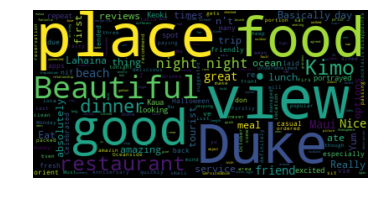

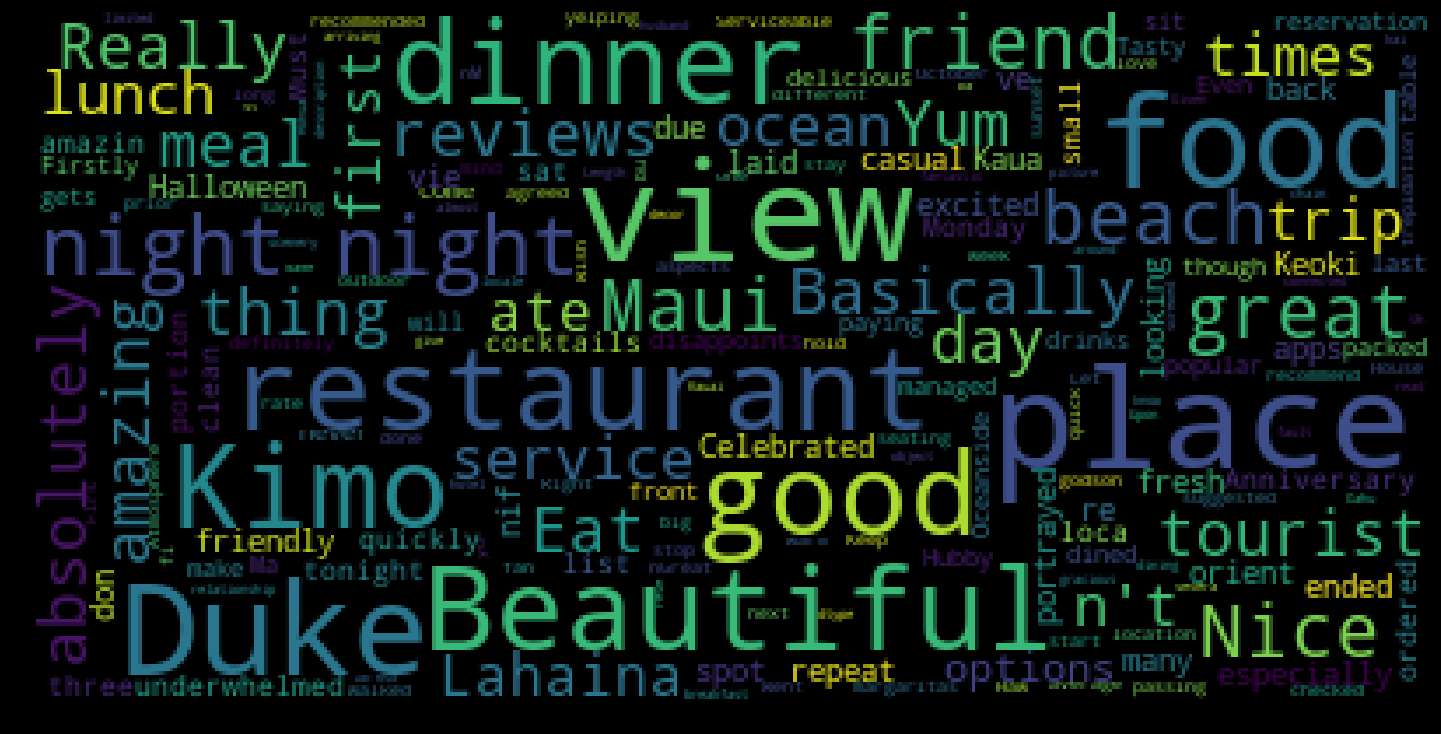

In [94]:
import os

from os import path
from wordcloud import WordCloud

# using word frequency list:
word_freq = dict_data
text = " ".join([(k + " ")*v for k,v in word_freq.items()])

# Generate a word cloud image
wordcloud = WordCloud().generate(text)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Above are the words that are most discussed in Non summers of negative reviews zeroth topic of topic modelling
## Terrible Location 
## Disappointed Venue
## Since Place Place is repeated may be Place is not good

In [95]:
neg_rev_nonsummer.description.head()

0    I stumbled across this great restaurant overlo...
1    Excellent view on the ocean at sunset.\nExcell...
2    This place was not what the reviews portrayed ...
3    We were excited to repeat our Keoki's (in Kaua...
4    If you're looking for a tourist spot, this is ...
Name: description, dtype: object

In [96]:
# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(4, 4)) 
X1 = vectorizer.fit_transform(neg_rev_nonsummer.description)  
features = (vectorizer.get_feature_names()) 
#print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (4, 4)) 
X2 = vectorizer.fit_transform(neg_rev_nonsummer.description) 
scores = (X2.toarray()) 
#print("\n\nScores : \n", scores) 

# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(20))



Words : 
                          term      rank
220230        one of the best  7.816605
255270     right on the beach  7.611501
348595      view of the ocean  6.870542
301280     the fish and chips  6.708290
303836        the hula pie is  6.599370
24104        and the food was  6.438789
302370      the food was good  6.062639
199611     my husband had the  5.916018
312220  the service was great  5.596333
255292     right on the water  5.527488
303888       the hula pie was  5.395860
24607     and the service was  5.071095
301540     the fish tacos and  4.668076
63862        catch of the day  4.105343
58300        but the food was  4.064777
301608    the fish tacos were  4.058093
135530     had the fish tacos  3.926940
302371     the food was great  3.870371
24186        and the hula pie  3.845386
149040   hula pie for dessert  3.792647


In [97]:
# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(4, 4)) 
X1 = vectorizer.fit_transform(neg_rev_nonsummer.description)  
features = (vectorizer.get_feature_names()) 
#print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (5, 5)) 
X2 = vectorizer.fit_transform(neg_rev_nonsummer.description) 
scores = (X2.toarray()) 
#print("\n\nScores : \n", scores) 

# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(20))



Words : 
                                term      rank
373323        view of the ocean and  2.481397
322776       the food was very good  2.105258
26373     and the service was great  2.087201
221353  nothing to write home about  2.037646
324418     the hula pie for dessert  2.000075
143869       had the fish and chips  1.996977
317658         the catch of the day  1.944824
161366        if you re looking for  1.921219
321090          the fish of the day  1.917984
385146          was one of the best  1.888043
334215    the service was great and  1.883341
396369            we sat at the bar  1.882955
422326        your feet in the sand  1.846825
21364        and my husband had the  1.822056
322577        the food was good but  1.808627
242258       our last night in maui  1.767723
234986    one of my favorite places  1.742099
158495           hula pie is to die  1.735312
251930            pie is to die for  1.735312
324466         the hula pie is must  1.680077
